In [1]:
import keras
import pandas as pd
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
from keras.callbacks import ModelCheckpoint, EarlyStopping
# %reload_ext mermaid
# import IPython
# IPython.load_ipython_extensions(["nb-mermaid/nb-mermaid"]);

Using TensorFlow backend.


In [2]:
import tensorflow  as tf
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, BatchNormalization, Input, Flatten, Lambda
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import Adadelta, SGD, Adam
from keras.utils import to_categorical
import keras.backend as K

In [3]:
tf_config = tf.ConfigProto(allow_soft_placement=False)
tf_config.gpu_options.allow_growth = True
s = tf.Session(config=tf_config)
K.set_session(s)

In [4]:
csv_data = pd.read_csv('15features.csv')
display(csv_data.head()), display(csv_data.shape)
train_path = 'shuffled-dataset/TrainingSet/'
train_images = os.listdir(train_path)

val_path = 'shuffled-dataset/ValidationSet/'
val_images = os.listdir(val_path)
len(train_images)+len(val_images)

imagename  pen_pressure  letter_spacing  size  dimension  \
0  0968c_num1.png             2               2     2          1   
1  0809c_num2.png             2               2     2          2   
2  0237b_num6.png             2               2     2          2   
3  0069b_num2.png             2               2     2          1   
4  0966c_num4.png             2               2     2          2   

   is_lowercase  is_continuous  slantness  tilt  entry_stroke_a  staff_of_a  \
0             2              2          3     2               1           2   
1             2              2          3     1               1           2   
2             2              2          2     2               1           2   
3             2              2          1     1               1           1   
4             2              2          2     1               1           2   

   formation_n  staff_of_d  exit_stroke_d  word_formation  constancy  
0            2           3              2               2          1  
1            2           3              1               2          2  
2            2           2              2               2          2  
3            1           1              1               1          1  
4            2           2              2               2          2

(13570, 16)

13794

In [5]:
# len(list(set(list(x[:4] for x in images['image'])))), len(list(set(list(x[:4] for x in csv_data['ImageId']))))

In [6]:
dataset_columns = csv_data.columns
csv_data['imagename'] = csv_data['imagename'].astype('str')
display(csv_data.head(20))
csv_data.shape

imagename  pen_pressure  letter_spacing  size  dimension  \
0   0968c_num1.png             2               2     2          1   
1   0809c_num2.png             2               2     2          2   
2   0237b_num6.png             2               2     2          2   
3   0069b_num2.png             2               2     2          1   
4   0966c_num4.png             2               2     2          2   
5   1316a_num2.png             2               2     1          1   
6   1503c_num2.png             2               1     2          2   
7   0113c_num1.png             2               3     2          2   
8   0221a_num6.png             2               2     2          2   
9   0068a_num4.png             1               1     2          2   
10  1094b_num1.png             2               3     1          1   
11  0337c_num6.png             2               2     2          2   
12  0837a_num4.png             2               2     2          2   
13  0941b_num3.png             2               2     2          2   
14  0260a_num3.png             2               2     2          2   
15  0598c_num4.png             1               3     2          2   
16  0380a_num2.png             2               2     2          2   
17  0384b_num2.png             2               2     2          2   
18  1224a_num3.png             2               2     2          2   
19  1131b_num3.png             2               2     2          2   

    is_lowercase  is_continuous  slantness  tilt  entry_stroke_a  staff_of_a  \
0              2              2          3     2               1           2   
1              2              2          3     1               1           2   
2              2              2          2     2               1           2   
3              2              2          1     1               1           1   
4              2              2          2     1               1           2   
5              2              2          3     1               1           2   
6              2              2          2     1               1           3   
7              2              1          2     1               1           1   
8              2              1          1     1               1           4   
9              2              2          1     1               1           2   
10             2              2          2     1               1           1   
11             2              2          3     1               1           2   
12             2              2          1     1               1           3   
13             2              2          2     1               1           1   
14             2              2          2     1               1           2   
15             1              1          2     1               1           1   
16             2              2          4     1               1           2   
17             2              2          2     1               1           2   
18             2              2          1     1               1           4   
19             2              2          1     1               1           2   

    formation_n  staff_of_d  exit_stroke_d  word_formation  constancy  
0             2           3              2               2          1  
1             2           3              1               2          2  
2             2           2              2               2          2  
3             1           1              1               1          1  
4             2           2              2               2          2  
5             2           2              3               2          2  
6             2           2              3               2          2  
7             2           2              2               2          2  
8             1           2              3               1          2  
9             2           2              2               2          2  
10            1           3              2               1          1  
11            

(13570, 16)

In [7]:
# train_csv_data =  csv_data[:700]
# val_csv_data =  csv_data[700:]
# train_csv_data.shape, val_csv_data.shape

In [8]:
f = []
for col in dataset_columns[1:]:
    f.append(csv_data[col].unique().shape[0])
f,len(f)

([2, 3, 3, 3, 2, 2, 4, 2, 2, 4, 2, 3, 4, 2, 2], 15)

In [9]:

# # model = Sequential()
# input_layer = Input((64,64,1))
# model = BatchNormalization()(input_layer)

# model = Conv2D(activation='relu',filters=8, kernel_size=(3,3), padding='same')(model)
# # model = Conv2D(activation='relu',filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(model)
# model = MaxPool2D((2,2))(model)
# model = Dropout(0.25)(model)

# model = Conv2D(activation='relu',filters=16, kernel_size=(3,3), padding='same')(model)
# # model = Conv2D(activation='relu',filters=256, kernel_size=(3,3), strides=(1,1), padding='same')(model)
# model = MaxPool2D((2,2))(model)
# model = Dropout(0.25)(model)

# model = Conv2D(activation='relu',filters=32, kernel_size=(3,3), padding='same')(model)
# # model = Conv2D(activation='relu',filters=256, kernel_size=(3,3), strides=(1,1), padding='same')(model)
# model = MaxPool2D((2,2))(model)
# model = Dropout(0.25)(model)
# # model = Flatten()(model)

# model1 = Conv2D(activation='relu',filters=64, kernel_size=(3,3), padding='same',name='conv')(model)
# model1 = MaxPool2D((2,2))(model1)
# model1 = Dropout(0.25)(model1)

# model1 = Conv2D(activation='relu',filters=128, kernel_size=(3,3), padding='same')(model1)
# model1 = MaxPool2D((2,2))(model1)
# model1 = Dropout(0.25)(model1)

# model1 = Conv2D(activation='relu',filters=256, kernel_size=(3,3), padding='same')(model1)
# model_out = MaxPool2D((2,2))(model1)

# out_dense_layer=[]
# for i in range(1,len(f)+1):
#     out_dense_layer.append(Dense(f[i-1],activation='softmax',name='out_feature_'+str(i))(Dense(512,activation='relu',name='dense_f'+str(i))(Flatten()(model_out))))

# human_features = Model(inputs=[input_layer], outputs=out_dense_layer)
# human_features.summary()


# model = Sequential()
input_layer = Input((64,64,1))
model = BatchNormalization()(input_layer)

model = Conv2D(activation='relu',filters=32, kernel_size=(32,32), padding='same')(model)
model = Conv2D(activation='relu',filters=64, kernel_size=(32,32), strides=(1,1), padding='same')(model)
model = MaxPool2D((2,2))(model)
model = Dropout(0.25)(model)

model = Conv2D(activation='relu',filters=128, kernel_size=(16,16), padding='same')(model)
model = Conv2D(activation='relu',filters=256, kernel_size=(16,16), strides=(1,1), padding='same')(model)
model = MaxPool2D((2,2))(model)
model = Dropout(0.25)(model)

model = Conv2D(activation='relu',filters=128, kernel_size=(8,8), padding='same')(model)
model = Conv2D(activation='relu',filters=256, kernel_size=(8,8), strides=(1,1), padding='same')(model)
model = MaxPool2D((2,2))(model)
model = Dropout(0.25)(model)
# model = Flatten()(model)

dense_layer = Dense(512, activation='relu')(model)
dense_layer = Dropout(0.5)(dense_layer)
out_dense_layer=[]
for i in range(1,len(f)+1):
    out_dense_layer.append(Dense(f[i-1] , activation='softmax', name = 'out_feature_'+str(i))(Flatten()(Dense(64 , activation='relu', name = 'dense_layer_'+str(i))(dense_layer))))

human_features = Model(inputs=[input_layer], outputs=out_dense_layer)
human_features.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 1)    4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   32800       batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 64)   2097216     conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_poolin

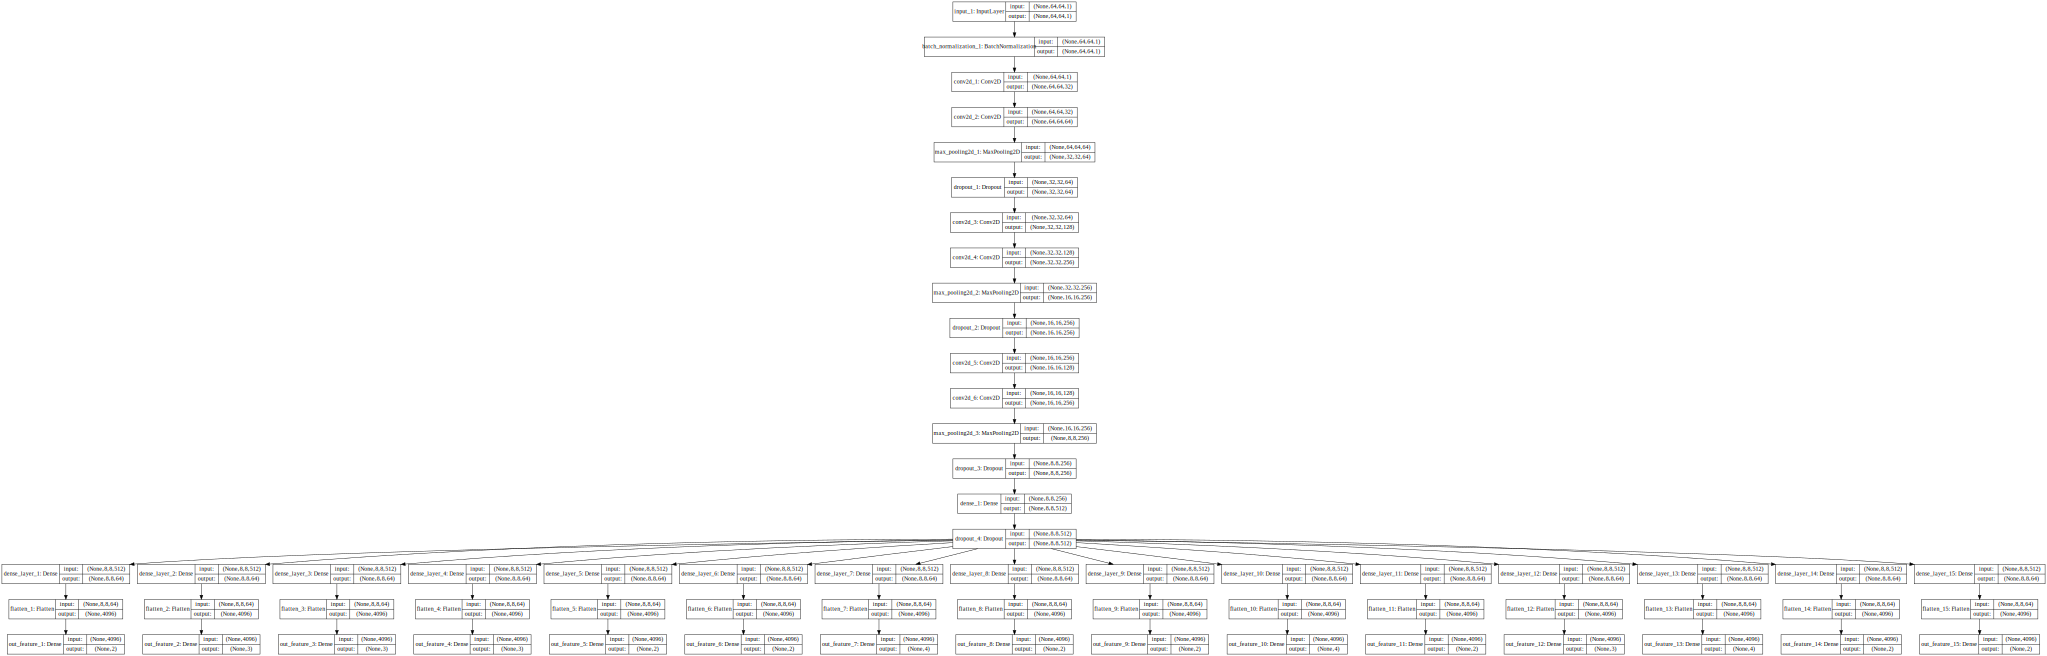

In [10]:
SVG(model_to_dot(human_features, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [11]:
feature_lengths = {}
for col in dataset_columns[1:]:
    feature_lengths[col] = len(csv_data[col].unique())
feature_lengths = list(feature_lengths.values())
feature_lengths

[2, 3, 3, 3, 2, 2, 4, 2, 2, 4, 2, 3, 4, 2, 2]

In [12]:
# df_data[df_data['f8']==2]

In [13]:
# im = images[images['image'].str.match('1229b')]
# im.iloc[0]['image']

In [14]:

# stop_at = 20
# identitycounter = 1
# unique_writers = list(set(list(x[:4] for x in df_data['ImageId'])))
# for writer in unique_writers:
#     print(identitycounter*100/stop_at, end='\r')
#     writer_samples = list(images[images['image'].str.match(writer)]['image'])
# #     print('lne',len(writer_samples))
#     f,ax = plt.subplots(1,len(writer_samples))
#     f.subplots_adjust(hspace = .5, wspace=.15)
#     f.set_size_inches(15,15)
#     imgcounter = 0
#     for sample in writer_samples:
#         imagepath = os.path.join(image_path,sample)
#         raw_img = cv2.imread(imagepath)
#         if len(writer_samples)>1:
#             ax[imgcounter].imshow(raw_img)
#             ax[imgcounter].set_title(writer+'\n'+sample)
#         else:
#             ax.imshow(raw_img)
#             ax.set_title(writer+'\n'+sample)
# #         ax[imgcounter].axis('off')
#         imgcounter+=1
#         if imgcounter == stop_at:
#             break
#     imgcounter=0
#     identitycounter += 1
#     if identitycounter == stop_at+1:
#         break

In [15]:
# csv_data[csv_data['ImageId'].str.match('1302c')]

In [16]:

def datagen(batch_size,image_path,list_of_writers, vshift = (-64,64) ,vis=False):
    counter = 0
    w_ids,ids,x,y,imagenames, feature_list = [],[],[],[],[],[]
    while True:
#         counter = 0
        # for writer in unique_writers:
        #     print(identitycounter*100/stop_at, end='\r')
        
        writer_index = np.random.randint(0,len(list_of_writers))
        
#         for writer_index in writer_indexes:
#             class_vectors = []
#             features = None
        imagename = list_of_writers[writer_index]
#             print('-->',csv_data['imagename'][0],imagename)
#             display(csv_data[csv_data['imagename']==imagename].values[0][1:])
        features = csv_data[csv_data['imagename']==imagename].values
        if len(features)==0:
#             print('no features', imagename)
            continue
        features = features[0][1:]-1
#             print(features)
#             print(writer)
#             writer_samples = list(images[images['image'].str.match(writer)]['image'])
#             print('writer:',writer,', writer_samples:',writer_samples)
#             if len(writer_samples) == 0:
#                 continue
#             writer_sample_index = np.random.randint(0,len(writer_samples))

#             #     unique_writers_count[writer] = len(writer_samples)
# #             print('writer_sample_index:',writer_sample_index)
#             csv_writer = writer_samples[writer_sample_index][:5]


        loaded_image = cv2.imread(os.path.join(image_path,imagename),0)
        rand = np.random.randint(vshift[0],vshift[1])
        loaded_image_shifted=np.roll(axis=0,a=loaded_image,shift=rand)
#             loaded_image = np.expand_dims(loaded_image,-1)
#             loaded_image_shifted = np.expand_dims(loaded_image_shifted,-1)
#             print('csv_writer:', csv_writer, ', writer:', writer)
#             display(csv_data[csv_data['ImageId'].str.match(csv_writer)])
#             csv_discreete_features = csv_data[csv_data['ImageId'].str.match(csv_writer)].iloc[0].values[2:]
#             print(csv_writer, writer_samples[writer_sample_index])
#             print(csv_writer,csv_discreete_features)
#             for i in range(1,9):
#                 print(csv_discreete_features[i-1],end=',')
#             f_1_out.append(csv_discreete_features[0])
#             f_2_out.append(csv_discreete_features[1])
#             f_3_out.append(csv_discreete_features[2])
#             f_4_out.append(csv_discreete_features[3])
#             f_5_out.append(csv_discreete_features[4])
#             f_6_out.append(csv_discreete_features[5])
#             f_7_out.append(csv_discreete_features[6])
#             f_8_out.append(csv_discreete_features[7])
#                 class_vectors.append(to_categorical(csv_discreete_features[i-1],num_classes=feature_lengths['f'+str(i)]))
#             print("\n",len(class_vectors))
#             print('\n-----------')

#             print("++++++++++++++++++++++[",counter,"]+++++++++++++++++++++++")
    #     imgcounter = 0
    #     for sample in writer_samples:
    #         imagepath = os.path.join(image_path,sample)
    #         raw_img = cv2.imread(imagepath)
    #         imgcounter+=1
    #     imgcounter=0
    #     identitycounter += 1
        x.append(255.0-loaded_image_shifted.reshape((64,64,1)))
        y.append(255.0-loaded_image.reshape((64,64,1)))
        w_ids.append(imagename[:4])
        imagenames.append(imagename)
        ids.append(writer_index)
        feature_list.append(features)
#         print(imagename)
        counter+=1
#         print('counter:', counter, end='\r')
        if counter == batch_size:
            counter=0
            feature_list = np.array(feature_list)
            feature_list = feature_list.transpose()
            out_cat_features = []
            for i in range(len(feature_list)):
#                 print(feature_list[1])
                out_cat_features.append(to_categorical(feature_list[i],num_classes=feature_lengths[i]))
            if vis== True:
                yield np.array(x)/255.0,[np.array(w_ids),np.array(imagenames)]
            else:
                yield np.array(x)/255.0,out_cat_features
            w_ids,ids,x,y,imagenames,feature_list =[], [],[], [],[],[]    

In [17]:

batch_size = 64

tg = datagen(batch_size,image_path=train_path,vshift=(-10,10),list_of_writers=train_images)
vg = datagen(batch_size,image_path=val_path,vshift=(-10,10), list_of_writers=val_images)


In [18]:
# images
inputs,o = next(tg)
print(inputs.shape)
for op in o:
    print((np.argmax(op, axis=1)+1)[0])
#     print('------')
# feature_list

(64, 64, 64, 1)
2
2
3
2
2
1
1
1
1
2
2
2
1
2
2


In [19]:
csv_data[csv_data['imagename']=='0066c_num3.png'].values[0][1:]

array([2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1], dtype=object)

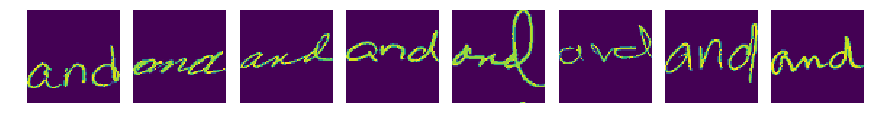

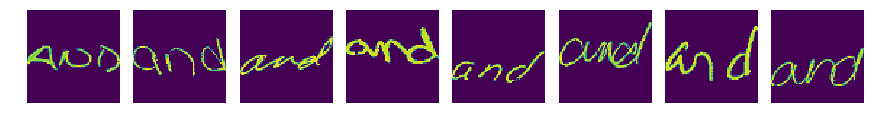

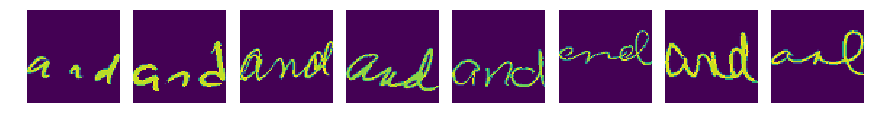

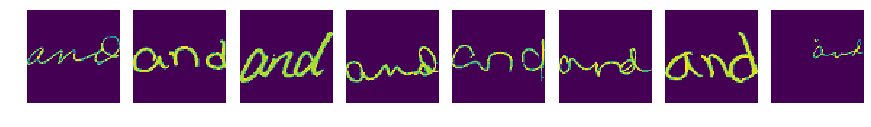

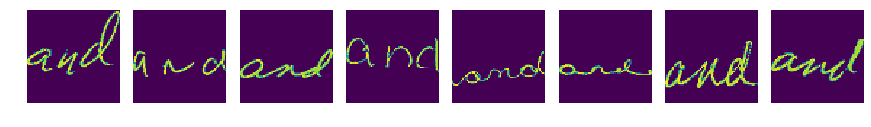

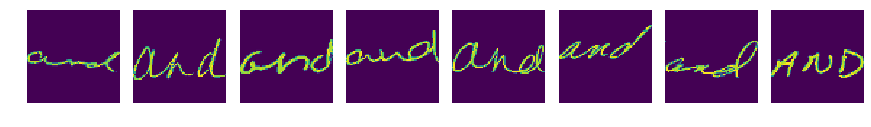

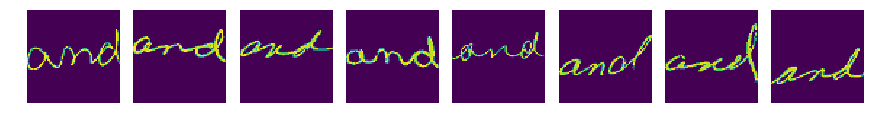

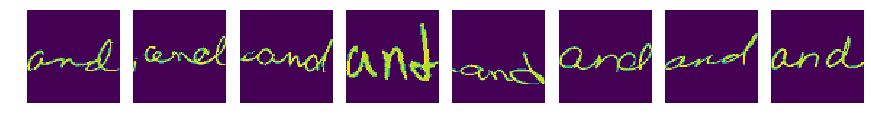

In [20]:
for r in range(8):
    f,ax = plt.subplots(1,8)
    f.subplots_adjust(hspace = .00, wspace=.15)
    f.set_size_inches(15,5)
    for c in range (8):
        ax[c].imshow(inputs[c+r*8].reshape((64,64)))
        ax[c].axis('off')

In [21]:
losses = {}
lossWeights = {}
for i in range(1,16):
    losses["out_feature_"+str(i)] = "categorical_crossentropy"
    lossWeights["out_feature_"+str(i)] = 1.0
# lossWeights["out_feature_1"] = 10.0
# lossWeights["out_feature_2"] = 8.0
# lossWeights["out_feature_3"] = 0.1
# lossWeights["out_feature_4"] = 8.0
# lossWeights["out_feature_5"] = 1.0
# lossWeights["out_feature_6"] = 5.0
# lossWeights["out_feature_7"] = 5.0
# lossWeights["out_feature_8"] = 10.0


In [22]:
mc = ModelCheckpoint(filepath='15_human_features_weights_shuffled_v1.h5', monitor='val_loss',period=1,save_best_only=True,save_weights_only=True,mode='auto',verbose=3)
es = EarlyStopping(patience=10000, monitor='val_loss', min_delta=0.0005, mode='auto')

In [23]:
EPOCHS = 50000
INIT_LR = 0.0001
# opt = SGD(lr=INIT_LR, decay=1e-6, momentum=0.95, nesterov=True)
# opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
opt = Adadelta(lr=INIT_LR, decay=1e-04)

# feat_extractor.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,metrics=["accuracy"])


human_features.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,metrics=["accuracy"])
human_features.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 1)    4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   32800       batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 64)   2097216     conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [24]:
# human_features.load_weights('human_features_weights_v3.h5')
# inputs,o = next(vg)
# for i in range(64):
#     print(i)
#     f_probs = human_features.predict(np.expand_dims(inputs[i],0))
# #     print(f_probs)
#     for prob in f_probs:
#         print(np.argmax(prob),end=',')
#     print('++++++++++++')
# human_features.load_weights('15_human_features_weights_shuffled_v1.h5')

In [25]:

hist = human_features.fit_generator(tg, callbacks=[mc,es]
                                    , epochs=EPOCHS
                                    , steps_per_epoch = 1
                                    , validation_data = vg
                                    , validation_steps = 1
                                    , verbose = 3
                                    
                                   )

Epoch 1/50000

Epoch 00001: val_loss improved from inf to 14.11893, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 2/50000

Epoch 00002: val_loss improved from 14.11893 to 14.11221, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 3/50000

Epoch 00003: val_loss did not improve from 14.11221
Epoch 4/50000

Epoch 00004: val_loss did not improve from 14.11221
Epoch 5/50000

Epoch 00005: val_loss improved from 14.11221 to 14.11162, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 6/50000

Epoch 00006: val_loss improved from 14.11162 to 14.11155, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 7/50000

Epoch 00007: val_loss improved from 14.11155 to 14.10559, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 8/50000

Epoch 00008: val_loss did not improve from 14.10559
Epoch 9/50000

Epoch 00009: val_loss improved from 14.10559 to 14.10398, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 10/50000

Epoch 00


Epoch 00104: val_loss did not improve from 14.05045
Epoch 105/50000

Epoch 00105: val_loss did not improve from 14.05045
Epoch 106/50000

Epoch 00106: val_loss did not improve from 14.05045
Epoch 107/50000

Epoch 00107: val_loss did not improve from 14.05045
Epoch 108/50000

Epoch 00108: val_loss did not improve from 14.05045
Epoch 109/50000

Epoch 00109: val_loss did not improve from 14.05045
Epoch 110/50000

Epoch 00110: val_loss improved from 14.05045 to 14.04513, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 111/50000

Epoch 00111: val_loss did not improve from 14.04513
Epoch 112/50000

Epoch 00112: val_loss improved from 14.04513 to 14.04316, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 113/50000

Epoch 00113: val_loss did not improve from 14.04316
Epoch 114/50000

Epoch 00114: val_loss did not improve from 14.04316
Epoch 115/50000

Epoch 00115: val_loss did not improve from 14.04316
Epoch 116/50000

Epoch 00116: val_loss did not improve from 14

Epoch 209/50000

Epoch 00209: val_loss did not improve from 13.96338
Epoch 210/50000

Epoch 00210: val_loss did not improve from 13.96338
Epoch 211/50000

Epoch 00211: val_loss improved from 13.96338 to 13.94879, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 212/50000

Epoch 00212: val_loss did not improve from 13.94879
Epoch 213/50000

Epoch 00213: val_loss did not improve from 13.94879
Epoch 214/50000

Epoch 00214: val_loss did not improve from 13.94879
Epoch 215/50000

Epoch 00215: val_loss did not improve from 13.94879
Epoch 216/50000

Epoch 00216: val_loss did not improve from 13.94879
Epoch 217/50000

Epoch 00217: val_loss did not improve from 13.94879
Epoch 218/50000

Epoch 00218: val_loss did not improve from 13.94879
Epoch 219/50000

Epoch 00219: val_loss improved from 13.94879 to 13.94483, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 220/50000

Epoch 00220: val_loss did not improve from 13.94483
Epoch 221/50000

Epoch 00221: val_loss did not


Epoch 00309: val_loss did not improve from 13.80631
Epoch 310/50000

Epoch 00310: val_loss did not improve from 13.80631
Epoch 311/50000

Epoch 00311: val_loss did not improve from 13.80631
Epoch 312/50000

Epoch 00312: val_loss did not improve from 13.80631
Epoch 313/50000

Epoch 00313: val_loss did not improve from 13.80631
Epoch 314/50000

Epoch 00314: val_loss improved from 13.80631 to 13.80055, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 315/50000

Epoch 00315: val_loss did not improve from 13.80055
Epoch 316/50000

Epoch 00316: val_loss did not improve from 13.80055
Epoch 317/50000

Epoch 00317: val_loss improved from 13.80055 to 13.79134, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 318/50000

Epoch 00318: val_loss did not improve from 13.79134
Epoch 319/50000

Epoch 00319: val_loss did not improve from 13.79134
Epoch 320/50000

Epoch 00320: val_loss improved from 13.79134 to 13.78980, saving model to 15_human_features_weights_shuffled_v1.h5

Epoch 412/50000

Epoch 00412: val_loss did not improve from 13.45743
Epoch 413/50000

Epoch 00413: val_loss did not improve from 13.45743
Epoch 414/50000

Epoch 00414: val_loss did not improve from 13.45743
Epoch 415/50000

Epoch 00415: val_loss did not improve from 13.45743
Epoch 416/50000

Epoch 00416: val_loss did not improve from 13.45743
Epoch 417/50000

Epoch 00417: val_loss did not improve from 13.45743
Epoch 418/50000

Epoch 00418: val_loss did not improve from 13.45743
Epoch 419/50000

Epoch 00419: val_loss did not improve from 13.45743
Epoch 420/50000

Epoch 00420: val_loss improved from 13.45743 to 13.45044, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 421/50000

Epoch 00421: val_loss did not improve from 13.45044
Epoch 422/50000

Epoch 00422: val_loss improved from 13.45044 to 13.44924, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 423/50000

Epoch 00423: val_loss improved from 13.44924 to 13.41689, saving model to 15_human_features_weight

Epoch 515/50000

Epoch 00515: val_loss did not improve from 12.76704
Epoch 516/50000

Epoch 00516: val_loss improved from 12.76704 to 12.75296, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 517/50000

Epoch 00517: val_loss did not improve from 12.75296
Epoch 518/50000

Epoch 00518: val_loss did not improve from 12.75296
Epoch 519/50000

Epoch 00519: val_loss did not improve from 12.75296
Epoch 520/50000

Epoch 00520: val_loss did not improve from 12.75296
Epoch 521/50000

Epoch 00521: val_loss did not improve from 12.75296
Epoch 522/50000

Epoch 00522: val_loss did not improve from 12.75296
Epoch 523/50000

Epoch 00523: val_loss did not improve from 12.75296
Epoch 524/50000

Epoch 00524: val_loss did not improve from 12.75296
Epoch 525/50000

Epoch 00525: val_loss did not improve from 12.75296
Epoch 526/50000

Epoch 00526: val_loss improved from 12.75296 to 12.71204, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 527/50000

Epoch 00527: val_loss did not


Epoch 00621: val_loss did not improve from 11.96981
Epoch 622/50000

Epoch 00622: val_loss did not improve from 11.96981
Epoch 623/50000

Epoch 00623: val_loss improved from 11.96981 to 11.94569, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 624/50000

Epoch 00624: val_loss did not improve from 11.94569
Epoch 625/50000

Epoch 00625: val_loss did not improve from 11.94569
Epoch 626/50000

Epoch 00626: val_loss did not improve from 11.94569
Epoch 627/50000

Epoch 00627: val_loss did not improve from 11.94569
Epoch 628/50000

Epoch 00628: val_loss did not improve from 11.94569
Epoch 629/50000

Epoch 00629: val_loss did not improve from 11.94569
Epoch 630/50000

Epoch 00630: val_loss did not improve from 11.94569
Epoch 631/50000

Epoch 00631: val_loss improved from 11.94569 to 11.92611, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 632/50000

Epoch 00632: val_loss did not improve from 11.92611
Epoch 633/50000

Epoch 00633: val_loss did not improve from 11


Epoch 00734: val_loss did not improve from 11.51351
Epoch 735/50000

Epoch 00735: val_loss did not improve from 11.51351
Epoch 736/50000

Epoch 00736: val_loss did not improve from 11.51351
Epoch 737/50000

Epoch 00737: val_loss did not improve from 11.51351
Epoch 738/50000

Epoch 00738: val_loss did not improve from 11.51351
Epoch 739/50000

Epoch 00739: val_loss did not improve from 11.51351
Epoch 740/50000

Epoch 00740: val_loss did not improve from 11.51351
Epoch 741/50000

Epoch 00741: val_loss did not improve from 11.51351
Epoch 742/50000

Epoch 00742: val_loss did not improve from 11.51351
Epoch 743/50000

Epoch 00743: val_loss did not improve from 11.51351
Epoch 744/50000

Epoch 00744: val_loss did not improve from 11.51351
Epoch 745/50000

Epoch 00745: val_loss improved from 11.51351 to 11.40269, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 746/50000

Epoch 00746: val_loss did not improve from 11.40269
Epoch 747/50000

Epoch 00747: val_loss did not improve f


Epoch 00851: val_loss did not improve from 11.27165
Epoch 852/50000

Epoch 00852: val_loss did not improve from 11.27165
Epoch 853/50000

Epoch 00853: val_loss did not improve from 11.27165
Epoch 854/50000

Epoch 00854: val_loss did not improve from 11.27165
Epoch 855/50000

Epoch 00855: val_loss did not improve from 11.27165
Epoch 856/50000

Epoch 00856: val_loss did not improve from 11.27165
Epoch 857/50000

Epoch 00857: val_loss did not improve from 11.27165
Epoch 858/50000

Epoch 00858: val_loss did not improve from 11.27165
Epoch 859/50000

Epoch 00859: val_loss did not improve from 11.27165
Epoch 860/50000

Epoch 00860: val_loss did not improve from 11.27165
Epoch 861/50000

Epoch 00861: val_loss did not improve from 11.27165
Epoch 862/50000

Epoch 00862: val_loss did not improve from 11.27165
Epoch 863/50000

Epoch 00863: val_loss did not improve from 11.27165
Epoch 864/50000

Epoch 00864: val_loss did not improve from 11.27165
Epoch 865/50000

Epoch 00865: val_loss did not imp


Epoch 00969: val_loss did not improve from 11.14173
Epoch 970/50000

Epoch 00970: val_loss did not improve from 11.14173
Epoch 971/50000

Epoch 00971: val_loss did not improve from 11.14173
Epoch 972/50000

Epoch 00972: val_loss did not improve from 11.14173
Epoch 973/50000

Epoch 00973: val_loss did not improve from 11.14173
Epoch 974/50000

Epoch 00974: val_loss did not improve from 11.14173
Epoch 975/50000

Epoch 00975: val_loss did not improve from 11.14173
Epoch 976/50000

Epoch 00976: val_loss did not improve from 11.14173
Epoch 977/50000

Epoch 00977: val_loss did not improve from 11.14173
Epoch 978/50000

Epoch 00978: val_loss did not improve from 11.14173
Epoch 979/50000

Epoch 00979: val_loss did not improve from 11.14173
Epoch 980/50000

Epoch 00980: val_loss did not improve from 11.14173
Epoch 981/50000

Epoch 00981: val_loss did not improve from 11.14173
Epoch 982/50000

Epoch 00982: val_loss did not improve from 11.14173
Epoch 983/50000

Epoch 00983: val_loss did not imp


Epoch 01086: val_loss did not improve from 11.08373
Epoch 1087/50000

Epoch 01087: val_loss did not improve from 11.08373
Epoch 1088/50000

Epoch 01088: val_loss did not improve from 11.08373
Epoch 1089/50000

Epoch 01089: val_loss did not improve from 11.08373
Epoch 1090/50000

Epoch 01090: val_loss did not improve from 11.08373
Epoch 1091/50000

Epoch 01091: val_loss did not improve from 11.08373
Epoch 1092/50000

Epoch 01092: val_loss did not improve from 11.08373
Epoch 1093/50000

Epoch 01093: val_loss did not improve from 11.08373
Epoch 1094/50000

Epoch 01094: val_loss did not improve from 11.08373
Epoch 1095/50000

Epoch 01095: val_loss did not improve from 11.08373
Epoch 1096/50000

Epoch 01096: val_loss did not improve from 11.08373
Epoch 1097/50000

Epoch 01097: val_loss did not improve from 11.08373
Epoch 1098/50000

Epoch 01098: val_loss did not improve from 11.08373
Epoch 1099/50000

Epoch 01099: val_loss did not improve from 11.08373
Epoch 1100/50000

Epoch 01100: val_lo


Epoch 01204: val_loss did not improve from 11.08373
Epoch 1205/50000

Epoch 01205: val_loss did not improve from 11.08373
Epoch 1206/50000

Epoch 01206: val_loss did not improve from 11.08373
Epoch 1207/50000

Epoch 01207: val_loss did not improve from 11.08373
Epoch 1208/50000

Epoch 01208: val_loss did not improve from 11.08373
Epoch 1209/50000

Epoch 01209: val_loss did not improve from 11.08373
Epoch 1210/50000

Epoch 01210: val_loss did not improve from 11.08373
Epoch 1211/50000

Epoch 01211: val_loss did not improve from 11.08373
Epoch 1212/50000

Epoch 01212: val_loss did not improve from 11.08373
Epoch 1213/50000

Epoch 01213: val_loss did not improve from 11.08373
Epoch 1214/50000

Epoch 01214: val_loss did not improve from 11.08373
Epoch 1215/50000

Epoch 01215: val_loss did not improve from 11.08373
Epoch 1216/50000

Epoch 01216: val_loss did not improve from 11.08373
Epoch 1217/50000

Epoch 01217: val_loss did not improve from 11.08373
Epoch 1218/50000

Epoch 01218: val_lo


Epoch 01321: val_loss improved from 10.97834 to 10.95842, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 1322/50000

Epoch 01322: val_loss did not improve from 10.95842
Epoch 1323/50000

Epoch 01323: val_loss did not improve from 10.95842
Epoch 1324/50000

Epoch 01324: val_loss did not improve from 10.95842
Epoch 1325/50000

Epoch 01325: val_loss did not improve from 10.95842
Epoch 1326/50000

Epoch 01326: val_loss did not improve from 10.95842
Epoch 1327/50000

Epoch 01327: val_loss did not improve from 10.95842
Epoch 1328/50000

Epoch 01328: val_loss did not improve from 10.95842
Epoch 1329/50000

Epoch 01329: val_loss did not improve from 10.95842
Epoch 1330/50000

Epoch 01330: val_loss did not improve from 10.95842
Epoch 1331/50000

Epoch 01331: val_loss did not improve from 10.95842
Epoch 1332/50000

Epoch 01332: val_loss did not improve from 10.95842
Epoch 1333/50000

Epoch 01333: val_loss did not improve from 10.95842
Epoch 1334/50000

Epoch 01334: val_loss did 


Epoch 01438: val_loss did not improve from 10.95842
Epoch 1439/50000

Epoch 01439: val_loss did not improve from 10.95842
Epoch 1440/50000

Epoch 01440: val_loss did not improve from 10.95842
Epoch 1441/50000

Epoch 01441: val_loss did not improve from 10.95842
Epoch 1442/50000

Epoch 01442: val_loss did not improve from 10.95842
Epoch 1443/50000

Epoch 01443: val_loss did not improve from 10.95842
Epoch 1444/50000

Epoch 01444: val_loss did not improve from 10.95842
Epoch 1445/50000

Epoch 01445: val_loss did not improve from 10.95842
Epoch 1446/50000

Epoch 01446: val_loss did not improve from 10.95842
Epoch 1447/50000

Epoch 01447: val_loss did not improve from 10.95842
Epoch 1448/50000

Epoch 01448: val_loss did not improve from 10.95842
Epoch 1449/50000

Epoch 01449: val_loss did not improve from 10.95842
Epoch 1450/50000

Epoch 01450: val_loss did not improve from 10.95842
Epoch 1451/50000

Epoch 01451: val_loss did not improve from 10.95842
Epoch 1452/50000

Epoch 01452: val_lo


Epoch 01556: val_loss did not improve from 10.95842
Epoch 1557/50000

Epoch 01557: val_loss did not improve from 10.95842
Epoch 1558/50000

Epoch 01558: val_loss did not improve from 10.95842
Epoch 1559/50000

Epoch 01559: val_loss did not improve from 10.95842
Epoch 1560/50000

Epoch 01560: val_loss did not improve from 10.95842
Epoch 1561/50000

Epoch 01561: val_loss did not improve from 10.95842
Epoch 1562/50000

Epoch 01562: val_loss did not improve from 10.95842
Epoch 1563/50000

Epoch 01563: val_loss did not improve from 10.95842
Epoch 1564/50000

Epoch 01564: val_loss did not improve from 10.95842
Epoch 1565/50000

Epoch 01565: val_loss improved from 10.95842 to 10.88619, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 1566/50000

Epoch 01566: val_loss did not improve from 10.88619
Epoch 1567/50000

Epoch 01567: val_loss did not improve from 10.88619
Epoch 1568/50000

Epoch 01568: val_loss did not improve from 10.88619
Epoch 1569/50000

Epoch 01569: val_loss did 


Epoch 01672: val_loss did not improve from 10.87903
Epoch 1673/50000

Epoch 01673: val_loss did not improve from 10.87903
Epoch 1674/50000

Epoch 01674: val_loss did not improve from 10.87903
Epoch 1675/50000

Epoch 01675: val_loss did not improve from 10.87903
Epoch 1676/50000

Epoch 01676: val_loss did not improve from 10.87903
Epoch 1677/50000

Epoch 01677: val_loss did not improve from 10.87903
Epoch 1678/50000

Epoch 01678: val_loss did not improve from 10.87903
Epoch 1679/50000

Epoch 01679: val_loss did not improve from 10.87903
Epoch 1680/50000

Epoch 01680: val_loss did not improve from 10.87903
Epoch 1681/50000

Epoch 01681: val_loss did not improve from 10.87903
Epoch 1682/50000

Epoch 01682: val_loss did not improve from 10.87903
Epoch 1683/50000

Epoch 01683: val_loss did not improve from 10.87903
Epoch 1684/50000

Epoch 01684: val_loss did not improve from 10.87903
Epoch 1685/50000

Epoch 01685: val_loss did not improve from 10.87903
Epoch 1686/50000

Epoch 01686: val_lo


Epoch 01790: val_loss did not improve from 10.87903
Epoch 1791/50000

Epoch 01791: val_loss did not improve from 10.87903
Epoch 1792/50000

Epoch 01792: val_loss did not improve from 10.87903
Epoch 1793/50000

Epoch 01793: val_loss did not improve from 10.87903
Epoch 1794/50000

Epoch 01794: val_loss did not improve from 10.87903
Epoch 1795/50000

Epoch 01795: val_loss did not improve from 10.87903
Epoch 1796/50000

Epoch 01796: val_loss did not improve from 10.87903
Epoch 1797/50000

Epoch 01797: val_loss did not improve from 10.87903
Epoch 1798/50000

Epoch 01798: val_loss did not improve from 10.87903
Epoch 1799/50000

Epoch 01799: val_loss did not improve from 10.87903
Epoch 1800/50000

Epoch 01800: val_loss did not improve from 10.87903
Epoch 1801/50000

Epoch 01801: val_loss did not improve from 10.87903
Epoch 1802/50000

Epoch 01802: val_loss did not improve from 10.87903
Epoch 1803/50000

Epoch 01803: val_loss did not improve from 10.87903
Epoch 1804/50000

Epoch 01804: val_lo


Epoch 01908: val_loss did not improve from 10.87903
Epoch 1909/50000

Epoch 01909: val_loss did not improve from 10.87903
Epoch 1910/50000

Epoch 01910: val_loss did not improve from 10.87903
Epoch 1911/50000

Epoch 01911: val_loss did not improve from 10.87903
Epoch 1912/50000

Epoch 01912: val_loss did not improve from 10.87903
Epoch 1913/50000

Epoch 01913: val_loss did not improve from 10.87903
Epoch 1914/50000

Epoch 01914: val_loss did not improve from 10.87903
Epoch 1915/50000

Epoch 01915: val_loss did not improve from 10.87903
Epoch 1916/50000

Epoch 01916: val_loss did not improve from 10.87903
Epoch 1917/50000

Epoch 01917: val_loss did not improve from 10.87903
Epoch 1918/50000

Epoch 01918: val_loss did not improve from 10.87903
Epoch 1919/50000

Epoch 01919: val_loss did not improve from 10.87903
Epoch 1920/50000

Epoch 01920: val_loss did not improve from 10.87903
Epoch 1921/50000

Epoch 01921: val_loss did not improve from 10.87903
Epoch 1922/50000

Epoch 01922: val_lo


Epoch 02026: val_loss did not improve from 10.87903
Epoch 2027/50000

Epoch 02027: val_loss did not improve from 10.87903
Epoch 2028/50000

Epoch 02028: val_loss did not improve from 10.87903
Epoch 2029/50000

Epoch 02029: val_loss did not improve from 10.87903
Epoch 2030/50000

Epoch 02030: val_loss did not improve from 10.87903
Epoch 2031/50000

Epoch 02031: val_loss did not improve from 10.87903
Epoch 2032/50000

Epoch 02032: val_loss did not improve from 10.87903
Epoch 2033/50000

Epoch 02033: val_loss did not improve from 10.87903
Epoch 2034/50000

Epoch 02034: val_loss did not improve from 10.87903
Epoch 2035/50000

Epoch 02035: val_loss did not improve from 10.87903
Epoch 2036/50000

Epoch 02036: val_loss did not improve from 10.87903
Epoch 2037/50000

Epoch 02037: val_loss did not improve from 10.87903
Epoch 2038/50000

Epoch 02038: val_loss did not improve from 10.87903
Epoch 2039/50000

Epoch 02039: val_loss did not improve from 10.87903
Epoch 2040/50000

Epoch 02040: val_lo


Epoch 02144: val_loss did not improve from 10.87903
Epoch 2145/50000

Epoch 02145: val_loss did not improve from 10.87903
Epoch 2146/50000

Epoch 02146: val_loss did not improve from 10.87903
Epoch 2147/50000

Epoch 02147: val_loss did not improve from 10.87903
Epoch 2148/50000

Epoch 02148: val_loss did not improve from 10.87903
Epoch 2149/50000

Epoch 02149: val_loss did not improve from 10.87903
Epoch 2150/50000

Epoch 02150: val_loss did not improve from 10.87903
Epoch 2151/50000

Epoch 02151: val_loss did not improve from 10.87903
Epoch 2152/50000

Epoch 02152: val_loss did not improve from 10.87903
Epoch 2153/50000

Epoch 02153: val_loss did not improve from 10.87903
Epoch 2154/50000

Epoch 02154: val_loss did not improve from 10.87903
Epoch 2155/50000

Epoch 02155: val_loss did not improve from 10.87903
Epoch 2156/50000

Epoch 02156: val_loss did not improve from 10.87903
Epoch 2157/50000

Epoch 02157: val_loss did not improve from 10.87903
Epoch 2158/50000

Epoch 02158: val_lo


Epoch 02262: val_loss did not improve from 10.87903
Epoch 2263/50000

Epoch 02263: val_loss did not improve from 10.87903
Epoch 2264/50000

Epoch 02264: val_loss did not improve from 10.87903
Epoch 2265/50000

Epoch 02265: val_loss did not improve from 10.87903
Epoch 2266/50000

Epoch 02266: val_loss did not improve from 10.87903
Epoch 2267/50000

Epoch 02267: val_loss did not improve from 10.87903
Epoch 2268/50000

Epoch 02268: val_loss did not improve from 10.87903
Epoch 2269/50000

Epoch 02269: val_loss did not improve from 10.87903
Epoch 2270/50000

Epoch 02270: val_loss did not improve from 10.87903
Epoch 2271/50000

Epoch 02271: val_loss did not improve from 10.87903
Epoch 2272/50000

Epoch 02272: val_loss did not improve from 10.87903
Epoch 2273/50000

Epoch 02273: val_loss did not improve from 10.87903
Epoch 2274/50000

Epoch 02274: val_loss did not improve from 10.87903
Epoch 2275/50000

Epoch 02275: val_loss did not improve from 10.87903
Epoch 2276/50000

Epoch 02276: val_lo


Epoch 02380: val_loss did not improve from 10.87903
Epoch 2381/50000

Epoch 02381: val_loss did not improve from 10.87903
Epoch 2382/50000

Epoch 02382: val_loss did not improve from 10.87903
Epoch 2383/50000

Epoch 02383: val_loss did not improve from 10.87903
Epoch 2384/50000

Epoch 02384: val_loss did not improve from 10.87903
Epoch 2385/50000

Epoch 02385: val_loss did not improve from 10.87903
Epoch 2386/50000

Epoch 02386: val_loss did not improve from 10.87903
Epoch 2387/50000

Epoch 02387: val_loss did not improve from 10.87903
Epoch 2388/50000

Epoch 02388: val_loss did not improve from 10.87903
Epoch 2389/50000

Epoch 02389: val_loss did not improve from 10.87903
Epoch 2390/50000

Epoch 02390: val_loss did not improve from 10.87903
Epoch 2391/50000

Epoch 02391: val_loss did not improve from 10.87903
Epoch 2392/50000

Epoch 02392: val_loss did not improve from 10.87903
Epoch 2393/50000

Epoch 02393: val_loss did not improve from 10.87903
Epoch 2394/50000

Epoch 02394: val_lo


Epoch 02498: val_loss did not improve from 10.87903
Epoch 2499/50000

Epoch 02499: val_loss did not improve from 10.87903
Epoch 2500/50000

Epoch 02500: val_loss did not improve from 10.87903
Epoch 2501/50000

Epoch 02501: val_loss did not improve from 10.87903
Epoch 2502/50000

Epoch 02502: val_loss did not improve from 10.87903
Epoch 2503/50000

Epoch 02503: val_loss did not improve from 10.87903
Epoch 2504/50000

Epoch 02504: val_loss did not improve from 10.87903
Epoch 2505/50000

Epoch 02505: val_loss did not improve from 10.87903
Epoch 2506/50000

Epoch 02506: val_loss did not improve from 10.87903
Epoch 2507/50000

Epoch 02507: val_loss did not improve from 10.87903
Epoch 2508/50000

Epoch 02508: val_loss did not improve from 10.87903
Epoch 2509/50000

Epoch 02509: val_loss did not improve from 10.87903
Epoch 2510/50000

Epoch 02510: val_loss did not improve from 10.87903
Epoch 2511/50000

Epoch 02511: val_loss did not improve from 10.87903
Epoch 2512/50000

Epoch 02512: val_lo


Epoch 02616: val_loss did not improve from 10.87903
Epoch 2617/50000

Epoch 02617: val_loss did not improve from 10.87903
Epoch 2618/50000

Epoch 02618: val_loss did not improve from 10.87903
Epoch 2619/50000

Epoch 02619: val_loss did not improve from 10.87903
Epoch 2620/50000

Epoch 02620: val_loss did not improve from 10.87903
Epoch 2621/50000

Epoch 02621: val_loss did not improve from 10.87903
Epoch 2622/50000

Epoch 02622: val_loss did not improve from 10.87903
Epoch 2623/50000

Epoch 02623: val_loss did not improve from 10.87903
Epoch 2624/50000

Epoch 02624: val_loss did not improve from 10.87903
Epoch 2625/50000

Epoch 02625: val_loss did not improve from 10.87903
Epoch 2626/50000

Epoch 02626: val_loss did not improve from 10.87903
Epoch 2627/50000

Epoch 02627: val_loss did not improve from 10.87903
Epoch 2628/50000

Epoch 02628: val_loss did not improve from 10.87903
Epoch 2629/50000

Epoch 02629: val_loss did not improve from 10.87903
Epoch 2630/50000

Epoch 02630: val_lo


Epoch 02734: val_loss did not improve from 10.87903
Epoch 2735/50000

Epoch 02735: val_loss did not improve from 10.87903
Epoch 2736/50000

Epoch 02736: val_loss did not improve from 10.87903
Epoch 2737/50000

Epoch 02737: val_loss did not improve from 10.87903
Epoch 2738/50000

Epoch 02738: val_loss did not improve from 10.87903
Epoch 2739/50000

Epoch 02739: val_loss did not improve from 10.87903
Epoch 2740/50000

Epoch 02740: val_loss did not improve from 10.87903
Epoch 2741/50000

Epoch 02741: val_loss did not improve from 10.87903
Epoch 2742/50000

Epoch 02742: val_loss did not improve from 10.87903
Epoch 2743/50000

Epoch 02743: val_loss did not improve from 10.87903
Epoch 2744/50000

Epoch 02744: val_loss did not improve from 10.87903
Epoch 2745/50000

Epoch 02745: val_loss did not improve from 10.87903
Epoch 2746/50000

Epoch 02746: val_loss did not improve from 10.87903
Epoch 2747/50000

Epoch 02747: val_loss did not improve from 10.87903
Epoch 2748/50000

Epoch 02748: val_lo


Epoch 02852: val_loss did not improve from 10.87903
Epoch 2853/50000

Epoch 02853: val_loss did not improve from 10.87903
Epoch 2854/50000

Epoch 02854: val_loss did not improve from 10.87903
Epoch 2855/50000

Epoch 02855: val_loss did not improve from 10.87903
Epoch 2856/50000

Epoch 02856: val_loss did not improve from 10.87903
Epoch 2857/50000

Epoch 02857: val_loss did not improve from 10.87903
Epoch 2858/50000

Epoch 02858: val_loss did not improve from 10.87903
Epoch 2859/50000

Epoch 02859: val_loss did not improve from 10.87903
Epoch 2860/50000

Epoch 02860: val_loss did not improve from 10.87903
Epoch 2861/50000

Epoch 02861: val_loss did not improve from 10.87903
Epoch 2862/50000

Epoch 02862: val_loss did not improve from 10.87903
Epoch 2863/50000

Epoch 02863: val_loss did not improve from 10.87903
Epoch 2864/50000

Epoch 02864: val_loss did not improve from 10.87903
Epoch 2865/50000

Epoch 02865: val_loss did not improve from 10.87903
Epoch 2866/50000

Epoch 02866: val_lo


Epoch 02970: val_loss did not improve from 10.87903
Epoch 2971/50000

Epoch 02971: val_loss did not improve from 10.87903
Epoch 2972/50000

Epoch 02972: val_loss did not improve from 10.87903
Epoch 2973/50000

Epoch 02973: val_loss did not improve from 10.87903
Epoch 2974/50000

Epoch 02974: val_loss did not improve from 10.87903
Epoch 2975/50000

Epoch 02975: val_loss did not improve from 10.87903
Epoch 2976/50000

Epoch 02976: val_loss did not improve from 10.87903
Epoch 2977/50000

Epoch 02977: val_loss did not improve from 10.87903
Epoch 2978/50000

Epoch 02978: val_loss did not improve from 10.87903
Epoch 2979/50000

Epoch 02979: val_loss did not improve from 10.87903
Epoch 2980/50000

Epoch 02980: val_loss did not improve from 10.87903
Epoch 2981/50000

Epoch 02981: val_loss did not improve from 10.87903
Epoch 2982/50000

Epoch 02982: val_loss did not improve from 10.87903
Epoch 2983/50000

Epoch 02983: val_loss did not improve from 10.87903
Epoch 2984/50000

Epoch 02984: val_lo


Epoch 03088: val_loss did not improve from 10.87903
Epoch 3089/50000

Epoch 03089: val_loss did not improve from 10.87903
Epoch 3090/50000

Epoch 03090: val_loss did not improve from 10.87903
Epoch 3091/50000

Epoch 03091: val_loss did not improve from 10.87903
Epoch 3092/50000

Epoch 03092: val_loss did not improve from 10.87903
Epoch 3093/50000

Epoch 03093: val_loss did not improve from 10.87903
Epoch 3094/50000

Epoch 03094: val_loss did not improve from 10.87903
Epoch 3095/50000

Epoch 03095: val_loss did not improve from 10.87903
Epoch 3096/50000

Epoch 03096: val_loss did not improve from 10.87903
Epoch 3097/50000

Epoch 03097: val_loss did not improve from 10.87903
Epoch 3098/50000

Epoch 03098: val_loss did not improve from 10.87903
Epoch 3099/50000

Epoch 03099: val_loss did not improve from 10.87903
Epoch 3100/50000

Epoch 03100: val_loss did not improve from 10.87903
Epoch 3101/50000

Epoch 03101: val_loss did not improve from 10.87903
Epoch 3102/50000

Epoch 03102: val_lo


Epoch 03206: val_loss did not improve from 10.87903
Epoch 3207/50000

Epoch 03207: val_loss did not improve from 10.87903
Epoch 3208/50000

Epoch 03208: val_loss did not improve from 10.87903
Epoch 3209/50000

Epoch 03209: val_loss did not improve from 10.87903
Epoch 3210/50000

Epoch 03210: val_loss did not improve from 10.87903
Epoch 3211/50000

Epoch 03211: val_loss did not improve from 10.87903
Epoch 3212/50000

Epoch 03212: val_loss did not improve from 10.87903
Epoch 3213/50000

Epoch 03213: val_loss did not improve from 10.87903
Epoch 3214/50000

Epoch 03214: val_loss did not improve from 10.87903
Epoch 3215/50000

Epoch 03215: val_loss did not improve from 10.87903
Epoch 3216/50000

Epoch 03216: val_loss did not improve from 10.87903
Epoch 3217/50000

Epoch 03217: val_loss did not improve from 10.87903
Epoch 3218/50000

Epoch 03218: val_loss did not improve from 10.87903
Epoch 3219/50000

Epoch 03219: val_loss did not improve from 10.87903
Epoch 3220/50000

Epoch 03220: val_lo


Epoch 03324: val_loss did not improve from 10.87903
Epoch 3325/50000

Epoch 03325: val_loss did not improve from 10.87903
Epoch 3326/50000

Epoch 03326: val_loss did not improve from 10.87903
Epoch 3327/50000

Epoch 03327: val_loss did not improve from 10.87903
Epoch 3328/50000

Epoch 03328: val_loss did not improve from 10.87903
Epoch 3329/50000

Epoch 03329: val_loss did not improve from 10.87903
Epoch 3330/50000

Epoch 03330: val_loss did not improve from 10.87903
Epoch 3331/50000

Epoch 03331: val_loss did not improve from 10.87903
Epoch 3332/50000

Epoch 03332: val_loss did not improve from 10.87903
Epoch 3333/50000

Epoch 03333: val_loss did not improve from 10.87903
Epoch 3334/50000

Epoch 03334: val_loss did not improve from 10.87903
Epoch 3335/50000

Epoch 03335: val_loss did not improve from 10.87903
Epoch 3336/50000

Epoch 03336: val_loss did not improve from 10.87903
Epoch 3337/50000

Epoch 03337: val_loss did not improve from 10.87903
Epoch 3338/50000

Epoch 03338: val_lo


Epoch 03442: val_loss did not improve from 10.87903
Epoch 3443/50000

Epoch 03443: val_loss did not improve from 10.87903
Epoch 3444/50000

Epoch 03444: val_loss did not improve from 10.87903
Epoch 3445/50000

Epoch 03445: val_loss did not improve from 10.87903
Epoch 3446/50000

Epoch 03446: val_loss did not improve from 10.87903
Epoch 3447/50000

Epoch 03447: val_loss did not improve from 10.87903
Epoch 3448/50000

Epoch 03448: val_loss did not improve from 10.87903
Epoch 3449/50000

Epoch 03449: val_loss did not improve from 10.87903
Epoch 3450/50000

Epoch 03450: val_loss did not improve from 10.87903
Epoch 3451/50000

Epoch 03451: val_loss did not improve from 10.87903
Epoch 3452/50000

Epoch 03452: val_loss did not improve from 10.87903
Epoch 3453/50000

Epoch 03453: val_loss did not improve from 10.87903
Epoch 3454/50000

Epoch 03454: val_loss did not improve from 10.87903
Epoch 3455/50000

Epoch 03455: val_loss did not improve from 10.87903
Epoch 3456/50000

Epoch 03456: val_lo


Epoch 03560: val_loss did not improve from 10.87903
Epoch 3561/50000

Epoch 03561: val_loss did not improve from 10.87903
Epoch 3562/50000

Epoch 03562: val_loss did not improve from 10.87903
Epoch 3563/50000

Epoch 03563: val_loss did not improve from 10.87903
Epoch 3564/50000

Epoch 03564: val_loss did not improve from 10.87903
Epoch 3565/50000

Epoch 03565: val_loss did not improve from 10.87903
Epoch 3566/50000

Epoch 03566: val_loss did not improve from 10.87903
Epoch 3567/50000

Epoch 03567: val_loss did not improve from 10.87903
Epoch 3568/50000

Epoch 03568: val_loss did not improve from 10.87903
Epoch 3569/50000

Epoch 03569: val_loss did not improve from 10.87903
Epoch 3570/50000

Epoch 03570: val_loss did not improve from 10.87903
Epoch 3571/50000

Epoch 03571: val_loss did not improve from 10.87903
Epoch 3572/50000

Epoch 03572: val_loss did not improve from 10.87903
Epoch 3573/50000

Epoch 03573: val_loss did not improve from 10.87903
Epoch 3574/50000

Epoch 03574: val_lo


Epoch 03678: val_loss did not improve from 10.87903
Epoch 3679/50000

Epoch 03679: val_loss did not improve from 10.87903
Epoch 3680/50000

Epoch 03680: val_loss did not improve from 10.87903
Epoch 3681/50000

Epoch 03681: val_loss did not improve from 10.87903
Epoch 3682/50000

Epoch 03682: val_loss did not improve from 10.87903
Epoch 3683/50000

Epoch 03683: val_loss did not improve from 10.87903
Epoch 3684/50000

Epoch 03684: val_loss did not improve from 10.87903
Epoch 3685/50000

Epoch 03685: val_loss did not improve from 10.87903
Epoch 3686/50000

Epoch 03686: val_loss did not improve from 10.87903
Epoch 3687/50000

Epoch 03687: val_loss did not improve from 10.87903
Epoch 3688/50000

Epoch 03688: val_loss did not improve from 10.87903
Epoch 3689/50000

Epoch 03689: val_loss did not improve from 10.87903
Epoch 3690/50000

Epoch 03690: val_loss did not improve from 10.87903
Epoch 3691/50000

Epoch 03691: val_loss did not improve from 10.87903
Epoch 3692/50000

Epoch 03692: val_lo


Epoch 03796: val_loss did not improve from 10.87903
Epoch 3797/50000

Epoch 03797: val_loss did not improve from 10.87903
Epoch 3798/50000

Epoch 03798: val_loss did not improve from 10.87903
Epoch 3799/50000

Epoch 03799: val_loss did not improve from 10.87903
Epoch 3800/50000

Epoch 03800: val_loss did not improve from 10.87903
Epoch 3801/50000

Epoch 03801: val_loss did not improve from 10.87903
Epoch 3802/50000

Epoch 03802: val_loss did not improve from 10.87903
Epoch 3803/50000

Epoch 03803: val_loss did not improve from 10.87903
Epoch 3804/50000

Epoch 03804: val_loss did not improve from 10.87903
Epoch 3805/50000

Epoch 03805: val_loss did not improve from 10.87903
Epoch 3806/50000

Epoch 03806: val_loss did not improve from 10.87903
Epoch 3807/50000

Epoch 03807: val_loss did not improve from 10.87903
Epoch 3808/50000

Epoch 03808: val_loss did not improve from 10.87903
Epoch 3809/50000

Epoch 03809: val_loss did not improve from 10.87903
Epoch 3810/50000

Epoch 03810: val_lo


Epoch 03914: val_loss did not improve from 10.87903
Epoch 3915/50000

Epoch 03915: val_loss did not improve from 10.87903
Epoch 3916/50000

Epoch 03916: val_loss did not improve from 10.87903
Epoch 3917/50000

Epoch 03917: val_loss did not improve from 10.87903
Epoch 3918/50000

Epoch 03918: val_loss did not improve from 10.87903
Epoch 3919/50000

Epoch 03919: val_loss did not improve from 10.87903
Epoch 3920/50000

Epoch 03920: val_loss did not improve from 10.87903
Epoch 3921/50000

Epoch 03921: val_loss did not improve from 10.87903
Epoch 3922/50000

Epoch 03922: val_loss did not improve from 10.87903
Epoch 3923/50000

Epoch 03923: val_loss did not improve from 10.87903
Epoch 3924/50000

Epoch 03924: val_loss did not improve from 10.87903
Epoch 3925/50000

Epoch 03925: val_loss did not improve from 10.87903
Epoch 3926/50000

Epoch 03926: val_loss did not improve from 10.87903
Epoch 3927/50000

Epoch 03927: val_loss did not improve from 10.87903
Epoch 3928/50000

Epoch 03928: val_lo


Epoch 04032: val_loss did not improve from 10.87903
Epoch 4033/50000

Epoch 04033: val_loss did not improve from 10.87903
Epoch 4034/50000

Epoch 04034: val_loss did not improve from 10.87903
Epoch 4035/50000

Epoch 04035: val_loss did not improve from 10.87903
Epoch 4036/50000

Epoch 04036: val_loss did not improve from 10.87903
Epoch 4037/50000

Epoch 04037: val_loss did not improve from 10.87903
Epoch 4038/50000

Epoch 04038: val_loss did not improve from 10.87903
Epoch 4039/50000

Epoch 04039: val_loss did not improve from 10.87903
Epoch 4040/50000

Epoch 04040: val_loss did not improve from 10.87903
Epoch 4041/50000

Epoch 04041: val_loss did not improve from 10.87903
Epoch 4042/50000

Epoch 04042: val_loss did not improve from 10.87903
Epoch 4043/50000

Epoch 04043: val_loss did not improve from 10.87903
Epoch 4044/50000

Epoch 04044: val_loss did not improve from 10.87903
Epoch 4045/50000

Epoch 04045: val_loss did not improve from 10.87903
Epoch 4046/50000

Epoch 04046: val_lo


Epoch 04150: val_loss did not improve from 10.87903
Epoch 4151/50000

Epoch 04151: val_loss did not improve from 10.87903
Epoch 4152/50000

Epoch 04152: val_loss did not improve from 10.87903
Epoch 4153/50000

Epoch 04153: val_loss did not improve from 10.87903
Epoch 4154/50000

Epoch 04154: val_loss did not improve from 10.87903
Epoch 4155/50000

Epoch 04155: val_loss did not improve from 10.87903
Epoch 4156/50000

Epoch 04156: val_loss did not improve from 10.87903
Epoch 4157/50000

Epoch 04157: val_loss did not improve from 10.87903
Epoch 4158/50000

Epoch 04158: val_loss did not improve from 10.87903
Epoch 4159/50000

Epoch 04159: val_loss did not improve from 10.87903
Epoch 4160/50000

Epoch 04160: val_loss did not improve from 10.87903
Epoch 4161/50000

Epoch 04161: val_loss did not improve from 10.87903
Epoch 4162/50000

Epoch 04162: val_loss did not improve from 10.87903
Epoch 4163/50000

Epoch 04163: val_loss did not improve from 10.87903
Epoch 4164/50000

Epoch 04164: val_lo


Epoch 04268: val_loss did not improve from 10.87903
Epoch 4269/50000

Epoch 04269: val_loss did not improve from 10.87903
Epoch 4270/50000

Epoch 04270: val_loss did not improve from 10.87903
Epoch 4271/50000

Epoch 04271: val_loss did not improve from 10.87903
Epoch 4272/50000

Epoch 04272: val_loss did not improve from 10.87903
Epoch 4273/50000

Epoch 04273: val_loss did not improve from 10.87903
Epoch 4274/50000

Epoch 04274: val_loss did not improve from 10.87903
Epoch 4275/50000

Epoch 04275: val_loss did not improve from 10.87903
Epoch 4276/50000

Epoch 04276: val_loss did not improve from 10.87903
Epoch 4277/50000

Epoch 04277: val_loss did not improve from 10.87903
Epoch 4278/50000

Epoch 04278: val_loss did not improve from 10.87903
Epoch 4279/50000

Epoch 04279: val_loss did not improve from 10.87903
Epoch 4280/50000

Epoch 04280: val_loss did not improve from 10.87903
Epoch 4281/50000

Epoch 04281: val_loss did not improve from 10.87903
Epoch 4282/50000

Epoch 04282: val_lo


Epoch 04386: val_loss did not improve from 10.87903
Epoch 4387/50000

Epoch 04387: val_loss did not improve from 10.87903
Epoch 4388/50000

Epoch 04388: val_loss did not improve from 10.87903
Epoch 4389/50000

Epoch 04389: val_loss did not improve from 10.87903
Epoch 4390/50000

Epoch 04390: val_loss did not improve from 10.87903
Epoch 4391/50000

Epoch 04391: val_loss did not improve from 10.87903
Epoch 4392/50000

Epoch 04392: val_loss did not improve from 10.87903
Epoch 4393/50000

Epoch 04393: val_loss did not improve from 10.87903
Epoch 4394/50000

Epoch 04394: val_loss did not improve from 10.87903
Epoch 4395/50000

Epoch 04395: val_loss did not improve from 10.87903
Epoch 4396/50000

Epoch 04396: val_loss did not improve from 10.87903
Epoch 4397/50000

Epoch 04397: val_loss did not improve from 10.87903
Epoch 4398/50000

Epoch 04398: val_loss did not improve from 10.87903
Epoch 4399/50000

Epoch 04399: val_loss did not improve from 10.87903
Epoch 4400/50000

Epoch 04400: val_lo


Epoch 04504: val_loss did not improve from 10.87903
Epoch 4505/50000

Epoch 04505: val_loss did not improve from 10.87903
Epoch 4506/50000

Epoch 04506: val_loss did not improve from 10.87903
Epoch 4507/50000

Epoch 04507: val_loss did not improve from 10.87903
Epoch 4508/50000

Epoch 04508: val_loss did not improve from 10.87903
Epoch 4509/50000

Epoch 04509: val_loss did not improve from 10.87903
Epoch 4510/50000

Epoch 04510: val_loss did not improve from 10.87903
Epoch 4511/50000

Epoch 04511: val_loss did not improve from 10.87903
Epoch 4512/50000

Epoch 04512: val_loss did not improve from 10.87903
Epoch 4513/50000

Epoch 04513: val_loss did not improve from 10.87903
Epoch 4514/50000

Epoch 04514: val_loss did not improve from 10.87903
Epoch 4515/50000

Epoch 04515: val_loss did not improve from 10.87903
Epoch 4516/50000

Epoch 04516: val_loss did not improve from 10.87903
Epoch 4517/50000

Epoch 04517: val_loss did not improve from 10.87903
Epoch 4518/50000

Epoch 04518: val_lo


Epoch 04622: val_loss did not improve from 10.87903
Epoch 4623/50000

Epoch 04623: val_loss did not improve from 10.87903
Epoch 4624/50000

Epoch 04624: val_loss did not improve from 10.87903
Epoch 4625/50000

Epoch 04625: val_loss did not improve from 10.87903
Epoch 4626/50000

Epoch 04626: val_loss did not improve from 10.87903
Epoch 4627/50000

Epoch 04627: val_loss did not improve from 10.87903
Epoch 4628/50000

Epoch 04628: val_loss did not improve from 10.87903
Epoch 4629/50000

Epoch 04629: val_loss did not improve from 10.87903
Epoch 4630/50000

Epoch 04630: val_loss did not improve from 10.87903
Epoch 4631/50000

Epoch 04631: val_loss did not improve from 10.87903
Epoch 4632/50000

Epoch 04632: val_loss did not improve from 10.87903
Epoch 4633/50000

Epoch 04633: val_loss did not improve from 10.87903
Epoch 4634/50000

Epoch 04634: val_loss did not improve from 10.87903
Epoch 4635/50000

Epoch 04635: val_loss did not improve from 10.87903
Epoch 4636/50000

Epoch 04636: val_lo


Epoch 04740: val_loss did not improve from 10.87903
Epoch 4741/50000

Epoch 04741: val_loss did not improve from 10.87903
Epoch 4742/50000

Epoch 04742: val_loss did not improve from 10.87903
Epoch 4743/50000

Epoch 04743: val_loss did not improve from 10.87903
Epoch 4744/50000

Epoch 04744: val_loss did not improve from 10.87903
Epoch 4745/50000

Epoch 04745: val_loss did not improve from 10.87903
Epoch 4746/50000

Epoch 04746: val_loss did not improve from 10.87903
Epoch 4747/50000

Epoch 04747: val_loss did not improve from 10.87903
Epoch 4748/50000

Epoch 04748: val_loss did not improve from 10.87903
Epoch 4749/50000

Epoch 04749: val_loss did not improve from 10.87903
Epoch 4750/50000

Epoch 04750: val_loss did not improve from 10.87903
Epoch 4751/50000

Epoch 04751: val_loss did not improve from 10.87903
Epoch 4752/50000

Epoch 04752: val_loss did not improve from 10.87903
Epoch 4753/50000

Epoch 04753: val_loss did not improve from 10.87903
Epoch 4754/50000

Epoch 04754: val_lo


Epoch 04857: val_loss did not improve from 10.78779
Epoch 4858/50000

Epoch 04858: val_loss did not improve from 10.78779
Epoch 4859/50000

Epoch 04859: val_loss did not improve from 10.78779
Epoch 4860/50000

Epoch 04860: val_loss did not improve from 10.78779
Epoch 4861/50000

Epoch 04861: val_loss did not improve from 10.78779
Epoch 4862/50000

Epoch 04862: val_loss did not improve from 10.78779
Epoch 4863/50000

Epoch 04863: val_loss did not improve from 10.78779
Epoch 4864/50000

Epoch 04864: val_loss did not improve from 10.78779
Epoch 4865/50000

Epoch 04865: val_loss did not improve from 10.78779
Epoch 4866/50000

Epoch 04866: val_loss did not improve from 10.78779
Epoch 4867/50000

Epoch 04867: val_loss did not improve from 10.78779
Epoch 4868/50000

Epoch 04868: val_loss did not improve from 10.78779
Epoch 4869/50000

Epoch 04869: val_loss did not improve from 10.78779
Epoch 4870/50000

Epoch 04870: val_loss did not improve from 10.78779
Epoch 4871/50000

Epoch 04871: val_lo


Epoch 04975: val_loss did not improve from 10.78779
Epoch 4976/50000

Epoch 04976: val_loss did not improve from 10.78779
Epoch 4977/50000

Epoch 04977: val_loss did not improve from 10.78779
Epoch 4978/50000

Epoch 04978: val_loss did not improve from 10.78779
Epoch 4979/50000

Epoch 04979: val_loss did not improve from 10.78779
Epoch 4980/50000

Epoch 04980: val_loss did not improve from 10.78779
Epoch 4981/50000

Epoch 04981: val_loss did not improve from 10.78779
Epoch 4982/50000

Epoch 04982: val_loss did not improve from 10.78779
Epoch 4983/50000

Epoch 04983: val_loss did not improve from 10.78779
Epoch 4984/50000

Epoch 04984: val_loss did not improve from 10.78779
Epoch 4985/50000

Epoch 04985: val_loss did not improve from 10.78779
Epoch 4986/50000

Epoch 04986: val_loss did not improve from 10.78779
Epoch 4987/50000

Epoch 04987: val_loss did not improve from 10.78779
Epoch 4988/50000

Epoch 04988: val_loss did not improve from 10.78779
Epoch 4989/50000

Epoch 04989: val_lo


Epoch 05093: val_loss did not improve from 10.78779
Epoch 5094/50000

Epoch 05094: val_loss did not improve from 10.78779
Epoch 5095/50000

Epoch 05095: val_loss did not improve from 10.78779
Epoch 5096/50000

Epoch 05096: val_loss did not improve from 10.78779
Epoch 5097/50000

Epoch 05097: val_loss did not improve from 10.78779
Epoch 5098/50000

Epoch 05098: val_loss did not improve from 10.78779
Epoch 5099/50000

Epoch 05099: val_loss did not improve from 10.78779
Epoch 5100/50000

Epoch 05100: val_loss did not improve from 10.78779
Epoch 5101/50000

Epoch 05101: val_loss did not improve from 10.78779
Epoch 5102/50000

Epoch 05102: val_loss did not improve from 10.78779
Epoch 5103/50000

Epoch 05103: val_loss did not improve from 10.78779
Epoch 5104/50000

Epoch 05104: val_loss did not improve from 10.78779
Epoch 5105/50000

Epoch 05105: val_loss did not improve from 10.78779
Epoch 5106/50000

Epoch 05106: val_loss did not improve from 10.78779
Epoch 5107/50000

Epoch 05107: val_lo


Epoch 05211: val_loss did not improve from 10.78779
Epoch 5212/50000

Epoch 05212: val_loss did not improve from 10.78779
Epoch 5213/50000

Epoch 05213: val_loss did not improve from 10.78779
Epoch 5214/50000

Epoch 05214: val_loss did not improve from 10.78779
Epoch 5215/50000

Epoch 05215: val_loss did not improve from 10.78779
Epoch 5216/50000

Epoch 05216: val_loss did not improve from 10.78779
Epoch 5217/50000

Epoch 05217: val_loss did not improve from 10.78779
Epoch 5218/50000

Epoch 05218: val_loss did not improve from 10.78779
Epoch 5219/50000

Epoch 05219: val_loss did not improve from 10.78779
Epoch 5220/50000

Epoch 05220: val_loss did not improve from 10.78779
Epoch 5221/50000

Epoch 05221: val_loss did not improve from 10.78779
Epoch 5222/50000

Epoch 05222: val_loss did not improve from 10.78779
Epoch 5223/50000

Epoch 05223: val_loss did not improve from 10.78779
Epoch 5224/50000

Epoch 05224: val_loss did not improve from 10.78779
Epoch 5225/50000

Epoch 05225: val_lo


Epoch 05329: val_loss did not improve from 10.78779
Epoch 5330/50000

Epoch 05330: val_loss did not improve from 10.78779
Epoch 5331/50000

Epoch 05331: val_loss did not improve from 10.78779
Epoch 5332/50000

Epoch 05332: val_loss did not improve from 10.78779
Epoch 5333/50000

Epoch 05333: val_loss did not improve from 10.78779
Epoch 5334/50000

Epoch 05334: val_loss did not improve from 10.78779
Epoch 5335/50000

Epoch 05335: val_loss did not improve from 10.78779
Epoch 5336/50000

Epoch 05336: val_loss did not improve from 10.78779
Epoch 5337/50000

Epoch 05337: val_loss did not improve from 10.78779
Epoch 5338/50000

Epoch 05338: val_loss did not improve from 10.78779
Epoch 5339/50000

Epoch 05339: val_loss did not improve from 10.78779
Epoch 5340/50000

Epoch 05340: val_loss did not improve from 10.78779
Epoch 5341/50000

Epoch 05341: val_loss did not improve from 10.78779
Epoch 5342/50000

Epoch 05342: val_loss did not improve from 10.78779
Epoch 5343/50000

Epoch 05343: val_lo


Epoch 05447: val_loss did not improve from 10.78779
Epoch 5448/50000

Epoch 05448: val_loss did not improve from 10.78779
Epoch 5449/50000

Epoch 05449: val_loss did not improve from 10.78779
Epoch 5450/50000

Epoch 05450: val_loss did not improve from 10.78779
Epoch 5451/50000

Epoch 05451: val_loss did not improve from 10.78779
Epoch 5452/50000

Epoch 05452: val_loss did not improve from 10.78779
Epoch 5453/50000

Epoch 05453: val_loss did not improve from 10.78779
Epoch 5454/50000

Epoch 05454: val_loss did not improve from 10.78779
Epoch 5455/50000

Epoch 05455: val_loss did not improve from 10.78779
Epoch 5456/50000

Epoch 05456: val_loss did not improve from 10.78779
Epoch 5457/50000

Epoch 05457: val_loss did not improve from 10.78779
Epoch 5458/50000

Epoch 05458: val_loss did not improve from 10.78779
Epoch 5459/50000

Epoch 05459: val_loss did not improve from 10.78779
Epoch 5460/50000

Epoch 05460: val_loss did not improve from 10.78779
Epoch 5461/50000

Epoch 05461: val_lo


Epoch 05565: val_loss did not improve from 10.78779
Epoch 5566/50000

Epoch 05566: val_loss did not improve from 10.78779
Epoch 5567/50000

Epoch 05567: val_loss did not improve from 10.78779
Epoch 5568/50000

Epoch 05568: val_loss did not improve from 10.78779
Epoch 5569/50000

Epoch 05569: val_loss did not improve from 10.78779
Epoch 5570/50000

Epoch 05570: val_loss did not improve from 10.78779
Epoch 5571/50000

Epoch 05571: val_loss did not improve from 10.78779
Epoch 5572/50000

Epoch 05572: val_loss did not improve from 10.78779
Epoch 5573/50000

Epoch 05573: val_loss did not improve from 10.78779
Epoch 5574/50000

Epoch 05574: val_loss did not improve from 10.78779
Epoch 5575/50000

Epoch 05575: val_loss did not improve from 10.78779
Epoch 5576/50000

Epoch 05576: val_loss did not improve from 10.78779
Epoch 5577/50000

Epoch 05577: val_loss did not improve from 10.78779
Epoch 5578/50000

Epoch 05578: val_loss did not improve from 10.78779
Epoch 5579/50000

Epoch 05579: val_lo


Epoch 05683: val_loss did not improve from 10.78779
Epoch 5684/50000

Epoch 05684: val_loss did not improve from 10.78779
Epoch 5685/50000

Epoch 05685: val_loss did not improve from 10.78779
Epoch 5686/50000

Epoch 05686: val_loss did not improve from 10.78779
Epoch 5687/50000

Epoch 05687: val_loss did not improve from 10.78779
Epoch 5688/50000

Epoch 05688: val_loss did not improve from 10.78779
Epoch 5689/50000

Epoch 05689: val_loss did not improve from 10.78779
Epoch 5690/50000

Epoch 05690: val_loss did not improve from 10.78779
Epoch 5691/50000

Epoch 05691: val_loss did not improve from 10.78779
Epoch 5692/50000

Epoch 05692: val_loss did not improve from 10.78779
Epoch 5693/50000

Epoch 05693: val_loss did not improve from 10.78779
Epoch 5694/50000

Epoch 05694: val_loss did not improve from 10.78779
Epoch 5695/50000

Epoch 05695: val_loss did not improve from 10.78779
Epoch 5696/50000

Epoch 05696: val_loss did not improve from 10.78779
Epoch 5697/50000

Epoch 05697: val_lo


Epoch 05801: val_loss did not improve from 10.78779
Epoch 5802/50000

Epoch 05802: val_loss did not improve from 10.78779
Epoch 5803/50000

Epoch 05803: val_loss did not improve from 10.78779
Epoch 5804/50000

Epoch 05804: val_loss did not improve from 10.78779
Epoch 5805/50000

Epoch 05805: val_loss did not improve from 10.78779
Epoch 5806/50000

Epoch 05806: val_loss did not improve from 10.78779
Epoch 5807/50000

Epoch 05807: val_loss did not improve from 10.78779
Epoch 5808/50000

Epoch 05808: val_loss did not improve from 10.78779
Epoch 5809/50000

Epoch 05809: val_loss did not improve from 10.78779
Epoch 5810/50000

Epoch 05810: val_loss did not improve from 10.78779
Epoch 5811/50000

Epoch 05811: val_loss did not improve from 10.78779
Epoch 5812/50000

Epoch 05812: val_loss did not improve from 10.78779
Epoch 5813/50000

Epoch 05813: val_loss did not improve from 10.78779
Epoch 5814/50000

Epoch 05814: val_loss did not improve from 10.78779
Epoch 5815/50000

Epoch 05815: val_lo


Epoch 05919: val_loss did not improve from 10.78779
Epoch 5920/50000

Epoch 05920: val_loss did not improve from 10.78779
Epoch 5921/50000

Epoch 05921: val_loss did not improve from 10.78779
Epoch 5922/50000

Epoch 05922: val_loss did not improve from 10.78779
Epoch 5923/50000

Epoch 05923: val_loss did not improve from 10.78779
Epoch 5924/50000

Epoch 05924: val_loss did not improve from 10.78779
Epoch 5925/50000

Epoch 05925: val_loss did not improve from 10.78779
Epoch 5926/50000

Epoch 05926: val_loss did not improve from 10.78779
Epoch 5927/50000

Epoch 05927: val_loss did not improve from 10.78779
Epoch 5928/50000

Epoch 05928: val_loss did not improve from 10.78779
Epoch 5929/50000

Epoch 05929: val_loss did not improve from 10.78779
Epoch 5930/50000

Epoch 05930: val_loss did not improve from 10.78779
Epoch 5931/50000

Epoch 05931: val_loss did not improve from 10.78779
Epoch 5932/50000

Epoch 05932: val_loss did not improve from 10.78779
Epoch 5933/50000

Epoch 05933: val_lo


Epoch 06037: val_loss did not improve from 10.78779
Epoch 6038/50000

Epoch 06038: val_loss did not improve from 10.78779
Epoch 6039/50000

Epoch 06039: val_loss did not improve from 10.78779
Epoch 6040/50000

Epoch 06040: val_loss did not improve from 10.78779
Epoch 6041/50000

Epoch 06041: val_loss did not improve from 10.78779
Epoch 6042/50000

Epoch 06042: val_loss did not improve from 10.78779
Epoch 6043/50000

Epoch 06043: val_loss did not improve from 10.78779
Epoch 6044/50000

Epoch 06044: val_loss did not improve from 10.78779
Epoch 6045/50000

Epoch 06045: val_loss did not improve from 10.78779
Epoch 6046/50000

Epoch 06046: val_loss did not improve from 10.78779
Epoch 6047/50000

Epoch 06047: val_loss did not improve from 10.78779
Epoch 6048/50000

Epoch 06048: val_loss did not improve from 10.78779
Epoch 6049/50000

Epoch 06049: val_loss did not improve from 10.78779
Epoch 6050/50000

Epoch 06050: val_loss did not improve from 10.78779
Epoch 6051/50000

Epoch 06051: val_lo


Epoch 06155: val_loss did not improve from 10.78779
Epoch 6156/50000

Epoch 06156: val_loss did not improve from 10.78779
Epoch 6157/50000

Epoch 06157: val_loss did not improve from 10.78779
Epoch 6158/50000

Epoch 06158: val_loss did not improve from 10.78779
Epoch 6159/50000

Epoch 06159: val_loss did not improve from 10.78779
Epoch 6160/50000

Epoch 06160: val_loss did not improve from 10.78779
Epoch 6161/50000

Epoch 06161: val_loss did not improve from 10.78779
Epoch 6162/50000

Epoch 06162: val_loss did not improve from 10.78779
Epoch 6163/50000

Epoch 06163: val_loss did not improve from 10.78779
Epoch 6164/50000

Epoch 06164: val_loss did not improve from 10.78779
Epoch 6165/50000

Epoch 06165: val_loss did not improve from 10.78779
Epoch 6166/50000

Epoch 06166: val_loss did not improve from 10.78779
Epoch 6167/50000

Epoch 06167: val_loss did not improve from 10.78779
Epoch 6168/50000

Epoch 06168: val_loss did not improve from 10.78779
Epoch 6169/50000

Epoch 06169: val_lo


Epoch 06273: val_loss did not improve from 10.78779
Epoch 6274/50000

Epoch 06274: val_loss did not improve from 10.78779
Epoch 6275/50000

Epoch 06275: val_loss did not improve from 10.78779
Epoch 6276/50000

Epoch 06276: val_loss did not improve from 10.78779
Epoch 6277/50000

Epoch 06277: val_loss did not improve from 10.78779
Epoch 6278/50000

Epoch 06278: val_loss did not improve from 10.78779
Epoch 6279/50000

Epoch 06279: val_loss did not improve from 10.78779
Epoch 6280/50000

Epoch 06280: val_loss did not improve from 10.78779
Epoch 6281/50000

Epoch 06281: val_loss did not improve from 10.78779
Epoch 6282/50000

Epoch 06282: val_loss did not improve from 10.78779
Epoch 6283/50000

Epoch 06283: val_loss did not improve from 10.78779
Epoch 6284/50000

Epoch 06284: val_loss did not improve from 10.78779
Epoch 6285/50000

Epoch 06285: val_loss did not improve from 10.78779
Epoch 6286/50000

Epoch 06286: val_loss did not improve from 10.78779
Epoch 6287/50000

Epoch 06287: val_lo


Epoch 06391: val_loss did not improve from 10.78779
Epoch 6392/50000

Epoch 06392: val_loss did not improve from 10.78779
Epoch 6393/50000

Epoch 06393: val_loss did not improve from 10.78779
Epoch 6394/50000

Epoch 06394: val_loss did not improve from 10.78779
Epoch 6395/50000

Epoch 06395: val_loss did not improve from 10.78779
Epoch 6396/50000

Epoch 06396: val_loss did not improve from 10.78779
Epoch 6397/50000

Epoch 06397: val_loss did not improve from 10.78779
Epoch 6398/50000

Epoch 06398: val_loss did not improve from 10.78779
Epoch 6399/50000

Epoch 06399: val_loss did not improve from 10.78779
Epoch 6400/50000

Epoch 06400: val_loss did not improve from 10.78779
Epoch 6401/50000

Epoch 06401: val_loss did not improve from 10.78779
Epoch 6402/50000

Epoch 06402: val_loss did not improve from 10.78779
Epoch 6403/50000

Epoch 06403: val_loss did not improve from 10.78779
Epoch 6404/50000

Epoch 06404: val_loss did not improve from 10.78779
Epoch 6405/50000

Epoch 06405: val_lo


Epoch 06509: val_loss did not improve from 10.78779
Epoch 6510/50000

Epoch 06510: val_loss did not improve from 10.78779
Epoch 6511/50000

Epoch 06511: val_loss did not improve from 10.78779
Epoch 6512/50000

Epoch 06512: val_loss did not improve from 10.78779
Epoch 6513/50000

Epoch 06513: val_loss did not improve from 10.78779
Epoch 6514/50000

Epoch 06514: val_loss did not improve from 10.78779
Epoch 6515/50000

Epoch 06515: val_loss did not improve from 10.78779
Epoch 6516/50000

Epoch 06516: val_loss did not improve from 10.78779
Epoch 6517/50000

Epoch 06517: val_loss did not improve from 10.78779
Epoch 6518/50000

Epoch 06518: val_loss did not improve from 10.78779
Epoch 6519/50000

Epoch 06519: val_loss did not improve from 10.78779
Epoch 6520/50000

Epoch 06520: val_loss did not improve from 10.78779
Epoch 6521/50000

Epoch 06521: val_loss did not improve from 10.78779
Epoch 6522/50000

Epoch 06522: val_loss did not improve from 10.78779
Epoch 6523/50000

Epoch 06523: val_lo


Epoch 06627: val_loss did not improve from 10.78779
Epoch 6628/50000

Epoch 06628: val_loss did not improve from 10.78779
Epoch 6629/50000

Epoch 06629: val_loss did not improve from 10.78779
Epoch 6630/50000

Epoch 06630: val_loss did not improve from 10.78779
Epoch 6631/50000

Epoch 06631: val_loss did not improve from 10.78779
Epoch 6632/50000

Epoch 06632: val_loss did not improve from 10.78779
Epoch 6633/50000

Epoch 06633: val_loss did not improve from 10.78779
Epoch 6634/50000

Epoch 06634: val_loss did not improve from 10.78779
Epoch 6635/50000

Epoch 06635: val_loss did not improve from 10.78779
Epoch 6636/50000

Epoch 06636: val_loss did not improve from 10.78779
Epoch 6637/50000

Epoch 06637: val_loss did not improve from 10.78779
Epoch 6638/50000

Epoch 06638: val_loss did not improve from 10.78779
Epoch 6639/50000

Epoch 06639: val_loss did not improve from 10.78779
Epoch 6640/50000

Epoch 06640: val_loss did not improve from 10.78779
Epoch 6641/50000

Epoch 06641: val_lo


Epoch 06745: val_loss did not improve from 10.78779
Epoch 6746/50000

Epoch 06746: val_loss did not improve from 10.78779
Epoch 6747/50000

Epoch 06747: val_loss did not improve from 10.78779
Epoch 6748/50000

Epoch 06748: val_loss did not improve from 10.78779
Epoch 6749/50000

Epoch 06749: val_loss did not improve from 10.78779
Epoch 6750/50000

Epoch 06750: val_loss did not improve from 10.78779
Epoch 6751/50000

Epoch 06751: val_loss did not improve from 10.78779
Epoch 6752/50000

Epoch 06752: val_loss did not improve from 10.78779
Epoch 6753/50000

Epoch 06753: val_loss did not improve from 10.78779
Epoch 6754/50000

Epoch 06754: val_loss did not improve from 10.78779
Epoch 6755/50000

Epoch 06755: val_loss did not improve from 10.78779
Epoch 6756/50000

Epoch 06756: val_loss did not improve from 10.78779
Epoch 6757/50000

Epoch 06757: val_loss did not improve from 10.78779
Epoch 6758/50000

Epoch 06758: val_loss did not improve from 10.78779
Epoch 6759/50000

Epoch 06759: val_lo


Epoch 06863: val_loss did not improve from 10.78779
Epoch 6864/50000

Epoch 06864: val_loss did not improve from 10.78779
Epoch 6865/50000

Epoch 06865: val_loss did not improve from 10.78779
Epoch 6866/50000

Epoch 06866: val_loss did not improve from 10.78779
Epoch 6867/50000

Epoch 06867: val_loss did not improve from 10.78779
Epoch 6868/50000

Epoch 06868: val_loss did not improve from 10.78779
Epoch 6869/50000

Epoch 06869: val_loss did not improve from 10.78779
Epoch 6870/50000

Epoch 06870: val_loss did not improve from 10.78779
Epoch 6871/50000

Epoch 06871: val_loss did not improve from 10.78779
Epoch 6872/50000

Epoch 06872: val_loss did not improve from 10.78779
Epoch 6873/50000

Epoch 06873: val_loss did not improve from 10.78779
Epoch 6874/50000

Epoch 06874: val_loss did not improve from 10.78779
Epoch 6875/50000

Epoch 06875: val_loss did not improve from 10.78779
Epoch 6876/50000

Epoch 06876: val_loss did not improve from 10.78779
Epoch 6877/50000

Epoch 06877: val_lo


Epoch 06981: val_loss did not improve from 10.78779
Epoch 6982/50000

Epoch 06982: val_loss did not improve from 10.78779
Epoch 6983/50000

Epoch 06983: val_loss did not improve from 10.78779
Epoch 6984/50000

Epoch 06984: val_loss did not improve from 10.78779
Epoch 6985/50000

Epoch 06985: val_loss did not improve from 10.78779
Epoch 6986/50000

Epoch 06986: val_loss did not improve from 10.78779
Epoch 6987/50000

Epoch 06987: val_loss did not improve from 10.78779
Epoch 6988/50000

Epoch 06988: val_loss did not improve from 10.78779
Epoch 6989/50000

Epoch 06989: val_loss did not improve from 10.78779
Epoch 6990/50000

Epoch 06990: val_loss did not improve from 10.78779
Epoch 6991/50000

Epoch 06991: val_loss did not improve from 10.78779
Epoch 6992/50000

Epoch 06992: val_loss did not improve from 10.78779
Epoch 6993/50000

Epoch 06993: val_loss did not improve from 10.78779
Epoch 6994/50000

Epoch 06994: val_loss did not improve from 10.78779
Epoch 6995/50000

Epoch 06995: val_lo


Epoch 07099: val_loss did not improve from 10.78779
Epoch 7100/50000

Epoch 07100: val_loss did not improve from 10.78779
Epoch 7101/50000

Epoch 07101: val_loss did not improve from 10.78779
Epoch 7102/50000

Epoch 07102: val_loss did not improve from 10.78779
Epoch 7103/50000

Epoch 07103: val_loss did not improve from 10.78779
Epoch 7104/50000

Epoch 07104: val_loss did not improve from 10.78779
Epoch 7105/50000

Epoch 07105: val_loss did not improve from 10.78779
Epoch 7106/50000

Epoch 07106: val_loss did not improve from 10.78779
Epoch 7107/50000

Epoch 07107: val_loss did not improve from 10.78779
Epoch 7108/50000

Epoch 07108: val_loss did not improve from 10.78779
Epoch 7109/50000

Epoch 07109: val_loss did not improve from 10.78779
Epoch 7110/50000

Epoch 07110: val_loss did not improve from 10.78779
Epoch 7111/50000

Epoch 07111: val_loss did not improve from 10.78779
Epoch 7112/50000

Epoch 07112: val_loss did not improve from 10.78779
Epoch 7113/50000

Epoch 07113: val_lo


Epoch 07217: val_loss did not improve from 10.78779
Epoch 7218/50000

Epoch 07218: val_loss did not improve from 10.78779
Epoch 7219/50000

Epoch 07219: val_loss did not improve from 10.78779
Epoch 7220/50000

Epoch 07220: val_loss did not improve from 10.78779
Epoch 7221/50000

Epoch 07221: val_loss did not improve from 10.78779
Epoch 7222/50000

Epoch 07222: val_loss did not improve from 10.78779
Epoch 7223/50000

Epoch 07223: val_loss did not improve from 10.78779
Epoch 7224/50000

Epoch 07224: val_loss did not improve from 10.78779
Epoch 7225/50000

Epoch 07225: val_loss did not improve from 10.78779
Epoch 7226/50000

Epoch 07226: val_loss did not improve from 10.78779
Epoch 7227/50000

Epoch 07227: val_loss did not improve from 10.78779
Epoch 7228/50000

Epoch 07228: val_loss did not improve from 10.78779
Epoch 7229/50000

Epoch 07229: val_loss did not improve from 10.78779
Epoch 7230/50000

Epoch 07230: val_loss did not improve from 10.78779
Epoch 7231/50000

Epoch 07231: val_lo


Epoch 07335: val_loss did not improve from 10.78779
Epoch 7336/50000

Epoch 07336: val_loss did not improve from 10.78779
Epoch 7337/50000

Epoch 07337: val_loss did not improve from 10.78779
Epoch 7338/50000

Epoch 07338: val_loss did not improve from 10.78779
Epoch 7339/50000

Epoch 07339: val_loss did not improve from 10.78779
Epoch 7340/50000

Epoch 07340: val_loss did not improve from 10.78779
Epoch 7341/50000

Epoch 07341: val_loss did not improve from 10.78779
Epoch 7342/50000

Epoch 07342: val_loss did not improve from 10.78779
Epoch 7343/50000

Epoch 07343: val_loss did not improve from 10.78779
Epoch 7344/50000

Epoch 07344: val_loss did not improve from 10.78779
Epoch 7345/50000

Epoch 07345: val_loss did not improve from 10.78779
Epoch 7346/50000

Epoch 07346: val_loss did not improve from 10.78779
Epoch 7347/50000

Epoch 07347: val_loss did not improve from 10.78779
Epoch 7348/50000

Epoch 07348: val_loss did not improve from 10.78779
Epoch 7349/50000

Epoch 07349: val_lo


Epoch 07453: val_loss did not improve from 10.78779
Epoch 7454/50000

Epoch 07454: val_loss did not improve from 10.78779
Epoch 7455/50000

Epoch 07455: val_loss did not improve from 10.78779
Epoch 7456/50000

Epoch 07456: val_loss did not improve from 10.78779
Epoch 7457/50000

Epoch 07457: val_loss did not improve from 10.78779
Epoch 7458/50000

Epoch 07458: val_loss did not improve from 10.78779
Epoch 7459/50000

Epoch 07459: val_loss did not improve from 10.78779
Epoch 7460/50000

Epoch 07460: val_loss did not improve from 10.78779
Epoch 7461/50000

Epoch 07461: val_loss did not improve from 10.78779
Epoch 7462/50000

Epoch 07462: val_loss did not improve from 10.78779
Epoch 7463/50000

Epoch 07463: val_loss did not improve from 10.78779
Epoch 7464/50000

Epoch 07464: val_loss did not improve from 10.78779
Epoch 7465/50000

Epoch 07465: val_loss did not improve from 10.78779
Epoch 7466/50000

Epoch 07466: val_loss did not improve from 10.78779
Epoch 7467/50000

Epoch 07467: val_lo


Epoch 07571: val_loss did not improve from 10.78779
Epoch 7572/50000

Epoch 07572: val_loss did not improve from 10.78779
Epoch 7573/50000

Epoch 07573: val_loss did not improve from 10.78779
Epoch 7574/50000

Epoch 07574: val_loss did not improve from 10.78779
Epoch 7575/50000

Epoch 07575: val_loss did not improve from 10.78779
Epoch 7576/50000

Epoch 07576: val_loss did not improve from 10.78779
Epoch 7577/50000

Epoch 07577: val_loss did not improve from 10.78779
Epoch 7578/50000

Epoch 07578: val_loss did not improve from 10.78779
Epoch 7579/50000

Epoch 07579: val_loss did not improve from 10.78779
Epoch 7580/50000

Epoch 07580: val_loss did not improve from 10.78779
Epoch 7581/50000

Epoch 07581: val_loss did not improve from 10.78779
Epoch 7582/50000

Epoch 07582: val_loss did not improve from 10.78779
Epoch 7583/50000

Epoch 07583: val_loss did not improve from 10.78779
Epoch 7584/50000

Epoch 07584: val_loss did not improve from 10.78779
Epoch 7585/50000

Epoch 07585: val_lo


Epoch 07689: val_loss did not improve from 10.78779
Epoch 7690/50000

Epoch 07690: val_loss did not improve from 10.78779
Epoch 7691/50000

Epoch 07691: val_loss did not improve from 10.78779
Epoch 7692/50000

Epoch 07692: val_loss did not improve from 10.78779
Epoch 7693/50000

Epoch 07693: val_loss did not improve from 10.78779
Epoch 7694/50000

Epoch 07694: val_loss did not improve from 10.78779
Epoch 7695/50000

Epoch 07695: val_loss did not improve from 10.78779
Epoch 7696/50000

Epoch 07696: val_loss did not improve from 10.78779
Epoch 7697/50000

Epoch 07697: val_loss did not improve from 10.78779
Epoch 7698/50000

Epoch 07698: val_loss did not improve from 10.78779
Epoch 7699/50000

Epoch 07699: val_loss did not improve from 10.78779
Epoch 7700/50000

Epoch 07700: val_loss did not improve from 10.78779
Epoch 7701/50000

Epoch 07701: val_loss did not improve from 10.78779
Epoch 7702/50000

Epoch 07702: val_loss did not improve from 10.78779
Epoch 7703/50000

Epoch 07703: val_lo


Epoch 07807: val_loss did not improve from 10.78779
Epoch 7808/50000

Epoch 07808: val_loss did not improve from 10.78779
Epoch 7809/50000

Epoch 07809: val_loss did not improve from 10.78779
Epoch 7810/50000

Epoch 07810: val_loss did not improve from 10.78779
Epoch 7811/50000

Epoch 07811: val_loss did not improve from 10.78779
Epoch 7812/50000

Epoch 07812: val_loss did not improve from 10.78779
Epoch 7813/50000

Epoch 07813: val_loss did not improve from 10.78779
Epoch 7814/50000

Epoch 07814: val_loss did not improve from 10.78779
Epoch 7815/50000

Epoch 07815: val_loss did not improve from 10.78779
Epoch 7816/50000

Epoch 07816: val_loss did not improve from 10.78779
Epoch 7817/50000

Epoch 07817: val_loss did not improve from 10.78779
Epoch 7818/50000

Epoch 07818: val_loss did not improve from 10.78779
Epoch 7819/50000

Epoch 07819: val_loss did not improve from 10.78779
Epoch 7820/50000

Epoch 07820: val_loss did not improve from 10.78779
Epoch 7821/50000

Epoch 07821: val_lo


Epoch 07925: val_loss did not improve from 10.78779
Epoch 7926/50000

Epoch 07926: val_loss did not improve from 10.78779
Epoch 7927/50000

Epoch 07927: val_loss did not improve from 10.78779
Epoch 7928/50000

Epoch 07928: val_loss did not improve from 10.78779
Epoch 7929/50000

Epoch 07929: val_loss did not improve from 10.78779
Epoch 7930/50000

Epoch 07930: val_loss did not improve from 10.78779
Epoch 7931/50000

Epoch 07931: val_loss did not improve from 10.78779
Epoch 7932/50000

Epoch 07932: val_loss did not improve from 10.78779
Epoch 7933/50000

Epoch 07933: val_loss did not improve from 10.78779
Epoch 7934/50000

Epoch 07934: val_loss did not improve from 10.78779
Epoch 7935/50000

Epoch 07935: val_loss did not improve from 10.78779
Epoch 7936/50000

Epoch 07936: val_loss did not improve from 10.78779
Epoch 7937/50000

Epoch 07937: val_loss did not improve from 10.78779
Epoch 7938/50000

Epoch 07938: val_loss did not improve from 10.78779
Epoch 7939/50000

Epoch 07939: val_lo


Epoch 08042: val_loss did not improve from 10.78010
Epoch 8043/50000

Epoch 08043: val_loss did not improve from 10.78010
Epoch 8044/50000

Epoch 08044: val_loss did not improve from 10.78010
Epoch 8045/50000

Epoch 08045: val_loss did not improve from 10.78010
Epoch 8046/50000

Epoch 08046: val_loss did not improve from 10.78010
Epoch 8047/50000

Epoch 08047: val_loss did not improve from 10.78010
Epoch 8048/50000

Epoch 08048: val_loss did not improve from 10.78010
Epoch 8049/50000

Epoch 08049: val_loss did not improve from 10.78010
Epoch 8050/50000

Epoch 08050: val_loss did not improve from 10.78010
Epoch 8051/50000

Epoch 08051: val_loss did not improve from 10.78010
Epoch 8052/50000

Epoch 08052: val_loss did not improve from 10.78010
Epoch 8053/50000

Epoch 08053: val_loss did not improve from 10.78010
Epoch 8054/50000

Epoch 08054: val_loss did not improve from 10.78010
Epoch 8055/50000

Epoch 08055: val_loss did not improve from 10.78010
Epoch 8056/50000

Epoch 08056: val_lo


Epoch 08160: val_loss did not improve from 10.78010
Epoch 8161/50000

Epoch 08161: val_loss did not improve from 10.78010
Epoch 8162/50000

Epoch 08162: val_loss did not improve from 10.78010
Epoch 8163/50000

Epoch 08163: val_loss did not improve from 10.78010
Epoch 8164/50000

Epoch 08164: val_loss did not improve from 10.78010
Epoch 8165/50000

Epoch 08165: val_loss did not improve from 10.78010
Epoch 8166/50000

Epoch 08166: val_loss did not improve from 10.78010
Epoch 8167/50000

Epoch 08167: val_loss did not improve from 10.78010
Epoch 8168/50000

Epoch 08168: val_loss did not improve from 10.78010
Epoch 8169/50000

Epoch 08169: val_loss did not improve from 10.78010
Epoch 8170/50000

Epoch 08170: val_loss did not improve from 10.78010
Epoch 8171/50000

Epoch 08171: val_loss did not improve from 10.78010
Epoch 8172/50000

Epoch 08172: val_loss did not improve from 10.78010
Epoch 8173/50000

Epoch 08173: val_loss did not improve from 10.78010
Epoch 8174/50000

Epoch 08174: val_lo


Epoch 08278: val_loss did not improve from 10.78010
Epoch 8279/50000

Epoch 08279: val_loss did not improve from 10.78010
Epoch 8280/50000

Epoch 08280: val_loss did not improve from 10.78010
Epoch 8281/50000

Epoch 08281: val_loss did not improve from 10.78010
Epoch 8282/50000

Epoch 08282: val_loss did not improve from 10.78010
Epoch 8283/50000

Epoch 08283: val_loss did not improve from 10.78010
Epoch 8284/50000

Epoch 08284: val_loss did not improve from 10.78010
Epoch 8285/50000

Epoch 08285: val_loss did not improve from 10.78010
Epoch 8286/50000

Epoch 08286: val_loss did not improve from 10.78010
Epoch 8287/50000

Epoch 08287: val_loss did not improve from 10.78010
Epoch 8288/50000

Epoch 08288: val_loss did not improve from 10.78010
Epoch 8289/50000

Epoch 08289: val_loss did not improve from 10.78010
Epoch 8290/50000

Epoch 08290: val_loss did not improve from 10.78010
Epoch 8291/50000

Epoch 08291: val_loss did not improve from 10.78010
Epoch 8292/50000

Epoch 08292: val_lo


Epoch 08396: val_loss did not improve from 10.78010
Epoch 8397/50000

Epoch 08397: val_loss did not improve from 10.78010
Epoch 8398/50000

Epoch 08398: val_loss did not improve from 10.78010
Epoch 8399/50000

Epoch 08399: val_loss did not improve from 10.78010
Epoch 8400/50000

Epoch 08400: val_loss did not improve from 10.78010
Epoch 8401/50000

Epoch 08401: val_loss did not improve from 10.78010
Epoch 8402/50000

Epoch 08402: val_loss did not improve from 10.78010
Epoch 8403/50000

Epoch 08403: val_loss did not improve from 10.78010
Epoch 8404/50000

Epoch 08404: val_loss did not improve from 10.78010
Epoch 8405/50000

Epoch 08405: val_loss did not improve from 10.78010
Epoch 8406/50000

Epoch 08406: val_loss did not improve from 10.78010
Epoch 8407/50000

Epoch 08407: val_loss did not improve from 10.78010
Epoch 8408/50000

Epoch 08408: val_loss did not improve from 10.78010
Epoch 8409/50000

Epoch 08409: val_loss did not improve from 10.78010
Epoch 8410/50000

Epoch 08410: val_lo


Epoch 08514: val_loss did not improve from 10.78010
Epoch 8515/50000

Epoch 08515: val_loss did not improve from 10.78010
Epoch 8516/50000

Epoch 08516: val_loss did not improve from 10.78010
Epoch 8517/50000

Epoch 08517: val_loss did not improve from 10.78010
Epoch 8518/50000

Epoch 08518: val_loss did not improve from 10.78010
Epoch 8519/50000

Epoch 08519: val_loss did not improve from 10.78010
Epoch 8520/50000

Epoch 08520: val_loss did not improve from 10.78010
Epoch 8521/50000

Epoch 08521: val_loss did not improve from 10.78010
Epoch 8522/50000

Epoch 08522: val_loss did not improve from 10.78010
Epoch 8523/50000

Epoch 08523: val_loss did not improve from 10.78010
Epoch 8524/50000

Epoch 08524: val_loss did not improve from 10.78010
Epoch 8525/50000

Epoch 08525: val_loss did not improve from 10.78010
Epoch 8526/50000

Epoch 08526: val_loss did not improve from 10.78010
Epoch 8527/50000

Epoch 08527: val_loss did not improve from 10.78010
Epoch 8528/50000

Epoch 08528: val_lo


Epoch 08632: val_loss did not improve from 10.78010
Epoch 8633/50000

Epoch 08633: val_loss did not improve from 10.78010
Epoch 8634/50000

Epoch 08634: val_loss did not improve from 10.78010
Epoch 8635/50000

Epoch 08635: val_loss did not improve from 10.78010
Epoch 8636/50000

Epoch 08636: val_loss did not improve from 10.78010
Epoch 8637/50000

Epoch 08637: val_loss did not improve from 10.78010
Epoch 8638/50000

Epoch 08638: val_loss did not improve from 10.78010
Epoch 8639/50000

Epoch 08639: val_loss did not improve from 10.78010
Epoch 8640/50000

Epoch 08640: val_loss did not improve from 10.78010
Epoch 8641/50000

Epoch 08641: val_loss did not improve from 10.78010
Epoch 8642/50000

Epoch 08642: val_loss did not improve from 10.78010
Epoch 8643/50000

Epoch 08643: val_loss did not improve from 10.78010
Epoch 8644/50000

Epoch 08644: val_loss did not improve from 10.78010
Epoch 8645/50000

Epoch 08645: val_loss did not improve from 10.78010
Epoch 8646/50000

Epoch 08646: val_lo


Epoch 08750: val_loss did not improve from 10.78010
Epoch 8751/50000

Epoch 08751: val_loss did not improve from 10.78010
Epoch 8752/50000

Epoch 08752: val_loss did not improve from 10.78010
Epoch 8753/50000

Epoch 08753: val_loss did not improve from 10.78010
Epoch 8754/50000

Epoch 08754: val_loss did not improve from 10.78010
Epoch 8755/50000

Epoch 08755: val_loss did not improve from 10.78010
Epoch 8756/50000

Epoch 08756: val_loss did not improve from 10.78010
Epoch 8757/50000

Epoch 08757: val_loss did not improve from 10.78010
Epoch 8758/50000

Epoch 08758: val_loss did not improve from 10.78010
Epoch 8759/50000

Epoch 08759: val_loss did not improve from 10.78010
Epoch 8760/50000

Epoch 08760: val_loss did not improve from 10.78010
Epoch 8761/50000

Epoch 08761: val_loss did not improve from 10.78010
Epoch 8762/50000

Epoch 08762: val_loss did not improve from 10.78010
Epoch 8763/50000

Epoch 08763: val_loss did not improve from 10.78010
Epoch 8764/50000

Epoch 08764: val_lo


Epoch 08868: val_loss did not improve from 10.78010
Epoch 8869/50000

Epoch 08869: val_loss did not improve from 10.78010
Epoch 8870/50000

Epoch 08870: val_loss did not improve from 10.78010
Epoch 8871/50000

Epoch 08871: val_loss did not improve from 10.78010
Epoch 8872/50000

Epoch 08872: val_loss did not improve from 10.78010
Epoch 8873/50000

Epoch 08873: val_loss did not improve from 10.78010
Epoch 8874/50000

Epoch 08874: val_loss did not improve from 10.78010
Epoch 8875/50000

Epoch 08875: val_loss did not improve from 10.78010
Epoch 8876/50000

Epoch 08876: val_loss did not improve from 10.78010
Epoch 8877/50000

Epoch 08877: val_loss did not improve from 10.78010
Epoch 8878/50000

Epoch 08878: val_loss did not improve from 10.78010
Epoch 8879/50000

Epoch 08879: val_loss did not improve from 10.78010
Epoch 8880/50000

Epoch 08880: val_loss did not improve from 10.78010
Epoch 8881/50000

Epoch 08881: val_loss did not improve from 10.78010
Epoch 8882/50000

Epoch 08882: val_lo


Epoch 08986: val_loss did not improve from 10.78010
Epoch 8987/50000

Epoch 08987: val_loss did not improve from 10.78010
Epoch 8988/50000

Epoch 08988: val_loss did not improve from 10.78010
Epoch 8989/50000

Epoch 08989: val_loss did not improve from 10.78010
Epoch 8990/50000

Epoch 08990: val_loss did not improve from 10.78010
Epoch 8991/50000

Epoch 08991: val_loss did not improve from 10.78010
Epoch 8992/50000

Epoch 08992: val_loss did not improve from 10.78010
Epoch 8993/50000

Epoch 08993: val_loss did not improve from 10.78010
Epoch 8994/50000

Epoch 08994: val_loss did not improve from 10.78010
Epoch 8995/50000

Epoch 08995: val_loss did not improve from 10.78010
Epoch 8996/50000

Epoch 08996: val_loss did not improve from 10.78010
Epoch 8997/50000

Epoch 08997: val_loss did not improve from 10.78010
Epoch 8998/50000

Epoch 08998: val_loss did not improve from 10.78010
Epoch 8999/50000

Epoch 08999: val_loss did not improve from 10.78010
Epoch 9000/50000

Epoch 09000: val_lo


Epoch 09104: val_loss did not improve from 10.78010
Epoch 9105/50000

Epoch 09105: val_loss did not improve from 10.78010
Epoch 9106/50000

Epoch 09106: val_loss did not improve from 10.78010
Epoch 9107/50000

Epoch 09107: val_loss did not improve from 10.78010
Epoch 9108/50000

Epoch 09108: val_loss did not improve from 10.78010
Epoch 9109/50000

Epoch 09109: val_loss did not improve from 10.78010
Epoch 9110/50000

Epoch 09110: val_loss did not improve from 10.78010
Epoch 9111/50000

Epoch 09111: val_loss did not improve from 10.78010
Epoch 9112/50000

Epoch 09112: val_loss did not improve from 10.78010
Epoch 9113/50000

Epoch 09113: val_loss did not improve from 10.78010
Epoch 9114/50000

Epoch 09114: val_loss did not improve from 10.78010
Epoch 9115/50000

Epoch 09115: val_loss did not improve from 10.78010
Epoch 9116/50000

Epoch 09116: val_loss did not improve from 10.78010
Epoch 9117/50000

Epoch 09117: val_loss did not improve from 10.78010
Epoch 9118/50000

Epoch 09118: val_lo


Epoch 09222: val_loss did not improve from 10.78010
Epoch 9223/50000

Epoch 09223: val_loss did not improve from 10.78010
Epoch 9224/50000

Epoch 09224: val_loss did not improve from 10.78010
Epoch 9225/50000

Epoch 09225: val_loss did not improve from 10.78010
Epoch 9226/50000

Epoch 09226: val_loss did not improve from 10.78010
Epoch 9227/50000

Epoch 09227: val_loss did not improve from 10.78010
Epoch 9228/50000

Epoch 09228: val_loss did not improve from 10.78010
Epoch 9229/50000

Epoch 09229: val_loss did not improve from 10.78010
Epoch 9230/50000

Epoch 09230: val_loss did not improve from 10.78010
Epoch 9231/50000

Epoch 09231: val_loss did not improve from 10.78010
Epoch 9232/50000

Epoch 09232: val_loss did not improve from 10.78010
Epoch 9233/50000

Epoch 09233: val_loss did not improve from 10.78010
Epoch 9234/50000

Epoch 09234: val_loss did not improve from 10.78010
Epoch 9235/50000

Epoch 09235: val_loss did not improve from 10.78010
Epoch 9236/50000

Epoch 09236: val_lo


Epoch 09340: val_loss did not improve from 10.78010
Epoch 9341/50000

Epoch 09341: val_loss did not improve from 10.78010
Epoch 9342/50000

Epoch 09342: val_loss did not improve from 10.78010
Epoch 9343/50000

Epoch 09343: val_loss did not improve from 10.78010
Epoch 9344/50000

Epoch 09344: val_loss did not improve from 10.78010
Epoch 9345/50000

Epoch 09345: val_loss did not improve from 10.78010
Epoch 9346/50000

Epoch 09346: val_loss did not improve from 10.78010
Epoch 9347/50000

Epoch 09347: val_loss did not improve from 10.78010
Epoch 9348/50000

Epoch 09348: val_loss did not improve from 10.78010
Epoch 9349/50000

Epoch 09349: val_loss did not improve from 10.78010
Epoch 9350/50000

Epoch 09350: val_loss did not improve from 10.78010
Epoch 9351/50000

Epoch 09351: val_loss did not improve from 10.78010
Epoch 9352/50000

Epoch 09352: val_loss did not improve from 10.78010
Epoch 9353/50000

Epoch 09353: val_loss did not improve from 10.78010
Epoch 9354/50000

Epoch 09354: val_lo


Epoch 09458: val_loss did not improve from 10.78010
Epoch 9459/50000

Epoch 09459: val_loss did not improve from 10.78010
Epoch 9460/50000

Epoch 09460: val_loss did not improve from 10.78010
Epoch 9461/50000

Epoch 09461: val_loss did not improve from 10.78010
Epoch 9462/50000

Epoch 09462: val_loss did not improve from 10.78010
Epoch 9463/50000

Epoch 09463: val_loss did not improve from 10.78010
Epoch 9464/50000

Epoch 09464: val_loss did not improve from 10.78010
Epoch 9465/50000

Epoch 09465: val_loss did not improve from 10.78010
Epoch 9466/50000

Epoch 09466: val_loss did not improve from 10.78010
Epoch 9467/50000

Epoch 09467: val_loss did not improve from 10.78010
Epoch 9468/50000

Epoch 09468: val_loss did not improve from 10.78010
Epoch 9469/50000

Epoch 09469: val_loss did not improve from 10.78010
Epoch 9470/50000

Epoch 09470: val_loss did not improve from 10.78010
Epoch 9471/50000

Epoch 09471: val_loss did not improve from 10.78010
Epoch 9472/50000

Epoch 09472: val_lo


Epoch 09576: val_loss did not improve from 10.78010
Epoch 9577/50000

Epoch 09577: val_loss did not improve from 10.78010
Epoch 9578/50000

Epoch 09578: val_loss did not improve from 10.78010
Epoch 9579/50000

Epoch 09579: val_loss did not improve from 10.78010
Epoch 9580/50000

Epoch 09580: val_loss did not improve from 10.78010
Epoch 9581/50000

Epoch 09581: val_loss did not improve from 10.78010
Epoch 9582/50000

Epoch 09582: val_loss did not improve from 10.78010
Epoch 9583/50000

Epoch 09583: val_loss did not improve from 10.78010
Epoch 9584/50000

Epoch 09584: val_loss did not improve from 10.78010
Epoch 9585/50000

Epoch 09585: val_loss did not improve from 10.78010
Epoch 9586/50000

Epoch 09586: val_loss did not improve from 10.78010
Epoch 9587/50000

Epoch 09587: val_loss did not improve from 10.78010
Epoch 9588/50000

Epoch 09588: val_loss did not improve from 10.78010
Epoch 9589/50000

Epoch 09589: val_loss did not improve from 10.78010
Epoch 9590/50000

Epoch 09590: val_lo


Epoch 09694: val_loss did not improve from 10.78010
Epoch 9695/50000

Epoch 09695: val_loss did not improve from 10.78010
Epoch 9696/50000

Epoch 09696: val_loss did not improve from 10.78010
Epoch 9697/50000

Epoch 09697: val_loss did not improve from 10.78010
Epoch 9698/50000

Epoch 09698: val_loss did not improve from 10.78010
Epoch 9699/50000

Epoch 09699: val_loss did not improve from 10.78010
Epoch 9700/50000

Epoch 09700: val_loss did not improve from 10.78010
Epoch 9701/50000

Epoch 09701: val_loss did not improve from 10.78010
Epoch 9702/50000

Epoch 09702: val_loss did not improve from 10.78010
Epoch 9703/50000

Epoch 09703: val_loss did not improve from 10.78010
Epoch 9704/50000

Epoch 09704: val_loss did not improve from 10.78010
Epoch 9705/50000

Epoch 09705: val_loss did not improve from 10.78010
Epoch 9706/50000

Epoch 09706: val_loss did not improve from 10.78010
Epoch 9707/50000

Epoch 09707: val_loss did not improve from 10.78010
Epoch 9708/50000

Epoch 09708: val_lo


Epoch 09812: val_loss did not improve from 10.78010
Epoch 9813/50000

Epoch 09813: val_loss did not improve from 10.78010
Epoch 9814/50000

Epoch 09814: val_loss did not improve from 10.78010
Epoch 9815/50000

Epoch 09815: val_loss did not improve from 10.78010
Epoch 9816/50000

Epoch 09816: val_loss did not improve from 10.78010
Epoch 9817/50000

Epoch 09817: val_loss did not improve from 10.78010
Epoch 9818/50000

Epoch 09818: val_loss did not improve from 10.78010
Epoch 9819/50000

Epoch 09819: val_loss did not improve from 10.78010
Epoch 9820/50000

Epoch 09820: val_loss did not improve from 10.78010
Epoch 9821/50000

Epoch 09821: val_loss did not improve from 10.78010
Epoch 9822/50000

Epoch 09822: val_loss did not improve from 10.78010
Epoch 9823/50000

Epoch 09823: val_loss did not improve from 10.78010
Epoch 9824/50000

Epoch 09824: val_loss did not improve from 10.78010
Epoch 9825/50000

Epoch 09825: val_loss did not improve from 10.78010
Epoch 9826/50000

Epoch 09826: val_lo


Epoch 09930: val_loss did not improve from 10.78010
Epoch 9931/50000

Epoch 09931: val_loss did not improve from 10.78010
Epoch 9932/50000

Epoch 09932: val_loss did not improve from 10.78010
Epoch 9933/50000

Epoch 09933: val_loss did not improve from 10.78010
Epoch 9934/50000

Epoch 09934: val_loss did not improve from 10.78010
Epoch 9935/50000

Epoch 09935: val_loss did not improve from 10.78010
Epoch 9936/50000

Epoch 09936: val_loss did not improve from 10.78010
Epoch 9937/50000

Epoch 09937: val_loss did not improve from 10.78010
Epoch 9938/50000

Epoch 09938: val_loss did not improve from 10.78010
Epoch 9939/50000

Epoch 09939: val_loss did not improve from 10.78010
Epoch 9940/50000

Epoch 09940: val_loss did not improve from 10.78010
Epoch 9941/50000

Epoch 09941: val_loss did not improve from 10.78010
Epoch 9942/50000

Epoch 09942: val_loss did not improve from 10.78010
Epoch 9943/50000

Epoch 09943: val_loss did not improve from 10.78010
Epoch 9944/50000

Epoch 09944: val_lo


Epoch 10047: val_loss did not improve from 10.78010
Epoch 10048/50000

Epoch 10048: val_loss did not improve from 10.78010
Epoch 10049/50000

Epoch 10049: val_loss did not improve from 10.78010
Epoch 10050/50000

Epoch 10050: val_loss did not improve from 10.78010
Epoch 10051/50000

Epoch 10051: val_loss did not improve from 10.78010
Epoch 10052/50000

Epoch 10052: val_loss did not improve from 10.78010
Epoch 10053/50000

Epoch 10053: val_loss did not improve from 10.78010
Epoch 10054/50000

Epoch 10054: val_loss did not improve from 10.78010
Epoch 10055/50000

Epoch 10055: val_loss did not improve from 10.78010
Epoch 10056/50000

Epoch 10056: val_loss did not improve from 10.78010
Epoch 10057/50000

Epoch 10057: val_loss did not improve from 10.78010
Epoch 10058/50000

Epoch 10058: val_loss did not improve from 10.78010
Epoch 10059/50000

Epoch 10059: val_loss did not improve from 10.78010
Epoch 10060/50000

Epoch 10060: val_loss did not improve from 10.78010
Epoch 10061/50000

Epoch


Epoch 10163: val_loss did not improve from 10.78010
Epoch 10164/50000

Epoch 10164: val_loss did not improve from 10.78010
Epoch 10165/50000

Epoch 10165: val_loss did not improve from 10.78010
Epoch 10166/50000

Epoch 10166: val_loss did not improve from 10.78010
Epoch 10167/50000

Epoch 10167: val_loss did not improve from 10.78010
Epoch 10168/50000

Epoch 10168: val_loss did not improve from 10.78010
Epoch 10169/50000

Epoch 10169: val_loss did not improve from 10.78010
Epoch 10170/50000

Epoch 10170: val_loss did not improve from 10.78010
Epoch 10171/50000

Epoch 10171: val_loss did not improve from 10.78010
Epoch 10172/50000

Epoch 10172: val_loss did not improve from 10.78010
Epoch 10173/50000

Epoch 10173: val_loss did not improve from 10.78010
Epoch 10174/50000

Epoch 10174: val_loss did not improve from 10.78010
Epoch 10175/50000

Epoch 10175: val_loss did not improve from 10.78010
Epoch 10176/50000

Epoch 10176: val_loss did not improve from 10.78010
Epoch 10177/50000

Epoch


Epoch 10279: val_loss did not improve from 10.78010
Epoch 10280/50000

Epoch 10280: val_loss did not improve from 10.78010
Epoch 10281/50000

Epoch 10281: val_loss did not improve from 10.78010
Epoch 10282/50000

Epoch 10282: val_loss did not improve from 10.78010
Epoch 10283/50000

Epoch 10283: val_loss did not improve from 10.78010
Epoch 10284/50000

Epoch 10284: val_loss did not improve from 10.78010
Epoch 10285/50000

Epoch 10285: val_loss did not improve from 10.78010
Epoch 10286/50000

Epoch 10286: val_loss did not improve from 10.78010
Epoch 10287/50000

Epoch 10287: val_loss did not improve from 10.78010
Epoch 10288/50000

Epoch 10288: val_loss did not improve from 10.78010
Epoch 10289/50000

Epoch 10289: val_loss did not improve from 10.78010
Epoch 10290/50000

Epoch 10290: val_loss did not improve from 10.78010
Epoch 10291/50000

Epoch 10291: val_loss did not improve from 10.78010
Epoch 10292/50000

Epoch 10292: val_loss did not improve from 10.78010
Epoch 10293/50000

Epoch


Epoch 10395: val_loss did not improve from 10.78010
Epoch 10396/50000

Epoch 10396: val_loss did not improve from 10.78010
Epoch 10397/50000

Epoch 10397: val_loss did not improve from 10.78010
Epoch 10398/50000

Epoch 10398: val_loss did not improve from 10.78010
Epoch 10399/50000

Epoch 10399: val_loss did not improve from 10.78010
Epoch 10400/50000

Epoch 10400: val_loss did not improve from 10.78010
Epoch 10401/50000

Epoch 10401: val_loss did not improve from 10.78010
Epoch 10402/50000

Epoch 10402: val_loss did not improve from 10.78010
Epoch 10403/50000

Epoch 10403: val_loss did not improve from 10.78010
Epoch 10404/50000

Epoch 10404: val_loss did not improve from 10.78010
Epoch 10405/50000

Epoch 10405: val_loss did not improve from 10.78010
Epoch 10406/50000

Epoch 10406: val_loss did not improve from 10.78010
Epoch 10407/50000

Epoch 10407: val_loss did not improve from 10.78010
Epoch 10408/50000

Epoch 10408: val_loss did not improve from 10.78010
Epoch 10409/50000

Epoch


Epoch 10511: val_loss did not improve from 10.78010
Epoch 10512/50000

Epoch 10512: val_loss did not improve from 10.78010
Epoch 10513/50000

Epoch 10513: val_loss did not improve from 10.78010
Epoch 10514/50000

Epoch 10514: val_loss did not improve from 10.78010
Epoch 10515/50000

Epoch 10515: val_loss did not improve from 10.78010
Epoch 10516/50000

Epoch 10516: val_loss did not improve from 10.78010
Epoch 10517/50000

Epoch 10517: val_loss did not improve from 10.78010
Epoch 10518/50000

Epoch 10518: val_loss did not improve from 10.78010
Epoch 10519/50000

Epoch 10519: val_loss did not improve from 10.78010
Epoch 10520/50000

Epoch 10520: val_loss did not improve from 10.78010
Epoch 10521/50000

Epoch 10521: val_loss did not improve from 10.78010
Epoch 10522/50000

Epoch 10522: val_loss did not improve from 10.78010
Epoch 10523/50000

Epoch 10523: val_loss did not improve from 10.78010
Epoch 10524/50000

Epoch 10524: val_loss did not improve from 10.78010
Epoch 10525/50000

Epoch


Epoch 10627: val_loss did not improve from 10.78010
Epoch 10628/50000

Epoch 10628: val_loss did not improve from 10.78010
Epoch 10629/50000

Epoch 10629: val_loss did not improve from 10.78010
Epoch 10630/50000

Epoch 10630: val_loss did not improve from 10.78010
Epoch 10631/50000

Epoch 10631: val_loss did not improve from 10.78010
Epoch 10632/50000

Epoch 10632: val_loss did not improve from 10.78010
Epoch 10633/50000

Epoch 10633: val_loss did not improve from 10.78010
Epoch 10634/50000

Epoch 10634: val_loss did not improve from 10.78010
Epoch 10635/50000

Epoch 10635: val_loss did not improve from 10.78010
Epoch 10636/50000

Epoch 10636: val_loss did not improve from 10.78010
Epoch 10637/50000

Epoch 10637: val_loss did not improve from 10.78010
Epoch 10638/50000

Epoch 10638: val_loss did not improve from 10.78010
Epoch 10639/50000

Epoch 10639: val_loss did not improve from 10.78010
Epoch 10640/50000

Epoch 10640: val_loss did not improve from 10.78010
Epoch 10641/50000

Epoch


Epoch 10743: val_loss did not improve from 10.78010
Epoch 10744/50000

Epoch 10744: val_loss did not improve from 10.78010
Epoch 10745/50000

Epoch 10745: val_loss did not improve from 10.78010
Epoch 10746/50000

Epoch 10746: val_loss did not improve from 10.78010
Epoch 10747/50000

Epoch 10747: val_loss did not improve from 10.78010
Epoch 10748/50000

Epoch 10748: val_loss did not improve from 10.78010
Epoch 10749/50000

Epoch 10749: val_loss did not improve from 10.78010
Epoch 10750/50000

Epoch 10750: val_loss did not improve from 10.78010
Epoch 10751/50000

Epoch 10751: val_loss did not improve from 10.78010
Epoch 10752/50000

Epoch 10752: val_loss did not improve from 10.78010
Epoch 10753/50000

Epoch 10753: val_loss did not improve from 10.78010
Epoch 10754/50000

Epoch 10754: val_loss did not improve from 10.78010
Epoch 10755/50000

Epoch 10755: val_loss did not improve from 10.78010
Epoch 10756/50000

Epoch 10756: val_loss did not improve from 10.78010
Epoch 10757/50000

Epoch


Epoch 10859: val_loss did not improve from 10.78010
Epoch 10860/50000

Epoch 10860: val_loss did not improve from 10.78010
Epoch 10861/50000

Epoch 10861: val_loss did not improve from 10.78010
Epoch 10862/50000

Epoch 10862: val_loss did not improve from 10.78010
Epoch 10863/50000

Epoch 10863: val_loss did not improve from 10.78010
Epoch 10864/50000

Epoch 10864: val_loss did not improve from 10.78010
Epoch 10865/50000

Epoch 10865: val_loss did not improve from 10.78010
Epoch 10866/50000

Epoch 10866: val_loss did not improve from 10.78010
Epoch 10867/50000

Epoch 10867: val_loss did not improve from 10.78010
Epoch 10868/50000

Epoch 10868: val_loss did not improve from 10.78010
Epoch 10869/50000

Epoch 10869: val_loss did not improve from 10.78010
Epoch 10870/50000

Epoch 10870: val_loss did not improve from 10.78010
Epoch 10871/50000

Epoch 10871: val_loss did not improve from 10.78010
Epoch 10872/50000

Epoch 10872: val_loss did not improve from 10.78010
Epoch 10873/50000

Epoch


Epoch 10975: val_loss did not improve from 10.78010
Epoch 10976/50000

Epoch 10976: val_loss did not improve from 10.78010
Epoch 10977/50000

Epoch 10977: val_loss did not improve from 10.78010
Epoch 10978/50000

Epoch 10978: val_loss did not improve from 10.78010
Epoch 10979/50000

Epoch 10979: val_loss did not improve from 10.78010
Epoch 10980/50000

Epoch 10980: val_loss did not improve from 10.78010
Epoch 10981/50000

Epoch 10981: val_loss did not improve from 10.78010
Epoch 10982/50000

Epoch 10982: val_loss did not improve from 10.78010
Epoch 10983/50000

Epoch 10983: val_loss did not improve from 10.78010
Epoch 10984/50000

Epoch 10984: val_loss did not improve from 10.78010
Epoch 10985/50000

Epoch 10985: val_loss did not improve from 10.78010
Epoch 10986/50000

Epoch 10986: val_loss did not improve from 10.78010
Epoch 10987/50000

Epoch 10987: val_loss did not improve from 10.78010
Epoch 10988/50000

Epoch 10988: val_loss did not improve from 10.78010
Epoch 10989/50000

Epoch


Epoch 11091: val_loss did not improve from 10.78010
Epoch 11092/50000

Epoch 11092: val_loss did not improve from 10.78010
Epoch 11093/50000

Epoch 11093: val_loss did not improve from 10.78010
Epoch 11094/50000

Epoch 11094: val_loss did not improve from 10.78010
Epoch 11095/50000

Epoch 11095: val_loss did not improve from 10.78010
Epoch 11096/50000

Epoch 11096: val_loss did not improve from 10.78010
Epoch 11097/50000

Epoch 11097: val_loss did not improve from 10.78010
Epoch 11098/50000

Epoch 11098: val_loss did not improve from 10.78010
Epoch 11099/50000

Epoch 11099: val_loss did not improve from 10.78010
Epoch 11100/50000

Epoch 11100: val_loss did not improve from 10.78010
Epoch 11101/50000

Epoch 11101: val_loss did not improve from 10.78010
Epoch 11102/50000

Epoch 11102: val_loss did not improve from 10.78010
Epoch 11103/50000

Epoch 11103: val_loss did not improve from 10.78010
Epoch 11104/50000

Epoch 11104: val_loss did not improve from 10.78010
Epoch 11105/50000

Epoch


Epoch 11207: val_loss did not improve from 10.78010
Epoch 11208/50000

Epoch 11208: val_loss did not improve from 10.78010
Epoch 11209/50000

Epoch 11209: val_loss did not improve from 10.78010
Epoch 11210/50000

Epoch 11210: val_loss did not improve from 10.78010
Epoch 11211/50000

Epoch 11211: val_loss did not improve from 10.78010
Epoch 11212/50000

Epoch 11212: val_loss did not improve from 10.78010
Epoch 11213/50000

Epoch 11213: val_loss did not improve from 10.78010
Epoch 11214/50000

Epoch 11214: val_loss did not improve from 10.78010
Epoch 11215/50000

Epoch 11215: val_loss did not improve from 10.78010
Epoch 11216/50000

Epoch 11216: val_loss did not improve from 10.78010
Epoch 11217/50000

Epoch 11217: val_loss did not improve from 10.78010
Epoch 11218/50000

Epoch 11218: val_loss did not improve from 10.78010
Epoch 11219/50000

Epoch 11219: val_loss did not improve from 10.78010
Epoch 11220/50000

Epoch 11220: val_loss did not improve from 10.78010
Epoch 11221/50000

Epoch


Epoch 11323: val_loss did not improve from 10.78010
Epoch 11324/50000

Epoch 11324: val_loss did not improve from 10.78010
Epoch 11325/50000

Epoch 11325: val_loss did not improve from 10.78010
Epoch 11326/50000

Epoch 11326: val_loss did not improve from 10.78010
Epoch 11327/50000

Epoch 11327: val_loss did not improve from 10.78010
Epoch 11328/50000

Epoch 11328: val_loss did not improve from 10.78010
Epoch 11329/50000

Epoch 11329: val_loss did not improve from 10.78010
Epoch 11330/50000

Epoch 11330: val_loss did not improve from 10.78010
Epoch 11331/50000

Epoch 11331: val_loss did not improve from 10.78010
Epoch 11332/50000

Epoch 11332: val_loss did not improve from 10.78010
Epoch 11333/50000

Epoch 11333: val_loss did not improve from 10.78010
Epoch 11334/50000

Epoch 11334: val_loss did not improve from 10.78010
Epoch 11335/50000

Epoch 11335: val_loss did not improve from 10.78010
Epoch 11336/50000

Epoch 11336: val_loss did not improve from 10.78010
Epoch 11337/50000

Epoch


Epoch 11439: val_loss did not improve from 10.78010
Epoch 11440/50000

Epoch 11440: val_loss did not improve from 10.78010
Epoch 11441/50000

Epoch 11441: val_loss did not improve from 10.78010
Epoch 11442/50000

Epoch 11442: val_loss did not improve from 10.78010
Epoch 11443/50000

Epoch 11443: val_loss did not improve from 10.78010
Epoch 11444/50000

Epoch 11444: val_loss did not improve from 10.78010
Epoch 11445/50000

Epoch 11445: val_loss did not improve from 10.78010
Epoch 11446/50000

Epoch 11446: val_loss did not improve from 10.78010
Epoch 11447/50000

Epoch 11447: val_loss did not improve from 10.78010
Epoch 11448/50000

Epoch 11448: val_loss did not improve from 10.78010
Epoch 11449/50000

Epoch 11449: val_loss did not improve from 10.78010
Epoch 11450/50000

Epoch 11450: val_loss did not improve from 10.78010
Epoch 11451/50000

Epoch 11451: val_loss did not improve from 10.78010
Epoch 11452/50000

Epoch 11452: val_loss did not improve from 10.78010
Epoch 11453/50000

Epoch


Epoch 11555: val_loss did not improve from 10.78010
Epoch 11556/50000

Epoch 11556: val_loss did not improve from 10.78010
Epoch 11557/50000

Epoch 11557: val_loss did not improve from 10.78010
Epoch 11558/50000

Epoch 11558: val_loss did not improve from 10.78010
Epoch 11559/50000

Epoch 11559: val_loss did not improve from 10.78010
Epoch 11560/50000

Epoch 11560: val_loss did not improve from 10.78010
Epoch 11561/50000

Epoch 11561: val_loss did not improve from 10.78010
Epoch 11562/50000

Epoch 11562: val_loss did not improve from 10.78010
Epoch 11563/50000

Epoch 11563: val_loss did not improve from 10.78010
Epoch 11564/50000

Epoch 11564: val_loss did not improve from 10.78010
Epoch 11565/50000

Epoch 11565: val_loss did not improve from 10.78010
Epoch 11566/50000

Epoch 11566: val_loss did not improve from 10.78010
Epoch 11567/50000

Epoch 11567: val_loss did not improve from 10.78010
Epoch 11568/50000

Epoch 11568: val_loss did not improve from 10.78010
Epoch 11569/50000

Epoch


Epoch 11671: val_loss did not improve from 10.78010
Epoch 11672/50000

Epoch 11672: val_loss did not improve from 10.78010
Epoch 11673/50000

Epoch 11673: val_loss did not improve from 10.78010
Epoch 11674/50000

Epoch 11674: val_loss did not improve from 10.78010
Epoch 11675/50000

Epoch 11675: val_loss did not improve from 10.78010
Epoch 11676/50000

Epoch 11676: val_loss did not improve from 10.78010
Epoch 11677/50000

Epoch 11677: val_loss did not improve from 10.78010
Epoch 11678/50000

Epoch 11678: val_loss did not improve from 10.78010
Epoch 11679/50000

Epoch 11679: val_loss did not improve from 10.78010
Epoch 11680/50000

Epoch 11680: val_loss did not improve from 10.78010
Epoch 11681/50000

Epoch 11681: val_loss did not improve from 10.78010
Epoch 11682/50000

Epoch 11682: val_loss did not improve from 10.78010
Epoch 11683/50000

Epoch 11683: val_loss did not improve from 10.78010
Epoch 11684/50000

Epoch 11684: val_loss did not improve from 10.78010
Epoch 11685/50000

Epoch


Epoch 11787: val_loss did not improve from 10.78010
Epoch 11788/50000

Epoch 11788: val_loss did not improve from 10.78010
Epoch 11789/50000

Epoch 11789: val_loss did not improve from 10.78010
Epoch 11790/50000

Epoch 11790: val_loss did not improve from 10.78010
Epoch 11791/50000

Epoch 11791: val_loss did not improve from 10.78010
Epoch 11792/50000

Epoch 11792: val_loss did not improve from 10.78010
Epoch 11793/50000

Epoch 11793: val_loss did not improve from 10.78010
Epoch 11794/50000

Epoch 11794: val_loss did not improve from 10.78010
Epoch 11795/50000

Epoch 11795: val_loss did not improve from 10.78010
Epoch 11796/50000

Epoch 11796: val_loss did not improve from 10.78010
Epoch 11797/50000

Epoch 11797: val_loss did not improve from 10.78010
Epoch 11798/50000

Epoch 11798: val_loss did not improve from 10.78010
Epoch 11799/50000

Epoch 11799: val_loss did not improve from 10.78010
Epoch 11800/50000

Epoch 11800: val_loss did not improve from 10.78010
Epoch 11801/50000

Epoch


Epoch 11903: val_loss did not improve from 10.78010
Epoch 11904/50000

Epoch 11904: val_loss did not improve from 10.78010
Epoch 11905/50000

Epoch 11905: val_loss did not improve from 10.78010
Epoch 11906/50000

Epoch 11906: val_loss did not improve from 10.78010
Epoch 11907/50000

Epoch 11907: val_loss did not improve from 10.78010
Epoch 11908/50000

Epoch 11908: val_loss did not improve from 10.78010
Epoch 11909/50000

Epoch 11909: val_loss did not improve from 10.78010
Epoch 11910/50000

Epoch 11910: val_loss did not improve from 10.78010
Epoch 11911/50000

Epoch 11911: val_loss did not improve from 10.78010
Epoch 11912/50000

Epoch 11912: val_loss did not improve from 10.78010
Epoch 11913/50000

Epoch 11913: val_loss did not improve from 10.78010
Epoch 11914/50000

Epoch 11914: val_loss did not improve from 10.78010
Epoch 11915/50000

Epoch 11915: val_loss did not improve from 10.78010
Epoch 11916/50000

Epoch 11916: val_loss did not improve from 10.78010
Epoch 11917/50000

Epoch


Epoch 12019: val_loss did not improve from 10.78010
Epoch 12020/50000

Epoch 12020: val_loss did not improve from 10.78010
Epoch 12021/50000

Epoch 12021: val_loss did not improve from 10.78010
Epoch 12022/50000

Epoch 12022: val_loss did not improve from 10.78010
Epoch 12023/50000

Epoch 12023: val_loss did not improve from 10.78010
Epoch 12024/50000

Epoch 12024: val_loss did not improve from 10.78010
Epoch 12025/50000

Epoch 12025: val_loss did not improve from 10.78010
Epoch 12026/50000

Epoch 12026: val_loss did not improve from 10.78010
Epoch 12027/50000

Epoch 12027: val_loss did not improve from 10.78010
Epoch 12028/50000

Epoch 12028: val_loss did not improve from 10.78010
Epoch 12029/50000

Epoch 12029: val_loss did not improve from 10.78010
Epoch 12030/50000

Epoch 12030: val_loss did not improve from 10.78010
Epoch 12031/50000

Epoch 12031: val_loss did not improve from 10.78010
Epoch 12032/50000

Epoch 12032: val_loss did not improve from 10.78010
Epoch 12033/50000

Epoch


Epoch 12135: val_loss did not improve from 10.78010
Epoch 12136/50000

Epoch 12136: val_loss did not improve from 10.78010
Epoch 12137/50000

Epoch 12137: val_loss did not improve from 10.78010
Epoch 12138/50000

Epoch 12138: val_loss did not improve from 10.78010
Epoch 12139/50000

Epoch 12139: val_loss did not improve from 10.78010
Epoch 12140/50000

Epoch 12140: val_loss did not improve from 10.78010
Epoch 12141/50000

Epoch 12141: val_loss did not improve from 10.78010
Epoch 12142/50000

Epoch 12142: val_loss did not improve from 10.78010
Epoch 12143/50000

Epoch 12143: val_loss did not improve from 10.78010
Epoch 12144/50000

Epoch 12144: val_loss did not improve from 10.78010
Epoch 12145/50000

Epoch 12145: val_loss did not improve from 10.78010
Epoch 12146/50000

Epoch 12146: val_loss did not improve from 10.78010
Epoch 12147/50000

Epoch 12147: val_loss did not improve from 10.78010
Epoch 12148/50000

Epoch 12148: val_loss did not improve from 10.78010
Epoch 12149/50000

Epoch


Epoch 12251: val_loss did not improve from 10.78010
Epoch 12252/50000

Epoch 12252: val_loss did not improve from 10.78010
Epoch 12253/50000

Epoch 12253: val_loss did not improve from 10.78010
Epoch 12254/50000

Epoch 12254: val_loss did not improve from 10.78010
Epoch 12255/50000

Epoch 12255: val_loss did not improve from 10.78010
Epoch 12256/50000

Epoch 12256: val_loss did not improve from 10.78010
Epoch 12257/50000

Epoch 12257: val_loss did not improve from 10.78010
Epoch 12258/50000

Epoch 12258: val_loss did not improve from 10.78010
Epoch 12259/50000

Epoch 12259: val_loss did not improve from 10.78010
Epoch 12260/50000

Epoch 12260: val_loss did not improve from 10.78010
Epoch 12261/50000

Epoch 12261: val_loss did not improve from 10.78010
Epoch 12262/50000

Epoch 12262: val_loss did not improve from 10.78010
Epoch 12263/50000

Epoch 12263: val_loss did not improve from 10.78010
Epoch 12264/50000

Epoch 12264: val_loss did not improve from 10.78010
Epoch 12265/50000

Epoch


Epoch 12367: val_loss did not improve from 10.78010
Epoch 12368/50000

Epoch 12368: val_loss did not improve from 10.78010
Epoch 12369/50000

Epoch 12369: val_loss did not improve from 10.78010
Epoch 12370/50000

Epoch 12370: val_loss did not improve from 10.78010
Epoch 12371/50000

Epoch 12371: val_loss did not improve from 10.78010
Epoch 12372/50000

Epoch 12372: val_loss did not improve from 10.78010
Epoch 12373/50000

Epoch 12373: val_loss did not improve from 10.78010
Epoch 12374/50000

Epoch 12374: val_loss did not improve from 10.78010
Epoch 12375/50000

Epoch 12375: val_loss did not improve from 10.78010
Epoch 12376/50000

Epoch 12376: val_loss did not improve from 10.78010
Epoch 12377/50000

Epoch 12377: val_loss did not improve from 10.78010
Epoch 12378/50000

Epoch 12378: val_loss did not improve from 10.78010
Epoch 12379/50000

Epoch 12379: val_loss did not improve from 10.78010
Epoch 12380/50000

Epoch 12380: val_loss did not improve from 10.78010
Epoch 12381/50000

Epoch


Epoch 12483: val_loss did not improve from 10.78010
Epoch 12484/50000

Epoch 12484: val_loss did not improve from 10.78010
Epoch 12485/50000

Epoch 12485: val_loss did not improve from 10.78010
Epoch 12486/50000

Epoch 12486: val_loss did not improve from 10.78010
Epoch 12487/50000

Epoch 12487: val_loss did not improve from 10.78010
Epoch 12488/50000

Epoch 12488: val_loss did not improve from 10.78010
Epoch 12489/50000

Epoch 12489: val_loss did not improve from 10.78010
Epoch 12490/50000

Epoch 12490: val_loss did not improve from 10.78010
Epoch 12491/50000

Epoch 12491: val_loss did not improve from 10.78010
Epoch 12492/50000

Epoch 12492: val_loss did not improve from 10.78010
Epoch 12493/50000

Epoch 12493: val_loss did not improve from 10.78010
Epoch 12494/50000

Epoch 12494: val_loss did not improve from 10.78010
Epoch 12495/50000

Epoch 12495: val_loss did not improve from 10.78010
Epoch 12496/50000

Epoch 12496: val_loss did not improve from 10.78010
Epoch 12497/50000

Epoch


Epoch 12599: val_loss did not improve from 10.78010
Epoch 12600/50000

Epoch 12600: val_loss did not improve from 10.78010
Epoch 12601/50000

Epoch 12601: val_loss did not improve from 10.78010
Epoch 12602/50000

Epoch 12602: val_loss did not improve from 10.78010
Epoch 12603/50000

Epoch 12603: val_loss did not improve from 10.78010
Epoch 12604/50000

Epoch 12604: val_loss did not improve from 10.78010
Epoch 12605/50000

Epoch 12605: val_loss did not improve from 10.78010
Epoch 12606/50000

Epoch 12606: val_loss did not improve from 10.78010
Epoch 12607/50000

Epoch 12607: val_loss did not improve from 10.78010
Epoch 12608/50000

Epoch 12608: val_loss did not improve from 10.78010
Epoch 12609/50000

Epoch 12609: val_loss did not improve from 10.78010
Epoch 12610/50000

Epoch 12610: val_loss did not improve from 10.78010
Epoch 12611/50000

Epoch 12611: val_loss did not improve from 10.78010
Epoch 12612/50000

Epoch 12612: val_loss did not improve from 10.78010
Epoch 12613/50000

Epoch


Epoch 12715: val_loss did not improve from 10.78010
Epoch 12716/50000

Epoch 12716: val_loss did not improve from 10.78010
Epoch 12717/50000

Epoch 12717: val_loss did not improve from 10.78010
Epoch 12718/50000

Epoch 12718: val_loss did not improve from 10.78010
Epoch 12719/50000

Epoch 12719: val_loss did not improve from 10.78010
Epoch 12720/50000

Epoch 12720: val_loss did not improve from 10.78010
Epoch 12721/50000

Epoch 12721: val_loss did not improve from 10.78010
Epoch 12722/50000

Epoch 12722: val_loss did not improve from 10.78010
Epoch 12723/50000

Epoch 12723: val_loss did not improve from 10.78010
Epoch 12724/50000

Epoch 12724: val_loss did not improve from 10.78010
Epoch 12725/50000

Epoch 12725: val_loss did not improve from 10.78010
Epoch 12726/50000

Epoch 12726: val_loss did not improve from 10.78010
Epoch 12727/50000

Epoch 12727: val_loss did not improve from 10.78010
Epoch 12728/50000

Epoch 12728: val_loss did not improve from 10.78010
Epoch 12729/50000

Epoch


Epoch 12831: val_loss did not improve from 10.78010
Epoch 12832/50000

Epoch 12832: val_loss did not improve from 10.78010
Epoch 12833/50000

Epoch 12833: val_loss did not improve from 10.78010
Epoch 12834/50000

Epoch 12834: val_loss did not improve from 10.78010
Epoch 12835/50000

Epoch 12835: val_loss did not improve from 10.78010
Epoch 12836/50000

Epoch 12836: val_loss did not improve from 10.78010
Epoch 12837/50000

Epoch 12837: val_loss did not improve from 10.78010
Epoch 12838/50000

Epoch 12838: val_loss did not improve from 10.78010
Epoch 12839/50000

Epoch 12839: val_loss did not improve from 10.78010
Epoch 12840/50000

Epoch 12840: val_loss did not improve from 10.78010
Epoch 12841/50000

Epoch 12841: val_loss did not improve from 10.78010
Epoch 12842/50000

Epoch 12842: val_loss did not improve from 10.78010
Epoch 12843/50000

Epoch 12843: val_loss did not improve from 10.78010
Epoch 12844/50000

Epoch 12844: val_loss did not improve from 10.78010
Epoch 12845/50000

Epoch


Epoch 12947: val_loss did not improve from 10.78010
Epoch 12948/50000

Epoch 12948: val_loss did not improve from 10.78010
Epoch 12949/50000

Epoch 12949: val_loss did not improve from 10.78010
Epoch 12950/50000

Epoch 12950: val_loss did not improve from 10.78010
Epoch 12951/50000

Epoch 12951: val_loss did not improve from 10.78010
Epoch 12952/50000

Epoch 12952: val_loss did not improve from 10.78010
Epoch 12953/50000

Epoch 12953: val_loss did not improve from 10.78010
Epoch 12954/50000

Epoch 12954: val_loss did not improve from 10.78010
Epoch 12955/50000

Epoch 12955: val_loss did not improve from 10.78010
Epoch 12956/50000

Epoch 12956: val_loss did not improve from 10.78010
Epoch 12957/50000

Epoch 12957: val_loss did not improve from 10.78010
Epoch 12958/50000

Epoch 12958: val_loss did not improve from 10.78010
Epoch 12959/50000

Epoch 12959: val_loss did not improve from 10.78010
Epoch 12960/50000

Epoch 12960: val_loss did not improve from 10.78010
Epoch 12961/50000

Epoch


Epoch 13063: val_loss did not improve from 10.78010
Epoch 13064/50000

Epoch 13064: val_loss did not improve from 10.78010
Epoch 13065/50000

Epoch 13065: val_loss did not improve from 10.78010
Epoch 13066/50000

Epoch 13066: val_loss did not improve from 10.78010
Epoch 13067/50000

Epoch 13067: val_loss did not improve from 10.78010
Epoch 13068/50000

Epoch 13068: val_loss did not improve from 10.78010
Epoch 13069/50000

Epoch 13069: val_loss did not improve from 10.78010
Epoch 13070/50000

Epoch 13070: val_loss did not improve from 10.78010
Epoch 13071/50000

Epoch 13071: val_loss did not improve from 10.78010
Epoch 13072/50000

Epoch 13072: val_loss did not improve from 10.78010
Epoch 13073/50000

Epoch 13073: val_loss did not improve from 10.78010
Epoch 13074/50000

Epoch 13074: val_loss did not improve from 10.78010
Epoch 13075/50000

Epoch 13075: val_loss did not improve from 10.78010
Epoch 13076/50000

Epoch 13076: val_loss did not improve from 10.78010
Epoch 13077/50000

Epoch


Epoch 13179: val_loss did not improve from 10.78010
Epoch 13180/50000

Epoch 13180: val_loss did not improve from 10.78010
Epoch 13181/50000

Epoch 13181: val_loss did not improve from 10.78010
Epoch 13182/50000

Epoch 13182: val_loss did not improve from 10.78010
Epoch 13183/50000

Epoch 13183: val_loss did not improve from 10.78010
Epoch 13184/50000

Epoch 13184: val_loss did not improve from 10.78010
Epoch 13185/50000

Epoch 13185: val_loss did not improve from 10.78010
Epoch 13186/50000

Epoch 13186: val_loss did not improve from 10.78010
Epoch 13187/50000

Epoch 13187: val_loss did not improve from 10.78010
Epoch 13188/50000

Epoch 13188: val_loss did not improve from 10.78010
Epoch 13189/50000

Epoch 13189: val_loss did not improve from 10.78010
Epoch 13190/50000

Epoch 13190: val_loss did not improve from 10.78010
Epoch 13191/50000

Epoch 13191: val_loss did not improve from 10.78010
Epoch 13192/50000

Epoch 13192: val_loss did not improve from 10.78010
Epoch 13193/50000

Epoch


Epoch 13295: val_loss did not improve from 10.78010
Epoch 13296/50000

Epoch 13296: val_loss did not improve from 10.78010
Epoch 13297/50000

Epoch 13297: val_loss did not improve from 10.78010
Epoch 13298/50000

Epoch 13298: val_loss did not improve from 10.78010
Epoch 13299/50000

Epoch 13299: val_loss did not improve from 10.78010
Epoch 13300/50000

Epoch 13300: val_loss did not improve from 10.78010
Epoch 13301/50000

Epoch 13301: val_loss did not improve from 10.78010
Epoch 13302/50000

Epoch 13302: val_loss did not improve from 10.78010
Epoch 13303/50000

Epoch 13303: val_loss did not improve from 10.78010
Epoch 13304/50000

Epoch 13304: val_loss did not improve from 10.78010
Epoch 13305/50000

Epoch 13305: val_loss did not improve from 10.78010
Epoch 13306/50000

Epoch 13306: val_loss did not improve from 10.78010
Epoch 13307/50000

Epoch 13307: val_loss did not improve from 10.78010
Epoch 13308/50000

Epoch 13308: val_loss did not improve from 10.78010
Epoch 13309/50000

Epoch


Epoch 13411: val_loss did not improve from 10.78010
Epoch 13412/50000

Epoch 13412: val_loss did not improve from 10.78010
Epoch 13413/50000

Epoch 13413: val_loss did not improve from 10.78010
Epoch 13414/50000

Epoch 13414: val_loss did not improve from 10.78010
Epoch 13415/50000

Epoch 13415: val_loss did not improve from 10.78010
Epoch 13416/50000

Epoch 13416: val_loss did not improve from 10.78010
Epoch 13417/50000

Epoch 13417: val_loss did not improve from 10.78010
Epoch 13418/50000

Epoch 13418: val_loss did not improve from 10.78010
Epoch 13419/50000

Epoch 13419: val_loss did not improve from 10.78010
Epoch 13420/50000

Epoch 13420: val_loss did not improve from 10.78010
Epoch 13421/50000

Epoch 13421: val_loss did not improve from 10.78010
Epoch 13422/50000

Epoch 13422: val_loss did not improve from 10.78010
Epoch 13423/50000

Epoch 13423: val_loss did not improve from 10.78010
Epoch 13424/50000

Epoch 13424: val_loss did not improve from 10.78010
Epoch 13425/50000

Epoch


Epoch 13527: val_loss did not improve from 10.78010
Epoch 13528/50000

Epoch 13528: val_loss did not improve from 10.78010
Epoch 13529/50000

Epoch 13529: val_loss did not improve from 10.78010
Epoch 13530/50000

Epoch 13530: val_loss did not improve from 10.78010
Epoch 13531/50000

Epoch 13531: val_loss did not improve from 10.78010
Epoch 13532/50000

Epoch 13532: val_loss did not improve from 10.78010
Epoch 13533/50000

Epoch 13533: val_loss did not improve from 10.78010
Epoch 13534/50000

Epoch 13534: val_loss did not improve from 10.78010
Epoch 13535/50000

Epoch 13535: val_loss did not improve from 10.78010
Epoch 13536/50000

Epoch 13536: val_loss did not improve from 10.78010
Epoch 13537/50000

Epoch 13537: val_loss did not improve from 10.78010
Epoch 13538/50000

Epoch 13538: val_loss did not improve from 10.78010
Epoch 13539/50000

Epoch 13539: val_loss did not improve from 10.78010
Epoch 13540/50000

Epoch 13540: val_loss did not improve from 10.78010
Epoch 13541/50000

Epoch


Epoch 13643: val_loss did not improve from 10.78010
Epoch 13644/50000

Epoch 13644: val_loss did not improve from 10.78010
Epoch 13645/50000

Epoch 13645: val_loss did not improve from 10.78010
Epoch 13646/50000

Epoch 13646: val_loss did not improve from 10.78010
Epoch 13647/50000

Epoch 13647: val_loss did not improve from 10.78010
Epoch 13648/50000

Epoch 13648: val_loss did not improve from 10.78010
Epoch 13649/50000

Epoch 13649: val_loss did not improve from 10.78010
Epoch 13650/50000

Epoch 13650: val_loss did not improve from 10.78010
Epoch 13651/50000

Epoch 13651: val_loss did not improve from 10.78010
Epoch 13652/50000

Epoch 13652: val_loss did not improve from 10.78010
Epoch 13653/50000

Epoch 13653: val_loss did not improve from 10.78010
Epoch 13654/50000

Epoch 13654: val_loss did not improve from 10.78010
Epoch 13655/50000

Epoch 13655: val_loss did not improve from 10.78010
Epoch 13656/50000

Epoch 13656: val_loss did not improve from 10.78010
Epoch 13657/50000

Epoch


Epoch 13759: val_loss did not improve from 10.78010
Epoch 13760/50000

Epoch 13760: val_loss did not improve from 10.78010
Epoch 13761/50000

Epoch 13761: val_loss did not improve from 10.78010
Epoch 13762/50000

Epoch 13762: val_loss did not improve from 10.78010
Epoch 13763/50000

Epoch 13763: val_loss did not improve from 10.78010
Epoch 13764/50000

Epoch 13764: val_loss did not improve from 10.78010
Epoch 13765/50000

Epoch 13765: val_loss did not improve from 10.78010
Epoch 13766/50000

Epoch 13766: val_loss did not improve from 10.78010
Epoch 13767/50000

Epoch 13767: val_loss did not improve from 10.78010
Epoch 13768/50000

Epoch 13768: val_loss did not improve from 10.78010
Epoch 13769/50000

Epoch 13769: val_loss did not improve from 10.78010
Epoch 13770/50000

Epoch 13770: val_loss did not improve from 10.78010
Epoch 13771/50000

Epoch 13771: val_loss did not improve from 10.78010
Epoch 13772/50000

Epoch 13772: val_loss did not improve from 10.78010
Epoch 13773/50000

Epoch


Epoch 13875: val_loss did not improve from 10.78010
Epoch 13876/50000

Epoch 13876: val_loss did not improve from 10.78010
Epoch 13877/50000

Epoch 13877: val_loss did not improve from 10.78010
Epoch 13878/50000

Epoch 13878: val_loss did not improve from 10.78010
Epoch 13879/50000

Epoch 13879: val_loss did not improve from 10.78010
Epoch 13880/50000

Epoch 13880: val_loss did not improve from 10.78010
Epoch 13881/50000

Epoch 13881: val_loss did not improve from 10.78010
Epoch 13882/50000

Epoch 13882: val_loss did not improve from 10.78010
Epoch 13883/50000

Epoch 13883: val_loss did not improve from 10.78010
Epoch 13884/50000

Epoch 13884: val_loss did not improve from 10.78010
Epoch 13885/50000

Epoch 13885: val_loss did not improve from 10.78010
Epoch 13886/50000

Epoch 13886: val_loss did not improve from 10.78010
Epoch 13887/50000

Epoch 13887: val_loss did not improve from 10.78010
Epoch 13888/50000

Epoch 13888: val_loss did not improve from 10.78010
Epoch 13889/50000

Epoch


Epoch 13991: val_loss did not improve from 10.78010
Epoch 13992/50000

Epoch 13992: val_loss did not improve from 10.78010
Epoch 13993/50000

Epoch 13993: val_loss did not improve from 10.78010
Epoch 13994/50000

Epoch 13994: val_loss did not improve from 10.78010
Epoch 13995/50000

Epoch 13995: val_loss did not improve from 10.78010
Epoch 13996/50000

Epoch 13996: val_loss did not improve from 10.78010
Epoch 13997/50000

Epoch 13997: val_loss did not improve from 10.78010
Epoch 13998/50000

Epoch 13998: val_loss did not improve from 10.78010
Epoch 13999/50000

Epoch 13999: val_loss did not improve from 10.78010
Epoch 14000/50000

Epoch 14000: val_loss did not improve from 10.78010
Epoch 14001/50000

Epoch 14001: val_loss did not improve from 10.78010
Epoch 14002/50000

Epoch 14002: val_loss did not improve from 10.78010
Epoch 14003/50000

Epoch 14003: val_loss did not improve from 10.78010
Epoch 14004/50000

Epoch 14004: val_loss did not improve from 10.78010
Epoch 14005/50000

Epoch


Epoch 14107: val_loss did not improve from 10.78010
Epoch 14108/50000

Epoch 14108: val_loss did not improve from 10.78010
Epoch 14109/50000

Epoch 14109: val_loss did not improve from 10.78010
Epoch 14110/50000

Epoch 14110: val_loss did not improve from 10.78010
Epoch 14111/50000

Epoch 14111: val_loss did not improve from 10.78010
Epoch 14112/50000

Epoch 14112: val_loss did not improve from 10.78010
Epoch 14113/50000

Epoch 14113: val_loss did not improve from 10.78010
Epoch 14114/50000

Epoch 14114: val_loss did not improve from 10.78010
Epoch 14115/50000

Epoch 14115: val_loss did not improve from 10.78010
Epoch 14116/50000

Epoch 14116: val_loss did not improve from 10.78010
Epoch 14117/50000

Epoch 14117: val_loss did not improve from 10.78010
Epoch 14118/50000

Epoch 14118: val_loss did not improve from 10.78010
Epoch 14119/50000

Epoch 14119: val_loss did not improve from 10.78010
Epoch 14120/50000

Epoch 14120: val_loss did not improve from 10.78010
Epoch 14121/50000

Epoch


Epoch 14223: val_loss did not improve from 10.78010
Epoch 14224/50000

Epoch 14224: val_loss did not improve from 10.78010
Epoch 14225/50000

Epoch 14225: val_loss did not improve from 10.78010
Epoch 14226/50000

Epoch 14226: val_loss did not improve from 10.78010
Epoch 14227/50000

Epoch 14227: val_loss did not improve from 10.78010
Epoch 14228/50000

Epoch 14228: val_loss did not improve from 10.78010
Epoch 14229/50000

Epoch 14229: val_loss did not improve from 10.78010
Epoch 14230/50000

Epoch 14230: val_loss did not improve from 10.78010
Epoch 14231/50000

Epoch 14231: val_loss did not improve from 10.78010
Epoch 14232/50000

Epoch 14232: val_loss did not improve from 10.78010
Epoch 14233/50000

Epoch 14233: val_loss did not improve from 10.78010
Epoch 14234/50000

Epoch 14234: val_loss did not improve from 10.78010
Epoch 14235/50000

Epoch 14235: val_loss did not improve from 10.78010
Epoch 14236/50000

Epoch 14236: val_loss did not improve from 10.78010
Epoch 14237/50000

Epoch


Epoch 14339: val_loss did not improve from 10.78010
Epoch 14340/50000

Epoch 14340: val_loss did not improve from 10.78010
Epoch 14341/50000

Epoch 14341: val_loss did not improve from 10.78010
Epoch 14342/50000

Epoch 14342: val_loss did not improve from 10.78010
Epoch 14343/50000

Epoch 14343: val_loss did not improve from 10.78010
Epoch 14344/50000

Epoch 14344: val_loss did not improve from 10.78010
Epoch 14345/50000

Epoch 14345: val_loss did not improve from 10.78010
Epoch 14346/50000

Epoch 14346: val_loss did not improve from 10.78010
Epoch 14347/50000

Epoch 14347: val_loss did not improve from 10.78010
Epoch 14348/50000

Epoch 14348: val_loss did not improve from 10.78010
Epoch 14349/50000

Epoch 14349: val_loss did not improve from 10.78010
Epoch 14350/50000

Epoch 14350: val_loss did not improve from 10.78010
Epoch 14351/50000

Epoch 14351: val_loss did not improve from 10.78010
Epoch 14352/50000

Epoch 14352: val_loss did not improve from 10.78010
Epoch 14353/50000

Epoch


Epoch 14455: val_loss did not improve from 10.78010
Epoch 14456/50000

Epoch 14456: val_loss did not improve from 10.78010
Epoch 14457/50000

Epoch 14457: val_loss did not improve from 10.78010
Epoch 14458/50000

Epoch 14458: val_loss did not improve from 10.78010
Epoch 14459/50000

Epoch 14459: val_loss did not improve from 10.78010
Epoch 14460/50000

Epoch 14460: val_loss did not improve from 10.78010
Epoch 14461/50000

Epoch 14461: val_loss did not improve from 10.78010
Epoch 14462/50000

Epoch 14462: val_loss did not improve from 10.78010
Epoch 14463/50000

Epoch 14463: val_loss did not improve from 10.78010
Epoch 14464/50000

Epoch 14464: val_loss did not improve from 10.78010
Epoch 14465/50000

Epoch 14465: val_loss did not improve from 10.78010
Epoch 14466/50000

Epoch 14466: val_loss did not improve from 10.78010
Epoch 14467/50000

Epoch 14467: val_loss did not improve from 10.78010
Epoch 14468/50000

Epoch 14468: val_loss did not improve from 10.78010
Epoch 14469/50000

Epoch


Epoch 14571: val_loss did not improve from 10.78010
Epoch 14572/50000

Epoch 14572: val_loss did not improve from 10.78010
Epoch 14573/50000

Epoch 14573: val_loss did not improve from 10.78010
Epoch 14574/50000

Epoch 14574: val_loss did not improve from 10.78010
Epoch 14575/50000

Epoch 14575: val_loss did not improve from 10.78010
Epoch 14576/50000

Epoch 14576: val_loss did not improve from 10.78010
Epoch 14577/50000

Epoch 14577: val_loss did not improve from 10.78010
Epoch 14578/50000

Epoch 14578: val_loss did not improve from 10.78010
Epoch 14579/50000

Epoch 14579: val_loss did not improve from 10.78010
Epoch 14580/50000

Epoch 14580: val_loss did not improve from 10.78010
Epoch 14581/50000

Epoch 14581: val_loss did not improve from 10.78010
Epoch 14582/50000

Epoch 14582: val_loss did not improve from 10.78010
Epoch 14583/50000

Epoch 14583: val_loss did not improve from 10.78010
Epoch 14584/50000

Epoch 14584: val_loss did not improve from 10.78010
Epoch 14585/50000

Epoch


Epoch 14687: val_loss did not improve from 10.78010
Epoch 14688/50000

Epoch 14688: val_loss did not improve from 10.78010
Epoch 14689/50000

Epoch 14689: val_loss did not improve from 10.78010
Epoch 14690/50000

Epoch 14690: val_loss did not improve from 10.78010
Epoch 14691/50000

Epoch 14691: val_loss did not improve from 10.78010
Epoch 14692/50000

Epoch 14692: val_loss did not improve from 10.78010
Epoch 14693/50000

Epoch 14693: val_loss did not improve from 10.78010
Epoch 14694/50000

Epoch 14694: val_loss did not improve from 10.78010
Epoch 14695/50000

Epoch 14695: val_loss did not improve from 10.78010
Epoch 14696/50000

Epoch 14696: val_loss did not improve from 10.78010
Epoch 14697/50000

Epoch 14697: val_loss did not improve from 10.78010
Epoch 14698/50000

Epoch 14698: val_loss did not improve from 10.78010
Epoch 14699/50000

Epoch 14699: val_loss did not improve from 10.78010
Epoch 14700/50000

Epoch 14700: val_loss did not improve from 10.78010
Epoch 14701/50000

Epoch


Epoch 14803: val_loss did not improve from 10.78010
Epoch 14804/50000

Epoch 14804: val_loss did not improve from 10.78010
Epoch 14805/50000

Epoch 14805: val_loss did not improve from 10.78010
Epoch 14806/50000

Epoch 14806: val_loss did not improve from 10.78010
Epoch 14807/50000

Epoch 14807: val_loss did not improve from 10.78010
Epoch 14808/50000

Epoch 14808: val_loss did not improve from 10.78010
Epoch 14809/50000

Epoch 14809: val_loss did not improve from 10.78010
Epoch 14810/50000

Epoch 14810: val_loss did not improve from 10.78010
Epoch 14811/50000

Epoch 14811: val_loss did not improve from 10.78010
Epoch 14812/50000

Epoch 14812: val_loss did not improve from 10.78010
Epoch 14813/50000

Epoch 14813: val_loss did not improve from 10.78010
Epoch 14814/50000

Epoch 14814: val_loss did not improve from 10.78010
Epoch 14815/50000

Epoch 14815: val_loss did not improve from 10.78010
Epoch 14816/50000

Epoch 14816: val_loss did not improve from 10.78010
Epoch 14817/50000

Epoch


Epoch 14919: val_loss did not improve from 10.78010
Epoch 14920/50000

Epoch 14920: val_loss did not improve from 10.78010
Epoch 14921/50000

Epoch 14921: val_loss did not improve from 10.78010
Epoch 14922/50000

Epoch 14922: val_loss did not improve from 10.78010
Epoch 14923/50000

Epoch 14923: val_loss did not improve from 10.78010
Epoch 14924/50000

Epoch 14924: val_loss did not improve from 10.78010
Epoch 14925/50000

Epoch 14925: val_loss did not improve from 10.78010
Epoch 14926/50000

Epoch 14926: val_loss did not improve from 10.78010
Epoch 14927/50000

Epoch 14927: val_loss did not improve from 10.78010
Epoch 14928/50000

Epoch 14928: val_loss did not improve from 10.78010
Epoch 14929/50000

Epoch 14929: val_loss did not improve from 10.78010
Epoch 14930/50000

Epoch 14930: val_loss did not improve from 10.78010
Epoch 14931/50000

Epoch 14931: val_loss did not improve from 10.78010
Epoch 14932/50000

Epoch 14932: val_loss did not improve from 10.78010
Epoch 14933/50000

Epoch


Epoch 15035: val_loss did not improve from 10.78010
Epoch 15036/50000

Epoch 15036: val_loss did not improve from 10.78010
Epoch 15037/50000

Epoch 15037: val_loss did not improve from 10.78010
Epoch 15038/50000

Epoch 15038: val_loss did not improve from 10.78010
Epoch 15039/50000

Epoch 15039: val_loss did not improve from 10.78010
Epoch 15040/50000

Epoch 15040: val_loss did not improve from 10.78010
Epoch 15041/50000

Epoch 15041: val_loss did not improve from 10.78010
Epoch 15042/50000

Epoch 15042: val_loss did not improve from 10.78010
Epoch 15043/50000

Epoch 15043: val_loss did not improve from 10.78010
Epoch 15044/50000

Epoch 15044: val_loss did not improve from 10.78010
Epoch 15045/50000

Epoch 15045: val_loss did not improve from 10.78010
Epoch 15046/50000

Epoch 15046: val_loss did not improve from 10.78010
Epoch 15047/50000

Epoch 15047: val_loss did not improve from 10.78010
Epoch 15048/50000

Epoch 15048: val_loss did not improve from 10.78010
Epoch 15049/50000

Epoch


Epoch 15151: val_loss did not improve from 10.78010
Epoch 15152/50000

Epoch 15152: val_loss did not improve from 10.78010
Epoch 15153/50000

Epoch 15153: val_loss did not improve from 10.78010
Epoch 15154/50000

Epoch 15154: val_loss did not improve from 10.78010
Epoch 15155/50000

Epoch 15155: val_loss did not improve from 10.78010
Epoch 15156/50000

Epoch 15156: val_loss did not improve from 10.78010
Epoch 15157/50000

Epoch 15157: val_loss did not improve from 10.78010
Epoch 15158/50000

Epoch 15158: val_loss did not improve from 10.78010
Epoch 15159/50000

Epoch 15159: val_loss did not improve from 10.78010
Epoch 15160/50000

Epoch 15160: val_loss did not improve from 10.78010
Epoch 15161/50000

Epoch 15161: val_loss did not improve from 10.78010
Epoch 15162/50000

Epoch 15162: val_loss did not improve from 10.78010
Epoch 15163/50000

Epoch 15163: val_loss did not improve from 10.78010
Epoch 15164/50000

Epoch 15164: val_loss did not improve from 10.78010
Epoch 15165/50000

Epoch


Epoch 15267: val_loss did not improve from 10.78010
Epoch 15268/50000

Epoch 15268: val_loss did not improve from 10.78010
Epoch 15269/50000

Epoch 15269: val_loss did not improve from 10.78010
Epoch 15270/50000

Epoch 15270: val_loss did not improve from 10.78010
Epoch 15271/50000

Epoch 15271: val_loss did not improve from 10.78010
Epoch 15272/50000

Epoch 15272: val_loss did not improve from 10.78010
Epoch 15273/50000

Epoch 15273: val_loss did not improve from 10.78010
Epoch 15274/50000

Epoch 15274: val_loss did not improve from 10.78010
Epoch 15275/50000

Epoch 15275: val_loss did not improve from 10.78010
Epoch 15276/50000

Epoch 15276: val_loss did not improve from 10.78010
Epoch 15277/50000

Epoch 15277: val_loss did not improve from 10.78010
Epoch 15278/50000

Epoch 15278: val_loss did not improve from 10.78010
Epoch 15279/50000

Epoch 15279: val_loss did not improve from 10.78010
Epoch 15280/50000

Epoch 15280: val_loss did not improve from 10.78010
Epoch 15281/50000

Epoch


Epoch 15383: val_loss did not improve from 10.78010
Epoch 15384/50000

Epoch 15384: val_loss did not improve from 10.78010
Epoch 15385/50000

Epoch 15385: val_loss did not improve from 10.78010
Epoch 15386/50000

Epoch 15386: val_loss did not improve from 10.78010
Epoch 15387/50000

Epoch 15387: val_loss did not improve from 10.78010
Epoch 15388/50000

Epoch 15388: val_loss did not improve from 10.78010
Epoch 15389/50000

Epoch 15389: val_loss did not improve from 10.78010
Epoch 15390/50000

Epoch 15390: val_loss did not improve from 10.78010
Epoch 15391/50000

Epoch 15391: val_loss did not improve from 10.78010
Epoch 15392/50000

Epoch 15392: val_loss did not improve from 10.78010
Epoch 15393/50000

Epoch 15393: val_loss did not improve from 10.78010
Epoch 15394/50000

Epoch 15394: val_loss did not improve from 10.78010
Epoch 15395/50000

Epoch 15395: val_loss did not improve from 10.78010
Epoch 15396/50000

Epoch 15396: val_loss did not improve from 10.78010
Epoch 15397/50000

Epoch


Epoch 15499: val_loss did not improve from 10.78010
Epoch 15500/50000

Epoch 15500: val_loss did not improve from 10.78010
Epoch 15501/50000

Epoch 15501: val_loss did not improve from 10.78010
Epoch 15502/50000

Epoch 15502: val_loss did not improve from 10.78010
Epoch 15503/50000

Epoch 15503: val_loss did not improve from 10.78010
Epoch 15504/50000

Epoch 15504: val_loss did not improve from 10.78010
Epoch 15505/50000

Epoch 15505: val_loss did not improve from 10.78010
Epoch 15506/50000

Epoch 15506: val_loss did not improve from 10.78010
Epoch 15507/50000

Epoch 15507: val_loss did not improve from 10.78010
Epoch 15508/50000

Epoch 15508: val_loss did not improve from 10.78010
Epoch 15509/50000

Epoch 15509: val_loss did not improve from 10.78010
Epoch 15510/50000

Epoch 15510: val_loss did not improve from 10.78010
Epoch 15511/50000

Epoch 15511: val_loss did not improve from 10.78010
Epoch 15512/50000

Epoch 15512: val_loss did not improve from 10.78010
Epoch 15513/50000

Epoch


Epoch 15615: val_loss did not improve from 10.78010
Epoch 15616/50000

Epoch 15616: val_loss did not improve from 10.78010
Epoch 15617/50000

Epoch 15617: val_loss did not improve from 10.78010
Epoch 15618/50000

Epoch 15618: val_loss did not improve from 10.78010
Epoch 15619/50000

Epoch 15619: val_loss did not improve from 10.78010
Epoch 15620/50000

Epoch 15620: val_loss did not improve from 10.78010
Epoch 15621/50000

Epoch 15621: val_loss did not improve from 10.78010
Epoch 15622/50000

Epoch 15622: val_loss did not improve from 10.78010
Epoch 15623/50000

Epoch 15623: val_loss did not improve from 10.78010
Epoch 15624/50000

Epoch 15624: val_loss did not improve from 10.78010
Epoch 15625/50000

Epoch 15625: val_loss did not improve from 10.78010
Epoch 15626/50000

Epoch 15626: val_loss did not improve from 10.78010
Epoch 15627/50000

Epoch 15627: val_loss did not improve from 10.78010
Epoch 15628/50000

Epoch 15628: val_loss did not improve from 10.78010
Epoch 15629/50000

Epoch


Epoch 15731: val_loss did not improve from 10.78010
Epoch 15732/50000

Epoch 15732: val_loss did not improve from 10.78010
Epoch 15733/50000

Epoch 15733: val_loss did not improve from 10.78010
Epoch 15734/50000

Epoch 15734: val_loss did not improve from 10.78010
Epoch 15735/50000

Epoch 15735: val_loss did not improve from 10.78010
Epoch 15736/50000

Epoch 15736: val_loss did not improve from 10.78010
Epoch 15737/50000

Epoch 15737: val_loss did not improve from 10.78010
Epoch 15738/50000

Epoch 15738: val_loss did not improve from 10.78010
Epoch 15739/50000

Epoch 15739: val_loss did not improve from 10.78010
Epoch 15740/50000

Epoch 15740: val_loss did not improve from 10.78010
Epoch 15741/50000

Epoch 15741: val_loss did not improve from 10.78010
Epoch 15742/50000

Epoch 15742: val_loss did not improve from 10.78010
Epoch 15743/50000

Epoch 15743: val_loss did not improve from 10.78010
Epoch 15744/50000

Epoch 15744: val_loss did not improve from 10.78010
Epoch 15745/50000

Epoch


Epoch 15847: val_loss did not improve from 10.78010
Epoch 15848/50000

Epoch 15848: val_loss did not improve from 10.78010
Epoch 15849/50000

Epoch 15849: val_loss did not improve from 10.78010
Epoch 15850/50000

Epoch 15850: val_loss did not improve from 10.78010
Epoch 15851/50000

Epoch 15851: val_loss did not improve from 10.78010
Epoch 15852/50000

Epoch 15852: val_loss did not improve from 10.78010
Epoch 15853/50000

Epoch 15853: val_loss did not improve from 10.78010
Epoch 15854/50000

Epoch 15854: val_loss did not improve from 10.78010
Epoch 15855/50000

Epoch 15855: val_loss did not improve from 10.78010
Epoch 15856/50000

Epoch 15856: val_loss did not improve from 10.78010
Epoch 15857/50000

Epoch 15857: val_loss did not improve from 10.78010
Epoch 15858/50000

Epoch 15858: val_loss did not improve from 10.78010
Epoch 15859/50000

Epoch 15859: val_loss did not improve from 10.78010
Epoch 15860/50000

Epoch 15860: val_loss did not improve from 10.78010
Epoch 15861/50000

Epoch


Epoch 15963: val_loss did not improve from 10.78010
Epoch 15964/50000

Epoch 15964: val_loss did not improve from 10.78010
Epoch 15965/50000

Epoch 15965: val_loss did not improve from 10.78010
Epoch 15966/50000

Epoch 15966: val_loss did not improve from 10.78010
Epoch 15967/50000

Epoch 15967: val_loss did not improve from 10.78010
Epoch 15968/50000

Epoch 15968: val_loss did not improve from 10.78010
Epoch 15969/50000

Epoch 15969: val_loss did not improve from 10.78010
Epoch 15970/50000

Epoch 15970: val_loss did not improve from 10.78010
Epoch 15971/50000

Epoch 15971: val_loss did not improve from 10.78010
Epoch 15972/50000

Epoch 15972: val_loss did not improve from 10.78010
Epoch 15973/50000

Epoch 15973: val_loss did not improve from 10.78010
Epoch 15974/50000

Epoch 15974: val_loss did not improve from 10.78010
Epoch 15975/50000

Epoch 15975: val_loss did not improve from 10.78010
Epoch 15976/50000

Epoch 15976: val_loss did not improve from 10.78010
Epoch 15977/50000

Epoch


Epoch 16079: val_loss did not improve from 10.78010
Epoch 16080/50000

Epoch 16080: val_loss did not improve from 10.78010
Epoch 16081/50000

Epoch 16081: val_loss did not improve from 10.78010
Epoch 16082/50000

Epoch 16082: val_loss did not improve from 10.78010
Epoch 16083/50000

Epoch 16083: val_loss did not improve from 10.78010
Epoch 16084/50000

Epoch 16084: val_loss did not improve from 10.78010
Epoch 16085/50000

Epoch 16085: val_loss did not improve from 10.78010
Epoch 16086/50000

Epoch 16086: val_loss did not improve from 10.78010
Epoch 16087/50000

Epoch 16087: val_loss did not improve from 10.78010
Epoch 16088/50000

Epoch 16088: val_loss did not improve from 10.78010
Epoch 16089/50000

Epoch 16089: val_loss did not improve from 10.78010
Epoch 16090/50000

Epoch 16090: val_loss did not improve from 10.78010
Epoch 16091/50000

Epoch 16091: val_loss did not improve from 10.78010
Epoch 16092/50000

Epoch 16092: val_loss did not improve from 10.78010
Epoch 16093/50000

Epoch


Epoch 16195: val_loss did not improve from 10.78010
Epoch 16196/50000

Epoch 16196: val_loss did not improve from 10.78010
Epoch 16197/50000

Epoch 16197: val_loss did not improve from 10.78010
Epoch 16198/50000

Epoch 16198: val_loss did not improve from 10.78010
Epoch 16199/50000

Epoch 16199: val_loss did not improve from 10.78010
Epoch 16200/50000

Epoch 16200: val_loss did not improve from 10.78010
Epoch 16201/50000

Epoch 16201: val_loss did not improve from 10.78010
Epoch 16202/50000

Epoch 16202: val_loss did not improve from 10.78010
Epoch 16203/50000

Epoch 16203: val_loss did not improve from 10.78010
Epoch 16204/50000

Epoch 16204: val_loss did not improve from 10.78010
Epoch 16205/50000

Epoch 16205: val_loss did not improve from 10.78010
Epoch 16206/50000

Epoch 16206: val_loss did not improve from 10.78010
Epoch 16207/50000

Epoch 16207: val_loss did not improve from 10.78010
Epoch 16208/50000

Epoch 16208: val_loss did not improve from 10.78010
Epoch 16209/50000

Epoch


Epoch 16311: val_loss did not improve from 10.78010
Epoch 16312/50000

Epoch 16312: val_loss did not improve from 10.78010
Epoch 16313/50000

Epoch 16313: val_loss did not improve from 10.78010
Epoch 16314/50000

Epoch 16314: val_loss did not improve from 10.78010
Epoch 16315/50000

Epoch 16315: val_loss did not improve from 10.78010
Epoch 16316/50000

Epoch 16316: val_loss did not improve from 10.78010
Epoch 16317/50000

Epoch 16317: val_loss did not improve from 10.78010
Epoch 16318/50000

Epoch 16318: val_loss did not improve from 10.78010
Epoch 16319/50000

Epoch 16319: val_loss did not improve from 10.78010
Epoch 16320/50000

Epoch 16320: val_loss did not improve from 10.78010
Epoch 16321/50000

Epoch 16321: val_loss did not improve from 10.78010
Epoch 16322/50000

Epoch 16322: val_loss did not improve from 10.78010
Epoch 16323/50000

Epoch 16323: val_loss did not improve from 10.78010
Epoch 16324/50000

Epoch 16324: val_loss did not improve from 10.78010
Epoch 16325/50000

Epoch


Epoch 16427: val_loss did not improve from 10.78010
Epoch 16428/50000

Epoch 16428: val_loss did not improve from 10.78010
Epoch 16429/50000

Epoch 16429: val_loss did not improve from 10.78010
Epoch 16430/50000

Epoch 16430: val_loss did not improve from 10.78010
Epoch 16431/50000

Epoch 16431: val_loss did not improve from 10.78010
Epoch 16432/50000

Epoch 16432: val_loss did not improve from 10.78010
Epoch 16433/50000

Epoch 16433: val_loss did not improve from 10.78010
Epoch 16434/50000

Epoch 16434: val_loss did not improve from 10.78010
Epoch 16435/50000

Epoch 16435: val_loss did not improve from 10.78010
Epoch 16436/50000

Epoch 16436: val_loss did not improve from 10.78010
Epoch 16437/50000

Epoch 16437: val_loss did not improve from 10.78010
Epoch 16438/50000

Epoch 16438: val_loss did not improve from 10.78010
Epoch 16439/50000

Epoch 16439: val_loss did not improve from 10.78010
Epoch 16440/50000

Epoch 16440: val_loss did not improve from 10.78010
Epoch 16441/50000

Epoch


Epoch 16543: val_loss did not improve from 10.78010
Epoch 16544/50000

Epoch 16544: val_loss did not improve from 10.78010
Epoch 16545/50000

Epoch 16545: val_loss did not improve from 10.78010
Epoch 16546/50000

Epoch 16546: val_loss did not improve from 10.78010
Epoch 16547/50000

Epoch 16547: val_loss did not improve from 10.78010
Epoch 16548/50000

Epoch 16548: val_loss did not improve from 10.78010
Epoch 16549/50000

Epoch 16549: val_loss did not improve from 10.78010
Epoch 16550/50000

Epoch 16550: val_loss did not improve from 10.78010
Epoch 16551/50000

Epoch 16551: val_loss did not improve from 10.78010
Epoch 16552/50000

Epoch 16552: val_loss did not improve from 10.78010
Epoch 16553/50000

Epoch 16553: val_loss did not improve from 10.78010
Epoch 16554/50000

Epoch 16554: val_loss did not improve from 10.78010
Epoch 16555/50000

Epoch 16555: val_loss did not improve from 10.78010
Epoch 16556/50000

Epoch 16556: val_loss did not improve from 10.78010
Epoch 16557/50000

Epoch


Epoch 16659: val_loss did not improve from 10.78010
Epoch 16660/50000

Epoch 16660: val_loss did not improve from 10.78010
Epoch 16661/50000

Epoch 16661: val_loss did not improve from 10.78010
Epoch 16662/50000

Epoch 16662: val_loss did not improve from 10.78010
Epoch 16663/50000

Epoch 16663: val_loss did not improve from 10.78010
Epoch 16664/50000

Epoch 16664: val_loss did not improve from 10.78010
Epoch 16665/50000

Epoch 16665: val_loss did not improve from 10.78010
Epoch 16666/50000

Epoch 16666: val_loss did not improve from 10.78010
Epoch 16667/50000

Epoch 16667: val_loss did not improve from 10.78010
Epoch 16668/50000

Epoch 16668: val_loss did not improve from 10.78010
Epoch 16669/50000

Epoch 16669: val_loss did not improve from 10.78010
Epoch 16670/50000

Epoch 16670: val_loss did not improve from 10.78010
Epoch 16671/50000

Epoch 16671: val_loss did not improve from 10.78010
Epoch 16672/50000

Epoch 16672: val_loss did not improve from 10.78010
Epoch 16673/50000

Epoch


Epoch 16775: val_loss did not improve from 10.78010
Epoch 16776/50000

Epoch 16776: val_loss did not improve from 10.78010
Epoch 16777/50000

Epoch 16777: val_loss did not improve from 10.78010
Epoch 16778/50000

Epoch 16778: val_loss did not improve from 10.78010
Epoch 16779/50000

Epoch 16779: val_loss did not improve from 10.78010
Epoch 16780/50000

Epoch 16780: val_loss did not improve from 10.78010
Epoch 16781/50000

Epoch 16781: val_loss did not improve from 10.78010
Epoch 16782/50000

Epoch 16782: val_loss did not improve from 10.78010
Epoch 16783/50000

Epoch 16783: val_loss did not improve from 10.78010
Epoch 16784/50000

Epoch 16784: val_loss did not improve from 10.78010
Epoch 16785/50000

Epoch 16785: val_loss did not improve from 10.78010
Epoch 16786/50000

Epoch 16786: val_loss did not improve from 10.78010
Epoch 16787/50000

Epoch 16787: val_loss did not improve from 10.78010
Epoch 16788/50000

Epoch 16788: val_loss did not improve from 10.78010
Epoch 16789/50000

Epoch


Epoch 16891: val_loss did not improve from 10.78010
Epoch 16892/50000

Epoch 16892: val_loss did not improve from 10.78010
Epoch 16893/50000

Epoch 16893: val_loss did not improve from 10.78010
Epoch 16894/50000

Epoch 16894: val_loss did not improve from 10.78010
Epoch 16895/50000

Epoch 16895: val_loss did not improve from 10.78010
Epoch 16896/50000

Epoch 16896: val_loss did not improve from 10.78010
Epoch 16897/50000

Epoch 16897: val_loss did not improve from 10.78010
Epoch 16898/50000

Epoch 16898: val_loss did not improve from 10.78010
Epoch 16899/50000

Epoch 16899: val_loss did not improve from 10.78010
Epoch 16900/50000

Epoch 16900: val_loss did not improve from 10.78010
Epoch 16901/50000

Epoch 16901: val_loss did not improve from 10.78010
Epoch 16902/50000

Epoch 16902: val_loss did not improve from 10.78010
Epoch 16903/50000

Epoch 16903: val_loss did not improve from 10.78010
Epoch 16904/50000

Epoch 16904: val_loss did not improve from 10.78010
Epoch 16905/50000

Epoch


Epoch 17007: val_loss did not improve from 10.78010
Epoch 17008/50000

Epoch 17008: val_loss did not improve from 10.78010
Epoch 17009/50000

Epoch 17009: val_loss did not improve from 10.78010
Epoch 17010/50000

Epoch 17010: val_loss did not improve from 10.78010
Epoch 17011/50000

Epoch 17011: val_loss did not improve from 10.78010
Epoch 17012/50000

Epoch 17012: val_loss did not improve from 10.78010
Epoch 17013/50000

Epoch 17013: val_loss did not improve from 10.78010
Epoch 17014/50000

Epoch 17014: val_loss did not improve from 10.78010
Epoch 17015/50000

Epoch 17015: val_loss did not improve from 10.78010
Epoch 17016/50000

Epoch 17016: val_loss did not improve from 10.78010
Epoch 17017/50000

Epoch 17017: val_loss did not improve from 10.78010
Epoch 17018/50000

Epoch 17018: val_loss did not improve from 10.78010
Epoch 17019/50000

Epoch 17019: val_loss did not improve from 10.78010
Epoch 17020/50000

Epoch 17020: val_loss did not improve from 10.78010
Epoch 17021/50000

Epoch


Epoch 17123: val_loss did not improve from 10.78010
Epoch 17124/50000

Epoch 17124: val_loss did not improve from 10.78010
Epoch 17125/50000

Epoch 17125: val_loss did not improve from 10.78010
Epoch 17126/50000

Epoch 17126: val_loss did not improve from 10.78010
Epoch 17127/50000

Epoch 17127: val_loss did not improve from 10.78010
Epoch 17128/50000

Epoch 17128: val_loss did not improve from 10.78010
Epoch 17129/50000

Epoch 17129: val_loss did not improve from 10.78010
Epoch 17130/50000

Epoch 17130: val_loss did not improve from 10.78010
Epoch 17131/50000

Epoch 17131: val_loss did not improve from 10.78010
Epoch 17132/50000

Epoch 17132: val_loss did not improve from 10.78010
Epoch 17133/50000

Epoch 17133: val_loss did not improve from 10.78010
Epoch 17134/50000

Epoch 17134: val_loss did not improve from 10.78010
Epoch 17135/50000

Epoch 17135: val_loss did not improve from 10.78010
Epoch 17136/50000

Epoch 17136: val_loss did not improve from 10.78010
Epoch 17137/50000

Epoch


Epoch 17239: val_loss did not improve from 10.78010
Epoch 17240/50000

Epoch 17240: val_loss did not improve from 10.78010
Epoch 17241/50000

Epoch 17241: val_loss did not improve from 10.78010
Epoch 17242/50000

Epoch 17242: val_loss did not improve from 10.78010
Epoch 17243/50000

Epoch 17243: val_loss did not improve from 10.78010
Epoch 17244/50000

Epoch 17244: val_loss did not improve from 10.78010
Epoch 17245/50000

Epoch 17245: val_loss did not improve from 10.78010
Epoch 17246/50000

Epoch 17246: val_loss did not improve from 10.78010
Epoch 17247/50000

Epoch 17247: val_loss did not improve from 10.78010
Epoch 17248/50000

Epoch 17248: val_loss did not improve from 10.78010
Epoch 17249/50000

Epoch 17249: val_loss did not improve from 10.78010
Epoch 17250/50000

Epoch 17250: val_loss did not improve from 10.78010
Epoch 17251/50000

Epoch 17251: val_loss did not improve from 10.78010
Epoch 17252/50000

Epoch 17252: val_loss did not improve from 10.78010
Epoch 17253/50000

Epoch


Epoch 17355: val_loss did not improve from 10.78010
Epoch 17356/50000

Epoch 17356: val_loss did not improve from 10.78010
Epoch 17357/50000

Epoch 17357: val_loss did not improve from 10.78010
Epoch 17358/50000

Epoch 17358: val_loss did not improve from 10.78010
Epoch 17359/50000

Epoch 17359: val_loss did not improve from 10.78010
Epoch 17360/50000

Epoch 17360: val_loss did not improve from 10.78010
Epoch 17361/50000

Epoch 17361: val_loss did not improve from 10.78010
Epoch 17362/50000

Epoch 17362: val_loss did not improve from 10.78010
Epoch 17363/50000

Epoch 17363: val_loss did not improve from 10.78010
Epoch 17364/50000

Epoch 17364: val_loss did not improve from 10.78010
Epoch 17365/50000

Epoch 17365: val_loss did not improve from 10.78010
Epoch 17366/50000

Epoch 17366: val_loss did not improve from 10.78010
Epoch 17367/50000

Epoch 17367: val_loss did not improve from 10.78010
Epoch 17368/50000

Epoch 17368: val_loss did not improve from 10.78010
Epoch 17369/50000

Epoch


Epoch 17471: val_loss did not improve from 10.78010
Epoch 17472/50000

Epoch 17472: val_loss did not improve from 10.78010
Epoch 17473/50000

Epoch 17473: val_loss did not improve from 10.78010
Epoch 17474/50000

Epoch 17474: val_loss did not improve from 10.78010
Epoch 17475/50000

Epoch 17475: val_loss did not improve from 10.78010
Epoch 17476/50000

Epoch 17476: val_loss did not improve from 10.78010
Epoch 17477/50000

Epoch 17477: val_loss did not improve from 10.78010
Epoch 17478/50000

Epoch 17478: val_loss did not improve from 10.78010
Epoch 17479/50000

Epoch 17479: val_loss did not improve from 10.78010
Epoch 17480/50000

Epoch 17480: val_loss did not improve from 10.78010
Epoch 17481/50000

Epoch 17481: val_loss did not improve from 10.78010
Epoch 17482/50000

Epoch 17482: val_loss did not improve from 10.78010
Epoch 17483/50000

Epoch 17483: val_loss did not improve from 10.78010
Epoch 17484/50000

Epoch 17484: val_loss did not improve from 10.78010
Epoch 17485/50000

Epoch


Epoch 17587: val_loss did not improve from 10.78010
Epoch 17588/50000

Epoch 17588: val_loss did not improve from 10.78010
Epoch 17589/50000

Epoch 17589: val_loss did not improve from 10.78010
Epoch 17590/50000

Epoch 17590: val_loss did not improve from 10.78010
Epoch 17591/50000

Epoch 17591: val_loss did not improve from 10.78010
Epoch 17592/50000

Epoch 17592: val_loss did not improve from 10.78010
Epoch 17593/50000

Epoch 17593: val_loss did not improve from 10.78010
Epoch 17594/50000

Epoch 17594: val_loss did not improve from 10.78010
Epoch 17595/50000

Epoch 17595: val_loss did not improve from 10.78010
Epoch 17596/50000

Epoch 17596: val_loss did not improve from 10.78010
Epoch 17597/50000

Epoch 17597: val_loss did not improve from 10.78010
Epoch 17598/50000

Epoch 17598: val_loss did not improve from 10.78010
Epoch 17599/50000

Epoch 17599: val_loss did not improve from 10.78010
Epoch 17600/50000

Epoch 17600: val_loss did not improve from 10.78010
Epoch 17601/50000

Epoch


Epoch 17703: val_loss did not improve from 10.78010
Epoch 17704/50000

Epoch 17704: val_loss did not improve from 10.78010
Epoch 17705/50000

Epoch 17705: val_loss did not improve from 10.78010
Epoch 17706/50000

Epoch 17706: val_loss did not improve from 10.78010
Epoch 17707/50000

Epoch 17707: val_loss did not improve from 10.78010
Epoch 17708/50000

Epoch 17708: val_loss did not improve from 10.78010
Epoch 17709/50000

Epoch 17709: val_loss did not improve from 10.78010
Epoch 17710/50000

Epoch 17710: val_loss did not improve from 10.78010
Epoch 17711/50000

Epoch 17711: val_loss did not improve from 10.78010
Epoch 17712/50000

Epoch 17712: val_loss did not improve from 10.78010
Epoch 17713/50000

Epoch 17713: val_loss did not improve from 10.78010
Epoch 17714/50000

Epoch 17714: val_loss did not improve from 10.78010
Epoch 17715/50000

Epoch 17715: val_loss did not improve from 10.78010
Epoch 17716/50000

Epoch 17716: val_loss did not improve from 10.78010
Epoch 17717/50000

Epoch


Epoch 17819: val_loss did not improve from 10.78010
Epoch 17820/50000

Epoch 17820: val_loss did not improve from 10.78010
Epoch 17821/50000

Epoch 17821: val_loss did not improve from 10.78010
Epoch 17822/50000

Epoch 17822: val_loss did not improve from 10.78010
Epoch 17823/50000

Epoch 17823: val_loss did not improve from 10.78010
Epoch 17824/50000

Epoch 17824: val_loss did not improve from 10.78010
Epoch 17825/50000

Epoch 17825: val_loss did not improve from 10.78010
Epoch 17826/50000

Epoch 17826: val_loss did not improve from 10.78010
Epoch 17827/50000

Epoch 17827: val_loss did not improve from 10.78010
Epoch 17828/50000

Epoch 17828: val_loss did not improve from 10.78010
Epoch 17829/50000

Epoch 17829: val_loss did not improve from 10.78010
Epoch 17830/50000

Epoch 17830: val_loss did not improve from 10.78010
Epoch 17831/50000

Epoch 17831: val_loss did not improve from 10.78010
Epoch 17832/50000

Epoch 17832: val_loss did not improve from 10.78010
Epoch 17833/50000

Epoch


Epoch 17934: val_loss did not improve from 10.76637
Epoch 17935/50000

Epoch 17935: val_loss did not improve from 10.76637
Epoch 17936/50000

Epoch 17936: val_loss did not improve from 10.76637
Epoch 17937/50000

Epoch 17937: val_loss did not improve from 10.76637
Epoch 17938/50000

Epoch 17938: val_loss did not improve from 10.76637
Epoch 17939/50000

Epoch 17939: val_loss did not improve from 10.76637
Epoch 17940/50000

Epoch 17940: val_loss did not improve from 10.76637
Epoch 17941/50000

Epoch 17941: val_loss did not improve from 10.76637
Epoch 17942/50000

Epoch 17942: val_loss did not improve from 10.76637
Epoch 17943/50000

Epoch 17943: val_loss did not improve from 10.76637
Epoch 17944/50000

Epoch 17944: val_loss did not improve from 10.76637
Epoch 17945/50000

Epoch 17945: val_loss did not improve from 10.76637
Epoch 17946/50000

Epoch 17946: val_loss did not improve from 10.76637
Epoch 17947/50000

Epoch 17947: val_loss did not improve from 10.76637
Epoch 17948/50000

Epoch


Epoch 18050: val_loss did not improve from 10.76637
Epoch 18051/50000

Epoch 18051: val_loss did not improve from 10.76637
Epoch 18052/50000

Epoch 18052: val_loss did not improve from 10.76637
Epoch 18053/50000

Epoch 18053: val_loss did not improve from 10.76637
Epoch 18054/50000

Epoch 18054: val_loss did not improve from 10.76637
Epoch 18055/50000

Epoch 18055: val_loss did not improve from 10.76637
Epoch 18056/50000

Epoch 18056: val_loss did not improve from 10.76637
Epoch 18057/50000

Epoch 18057: val_loss did not improve from 10.76637
Epoch 18058/50000

Epoch 18058: val_loss did not improve from 10.76637
Epoch 18059/50000

Epoch 18059: val_loss did not improve from 10.76637
Epoch 18060/50000

Epoch 18060: val_loss did not improve from 10.76637
Epoch 18061/50000

Epoch 18061: val_loss did not improve from 10.76637
Epoch 18062/50000

Epoch 18062: val_loss did not improve from 10.76637
Epoch 18063/50000

Epoch 18063: val_loss did not improve from 10.76637
Epoch 18064/50000

Epoch


Epoch 18166: val_loss did not improve from 10.76637
Epoch 18167/50000

Epoch 18167: val_loss did not improve from 10.76637
Epoch 18168/50000

Epoch 18168: val_loss did not improve from 10.76637
Epoch 18169/50000

Epoch 18169: val_loss did not improve from 10.76637
Epoch 18170/50000

Epoch 18170: val_loss did not improve from 10.76637
Epoch 18171/50000

Epoch 18171: val_loss did not improve from 10.76637
Epoch 18172/50000

Epoch 18172: val_loss did not improve from 10.76637
Epoch 18173/50000

Epoch 18173: val_loss did not improve from 10.76637
Epoch 18174/50000

Epoch 18174: val_loss did not improve from 10.76637
Epoch 18175/50000

Epoch 18175: val_loss did not improve from 10.76637
Epoch 18176/50000

Epoch 18176: val_loss did not improve from 10.76637
Epoch 18177/50000

Epoch 18177: val_loss did not improve from 10.76637
Epoch 18178/50000

Epoch 18178: val_loss did not improve from 10.76637
Epoch 18179/50000

Epoch 18179: val_loss did not improve from 10.76637
Epoch 18180/50000

Epoch


Epoch 18282: val_loss did not improve from 10.76637
Epoch 18283/50000

Epoch 18283: val_loss did not improve from 10.76637
Epoch 18284/50000

Epoch 18284: val_loss did not improve from 10.76637
Epoch 18285/50000

Epoch 18285: val_loss did not improve from 10.76637
Epoch 18286/50000

Epoch 18286: val_loss did not improve from 10.76637
Epoch 18287/50000

Epoch 18287: val_loss did not improve from 10.76637
Epoch 18288/50000

Epoch 18288: val_loss did not improve from 10.76637
Epoch 18289/50000

Epoch 18289: val_loss did not improve from 10.76637
Epoch 18290/50000

Epoch 18290: val_loss did not improve from 10.76637
Epoch 18291/50000

Epoch 18291: val_loss did not improve from 10.76637
Epoch 18292/50000

Epoch 18292: val_loss did not improve from 10.76637
Epoch 18293/50000

Epoch 18293: val_loss did not improve from 10.76637
Epoch 18294/50000

Epoch 18294: val_loss did not improve from 10.76637
Epoch 18295/50000

Epoch 18295: val_loss did not improve from 10.76637
Epoch 18296/50000

Epoch


Epoch 18398: val_loss did not improve from 10.76637
Epoch 18399/50000

Epoch 18399: val_loss did not improve from 10.76637
Epoch 18400/50000

Epoch 18400: val_loss did not improve from 10.76637
Epoch 18401/50000

Epoch 18401: val_loss did not improve from 10.76637
Epoch 18402/50000

Epoch 18402: val_loss did not improve from 10.76637
Epoch 18403/50000

Epoch 18403: val_loss did not improve from 10.76637
Epoch 18404/50000

Epoch 18404: val_loss did not improve from 10.76637
Epoch 18405/50000

Epoch 18405: val_loss did not improve from 10.76637
Epoch 18406/50000

Epoch 18406: val_loss did not improve from 10.76637
Epoch 18407/50000

Epoch 18407: val_loss did not improve from 10.76637
Epoch 18408/50000

Epoch 18408: val_loss did not improve from 10.76637
Epoch 18409/50000

Epoch 18409: val_loss did not improve from 10.76637
Epoch 18410/50000

Epoch 18410: val_loss did not improve from 10.76637
Epoch 18411/50000

Epoch 18411: val_loss did not improve from 10.76637
Epoch 18412/50000

Epoch


Epoch 18514: val_loss did not improve from 10.76637
Epoch 18515/50000

Epoch 18515: val_loss did not improve from 10.76637
Epoch 18516/50000

Epoch 18516: val_loss did not improve from 10.76637
Epoch 18517/50000

Epoch 18517: val_loss did not improve from 10.76637
Epoch 18518/50000

Epoch 18518: val_loss did not improve from 10.76637
Epoch 18519/50000

Epoch 18519: val_loss did not improve from 10.76637
Epoch 18520/50000

Epoch 18520: val_loss did not improve from 10.76637
Epoch 18521/50000

Epoch 18521: val_loss did not improve from 10.76637
Epoch 18522/50000

Epoch 18522: val_loss did not improve from 10.76637
Epoch 18523/50000

Epoch 18523: val_loss did not improve from 10.76637
Epoch 18524/50000

Epoch 18524: val_loss did not improve from 10.76637
Epoch 18525/50000

Epoch 18525: val_loss did not improve from 10.76637
Epoch 18526/50000

Epoch 18526: val_loss did not improve from 10.76637
Epoch 18527/50000

Epoch 18527: val_loss did not improve from 10.76637
Epoch 18528/50000

Epoch


Epoch 18630: val_loss did not improve from 10.76637
Epoch 18631/50000

Epoch 18631: val_loss did not improve from 10.76637
Epoch 18632/50000

Epoch 18632: val_loss did not improve from 10.76637
Epoch 18633/50000

Epoch 18633: val_loss did not improve from 10.76637
Epoch 18634/50000

Epoch 18634: val_loss did not improve from 10.76637
Epoch 18635/50000

Epoch 18635: val_loss did not improve from 10.76637
Epoch 18636/50000

Epoch 18636: val_loss did not improve from 10.76637
Epoch 18637/50000

Epoch 18637: val_loss did not improve from 10.76637
Epoch 18638/50000

Epoch 18638: val_loss did not improve from 10.76637
Epoch 18639/50000

Epoch 18639: val_loss did not improve from 10.76637
Epoch 18640/50000

Epoch 18640: val_loss did not improve from 10.76637
Epoch 18641/50000

Epoch 18641: val_loss did not improve from 10.76637
Epoch 18642/50000

Epoch 18642: val_loss did not improve from 10.76637
Epoch 18643/50000

Epoch 18643: val_loss did not improve from 10.76637
Epoch 18644/50000

Epoch


Epoch 18746: val_loss did not improve from 10.76637
Epoch 18747/50000

Epoch 18747: val_loss did not improve from 10.76637
Epoch 18748/50000

Epoch 18748: val_loss did not improve from 10.76637
Epoch 18749/50000

Epoch 18749: val_loss did not improve from 10.76637
Epoch 18750/50000

Epoch 18750: val_loss did not improve from 10.76637
Epoch 18751/50000

Epoch 18751: val_loss did not improve from 10.76637
Epoch 18752/50000

Epoch 18752: val_loss did not improve from 10.76637
Epoch 18753/50000

Epoch 18753: val_loss did not improve from 10.76637
Epoch 18754/50000

Epoch 18754: val_loss did not improve from 10.76637
Epoch 18755/50000

Epoch 18755: val_loss did not improve from 10.76637
Epoch 18756/50000

Epoch 18756: val_loss did not improve from 10.76637
Epoch 18757/50000

Epoch 18757: val_loss did not improve from 10.76637
Epoch 18758/50000

Epoch 18758: val_loss did not improve from 10.76637
Epoch 18759/50000

Epoch 18759: val_loss did not improve from 10.76637
Epoch 18760/50000

Epoch


Epoch 18862: val_loss did not improve from 10.76637
Epoch 18863/50000

Epoch 18863: val_loss did not improve from 10.76637
Epoch 18864/50000

Epoch 18864: val_loss did not improve from 10.76637
Epoch 18865/50000

Epoch 18865: val_loss did not improve from 10.76637
Epoch 18866/50000

Epoch 18866: val_loss did not improve from 10.76637
Epoch 18867/50000

Epoch 18867: val_loss did not improve from 10.76637
Epoch 18868/50000

Epoch 18868: val_loss did not improve from 10.76637
Epoch 18869/50000

Epoch 18869: val_loss did not improve from 10.76637
Epoch 18870/50000

Epoch 18870: val_loss did not improve from 10.76637
Epoch 18871/50000

Epoch 18871: val_loss did not improve from 10.76637
Epoch 18872/50000

Epoch 18872: val_loss did not improve from 10.76637
Epoch 18873/50000

Epoch 18873: val_loss did not improve from 10.76637
Epoch 18874/50000

Epoch 18874: val_loss did not improve from 10.76637
Epoch 18875/50000

Epoch 18875: val_loss did not improve from 10.76637
Epoch 18876/50000

Epoch


Epoch 18977: val_loss did not improve from 10.73142
Epoch 18978/50000

Epoch 18978: val_loss did not improve from 10.73142
Epoch 18979/50000

Epoch 18979: val_loss did not improve from 10.73142
Epoch 18980/50000

Epoch 18980: val_loss did not improve from 10.73142
Epoch 18981/50000

Epoch 18981: val_loss did not improve from 10.73142
Epoch 18982/50000

Epoch 18982: val_loss did not improve from 10.73142
Epoch 18983/50000

Epoch 18983: val_loss did not improve from 10.73142
Epoch 18984/50000

Epoch 18984: val_loss did not improve from 10.73142
Epoch 18985/50000

Epoch 18985: val_loss did not improve from 10.73142
Epoch 18986/50000

Epoch 18986: val_loss did not improve from 10.73142
Epoch 18987/50000

Epoch 18987: val_loss did not improve from 10.73142
Epoch 18988/50000

Epoch 18988: val_loss did not improve from 10.73142
Epoch 18989/50000

Epoch 18989: val_loss did not improve from 10.73142
Epoch 18990/50000

Epoch 18990: val_loss did not improve from 10.73142
Epoch 18991/50000

Epoch


Epoch 19093: val_loss did not improve from 10.73142
Epoch 19094/50000

Epoch 19094: val_loss did not improve from 10.73142
Epoch 19095/50000

Epoch 19095: val_loss did not improve from 10.73142
Epoch 19096/50000

Epoch 19096: val_loss did not improve from 10.73142
Epoch 19097/50000

Epoch 19097: val_loss did not improve from 10.73142
Epoch 19098/50000

Epoch 19098: val_loss did not improve from 10.73142
Epoch 19099/50000

Epoch 19099: val_loss did not improve from 10.73142
Epoch 19100/50000

Epoch 19100: val_loss did not improve from 10.73142
Epoch 19101/50000

Epoch 19101: val_loss did not improve from 10.73142
Epoch 19102/50000

Epoch 19102: val_loss did not improve from 10.73142
Epoch 19103/50000

Epoch 19103: val_loss did not improve from 10.73142
Epoch 19104/50000

Epoch 19104: val_loss did not improve from 10.73142
Epoch 19105/50000

Epoch 19105: val_loss did not improve from 10.73142
Epoch 19106/50000

Epoch 19106: val_loss did not improve from 10.73142
Epoch 19107/50000

Epoch


Epoch 19209: val_loss did not improve from 10.73142
Epoch 19210/50000

Epoch 19210: val_loss did not improve from 10.73142
Epoch 19211/50000

Epoch 19211: val_loss did not improve from 10.73142
Epoch 19212/50000

Epoch 19212: val_loss did not improve from 10.73142
Epoch 19213/50000

Epoch 19213: val_loss did not improve from 10.73142
Epoch 19214/50000

Epoch 19214: val_loss did not improve from 10.73142
Epoch 19215/50000

Epoch 19215: val_loss did not improve from 10.73142
Epoch 19216/50000

Epoch 19216: val_loss did not improve from 10.73142
Epoch 19217/50000

Epoch 19217: val_loss did not improve from 10.73142
Epoch 19218/50000

Epoch 19218: val_loss did not improve from 10.73142
Epoch 19219/50000

Epoch 19219: val_loss did not improve from 10.73142
Epoch 19220/50000

Epoch 19220: val_loss did not improve from 10.73142
Epoch 19221/50000

Epoch 19221: val_loss did not improve from 10.73142
Epoch 19222/50000

Epoch 19222: val_loss did not improve from 10.73142
Epoch 19223/50000

Epoch


Epoch 19325: val_loss did not improve from 10.73142
Epoch 19326/50000

Epoch 19326: val_loss did not improve from 10.73142
Epoch 19327/50000

Epoch 19327: val_loss did not improve from 10.73142
Epoch 19328/50000

Epoch 19328: val_loss did not improve from 10.73142
Epoch 19329/50000

Epoch 19329: val_loss did not improve from 10.73142
Epoch 19330/50000

Epoch 19330: val_loss did not improve from 10.73142
Epoch 19331/50000

Epoch 19331: val_loss did not improve from 10.73142
Epoch 19332/50000

Epoch 19332: val_loss did not improve from 10.73142
Epoch 19333/50000

Epoch 19333: val_loss did not improve from 10.73142
Epoch 19334/50000

Epoch 19334: val_loss did not improve from 10.73142
Epoch 19335/50000

Epoch 19335: val_loss did not improve from 10.73142
Epoch 19336/50000

Epoch 19336: val_loss did not improve from 10.73142
Epoch 19337/50000

Epoch 19337: val_loss did not improve from 10.73142
Epoch 19338/50000

Epoch 19338: val_loss did not improve from 10.73142
Epoch 19339/50000

Epoch


Epoch 19441: val_loss did not improve from 10.73142
Epoch 19442/50000

Epoch 19442: val_loss did not improve from 10.73142
Epoch 19443/50000

Epoch 19443: val_loss did not improve from 10.73142
Epoch 19444/50000

Epoch 19444: val_loss did not improve from 10.73142
Epoch 19445/50000

Epoch 19445: val_loss did not improve from 10.73142
Epoch 19446/50000

Epoch 19446: val_loss did not improve from 10.73142
Epoch 19447/50000

Epoch 19447: val_loss did not improve from 10.73142
Epoch 19448/50000

Epoch 19448: val_loss did not improve from 10.73142
Epoch 19449/50000

Epoch 19449: val_loss did not improve from 10.73142
Epoch 19450/50000

Epoch 19450: val_loss did not improve from 10.73142
Epoch 19451/50000

Epoch 19451: val_loss did not improve from 10.73142
Epoch 19452/50000

Epoch 19452: val_loss did not improve from 10.73142
Epoch 19453/50000

Epoch 19453: val_loss did not improve from 10.73142
Epoch 19454/50000

Epoch 19454: val_loss did not improve from 10.73142
Epoch 19455/50000

Epoch


Epoch 19557: val_loss did not improve from 10.73142
Epoch 19558/50000

Epoch 19558: val_loss did not improve from 10.73142
Epoch 19559/50000

Epoch 19559: val_loss did not improve from 10.73142
Epoch 19560/50000

Epoch 19560: val_loss did not improve from 10.73142
Epoch 19561/50000

Epoch 19561: val_loss did not improve from 10.73142
Epoch 19562/50000

Epoch 19562: val_loss did not improve from 10.73142
Epoch 19563/50000

Epoch 19563: val_loss did not improve from 10.73142
Epoch 19564/50000

Epoch 19564: val_loss did not improve from 10.73142
Epoch 19565/50000

Epoch 19565: val_loss did not improve from 10.73142
Epoch 19566/50000

Epoch 19566: val_loss did not improve from 10.73142
Epoch 19567/50000

Epoch 19567: val_loss did not improve from 10.73142
Epoch 19568/50000

Epoch 19568: val_loss did not improve from 10.73142
Epoch 19569/50000

Epoch 19569: val_loss did not improve from 10.73142
Epoch 19570/50000

Epoch 19570: val_loss did not improve from 10.73142
Epoch 19571/50000

Epoch


Epoch 19673: val_loss did not improve from 10.73142
Epoch 19674/50000

Epoch 19674: val_loss did not improve from 10.73142
Epoch 19675/50000

Epoch 19675: val_loss did not improve from 10.73142
Epoch 19676/50000

Epoch 19676: val_loss did not improve from 10.73142
Epoch 19677/50000

Epoch 19677: val_loss did not improve from 10.73142
Epoch 19678/50000

Epoch 19678: val_loss did not improve from 10.73142
Epoch 19679/50000

Epoch 19679: val_loss did not improve from 10.73142
Epoch 19680/50000

Epoch 19680: val_loss did not improve from 10.73142
Epoch 19681/50000

Epoch 19681: val_loss did not improve from 10.73142
Epoch 19682/50000

Epoch 19682: val_loss did not improve from 10.73142
Epoch 19683/50000

Epoch 19683: val_loss did not improve from 10.73142
Epoch 19684/50000

Epoch 19684: val_loss did not improve from 10.73142
Epoch 19685/50000

Epoch 19685: val_loss did not improve from 10.73142
Epoch 19686/50000

Epoch 19686: val_loss did not improve from 10.73142
Epoch 19687/50000

Epoch


Epoch 19789: val_loss did not improve from 10.73142
Epoch 19790/50000

Epoch 19790: val_loss did not improve from 10.73142
Epoch 19791/50000

Epoch 19791: val_loss did not improve from 10.73142
Epoch 19792/50000

Epoch 19792: val_loss did not improve from 10.73142
Epoch 19793/50000

Epoch 19793: val_loss did not improve from 10.73142
Epoch 19794/50000

Epoch 19794: val_loss did not improve from 10.73142
Epoch 19795/50000

Epoch 19795: val_loss did not improve from 10.73142
Epoch 19796/50000

Epoch 19796: val_loss did not improve from 10.73142
Epoch 19797/50000

Epoch 19797: val_loss did not improve from 10.73142
Epoch 19798/50000

Epoch 19798: val_loss did not improve from 10.73142
Epoch 19799/50000

Epoch 19799: val_loss did not improve from 10.73142
Epoch 19800/50000

Epoch 19800: val_loss did not improve from 10.73142
Epoch 19801/50000

Epoch 19801: val_loss did not improve from 10.73142
Epoch 19802/50000

Epoch 19802: val_loss did not improve from 10.73142
Epoch 19803/50000

Epoch


Epoch 19905: val_loss did not improve from 10.73142
Epoch 19906/50000

Epoch 19906: val_loss did not improve from 10.73142
Epoch 19907/50000

Epoch 19907: val_loss did not improve from 10.73142
Epoch 19908/50000

Epoch 19908: val_loss did not improve from 10.73142
Epoch 19909/50000

Epoch 19909: val_loss did not improve from 10.73142
Epoch 19910/50000

Epoch 19910: val_loss did not improve from 10.73142
Epoch 19911/50000

Epoch 19911: val_loss did not improve from 10.73142
Epoch 19912/50000

Epoch 19912: val_loss did not improve from 10.73142
Epoch 19913/50000

Epoch 19913: val_loss did not improve from 10.73142
Epoch 19914/50000

Epoch 19914: val_loss did not improve from 10.73142
Epoch 19915/50000

Epoch 19915: val_loss did not improve from 10.73142
Epoch 19916/50000

Epoch 19916: val_loss did not improve from 10.73142
Epoch 19917/50000

Epoch 19917: val_loss did not improve from 10.73142
Epoch 19918/50000

Epoch 19918: val_loss did not improve from 10.73142
Epoch 19919/50000

Epoch


Epoch 20021: val_loss did not improve from 10.73142
Epoch 20022/50000

Epoch 20022: val_loss did not improve from 10.73142
Epoch 20023/50000

Epoch 20023: val_loss did not improve from 10.73142
Epoch 20024/50000

Epoch 20024: val_loss did not improve from 10.73142
Epoch 20025/50000

Epoch 20025: val_loss did not improve from 10.73142
Epoch 20026/50000

Epoch 20026: val_loss did not improve from 10.73142
Epoch 20027/50000

Epoch 20027: val_loss did not improve from 10.73142
Epoch 20028/50000

Epoch 20028: val_loss did not improve from 10.73142
Epoch 20029/50000

Epoch 20029: val_loss did not improve from 10.73142
Epoch 20030/50000

Epoch 20030: val_loss did not improve from 10.73142
Epoch 20031/50000

Epoch 20031: val_loss did not improve from 10.73142
Epoch 20032/50000

Epoch 20032: val_loss did not improve from 10.73142
Epoch 20033/50000

Epoch 20033: val_loss did not improve from 10.73142
Epoch 20034/50000

Epoch 20034: val_loss did not improve from 10.73142
Epoch 20035/50000

Epoch


Epoch 20137: val_loss did not improve from 10.73142
Epoch 20138/50000

Epoch 20138: val_loss did not improve from 10.73142
Epoch 20139/50000

Epoch 20139: val_loss did not improve from 10.73142
Epoch 20140/50000

Epoch 20140: val_loss did not improve from 10.73142
Epoch 20141/50000

Epoch 20141: val_loss did not improve from 10.73142
Epoch 20142/50000

Epoch 20142: val_loss did not improve from 10.73142
Epoch 20143/50000

Epoch 20143: val_loss did not improve from 10.73142
Epoch 20144/50000

Epoch 20144: val_loss did not improve from 10.73142
Epoch 20145/50000

Epoch 20145: val_loss did not improve from 10.73142
Epoch 20146/50000

Epoch 20146: val_loss did not improve from 10.73142
Epoch 20147/50000

Epoch 20147: val_loss did not improve from 10.73142
Epoch 20148/50000

Epoch 20148: val_loss did not improve from 10.73142
Epoch 20149/50000

Epoch 20149: val_loss did not improve from 10.73142
Epoch 20150/50000

Epoch 20150: val_loss did not improve from 10.73142
Epoch 20151/50000

Epoch


Epoch 20253: val_loss did not improve from 10.73142
Epoch 20254/50000

Epoch 20254: val_loss did not improve from 10.73142
Epoch 20255/50000

Epoch 20255: val_loss did not improve from 10.73142
Epoch 20256/50000

Epoch 20256: val_loss did not improve from 10.73142
Epoch 20257/50000

Epoch 20257: val_loss did not improve from 10.73142
Epoch 20258/50000

Epoch 20258: val_loss did not improve from 10.73142
Epoch 20259/50000

Epoch 20259: val_loss did not improve from 10.73142
Epoch 20260/50000

Epoch 20260: val_loss did not improve from 10.73142
Epoch 20261/50000

Epoch 20261: val_loss did not improve from 10.73142
Epoch 20262/50000

Epoch 20262: val_loss did not improve from 10.73142
Epoch 20263/50000

Epoch 20263: val_loss did not improve from 10.73142
Epoch 20264/50000

Epoch 20264: val_loss did not improve from 10.73142
Epoch 20265/50000

Epoch 20265: val_loss did not improve from 10.73142
Epoch 20266/50000

Epoch 20266: val_loss did not improve from 10.73142
Epoch 20267/50000

Epoch


Epoch 20368: val_loss did not improve from 10.55392
Epoch 20369/50000

Epoch 20369: val_loss did not improve from 10.55392
Epoch 20370/50000

Epoch 20370: val_loss did not improve from 10.55392
Epoch 20371/50000

Epoch 20371: val_loss did not improve from 10.55392
Epoch 20372/50000

Epoch 20372: val_loss did not improve from 10.55392
Epoch 20373/50000

Epoch 20373: val_loss did not improve from 10.55392
Epoch 20374/50000

Epoch 20374: val_loss did not improve from 10.55392
Epoch 20375/50000

Epoch 20375: val_loss did not improve from 10.55392
Epoch 20376/50000

Epoch 20376: val_loss did not improve from 10.55392
Epoch 20377/50000

Epoch 20377: val_loss did not improve from 10.55392
Epoch 20378/50000

Epoch 20378: val_loss did not improve from 10.55392
Epoch 20379/50000

Epoch 20379: val_loss did not improve from 10.55392
Epoch 20380/50000

Epoch 20380: val_loss did not improve from 10.55392
Epoch 20381/50000

Epoch 20381: val_loss did not improve from 10.55392
Epoch 20382/50000

Epoch


Epoch 20484: val_loss did not improve from 10.55392
Epoch 20485/50000

Epoch 20485: val_loss did not improve from 10.55392
Epoch 20486/50000

Epoch 20486: val_loss did not improve from 10.55392
Epoch 20487/50000

Epoch 20487: val_loss did not improve from 10.55392
Epoch 20488/50000

Epoch 20488: val_loss did not improve from 10.55392
Epoch 20489/50000

Epoch 20489: val_loss did not improve from 10.55392
Epoch 20490/50000

Epoch 20490: val_loss did not improve from 10.55392
Epoch 20491/50000

Epoch 20491: val_loss did not improve from 10.55392
Epoch 20492/50000

Epoch 20492: val_loss did not improve from 10.55392
Epoch 20493/50000

Epoch 20493: val_loss did not improve from 10.55392
Epoch 20494/50000

Epoch 20494: val_loss did not improve from 10.55392
Epoch 20495/50000

Epoch 20495: val_loss did not improve from 10.55392
Epoch 20496/50000

Epoch 20496: val_loss did not improve from 10.55392
Epoch 20497/50000

Epoch 20497: val_loss did not improve from 10.55392
Epoch 20498/50000

Epoch


Epoch 20600: val_loss did not improve from 10.55392
Epoch 20601/50000

Epoch 20601: val_loss did not improve from 10.55392
Epoch 20602/50000

Epoch 20602: val_loss did not improve from 10.55392
Epoch 20603/50000

Epoch 20603: val_loss did not improve from 10.55392
Epoch 20604/50000

Epoch 20604: val_loss did not improve from 10.55392
Epoch 20605/50000

Epoch 20605: val_loss did not improve from 10.55392
Epoch 20606/50000

Epoch 20606: val_loss did not improve from 10.55392
Epoch 20607/50000

Epoch 20607: val_loss did not improve from 10.55392
Epoch 20608/50000

Epoch 20608: val_loss did not improve from 10.55392
Epoch 20609/50000

Epoch 20609: val_loss did not improve from 10.55392
Epoch 20610/50000

Epoch 20610: val_loss did not improve from 10.55392
Epoch 20611/50000

Epoch 20611: val_loss did not improve from 10.55392
Epoch 20612/50000

Epoch 20612: val_loss did not improve from 10.55392
Epoch 20613/50000

Epoch 20613: val_loss did not improve from 10.55392
Epoch 20614/50000

Epoch


Epoch 20716: val_loss did not improve from 10.55392
Epoch 20717/50000

Epoch 20717: val_loss did not improve from 10.55392
Epoch 20718/50000

Epoch 20718: val_loss did not improve from 10.55392
Epoch 20719/50000

Epoch 20719: val_loss did not improve from 10.55392
Epoch 20720/50000

Epoch 20720: val_loss did not improve from 10.55392
Epoch 20721/50000

Epoch 20721: val_loss did not improve from 10.55392
Epoch 20722/50000

Epoch 20722: val_loss did not improve from 10.55392
Epoch 20723/50000

Epoch 20723: val_loss did not improve from 10.55392
Epoch 20724/50000

Epoch 20724: val_loss did not improve from 10.55392
Epoch 20725/50000

Epoch 20725: val_loss did not improve from 10.55392
Epoch 20726/50000

Epoch 20726: val_loss did not improve from 10.55392
Epoch 20727/50000

Epoch 20727: val_loss did not improve from 10.55392
Epoch 20728/50000

Epoch 20728: val_loss did not improve from 10.55392
Epoch 20729/50000

Epoch 20729: val_loss did not improve from 10.55392
Epoch 20730/50000

Epoch


Epoch 20832: val_loss did not improve from 10.55392
Epoch 20833/50000

Epoch 20833: val_loss did not improve from 10.55392
Epoch 20834/50000

Epoch 20834: val_loss did not improve from 10.55392
Epoch 20835/50000

Epoch 20835: val_loss did not improve from 10.55392
Epoch 20836/50000

Epoch 20836: val_loss did not improve from 10.55392
Epoch 20837/50000

Epoch 20837: val_loss did not improve from 10.55392
Epoch 20838/50000

Epoch 20838: val_loss did not improve from 10.55392
Epoch 20839/50000

Epoch 20839: val_loss did not improve from 10.55392
Epoch 20840/50000

Epoch 20840: val_loss did not improve from 10.55392
Epoch 20841/50000

Epoch 20841: val_loss did not improve from 10.55392
Epoch 20842/50000

Epoch 20842: val_loss did not improve from 10.55392
Epoch 20843/50000

Epoch 20843: val_loss did not improve from 10.55392
Epoch 20844/50000

Epoch 20844: val_loss did not improve from 10.55392
Epoch 20845/50000

Epoch 20845: val_loss did not improve from 10.55392
Epoch 20846/50000

Epoch


Epoch 20948: val_loss did not improve from 10.55392
Epoch 20949/50000

Epoch 20949: val_loss did not improve from 10.55392
Epoch 20950/50000

Epoch 20950: val_loss did not improve from 10.55392
Epoch 20951/50000

Epoch 20951: val_loss did not improve from 10.55392
Epoch 20952/50000

Epoch 20952: val_loss did not improve from 10.55392
Epoch 20953/50000

Epoch 20953: val_loss did not improve from 10.55392
Epoch 20954/50000

Epoch 20954: val_loss did not improve from 10.55392
Epoch 20955/50000

Epoch 20955: val_loss did not improve from 10.55392
Epoch 20956/50000

Epoch 20956: val_loss did not improve from 10.55392
Epoch 20957/50000

Epoch 20957: val_loss did not improve from 10.55392
Epoch 20958/50000

Epoch 20958: val_loss did not improve from 10.55392
Epoch 20959/50000

Epoch 20959: val_loss did not improve from 10.55392
Epoch 20960/50000

Epoch 20960: val_loss did not improve from 10.55392
Epoch 20961/50000

Epoch 20961: val_loss did not improve from 10.55392
Epoch 20962/50000

Epoch


Epoch 21064: val_loss did not improve from 10.55392
Epoch 21065/50000

Epoch 21065: val_loss did not improve from 10.55392
Epoch 21066/50000

Epoch 21066: val_loss did not improve from 10.55392
Epoch 21067/50000

Epoch 21067: val_loss did not improve from 10.55392
Epoch 21068/50000

Epoch 21068: val_loss did not improve from 10.55392
Epoch 21069/50000

Epoch 21069: val_loss did not improve from 10.55392
Epoch 21070/50000

Epoch 21070: val_loss did not improve from 10.55392
Epoch 21071/50000

Epoch 21071: val_loss did not improve from 10.55392
Epoch 21072/50000

Epoch 21072: val_loss did not improve from 10.55392
Epoch 21073/50000

Epoch 21073: val_loss did not improve from 10.55392
Epoch 21074/50000

Epoch 21074: val_loss did not improve from 10.55392
Epoch 21075/50000

Epoch 21075: val_loss did not improve from 10.55392
Epoch 21076/50000

Epoch 21076: val_loss did not improve from 10.55392
Epoch 21077/50000

Epoch 21077: val_loss did not improve from 10.55392
Epoch 21078/50000

Epoch


Epoch 21180: val_loss did not improve from 10.55392
Epoch 21181/50000

Epoch 21181: val_loss did not improve from 10.55392
Epoch 21182/50000

Epoch 21182: val_loss did not improve from 10.55392
Epoch 21183/50000

Epoch 21183: val_loss did not improve from 10.55392
Epoch 21184/50000

Epoch 21184: val_loss did not improve from 10.55392
Epoch 21185/50000

Epoch 21185: val_loss did not improve from 10.55392
Epoch 21186/50000

Epoch 21186: val_loss did not improve from 10.55392
Epoch 21187/50000

Epoch 21187: val_loss did not improve from 10.55392
Epoch 21188/50000

Epoch 21188: val_loss did not improve from 10.55392
Epoch 21189/50000

Epoch 21189: val_loss did not improve from 10.55392
Epoch 21190/50000

Epoch 21190: val_loss did not improve from 10.55392
Epoch 21191/50000

Epoch 21191: val_loss did not improve from 10.55392
Epoch 21192/50000

Epoch 21192: val_loss did not improve from 10.55392
Epoch 21193/50000

Epoch 21193: val_loss did not improve from 10.55392
Epoch 21194/50000

Epoch


Epoch 21296: val_loss did not improve from 10.55392
Epoch 21297/50000

Epoch 21297: val_loss did not improve from 10.55392
Epoch 21298/50000

Epoch 21298: val_loss did not improve from 10.55392
Epoch 21299/50000

Epoch 21299: val_loss did not improve from 10.55392
Epoch 21300/50000

Epoch 21300: val_loss did not improve from 10.55392
Epoch 21301/50000

Epoch 21301: val_loss did not improve from 10.55392
Epoch 21302/50000

Epoch 21302: val_loss did not improve from 10.55392
Epoch 21303/50000

Epoch 21303: val_loss did not improve from 10.55392
Epoch 21304/50000

Epoch 21304: val_loss did not improve from 10.55392
Epoch 21305/50000

Epoch 21305: val_loss did not improve from 10.55392
Epoch 21306/50000

Epoch 21306: val_loss did not improve from 10.55392
Epoch 21307/50000

Epoch 21307: val_loss did not improve from 10.55392
Epoch 21308/50000

Epoch 21308: val_loss did not improve from 10.55392
Epoch 21309/50000

Epoch 21309: val_loss did not improve from 10.55392
Epoch 21310/50000

Epoch


Epoch 21412: val_loss did not improve from 10.55392
Epoch 21413/50000

Epoch 21413: val_loss did not improve from 10.55392
Epoch 21414/50000

Epoch 21414: val_loss did not improve from 10.55392
Epoch 21415/50000

Epoch 21415: val_loss did not improve from 10.55392
Epoch 21416/50000

Epoch 21416: val_loss did not improve from 10.55392
Epoch 21417/50000

Epoch 21417: val_loss did not improve from 10.55392
Epoch 21418/50000

Epoch 21418: val_loss did not improve from 10.55392
Epoch 21419/50000

Epoch 21419: val_loss did not improve from 10.55392
Epoch 21420/50000

Epoch 21420: val_loss did not improve from 10.55392
Epoch 21421/50000

Epoch 21421: val_loss did not improve from 10.55392
Epoch 21422/50000

Epoch 21422: val_loss did not improve from 10.55392
Epoch 21423/50000

Epoch 21423: val_loss did not improve from 10.55392
Epoch 21424/50000

Epoch 21424: val_loss did not improve from 10.55392
Epoch 21425/50000

Epoch 21425: val_loss did not improve from 10.55392
Epoch 21426/50000

Epoch


Epoch 21528: val_loss did not improve from 10.55392
Epoch 21529/50000

Epoch 21529: val_loss did not improve from 10.55392
Epoch 21530/50000

Epoch 21530: val_loss did not improve from 10.55392
Epoch 21531/50000

Epoch 21531: val_loss did not improve from 10.55392
Epoch 21532/50000

Epoch 21532: val_loss did not improve from 10.55392
Epoch 21533/50000

Epoch 21533: val_loss did not improve from 10.55392
Epoch 21534/50000

Epoch 21534: val_loss did not improve from 10.55392
Epoch 21535/50000

Epoch 21535: val_loss did not improve from 10.55392
Epoch 21536/50000

Epoch 21536: val_loss did not improve from 10.55392
Epoch 21537/50000

Epoch 21537: val_loss did not improve from 10.55392
Epoch 21538/50000

Epoch 21538: val_loss did not improve from 10.55392
Epoch 21539/50000

Epoch 21539: val_loss did not improve from 10.55392
Epoch 21540/50000

Epoch 21540: val_loss did not improve from 10.55392
Epoch 21541/50000

Epoch 21541: val_loss did not improve from 10.55392
Epoch 21542/50000

Epoch


Epoch 21644: val_loss did not improve from 10.55392
Epoch 21645/50000

Epoch 21645: val_loss did not improve from 10.55392
Epoch 21646/50000

Epoch 21646: val_loss did not improve from 10.55392
Epoch 21647/50000

Epoch 21647: val_loss did not improve from 10.55392
Epoch 21648/50000

Epoch 21648: val_loss did not improve from 10.55392
Epoch 21649/50000

Epoch 21649: val_loss did not improve from 10.55392
Epoch 21650/50000

Epoch 21650: val_loss did not improve from 10.55392
Epoch 21651/50000

Epoch 21651: val_loss did not improve from 10.55392
Epoch 21652/50000

Epoch 21652: val_loss did not improve from 10.55392
Epoch 21653/50000

Epoch 21653: val_loss did not improve from 10.55392
Epoch 21654/50000

Epoch 21654: val_loss did not improve from 10.55392
Epoch 21655/50000

Epoch 21655: val_loss did not improve from 10.55392
Epoch 21656/50000

Epoch 21656: val_loss did not improve from 10.55392
Epoch 21657/50000

Epoch 21657: val_loss did not improve from 10.55392
Epoch 21658/50000

Epoch


Epoch 21760: val_loss did not improve from 10.55392
Epoch 21761/50000

Epoch 21761: val_loss did not improve from 10.55392
Epoch 21762/50000

Epoch 21762: val_loss did not improve from 10.55392
Epoch 21763/50000

Epoch 21763: val_loss did not improve from 10.55392
Epoch 21764/50000

Epoch 21764: val_loss did not improve from 10.55392
Epoch 21765/50000

Epoch 21765: val_loss did not improve from 10.55392
Epoch 21766/50000

Epoch 21766: val_loss did not improve from 10.55392
Epoch 21767/50000

Epoch 21767: val_loss did not improve from 10.55392
Epoch 21768/50000

Epoch 21768: val_loss did not improve from 10.55392
Epoch 21769/50000

Epoch 21769: val_loss did not improve from 10.55392
Epoch 21770/50000

Epoch 21770: val_loss did not improve from 10.55392
Epoch 21771/50000

Epoch 21771: val_loss did not improve from 10.55392
Epoch 21772/50000

Epoch 21772: val_loss did not improve from 10.55392
Epoch 21773/50000

Epoch 21773: val_loss did not improve from 10.55392
Epoch 21774/50000

Epoch


Epoch 21876: val_loss did not improve from 10.55392
Epoch 21877/50000

Epoch 21877: val_loss did not improve from 10.55392
Epoch 21878/50000

Epoch 21878: val_loss did not improve from 10.55392
Epoch 21879/50000

Epoch 21879: val_loss did not improve from 10.55392
Epoch 21880/50000

Epoch 21880: val_loss did not improve from 10.55392
Epoch 21881/50000

Epoch 21881: val_loss did not improve from 10.55392
Epoch 21882/50000

Epoch 21882: val_loss did not improve from 10.55392
Epoch 21883/50000

Epoch 21883: val_loss did not improve from 10.55392
Epoch 21884/50000

Epoch 21884: val_loss did not improve from 10.55392
Epoch 21885/50000

Epoch 21885: val_loss did not improve from 10.55392
Epoch 21886/50000

Epoch 21886: val_loss did not improve from 10.55392
Epoch 21887/50000

Epoch 21887: val_loss did not improve from 10.55392
Epoch 21888/50000

Epoch 21888: val_loss did not improve from 10.55392
Epoch 21889/50000

Epoch 21889: val_loss did not improve from 10.55392
Epoch 21890/50000

Epoch


Epoch 21992: val_loss did not improve from 10.55392
Epoch 21993/50000

Epoch 21993: val_loss did not improve from 10.55392
Epoch 21994/50000

Epoch 21994: val_loss did not improve from 10.55392
Epoch 21995/50000

Epoch 21995: val_loss did not improve from 10.55392
Epoch 21996/50000

Epoch 21996: val_loss did not improve from 10.55392
Epoch 21997/50000

Epoch 21997: val_loss did not improve from 10.55392
Epoch 21998/50000

Epoch 21998: val_loss did not improve from 10.55392
Epoch 21999/50000

Epoch 21999: val_loss did not improve from 10.55392
Epoch 22000/50000

Epoch 22000: val_loss did not improve from 10.55392
Epoch 22001/50000

Epoch 22001: val_loss did not improve from 10.55392
Epoch 22002/50000

Epoch 22002: val_loss did not improve from 10.55392
Epoch 22003/50000

Epoch 22003: val_loss did not improve from 10.55392
Epoch 22004/50000

Epoch 22004: val_loss did not improve from 10.55392
Epoch 22005/50000

Epoch 22005: val_loss did not improve from 10.55392
Epoch 22006/50000

Epoch


Epoch 22108: val_loss did not improve from 10.55392
Epoch 22109/50000

Epoch 22109: val_loss did not improve from 10.55392
Epoch 22110/50000

Epoch 22110: val_loss did not improve from 10.55392
Epoch 22111/50000

Epoch 22111: val_loss did not improve from 10.55392
Epoch 22112/50000

Epoch 22112: val_loss did not improve from 10.55392
Epoch 22113/50000

Epoch 22113: val_loss did not improve from 10.55392
Epoch 22114/50000

Epoch 22114: val_loss did not improve from 10.55392
Epoch 22115/50000

Epoch 22115: val_loss did not improve from 10.55392
Epoch 22116/50000

Epoch 22116: val_loss did not improve from 10.55392
Epoch 22117/50000

Epoch 22117: val_loss did not improve from 10.55392
Epoch 22118/50000

Epoch 22118: val_loss did not improve from 10.55392
Epoch 22119/50000

Epoch 22119: val_loss did not improve from 10.55392
Epoch 22120/50000

Epoch 22120: val_loss did not improve from 10.55392
Epoch 22121/50000

Epoch 22121: val_loss did not improve from 10.55392
Epoch 22122/50000

Epoch


Epoch 22224: val_loss did not improve from 10.55392
Epoch 22225/50000

Epoch 22225: val_loss did not improve from 10.55392
Epoch 22226/50000

Epoch 22226: val_loss did not improve from 10.55392
Epoch 22227/50000

Epoch 22227: val_loss did not improve from 10.55392
Epoch 22228/50000

Epoch 22228: val_loss did not improve from 10.55392
Epoch 22229/50000

Epoch 22229: val_loss did not improve from 10.55392
Epoch 22230/50000

Epoch 22230: val_loss did not improve from 10.55392
Epoch 22231/50000

Epoch 22231: val_loss did not improve from 10.55392
Epoch 22232/50000

Epoch 22232: val_loss did not improve from 10.55392
Epoch 22233/50000

Epoch 22233: val_loss did not improve from 10.55392
Epoch 22234/50000

Epoch 22234: val_loss did not improve from 10.55392
Epoch 22235/50000

Epoch 22235: val_loss did not improve from 10.55392
Epoch 22236/50000

Epoch 22236: val_loss did not improve from 10.55392
Epoch 22237/50000

Epoch 22237: val_loss did not improve from 10.55392
Epoch 22238/50000

Epoch


Epoch 22340: val_loss did not improve from 10.55392
Epoch 22341/50000

Epoch 22341: val_loss did not improve from 10.55392
Epoch 22342/50000

Epoch 22342: val_loss did not improve from 10.55392
Epoch 22343/50000

Epoch 22343: val_loss did not improve from 10.55392
Epoch 22344/50000

Epoch 22344: val_loss did not improve from 10.55392
Epoch 22345/50000

Epoch 22345: val_loss did not improve from 10.55392
Epoch 22346/50000

Epoch 22346: val_loss did not improve from 10.55392
Epoch 22347/50000

Epoch 22347: val_loss did not improve from 10.55392
Epoch 22348/50000

Epoch 22348: val_loss did not improve from 10.55392
Epoch 22349/50000

Epoch 22349: val_loss did not improve from 10.55392
Epoch 22350/50000

Epoch 22350: val_loss did not improve from 10.55392
Epoch 22351/50000

Epoch 22351: val_loss did not improve from 10.55392
Epoch 22352/50000

Epoch 22352: val_loss did not improve from 10.55392
Epoch 22353/50000

Epoch 22353: val_loss did not improve from 10.55392
Epoch 22354/50000

Epoch


Epoch 22456: val_loss did not improve from 10.55392
Epoch 22457/50000

Epoch 22457: val_loss did not improve from 10.55392
Epoch 22458/50000

Epoch 22458: val_loss did not improve from 10.55392
Epoch 22459/50000

Epoch 22459: val_loss did not improve from 10.55392
Epoch 22460/50000

Epoch 22460: val_loss did not improve from 10.55392
Epoch 22461/50000

Epoch 22461: val_loss did not improve from 10.55392
Epoch 22462/50000

Epoch 22462: val_loss did not improve from 10.55392
Epoch 22463/50000

Epoch 22463: val_loss did not improve from 10.55392
Epoch 22464/50000

Epoch 22464: val_loss did not improve from 10.55392
Epoch 22465/50000

Epoch 22465: val_loss did not improve from 10.55392
Epoch 22466/50000

Epoch 22466: val_loss did not improve from 10.55392
Epoch 22467/50000

Epoch 22467: val_loss did not improve from 10.55392
Epoch 22468/50000

Epoch 22468: val_loss did not improve from 10.55392
Epoch 22469/50000

Epoch 22469: val_loss did not improve from 10.55392
Epoch 22470/50000

Epoch


Epoch 22572: val_loss did not improve from 10.55392
Epoch 22573/50000

Epoch 22573: val_loss did not improve from 10.55392
Epoch 22574/50000

Epoch 22574: val_loss did not improve from 10.55392
Epoch 22575/50000

Epoch 22575: val_loss did not improve from 10.55392
Epoch 22576/50000

Epoch 22576: val_loss did not improve from 10.55392
Epoch 22577/50000

Epoch 22577: val_loss did not improve from 10.55392
Epoch 22578/50000

Epoch 22578: val_loss did not improve from 10.55392
Epoch 22579/50000

Epoch 22579: val_loss did not improve from 10.55392
Epoch 22580/50000

Epoch 22580: val_loss did not improve from 10.55392
Epoch 22581/50000

Epoch 22581: val_loss did not improve from 10.55392
Epoch 22582/50000

Epoch 22582: val_loss did not improve from 10.55392
Epoch 22583/50000

Epoch 22583: val_loss did not improve from 10.55392
Epoch 22584/50000

Epoch 22584: val_loss did not improve from 10.55392
Epoch 22585/50000

Epoch 22585: val_loss did not improve from 10.55392
Epoch 22586/50000

Epoch


Epoch 22688: val_loss did not improve from 10.55392
Epoch 22689/50000

Epoch 22689: val_loss did not improve from 10.55392
Epoch 22690/50000

Epoch 22690: val_loss did not improve from 10.55392
Epoch 22691/50000

Epoch 22691: val_loss did not improve from 10.55392
Epoch 22692/50000

Epoch 22692: val_loss did not improve from 10.55392
Epoch 22693/50000

Epoch 22693: val_loss did not improve from 10.55392
Epoch 22694/50000

Epoch 22694: val_loss did not improve from 10.55392
Epoch 22695/50000

Epoch 22695: val_loss did not improve from 10.55392
Epoch 22696/50000

Epoch 22696: val_loss did not improve from 10.55392
Epoch 22697/50000

Epoch 22697: val_loss did not improve from 10.55392
Epoch 22698/50000

Epoch 22698: val_loss did not improve from 10.55392
Epoch 22699/50000

Epoch 22699: val_loss did not improve from 10.55392
Epoch 22700/50000

Epoch 22700: val_loss did not improve from 10.55392
Epoch 22701/50000

Epoch 22701: val_loss did not improve from 10.55392
Epoch 22702/50000

Epoch


Epoch 22804: val_loss did not improve from 10.55392
Epoch 22805/50000

Epoch 22805: val_loss did not improve from 10.55392
Epoch 22806/50000

Epoch 22806: val_loss did not improve from 10.55392
Epoch 22807/50000

Epoch 22807: val_loss did not improve from 10.55392
Epoch 22808/50000

Epoch 22808: val_loss did not improve from 10.55392
Epoch 22809/50000

Epoch 22809: val_loss did not improve from 10.55392
Epoch 22810/50000

Epoch 22810: val_loss did not improve from 10.55392
Epoch 22811/50000

Epoch 22811: val_loss did not improve from 10.55392
Epoch 22812/50000

Epoch 22812: val_loss did not improve from 10.55392
Epoch 22813/50000

Epoch 22813: val_loss did not improve from 10.55392
Epoch 22814/50000

Epoch 22814: val_loss did not improve from 10.55392
Epoch 22815/50000

Epoch 22815: val_loss did not improve from 10.55392
Epoch 22816/50000

Epoch 22816: val_loss did not improve from 10.55392
Epoch 22817/50000

Epoch 22817: val_loss did not improve from 10.55392
Epoch 22818/50000

Epoch


Epoch 22920: val_loss did not improve from 10.55392
Epoch 22921/50000

Epoch 22921: val_loss did not improve from 10.55392
Epoch 22922/50000

Epoch 22922: val_loss did not improve from 10.55392
Epoch 22923/50000

Epoch 22923: val_loss did not improve from 10.55392
Epoch 22924/50000

Epoch 22924: val_loss did not improve from 10.55392
Epoch 22925/50000

Epoch 22925: val_loss did not improve from 10.55392
Epoch 22926/50000

Epoch 22926: val_loss did not improve from 10.55392
Epoch 22927/50000

Epoch 22927: val_loss did not improve from 10.55392
Epoch 22928/50000

Epoch 22928: val_loss did not improve from 10.55392
Epoch 22929/50000

Epoch 22929: val_loss did not improve from 10.55392
Epoch 22930/50000

Epoch 22930: val_loss did not improve from 10.55392
Epoch 22931/50000

Epoch 22931: val_loss did not improve from 10.55392
Epoch 22932/50000

Epoch 22932: val_loss did not improve from 10.55392
Epoch 22933/50000

Epoch 22933: val_loss did not improve from 10.55392
Epoch 22934/50000

Epoch


Epoch 23036: val_loss did not improve from 10.55392
Epoch 23037/50000

Epoch 23037: val_loss did not improve from 10.55392
Epoch 23038/50000

Epoch 23038: val_loss did not improve from 10.55392
Epoch 23039/50000

Epoch 23039: val_loss did not improve from 10.55392
Epoch 23040/50000

Epoch 23040: val_loss did not improve from 10.55392
Epoch 23041/50000

Epoch 23041: val_loss did not improve from 10.55392
Epoch 23042/50000

Epoch 23042: val_loss did not improve from 10.55392
Epoch 23043/50000

Epoch 23043: val_loss did not improve from 10.55392
Epoch 23044/50000

Epoch 23044: val_loss did not improve from 10.55392
Epoch 23045/50000

Epoch 23045: val_loss did not improve from 10.55392
Epoch 23046/50000

Epoch 23046: val_loss did not improve from 10.55392
Epoch 23047/50000

Epoch 23047: val_loss did not improve from 10.55392
Epoch 23048/50000

Epoch 23048: val_loss did not improve from 10.55392
Epoch 23049/50000

Epoch 23049: val_loss did not improve from 10.55392
Epoch 23050/50000

Epoch


Epoch 23152: val_loss did not improve from 10.55392
Epoch 23153/50000

Epoch 23153: val_loss did not improve from 10.55392
Epoch 23154/50000

Epoch 23154: val_loss did not improve from 10.55392
Epoch 23155/50000

Epoch 23155: val_loss did not improve from 10.55392
Epoch 23156/50000

Epoch 23156: val_loss did not improve from 10.55392
Epoch 23157/50000

Epoch 23157: val_loss did not improve from 10.55392
Epoch 23158/50000

Epoch 23158: val_loss did not improve from 10.55392
Epoch 23159/50000

Epoch 23159: val_loss did not improve from 10.55392
Epoch 23160/50000

Epoch 23160: val_loss did not improve from 10.55392
Epoch 23161/50000

Epoch 23161: val_loss did not improve from 10.55392
Epoch 23162/50000

Epoch 23162: val_loss did not improve from 10.55392
Epoch 23163/50000

Epoch 23163: val_loss did not improve from 10.55392
Epoch 23164/50000

Epoch 23164: val_loss did not improve from 10.55392
Epoch 23165/50000

Epoch 23165: val_loss did not improve from 10.55392
Epoch 23166/50000

Epoch


Epoch 23268: val_loss did not improve from 10.55392
Epoch 23269/50000

Epoch 23269: val_loss did not improve from 10.55392
Epoch 23270/50000

Epoch 23270: val_loss did not improve from 10.55392
Epoch 23271/50000

Epoch 23271: val_loss did not improve from 10.55392
Epoch 23272/50000

Epoch 23272: val_loss did not improve from 10.55392
Epoch 23273/50000

Epoch 23273: val_loss did not improve from 10.55392
Epoch 23274/50000

Epoch 23274: val_loss did not improve from 10.55392
Epoch 23275/50000

Epoch 23275: val_loss did not improve from 10.55392
Epoch 23276/50000

Epoch 23276: val_loss did not improve from 10.55392
Epoch 23277/50000

Epoch 23277: val_loss did not improve from 10.55392
Epoch 23278/50000

Epoch 23278: val_loss did not improve from 10.55392
Epoch 23279/50000

Epoch 23279: val_loss did not improve from 10.55392
Epoch 23280/50000

Epoch 23280: val_loss did not improve from 10.55392
Epoch 23281/50000

Epoch 23281: val_loss did not improve from 10.55392
Epoch 23282/50000

Epoch


Epoch 23384: val_loss did not improve from 10.55392
Epoch 23385/50000

Epoch 23385: val_loss did not improve from 10.55392
Epoch 23386/50000

Epoch 23386: val_loss did not improve from 10.55392
Epoch 23387/50000

Epoch 23387: val_loss did not improve from 10.55392
Epoch 23388/50000

Epoch 23388: val_loss did not improve from 10.55392
Epoch 23389/50000

Epoch 23389: val_loss did not improve from 10.55392
Epoch 23390/50000

Epoch 23390: val_loss did not improve from 10.55392
Epoch 23391/50000

Epoch 23391: val_loss did not improve from 10.55392
Epoch 23392/50000

Epoch 23392: val_loss did not improve from 10.55392
Epoch 23393/50000

Epoch 23393: val_loss did not improve from 10.55392
Epoch 23394/50000

Epoch 23394: val_loss did not improve from 10.55392
Epoch 23395/50000

Epoch 23395: val_loss did not improve from 10.55392
Epoch 23396/50000

Epoch 23396: val_loss did not improve from 10.55392
Epoch 23397/50000

Epoch 23397: val_loss did not improve from 10.55392
Epoch 23398/50000

Epoch


Epoch 23500: val_loss did not improve from 10.55392
Epoch 23501/50000

Epoch 23501: val_loss did not improve from 10.55392
Epoch 23502/50000

Epoch 23502: val_loss did not improve from 10.55392
Epoch 23503/50000

Epoch 23503: val_loss did not improve from 10.55392
Epoch 23504/50000

Epoch 23504: val_loss did not improve from 10.55392
Epoch 23505/50000

Epoch 23505: val_loss did not improve from 10.55392
Epoch 23506/50000

Epoch 23506: val_loss did not improve from 10.55392
Epoch 23507/50000

Epoch 23507: val_loss did not improve from 10.55392
Epoch 23508/50000

Epoch 23508: val_loss did not improve from 10.55392
Epoch 23509/50000

Epoch 23509: val_loss did not improve from 10.55392
Epoch 23510/50000

Epoch 23510: val_loss did not improve from 10.55392
Epoch 23511/50000

Epoch 23511: val_loss did not improve from 10.55392
Epoch 23512/50000

Epoch 23512: val_loss did not improve from 10.55392
Epoch 23513/50000

Epoch 23513: val_loss did not improve from 10.55392
Epoch 23514/50000

Epoch


Epoch 23616: val_loss did not improve from 10.55392
Epoch 23617/50000

Epoch 23617: val_loss did not improve from 10.55392
Epoch 23618/50000

Epoch 23618: val_loss did not improve from 10.55392
Epoch 23619/50000

Epoch 23619: val_loss did not improve from 10.55392
Epoch 23620/50000

Epoch 23620: val_loss did not improve from 10.55392
Epoch 23621/50000

Epoch 23621: val_loss did not improve from 10.55392
Epoch 23622/50000

Epoch 23622: val_loss did not improve from 10.55392
Epoch 23623/50000

Epoch 23623: val_loss did not improve from 10.55392
Epoch 23624/50000

Epoch 23624: val_loss did not improve from 10.55392
Epoch 23625/50000

Epoch 23625: val_loss did not improve from 10.55392
Epoch 23626/50000

Epoch 23626: val_loss did not improve from 10.55392
Epoch 23627/50000

Epoch 23627: val_loss did not improve from 10.55392
Epoch 23628/50000

Epoch 23628: val_loss did not improve from 10.55392
Epoch 23629/50000

Epoch 23629: val_loss did not improve from 10.55392
Epoch 23630/50000

Epoch


Epoch 23732: val_loss did not improve from 10.55392
Epoch 23733/50000

Epoch 23733: val_loss did not improve from 10.55392
Epoch 23734/50000

Epoch 23734: val_loss did not improve from 10.55392
Epoch 23735/50000

Epoch 23735: val_loss did not improve from 10.55392
Epoch 23736/50000

Epoch 23736: val_loss did not improve from 10.55392
Epoch 23737/50000

Epoch 23737: val_loss did not improve from 10.55392
Epoch 23738/50000

Epoch 23738: val_loss did not improve from 10.55392
Epoch 23739/50000

Epoch 23739: val_loss did not improve from 10.55392
Epoch 23740/50000

Epoch 23740: val_loss did not improve from 10.55392
Epoch 23741/50000

Epoch 23741: val_loss did not improve from 10.55392
Epoch 23742/50000

Epoch 23742: val_loss did not improve from 10.55392
Epoch 23743/50000

Epoch 23743: val_loss did not improve from 10.55392
Epoch 23744/50000

Epoch 23744: val_loss did not improve from 10.55392
Epoch 23745/50000

Epoch 23745: val_loss did not improve from 10.55392
Epoch 23746/50000

Epoch


Epoch 23848: val_loss did not improve from 10.55392
Epoch 23849/50000

Epoch 23849: val_loss did not improve from 10.55392
Epoch 23850/50000

Epoch 23850: val_loss did not improve from 10.55392
Epoch 23851/50000

Epoch 23851: val_loss did not improve from 10.55392
Epoch 23852/50000

Epoch 23852: val_loss did not improve from 10.55392
Epoch 23853/50000

Epoch 23853: val_loss did not improve from 10.55392
Epoch 23854/50000

Epoch 23854: val_loss did not improve from 10.55392
Epoch 23855/50000

Epoch 23855: val_loss did not improve from 10.55392
Epoch 23856/50000

Epoch 23856: val_loss did not improve from 10.55392
Epoch 23857/50000

Epoch 23857: val_loss did not improve from 10.55392
Epoch 23858/50000

Epoch 23858: val_loss did not improve from 10.55392
Epoch 23859/50000

Epoch 23859: val_loss did not improve from 10.55392
Epoch 23860/50000

Epoch 23860: val_loss did not improve from 10.55392
Epoch 23861/50000

Epoch 23861: val_loss did not improve from 10.55392
Epoch 23862/50000

Epoch


Epoch 23964: val_loss did not improve from 10.55392
Epoch 23965/50000

Epoch 23965: val_loss did not improve from 10.55392
Epoch 23966/50000

Epoch 23966: val_loss did not improve from 10.55392
Epoch 23967/50000

Epoch 23967: val_loss did not improve from 10.55392
Epoch 23968/50000

Epoch 23968: val_loss did not improve from 10.55392
Epoch 23969/50000

Epoch 23969: val_loss did not improve from 10.55392
Epoch 23970/50000

Epoch 23970: val_loss did not improve from 10.55392
Epoch 23971/50000

Epoch 23971: val_loss did not improve from 10.55392
Epoch 23972/50000

Epoch 23972: val_loss did not improve from 10.55392
Epoch 23973/50000

Epoch 23973: val_loss did not improve from 10.55392
Epoch 23974/50000

Epoch 23974: val_loss did not improve from 10.55392
Epoch 23975/50000

Epoch 23975: val_loss did not improve from 10.55392
Epoch 23976/50000

Epoch 23976: val_loss did not improve from 10.55392
Epoch 23977/50000

Epoch 23977: val_loss did not improve from 10.55392
Epoch 23978/50000

Epoch


Epoch 24080: val_loss did not improve from 10.55392
Epoch 24081/50000

Epoch 24081: val_loss did not improve from 10.55392
Epoch 24082/50000

Epoch 24082: val_loss did not improve from 10.55392
Epoch 24083/50000

Epoch 24083: val_loss did not improve from 10.55392
Epoch 24084/50000

Epoch 24084: val_loss did not improve from 10.55392
Epoch 24085/50000

Epoch 24085: val_loss did not improve from 10.55392
Epoch 24086/50000

Epoch 24086: val_loss did not improve from 10.55392
Epoch 24087/50000

Epoch 24087: val_loss did not improve from 10.55392
Epoch 24088/50000

Epoch 24088: val_loss did not improve from 10.55392
Epoch 24089/50000

Epoch 24089: val_loss did not improve from 10.55392
Epoch 24090/50000

Epoch 24090: val_loss did not improve from 10.55392
Epoch 24091/50000

Epoch 24091: val_loss did not improve from 10.55392
Epoch 24092/50000

Epoch 24092: val_loss did not improve from 10.55392
Epoch 24093/50000

Epoch 24093: val_loss did not improve from 10.55392
Epoch 24094/50000

Epoch


Epoch 24196: val_loss did not improve from 10.55392
Epoch 24197/50000

Epoch 24197: val_loss did not improve from 10.55392
Epoch 24198/50000

Epoch 24198: val_loss did not improve from 10.55392
Epoch 24199/50000

Epoch 24199: val_loss did not improve from 10.55392
Epoch 24200/50000

Epoch 24200: val_loss did not improve from 10.55392
Epoch 24201/50000

Epoch 24201: val_loss did not improve from 10.55392
Epoch 24202/50000

Epoch 24202: val_loss did not improve from 10.55392
Epoch 24203/50000

Epoch 24203: val_loss did not improve from 10.55392
Epoch 24204/50000

Epoch 24204: val_loss did not improve from 10.55392
Epoch 24205/50000

Epoch 24205: val_loss did not improve from 10.55392
Epoch 24206/50000

Epoch 24206: val_loss did not improve from 10.55392
Epoch 24207/50000

Epoch 24207: val_loss did not improve from 10.55392
Epoch 24208/50000

Epoch 24208: val_loss did not improve from 10.55392
Epoch 24209/50000

Epoch 24209: val_loss did not improve from 10.55392
Epoch 24210/50000

Epoch


Epoch 24312: val_loss did not improve from 10.55392
Epoch 24313/50000

Epoch 24313: val_loss did not improve from 10.55392
Epoch 24314/50000

Epoch 24314: val_loss did not improve from 10.55392
Epoch 24315/50000

Epoch 24315: val_loss did not improve from 10.55392
Epoch 24316/50000

Epoch 24316: val_loss did not improve from 10.55392
Epoch 24317/50000

Epoch 24317: val_loss did not improve from 10.55392
Epoch 24318/50000

Epoch 24318: val_loss did not improve from 10.55392
Epoch 24319/50000

Epoch 24319: val_loss did not improve from 10.55392
Epoch 24320/50000

Epoch 24320: val_loss did not improve from 10.55392
Epoch 24321/50000

Epoch 24321: val_loss did not improve from 10.55392
Epoch 24322/50000

Epoch 24322: val_loss did not improve from 10.55392
Epoch 24323/50000

Epoch 24323: val_loss did not improve from 10.55392
Epoch 24324/50000

Epoch 24324: val_loss did not improve from 10.55392
Epoch 24325/50000

Epoch 24325: val_loss did not improve from 10.55392
Epoch 24326/50000

Epoch


Epoch 24428: val_loss did not improve from 10.55392
Epoch 24429/50000

Epoch 24429: val_loss did not improve from 10.55392
Epoch 24430/50000

Epoch 24430: val_loss did not improve from 10.55392
Epoch 24431/50000

Epoch 24431: val_loss did not improve from 10.55392
Epoch 24432/50000

Epoch 24432: val_loss did not improve from 10.55392
Epoch 24433/50000

Epoch 24433: val_loss did not improve from 10.55392
Epoch 24434/50000

Epoch 24434: val_loss did not improve from 10.55392
Epoch 24435/50000

Epoch 24435: val_loss did not improve from 10.55392
Epoch 24436/50000

Epoch 24436: val_loss did not improve from 10.55392
Epoch 24437/50000

Epoch 24437: val_loss did not improve from 10.55392
Epoch 24438/50000

Epoch 24438: val_loss did not improve from 10.55392
Epoch 24439/50000

Epoch 24439: val_loss did not improve from 10.55392
Epoch 24440/50000

Epoch 24440: val_loss did not improve from 10.55392
Epoch 24441/50000

Epoch 24441: val_loss did not improve from 10.55392
Epoch 24442/50000

Epoch


Epoch 24544: val_loss did not improve from 10.55392
Epoch 24545/50000

Epoch 24545: val_loss did not improve from 10.55392
Epoch 24546/50000

Epoch 24546: val_loss did not improve from 10.55392
Epoch 24547/50000

Epoch 24547: val_loss did not improve from 10.55392
Epoch 24548/50000

Epoch 24548: val_loss did not improve from 10.55392
Epoch 24549/50000

Epoch 24549: val_loss did not improve from 10.55392
Epoch 24550/50000

Epoch 24550: val_loss did not improve from 10.55392
Epoch 24551/50000

Epoch 24551: val_loss did not improve from 10.55392
Epoch 24552/50000

Epoch 24552: val_loss did not improve from 10.55392
Epoch 24553/50000

Epoch 24553: val_loss did not improve from 10.55392
Epoch 24554/50000

Epoch 24554: val_loss did not improve from 10.55392
Epoch 24555/50000

Epoch 24555: val_loss did not improve from 10.55392
Epoch 24556/50000

Epoch 24556: val_loss did not improve from 10.55392
Epoch 24557/50000

Epoch 24557: val_loss did not improve from 10.55392
Epoch 24558/50000

Epoch


Epoch 24660: val_loss did not improve from 10.55392
Epoch 24661/50000

Epoch 24661: val_loss did not improve from 10.55392
Epoch 24662/50000

Epoch 24662: val_loss did not improve from 10.55392
Epoch 24663/50000

Epoch 24663: val_loss did not improve from 10.55392
Epoch 24664/50000

Epoch 24664: val_loss did not improve from 10.55392
Epoch 24665/50000

Epoch 24665: val_loss did not improve from 10.55392
Epoch 24666/50000

Epoch 24666: val_loss did not improve from 10.55392
Epoch 24667/50000

Epoch 24667: val_loss did not improve from 10.55392
Epoch 24668/50000

Epoch 24668: val_loss did not improve from 10.55392
Epoch 24669/50000

Epoch 24669: val_loss did not improve from 10.55392
Epoch 24670/50000

Epoch 24670: val_loss did not improve from 10.55392
Epoch 24671/50000

Epoch 24671: val_loss did not improve from 10.55392
Epoch 24672/50000

Epoch 24672: val_loss did not improve from 10.55392
Epoch 24673/50000

Epoch 24673: val_loss did not improve from 10.55392
Epoch 24674/50000

Epoch


Epoch 24776: val_loss did not improve from 10.55392
Epoch 24777/50000

Epoch 24777: val_loss did not improve from 10.55392
Epoch 24778/50000

Epoch 24778: val_loss did not improve from 10.55392
Epoch 24779/50000

Epoch 24779: val_loss did not improve from 10.55392
Epoch 24780/50000

Epoch 24780: val_loss did not improve from 10.55392
Epoch 24781/50000

Epoch 24781: val_loss did not improve from 10.55392
Epoch 24782/50000

Epoch 24782: val_loss did not improve from 10.55392
Epoch 24783/50000

Epoch 24783: val_loss did not improve from 10.55392
Epoch 24784/50000

Epoch 24784: val_loss did not improve from 10.55392
Epoch 24785/50000

Epoch 24785: val_loss did not improve from 10.55392
Epoch 24786/50000

Epoch 24786: val_loss did not improve from 10.55392
Epoch 24787/50000

Epoch 24787: val_loss did not improve from 10.55392
Epoch 24788/50000

Epoch 24788: val_loss did not improve from 10.55392
Epoch 24789/50000

Epoch 24789: val_loss did not improve from 10.55392
Epoch 24790/50000

Epoch


Epoch 24892: val_loss did not improve from 10.55392
Epoch 24893/50000

Epoch 24893: val_loss did not improve from 10.55392
Epoch 24894/50000

Epoch 24894: val_loss did not improve from 10.55392
Epoch 24895/50000

Epoch 24895: val_loss did not improve from 10.55392
Epoch 24896/50000

Epoch 24896: val_loss did not improve from 10.55392
Epoch 24897/50000

Epoch 24897: val_loss did not improve from 10.55392
Epoch 24898/50000

Epoch 24898: val_loss did not improve from 10.55392
Epoch 24899/50000

Epoch 24899: val_loss did not improve from 10.55392
Epoch 24900/50000

Epoch 24900: val_loss did not improve from 10.55392
Epoch 24901/50000

Epoch 24901: val_loss did not improve from 10.55392
Epoch 24902/50000

Epoch 24902: val_loss did not improve from 10.55392
Epoch 24903/50000

Epoch 24903: val_loss did not improve from 10.55392
Epoch 24904/50000

Epoch 24904: val_loss did not improve from 10.55392
Epoch 24905/50000

Epoch 24905: val_loss did not improve from 10.55392
Epoch 24906/50000

Epoch


Epoch 25008: val_loss did not improve from 10.55392
Epoch 25009/50000

Epoch 25009: val_loss did not improve from 10.55392
Epoch 25010/50000

Epoch 25010: val_loss did not improve from 10.55392
Epoch 25011/50000

Epoch 25011: val_loss did not improve from 10.55392
Epoch 25012/50000

Epoch 25012: val_loss did not improve from 10.55392
Epoch 25013/50000

Epoch 25013: val_loss did not improve from 10.55392
Epoch 25014/50000

Epoch 25014: val_loss did not improve from 10.55392
Epoch 25015/50000

Epoch 25015: val_loss did not improve from 10.55392
Epoch 25016/50000

Epoch 25016: val_loss did not improve from 10.55392
Epoch 25017/50000

Epoch 25017: val_loss did not improve from 10.55392
Epoch 25018/50000

Epoch 25018: val_loss did not improve from 10.55392
Epoch 25019/50000

Epoch 25019: val_loss did not improve from 10.55392
Epoch 25020/50000

Epoch 25020: val_loss did not improve from 10.55392
Epoch 25021/50000

Epoch 25021: val_loss did not improve from 10.55392
Epoch 25022/50000

Epoch


Epoch 25124: val_loss did not improve from 10.55392
Epoch 25125/50000

Epoch 25125: val_loss did not improve from 10.55392
Epoch 25126/50000

Epoch 25126: val_loss did not improve from 10.55392
Epoch 25127/50000

Epoch 25127: val_loss did not improve from 10.55392
Epoch 25128/50000

Epoch 25128: val_loss did not improve from 10.55392
Epoch 25129/50000

Epoch 25129: val_loss did not improve from 10.55392
Epoch 25130/50000

Epoch 25130: val_loss did not improve from 10.55392
Epoch 25131/50000

Epoch 25131: val_loss did not improve from 10.55392
Epoch 25132/50000

Epoch 25132: val_loss did not improve from 10.55392
Epoch 25133/50000

Epoch 25133: val_loss did not improve from 10.55392
Epoch 25134/50000

Epoch 25134: val_loss did not improve from 10.55392
Epoch 25135/50000

Epoch 25135: val_loss did not improve from 10.55392
Epoch 25136/50000

Epoch 25136: val_loss did not improve from 10.55392
Epoch 25137/50000

Epoch 25137: val_loss did not improve from 10.55392
Epoch 25138/50000

Epoch


Epoch 25240: val_loss did not improve from 10.55392
Epoch 25241/50000

Epoch 25241: val_loss did not improve from 10.55392
Epoch 25242/50000

Epoch 25242: val_loss did not improve from 10.55392
Epoch 25243/50000

Epoch 25243: val_loss did not improve from 10.55392
Epoch 25244/50000

Epoch 25244: val_loss did not improve from 10.55392
Epoch 25245/50000

Epoch 25245: val_loss improved from 10.55392 to 10.51403, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 25246/50000

Epoch 25246: val_loss did not improve from 10.51403
Epoch 25247/50000

Epoch 25247: val_loss did not improve from 10.51403
Epoch 25248/50000

Epoch 25248: val_loss did not improve from 10.51403
Epoch 25249/50000

Epoch 25249: val_loss did not improve from 10.51403
Epoch 25250/50000

Epoch 25250: val_loss did not improve from 10.51403
Epoch 25251/50000

Epoch 25251: val_loss did not improve from 10.51403
Epoch 25252/50000

Epoch 25252: val_loss did not improve from 10.51403
Epoch 25253/50000

Epoch 25253: 


Epoch 25355: val_loss did not improve from 10.51403
Epoch 25356/50000

Epoch 25356: val_loss did not improve from 10.51403
Epoch 25357/50000

Epoch 25357: val_loss did not improve from 10.51403
Epoch 25358/50000

Epoch 25358: val_loss did not improve from 10.51403
Epoch 25359/50000

Epoch 25359: val_loss did not improve from 10.51403
Epoch 25360/50000

Epoch 25360: val_loss did not improve from 10.51403
Epoch 25361/50000

Epoch 25361: val_loss did not improve from 10.51403
Epoch 25362/50000

Epoch 25362: val_loss did not improve from 10.51403
Epoch 25363/50000

Epoch 25363: val_loss did not improve from 10.51403
Epoch 25364/50000

Epoch 25364: val_loss did not improve from 10.51403
Epoch 25365/50000

Epoch 25365: val_loss did not improve from 10.51403
Epoch 25366/50000

Epoch 25366: val_loss did not improve from 10.51403
Epoch 25367/50000

Epoch 25367: val_loss did not improve from 10.51403
Epoch 25368/50000

Epoch 25368: val_loss did not improve from 10.51403
Epoch 25369/50000

Epoch


Epoch 25471: val_loss did not improve from 10.51403
Epoch 25472/50000

Epoch 25472: val_loss did not improve from 10.51403
Epoch 25473/50000

Epoch 25473: val_loss did not improve from 10.51403
Epoch 25474/50000

Epoch 25474: val_loss did not improve from 10.51403
Epoch 25475/50000

Epoch 25475: val_loss did not improve from 10.51403
Epoch 25476/50000

Epoch 25476: val_loss did not improve from 10.51403
Epoch 25477/50000

Epoch 25477: val_loss did not improve from 10.51403
Epoch 25478/50000

Epoch 25478: val_loss did not improve from 10.51403
Epoch 25479/50000

Epoch 25479: val_loss did not improve from 10.51403
Epoch 25480/50000

Epoch 25480: val_loss did not improve from 10.51403
Epoch 25481/50000

Epoch 25481: val_loss did not improve from 10.51403
Epoch 25482/50000

Epoch 25482: val_loss did not improve from 10.51403
Epoch 25483/50000

Epoch 25483: val_loss did not improve from 10.51403
Epoch 25484/50000

Epoch 25484: val_loss did not improve from 10.51403
Epoch 25485/50000

Epoch


Epoch 25587: val_loss did not improve from 10.51403
Epoch 25588/50000

Epoch 25588: val_loss did not improve from 10.51403
Epoch 25589/50000

Epoch 25589: val_loss did not improve from 10.51403
Epoch 25590/50000

Epoch 25590: val_loss did not improve from 10.51403
Epoch 25591/50000

Epoch 25591: val_loss did not improve from 10.51403
Epoch 25592/50000

Epoch 25592: val_loss did not improve from 10.51403
Epoch 25593/50000

Epoch 25593: val_loss did not improve from 10.51403
Epoch 25594/50000

Epoch 25594: val_loss did not improve from 10.51403
Epoch 25595/50000

Epoch 25595: val_loss did not improve from 10.51403
Epoch 25596/50000

Epoch 25596: val_loss did not improve from 10.51403
Epoch 25597/50000

Epoch 25597: val_loss did not improve from 10.51403
Epoch 25598/50000

Epoch 25598: val_loss did not improve from 10.51403
Epoch 25599/50000

Epoch 25599: val_loss did not improve from 10.51403
Epoch 25600/50000

Epoch 25600: val_loss did not improve from 10.51403
Epoch 25601/50000

Epoch


Epoch 25703: val_loss did not improve from 10.51403
Epoch 25704/50000

Epoch 25704: val_loss did not improve from 10.51403
Epoch 25705/50000

Epoch 25705: val_loss did not improve from 10.51403
Epoch 25706/50000

Epoch 25706: val_loss did not improve from 10.51403
Epoch 25707/50000

Epoch 25707: val_loss did not improve from 10.51403
Epoch 25708/50000

Epoch 25708: val_loss did not improve from 10.51403
Epoch 25709/50000

Epoch 25709: val_loss did not improve from 10.51403
Epoch 25710/50000

Epoch 25710: val_loss did not improve from 10.51403
Epoch 25711/50000

Epoch 25711: val_loss did not improve from 10.51403
Epoch 25712/50000

Epoch 25712: val_loss did not improve from 10.51403
Epoch 25713/50000

Epoch 25713: val_loss did not improve from 10.51403
Epoch 25714/50000

Epoch 25714: val_loss did not improve from 10.51403
Epoch 25715/50000

Epoch 25715: val_loss did not improve from 10.51403
Epoch 25716/50000

Epoch 25716: val_loss did not improve from 10.51403
Epoch 25717/50000

Epoch


Epoch 25818: val_loss improved from 10.50536 to 10.36318, saving model to 15_human_features_weights_shuffled_v1.h5
Epoch 25819/50000

Epoch 25819: val_loss did not improve from 10.36318
Epoch 25820/50000

Epoch 25820: val_loss did not improve from 10.36318
Epoch 25821/50000

Epoch 25821: val_loss did not improve from 10.36318
Epoch 25822/50000

Epoch 25822: val_loss did not improve from 10.36318
Epoch 25823/50000

Epoch 25823: val_loss did not improve from 10.36318
Epoch 25824/50000

Epoch 25824: val_loss did not improve from 10.36318
Epoch 25825/50000

Epoch 25825: val_loss did not improve from 10.36318
Epoch 25826/50000

Epoch 25826: val_loss did not improve from 10.36318
Epoch 25827/50000

Epoch 25827: val_loss did not improve from 10.36318
Epoch 25828/50000

Epoch 25828: val_loss did not improve from 10.36318
Epoch 25829/50000

Epoch 25829: val_loss did not improve from 10.36318
Epoch 25830/50000

Epoch 25830: val_loss did not improve from 10.36318
Epoch 25831/50000

Epoch 25831: 


Epoch 25933: val_loss did not improve from 10.36318
Epoch 25934/50000

Epoch 25934: val_loss did not improve from 10.36318
Epoch 25935/50000

Epoch 25935: val_loss did not improve from 10.36318
Epoch 25936/50000

Epoch 25936: val_loss did not improve from 10.36318
Epoch 25937/50000

Epoch 25937: val_loss did not improve from 10.36318
Epoch 25938/50000

Epoch 25938: val_loss did not improve from 10.36318
Epoch 25939/50000

Epoch 25939: val_loss did not improve from 10.36318
Epoch 25940/50000

Epoch 25940: val_loss did not improve from 10.36318
Epoch 25941/50000

Epoch 25941: val_loss did not improve from 10.36318
Epoch 25942/50000

Epoch 25942: val_loss did not improve from 10.36318
Epoch 25943/50000

Epoch 25943: val_loss did not improve from 10.36318
Epoch 25944/50000

Epoch 25944: val_loss did not improve from 10.36318
Epoch 25945/50000

Epoch 25945: val_loss did not improve from 10.36318
Epoch 25946/50000

Epoch 25946: val_loss did not improve from 10.36318
Epoch 25947/50000

Epoch


Epoch 26049: val_loss did not improve from 10.36318
Epoch 26050/50000

Epoch 26050: val_loss did not improve from 10.36318
Epoch 26051/50000

Epoch 26051: val_loss did not improve from 10.36318
Epoch 26052/50000

Epoch 26052: val_loss did not improve from 10.36318
Epoch 26053/50000

Epoch 26053: val_loss did not improve from 10.36318
Epoch 26054/50000

Epoch 26054: val_loss did not improve from 10.36318
Epoch 26055/50000

Epoch 26055: val_loss did not improve from 10.36318
Epoch 26056/50000

Epoch 26056: val_loss did not improve from 10.36318
Epoch 26057/50000

Epoch 26057: val_loss did not improve from 10.36318
Epoch 26058/50000

Epoch 26058: val_loss did not improve from 10.36318
Epoch 26059/50000

Epoch 26059: val_loss did not improve from 10.36318
Epoch 26060/50000

Epoch 26060: val_loss did not improve from 10.36318
Epoch 26061/50000

Epoch 26061: val_loss did not improve from 10.36318
Epoch 26062/50000

Epoch 26062: val_loss did not improve from 10.36318
Epoch 26063/50000

Epoch


Epoch 26165: val_loss did not improve from 10.36318
Epoch 26166/50000

Epoch 26166: val_loss did not improve from 10.36318
Epoch 26167/50000

Epoch 26167: val_loss did not improve from 10.36318
Epoch 26168/50000

Epoch 26168: val_loss did not improve from 10.36318
Epoch 26169/50000

Epoch 26169: val_loss did not improve from 10.36318
Epoch 26170/50000

Epoch 26170: val_loss did not improve from 10.36318
Epoch 26171/50000

Epoch 26171: val_loss did not improve from 10.36318
Epoch 26172/50000

Epoch 26172: val_loss did not improve from 10.36318
Epoch 26173/50000

Epoch 26173: val_loss did not improve from 10.36318
Epoch 26174/50000

Epoch 26174: val_loss did not improve from 10.36318
Epoch 26175/50000

Epoch 26175: val_loss did not improve from 10.36318
Epoch 26176/50000

Epoch 26176: val_loss did not improve from 10.36318
Epoch 26177/50000

Epoch 26177: val_loss did not improve from 10.36318
Epoch 26178/50000

Epoch 26178: val_loss did not improve from 10.36318
Epoch 26179/50000

Epoch


Epoch 26281: val_loss did not improve from 10.36318
Epoch 26282/50000

Epoch 26282: val_loss did not improve from 10.36318
Epoch 26283/50000

Epoch 26283: val_loss did not improve from 10.36318
Epoch 26284/50000

Epoch 26284: val_loss did not improve from 10.36318
Epoch 26285/50000

Epoch 26285: val_loss did not improve from 10.36318
Epoch 26286/50000

Epoch 26286: val_loss did not improve from 10.36318
Epoch 26287/50000

Epoch 26287: val_loss did not improve from 10.36318
Epoch 26288/50000

Epoch 26288: val_loss did not improve from 10.36318
Epoch 26289/50000

Epoch 26289: val_loss did not improve from 10.36318
Epoch 26290/50000

Epoch 26290: val_loss did not improve from 10.36318
Epoch 26291/50000

Epoch 26291: val_loss did not improve from 10.36318
Epoch 26292/50000

Epoch 26292: val_loss did not improve from 10.36318
Epoch 26293/50000

Epoch 26293: val_loss did not improve from 10.36318
Epoch 26294/50000

Epoch 26294: val_loss did not improve from 10.36318
Epoch 26295/50000

Epoch


Epoch 26397: val_loss did not improve from 10.36318
Epoch 26398/50000

Epoch 26398: val_loss did not improve from 10.36318
Epoch 26399/50000

Epoch 26399: val_loss did not improve from 10.36318
Epoch 26400/50000

Epoch 26400: val_loss did not improve from 10.36318
Epoch 26401/50000

Epoch 26401: val_loss did not improve from 10.36318
Epoch 26402/50000

Epoch 26402: val_loss did not improve from 10.36318
Epoch 26403/50000

Epoch 26403: val_loss did not improve from 10.36318
Epoch 26404/50000

Epoch 26404: val_loss did not improve from 10.36318
Epoch 26405/50000

Epoch 26405: val_loss did not improve from 10.36318
Epoch 26406/50000

Epoch 26406: val_loss did not improve from 10.36318
Epoch 26407/50000

Epoch 26407: val_loss did not improve from 10.36318
Epoch 26408/50000

Epoch 26408: val_loss did not improve from 10.36318
Epoch 26409/50000

Epoch 26409: val_loss did not improve from 10.36318
Epoch 26410/50000

Epoch 26410: val_loss did not improve from 10.36318
Epoch 26411/50000

Epoch


Epoch 26513: val_loss did not improve from 10.36318
Epoch 26514/50000

Epoch 26514: val_loss did not improve from 10.36318
Epoch 26515/50000

Epoch 26515: val_loss did not improve from 10.36318
Epoch 26516/50000

Epoch 26516: val_loss did not improve from 10.36318
Epoch 26517/50000

Epoch 26517: val_loss did not improve from 10.36318
Epoch 26518/50000

Epoch 26518: val_loss did not improve from 10.36318
Epoch 26519/50000

Epoch 26519: val_loss did not improve from 10.36318
Epoch 26520/50000

Epoch 26520: val_loss did not improve from 10.36318
Epoch 26521/50000

Epoch 26521: val_loss did not improve from 10.36318
Epoch 26522/50000

Epoch 26522: val_loss did not improve from 10.36318
Epoch 26523/50000

Epoch 26523: val_loss did not improve from 10.36318
Epoch 26524/50000

Epoch 26524: val_loss did not improve from 10.36318
Epoch 26525/50000

Epoch 26525: val_loss did not improve from 10.36318
Epoch 26526/50000

Epoch 26526: val_loss did not improve from 10.36318
Epoch 26527/50000

Epoch


Epoch 26629: val_loss did not improve from 10.36318
Epoch 26630/50000

Epoch 26630: val_loss did not improve from 10.36318
Epoch 26631/50000

Epoch 26631: val_loss did not improve from 10.36318
Epoch 26632/50000

Epoch 26632: val_loss did not improve from 10.36318
Epoch 26633/50000

Epoch 26633: val_loss did not improve from 10.36318
Epoch 26634/50000

Epoch 26634: val_loss did not improve from 10.36318
Epoch 26635/50000

Epoch 26635: val_loss did not improve from 10.36318
Epoch 26636/50000

Epoch 26636: val_loss did not improve from 10.36318
Epoch 26637/50000

Epoch 26637: val_loss did not improve from 10.36318
Epoch 26638/50000

Epoch 26638: val_loss did not improve from 10.36318
Epoch 26639/50000

Epoch 26639: val_loss did not improve from 10.36318
Epoch 26640/50000

Epoch 26640: val_loss did not improve from 10.36318
Epoch 26641/50000

Epoch 26641: val_loss did not improve from 10.36318
Epoch 26642/50000

Epoch 26642: val_loss did not improve from 10.36318
Epoch 26643/50000

Epoch


Epoch 26745: val_loss did not improve from 10.36318
Epoch 26746/50000

Epoch 26746: val_loss did not improve from 10.36318
Epoch 26747/50000

Epoch 26747: val_loss did not improve from 10.36318
Epoch 26748/50000

Epoch 26748: val_loss did not improve from 10.36318
Epoch 26749/50000

Epoch 26749: val_loss did not improve from 10.36318
Epoch 26750/50000

Epoch 26750: val_loss did not improve from 10.36318
Epoch 26751/50000

Epoch 26751: val_loss did not improve from 10.36318
Epoch 26752/50000

Epoch 26752: val_loss did not improve from 10.36318
Epoch 26753/50000

Epoch 26753: val_loss did not improve from 10.36318
Epoch 26754/50000

Epoch 26754: val_loss did not improve from 10.36318
Epoch 26755/50000

Epoch 26755: val_loss did not improve from 10.36318
Epoch 26756/50000

Epoch 26756: val_loss did not improve from 10.36318
Epoch 26757/50000

Epoch 26757: val_loss did not improve from 10.36318
Epoch 26758/50000

Epoch 26758: val_loss did not improve from 10.36318
Epoch 26759/50000

Epoch


Epoch 26861: val_loss did not improve from 10.36318
Epoch 26862/50000

Epoch 26862: val_loss did not improve from 10.36318
Epoch 26863/50000

Epoch 26863: val_loss did not improve from 10.36318
Epoch 26864/50000

Epoch 26864: val_loss did not improve from 10.36318
Epoch 26865/50000

Epoch 26865: val_loss did not improve from 10.36318
Epoch 26866/50000

Epoch 26866: val_loss did not improve from 10.36318
Epoch 26867/50000

Epoch 26867: val_loss did not improve from 10.36318
Epoch 26868/50000

Epoch 26868: val_loss did not improve from 10.36318
Epoch 26869/50000

Epoch 26869: val_loss did not improve from 10.36318
Epoch 26870/50000

Epoch 26870: val_loss did not improve from 10.36318
Epoch 26871/50000

Epoch 26871: val_loss did not improve from 10.36318
Epoch 26872/50000

Epoch 26872: val_loss did not improve from 10.36318
Epoch 26873/50000

Epoch 26873: val_loss did not improve from 10.36318
Epoch 26874/50000

Epoch 26874: val_loss did not improve from 10.36318
Epoch 26875/50000

Epoch


Epoch 26977: val_loss did not improve from 10.36318
Epoch 26978/50000

Epoch 26978: val_loss did not improve from 10.36318
Epoch 26979/50000

Epoch 26979: val_loss did not improve from 10.36318
Epoch 26980/50000

Epoch 26980: val_loss did not improve from 10.36318
Epoch 26981/50000

Epoch 26981: val_loss did not improve from 10.36318
Epoch 26982/50000

Epoch 26982: val_loss did not improve from 10.36318
Epoch 26983/50000

Epoch 26983: val_loss did not improve from 10.36318
Epoch 26984/50000

Epoch 26984: val_loss did not improve from 10.36318
Epoch 26985/50000

Epoch 26985: val_loss did not improve from 10.36318
Epoch 26986/50000

Epoch 26986: val_loss did not improve from 10.36318
Epoch 26987/50000

Epoch 26987: val_loss did not improve from 10.36318
Epoch 26988/50000

Epoch 26988: val_loss did not improve from 10.36318
Epoch 26989/50000

Epoch 26989: val_loss did not improve from 10.36318
Epoch 26990/50000

Epoch 26990: val_loss did not improve from 10.36318
Epoch 26991/50000

Epoch


Epoch 27093: val_loss did not improve from 10.36318
Epoch 27094/50000

Epoch 27094: val_loss did not improve from 10.36318
Epoch 27095/50000

Epoch 27095: val_loss did not improve from 10.36318
Epoch 27096/50000

Epoch 27096: val_loss did not improve from 10.36318
Epoch 27097/50000

Epoch 27097: val_loss did not improve from 10.36318
Epoch 27098/50000

Epoch 27098: val_loss did not improve from 10.36318
Epoch 27099/50000

Epoch 27099: val_loss did not improve from 10.36318
Epoch 27100/50000

Epoch 27100: val_loss did not improve from 10.36318
Epoch 27101/50000

Epoch 27101: val_loss did not improve from 10.36318
Epoch 27102/50000

Epoch 27102: val_loss did not improve from 10.36318
Epoch 27103/50000

Epoch 27103: val_loss did not improve from 10.36318
Epoch 27104/50000

Epoch 27104: val_loss did not improve from 10.36318
Epoch 27105/50000

Epoch 27105: val_loss did not improve from 10.36318
Epoch 27106/50000

Epoch 27106: val_loss did not improve from 10.36318
Epoch 27107/50000

Epoch


Epoch 27209: val_loss did not improve from 10.36318
Epoch 27210/50000

Epoch 27210: val_loss did not improve from 10.36318
Epoch 27211/50000

Epoch 27211: val_loss did not improve from 10.36318
Epoch 27212/50000

Epoch 27212: val_loss did not improve from 10.36318
Epoch 27213/50000

Epoch 27213: val_loss did not improve from 10.36318
Epoch 27214/50000

Epoch 27214: val_loss did not improve from 10.36318
Epoch 27215/50000

Epoch 27215: val_loss did not improve from 10.36318
Epoch 27216/50000

Epoch 27216: val_loss did not improve from 10.36318
Epoch 27217/50000

Epoch 27217: val_loss did not improve from 10.36318
Epoch 27218/50000

Epoch 27218: val_loss did not improve from 10.36318
Epoch 27219/50000

Epoch 27219: val_loss did not improve from 10.36318
Epoch 27220/50000

Epoch 27220: val_loss did not improve from 10.36318
Epoch 27221/50000

Epoch 27221: val_loss did not improve from 10.36318
Epoch 27222/50000

Epoch 27222: val_loss did not improve from 10.36318
Epoch 27223/50000

Epoch


Epoch 27325: val_loss did not improve from 10.36318
Epoch 27326/50000

Epoch 27326: val_loss did not improve from 10.36318
Epoch 27327/50000

Epoch 27327: val_loss did not improve from 10.36318
Epoch 27328/50000

Epoch 27328: val_loss did not improve from 10.36318
Epoch 27329/50000

Epoch 27329: val_loss did not improve from 10.36318
Epoch 27330/50000

Epoch 27330: val_loss did not improve from 10.36318
Epoch 27331/50000

Epoch 27331: val_loss did not improve from 10.36318
Epoch 27332/50000

Epoch 27332: val_loss did not improve from 10.36318
Epoch 27333/50000

Epoch 27333: val_loss did not improve from 10.36318
Epoch 27334/50000

Epoch 27334: val_loss did not improve from 10.36318
Epoch 27335/50000

Epoch 27335: val_loss did not improve from 10.36318
Epoch 27336/50000

Epoch 27336: val_loss did not improve from 10.36318
Epoch 27337/50000

Epoch 27337: val_loss did not improve from 10.36318
Epoch 27338/50000

Epoch 27338: val_loss did not improve from 10.36318
Epoch 27339/50000

Epoch


Epoch 27441: val_loss did not improve from 10.36318
Epoch 27442/50000

Epoch 27442: val_loss did not improve from 10.36318
Epoch 27443/50000

Epoch 27443: val_loss did not improve from 10.36318
Epoch 27444/50000

Epoch 27444: val_loss did not improve from 10.36318
Epoch 27445/50000

Epoch 27445: val_loss did not improve from 10.36318
Epoch 27446/50000

Epoch 27446: val_loss did not improve from 10.36318
Epoch 27447/50000

Epoch 27447: val_loss did not improve from 10.36318
Epoch 27448/50000

Epoch 27448: val_loss did not improve from 10.36318
Epoch 27449/50000

Epoch 27449: val_loss did not improve from 10.36318
Epoch 27450/50000

Epoch 27450: val_loss did not improve from 10.36318
Epoch 27451/50000

Epoch 27451: val_loss did not improve from 10.36318
Epoch 27452/50000

Epoch 27452: val_loss did not improve from 10.36318
Epoch 27453/50000

Epoch 27453: val_loss did not improve from 10.36318
Epoch 27454/50000

Epoch 27454: val_loss did not improve from 10.36318
Epoch 27455/50000

Epoch


Epoch 27557: val_loss did not improve from 10.36318
Epoch 27558/50000

Epoch 27558: val_loss did not improve from 10.36318
Epoch 27559/50000

Epoch 27559: val_loss did not improve from 10.36318
Epoch 27560/50000

Epoch 27560: val_loss did not improve from 10.36318
Epoch 27561/50000

Epoch 27561: val_loss did not improve from 10.36318
Epoch 27562/50000

Epoch 27562: val_loss did not improve from 10.36318
Epoch 27563/50000

Epoch 27563: val_loss did not improve from 10.36318
Epoch 27564/50000

Epoch 27564: val_loss did not improve from 10.36318
Epoch 27565/50000

Epoch 27565: val_loss did not improve from 10.36318
Epoch 27566/50000

Epoch 27566: val_loss did not improve from 10.36318
Epoch 27567/50000

Epoch 27567: val_loss did not improve from 10.36318
Epoch 27568/50000

Epoch 27568: val_loss did not improve from 10.36318
Epoch 27569/50000

Epoch 27569: val_loss did not improve from 10.36318
Epoch 27570/50000

Epoch 27570: val_loss did not improve from 10.36318
Epoch 27571/50000

Epoch


Epoch 27673: val_loss did not improve from 10.36318
Epoch 27674/50000

Epoch 27674: val_loss did not improve from 10.36318
Epoch 27675/50000

Epoch 27675: val_loss did not improve from 10.36318
Epoch 27676/50000

Epoch 27676: val_loss did not improve from 10.36318
Epoch 27677/50000

Epoch 27677: val_loss did not improve from 10.36318
Epoch 27678/50000

Epoch 27678: val_loss did not improve from 10.36318
Epoch 27679/50000

Epoch 27679: val_loss did not improve from 10.36318
Epoch 27680/50000

Epoch 27680: val_loss did not improve from 10.36318
Epoch 27681/50000

Epoch 27681: val_loss did not improve from 10.36318
Epoch 27682/50000

Epoch 27682: val_loss did not improve from 10.36318
Epoch 27683/50000

Epoch 27683: val_loss did not improve from 10.36318
Epoch 27684/50000

Epoch 27684: val_loss did not improve from 10.36318
Epoch 27685/50000

Epoch 27685: val_loss did not improve from 10.36318
Epoch 27686/50000

Epoch 27686: val_loss did not improve from 10.36318
Epoch 27687/50000

Epoch


Epoch 27789: val_loss did not improve from 10.36318
Epoch 27790/50000

Epoch 27790: val_loss did not improve from 10.36318
Epoch 27791/50000

Epoch 27791: val_loss did not improve from 10.36318
Epoch 27792/50000

Epoch 27792: val_loss did not improve from 10.36318
Epoch 27793/50000

Epoch 27793: val_loss did not improve from 10.36318
Epoch 27794/50000

Epoch 27794: val_loss did not improve from 10.36318
Epoch 27795/50000

Epoch 27795: val_loss did not improve from 10.36318
Epoch 27796/50000

Epoch 27796: val_loss did not improve from 10.36318
Epoch 27797/50000

Epoch 27797: val_loss did not improve from 10.36318
Epoch 27798/50000

Epoch 27798: val_loss did not improve from 10.36318
Epoch 27799/50000

Epoch 27799: val_loss did not improve from 10.36318
Epoch 27800/50000

Epoch 27800: val_loss did not improve from 10.36318
Epoch 27801/50000

Epoch 27801: val_loss did not improve from 10.36318
Epoch 27802/50000

Epoch 27802: val_loss did not improve from 10.36318
Epoch 27803/50000

Epoch


Epoch 27905: val_loss did not improve from 10.36318
Epoch 27906/50000

Epoch 27906: val_loss did not improve from 10.36318
Epoch 27907/50000

Epoch 27907: val_loss did not improve from 10.36318
Epoch 27908/50000

Epoch 27908: val_loss did not improve from 10.36318
Epoch 27909/50000

Epoch 27909: val_loss did not improve from 10.36318
Epoch 27910/50000

Epoch 27910: val_loss did not improve from 10.36318
Epoch 27911/50000

Epoch 27911: val_loss did not improve from 10.36318
Epoch 27912/50000

Epoch 27912: val_loss did not improve from 10.36318
Epoch 27913/50000

Epoch 27913: val_loss did not improve from 10.36318
Epoch 27914/50000

Epoch 27914: val_loss did not improve from 10.36318
Epoch 27915/50000

Epoch 27915: val_loss did not improve from 10.36318
Epoch 27916/50000

Epoch 27916: val_loss did not improve from 10.36318
Epoch 27917/50000

Epoch 27917: val_loss did not improve from 10.36318
Epoch 27918/50000

Epoch 27918: val_loss did not improve from 10.36318
Epoch 27919/50000

Epoch


Epoch 28021: val_loss did not improve from 10.36318
Epoch 28022/50000

Epoch 28022: val_loss did not improve from 10.36318
Epoch 28023/50000

Epoch 28023: val_loss did not improve from 10.36318
Epoch 28024/50000

Epoch 28024: val_loss did not improve from 10.36318
Epoch 28025/50000

Epoch 28025: val_loss did not improve from 10.36318
Epoch 28026/50000

Epoch 28026: val_loss did not improve from 10.36318
Epoch 28027/50000

Epoch 28027: val_loss did not improve from 10.36318
Epoch 28028/50000

Epoch 28028: val_loss did not improve from 10.36318
Epoch 28029/50000

Epoch 28029: val_loss did not improve from 10.36318
Epoch 28030/50000

Epoch 28030: val_loss did not improve from 10.36318
Epoch 28031/50000

Epoch 28031: val_loss did not improve from 10.36318
Epoch 28032/50000

Epoch 28032: val_loss did not improve from 10.36318
Epoch 28033/50000

Epoch 28033: val_loss did not improve from 10.36318
Epoch 28034/50000

Epoch 28034: val_loss did not improve from 10.36318
Epoch 28035/50000

Epoch


Epoch 28137: val_loss did not improve from 10.36318
Epoch 28138/50000

Epoch 28138: val_loss did not improve from 10.36318
Epoch 28139/50000

Epoch 28139: val_loss did not improve from 10.36318
Epoch 28140/50000

Epoch 28140: val_loss did not improve from 10.36318
Epoch 28141/50000

Epoch 28141: val_loss did not improve from 10.36318
Epoch 28142/50000

Epoch 28142: val_loss did not improve from 10.36318
Epoch 28143/50000

Epoch 28143: val_loss did not improve from 10.36318
Epoch 28144/50000

Epoch 28144: val_loss did not improve from 10.36318
Epoch 28145/50000

Epoch 28145: val_loss did not improve from 10.36318
Epoch 28146/50000

Epoch 28146: val_loss did not improve from 10.36318
Epoch 28147/50000

Epoch 28147: val_loss did not improve from 10.36318
Epoch 28148/50000

Epoch 28148: val_loss did not improve from 10.36318
Epoch 28149/50000

Epoch 28149: val_loss did not improve from 10.36318
Epoch 28150/50000

Epoch 28150: val_loss did not improve from 10.36318
Epoch 28151/50000

Epoch


Epoch 28253: val_loss did not improve from 10.36318
Epoch 28254/50000

Epoch 28254: val_loss did not improve from 10.36318
Epoch 28255/50000

Epoch 28255: val_loss did not improve from 10.36318
Epoch 28256/50000

Epoch 28256: val_loss did not improve from 10.36318
Epoch 28257/50000

Epoch 28257: val_loss did not improve from 10.36318
Epoch 28258/50000

Epoch 28258: val_loss did not improve from 10.36318
Epoch 28259/50000

Epoch 28259: val_loss did not improve from 10.36318
Epoch 28260/50000

Epoch 28260: val_loss did not improve from 10.36318
Epoch 28261/50000

Epoch 28261: val_loss did not improve from 10.36318
Epoch 28262/50000

Epoch 28262: val_loss did not improve from 10.36318
Epoch 28263/50000

Epoch 28263: val_loss did not improve from 10.36318
Epoch 28264/50000

Epoch 28264: val_loss did not improve from 10.36318
Epoch 28265/50000

Epoch 28265: val_loss did not improve from 10.36318
Epoch 28266/50000

Epoch 28266: val_loss did not improve from 10.36318
Epoch 28267/50000

Epoch


Epoch 28369: val_loss did not improve from 10.36318
Epoch 28370/50000

Epoch 28370: val_loss did not improve from 10.36318
Epoch 28371/50000

Epoch 28371: val_loss did not improve from 10.36318
Epoch 28372/50000

Epoch 28372: val_loss did not improve from 10.36318
Epoch 28373/50000

Epoch 28373: val_loss did not improve from 10.36318
Epoch 28374/50000

Epoch 28374: val_loss did not improve from 10.36318
Epoch 28375/50000

Epoch 28375: val_loss did not improve from 10.36318
Epoch 28376/50000

Epoch 28376: val_loss did not improve from 10.36318
Epoch 28377/50000

Epoch 28377: val_loss did not improve from 10.36318
Epoch 28378/50000

Epoch 28378: val_loss did not improve from 10.36318
Epoch 28379/50000

Epoch 28379: val_loss did not improve from 10.36318
Epoch 28380/50000

Epoch 28380: val_loss did not improve from 10.36318
Epoch 28381/50000

Epoch 28381: val_loss did not improve from 10.36318
Epoch 28382/50000

Epoch 28382: val_loss did not improve from 10.36318
Epoch 28383/50000

Epoch


Epoch 28485: val_loss did not improve from 10.36318
Epoch 28486/50000

Epoch 28486: val_loss did not improve from 10.36318
Epoch 28487/50000

Epoch 28487: val_loss did not improve from 10.36318
Epoch 28488/50000

Epoch 28488: val_loss did not improve from 10.36318
Epoch 28489/50000

Epoch 28489: val_loss did not improve from 10.36318
Epoch 28490/50000

Epoch 28490: val_loss did not improve from 10.36318
Epoch 28491/50000

Epoch 28491: val_loss did not improve from 10.36318
Epoch 28492/50000

Epoch 28492: val_loss did not improve from 10.36318
Epoch 28493/50000

Epoch 28493: val_loss did not improve from 10.36318
Epoch 28494/50000

Epoch 28494: val_loss did not improve from 10.36318
Epoch 28495/50000

Epoch 28495: val_loss did not improve from 10.36318
Epoch 28496/50000

Epoch 28496: val_loss did not improve from 10.36318
Epoch 28497/50000

Epoch 28497: val_loss did not improve from 10.36318
Epoch 28498/50000

Epoch 28498: val_loss did not improve from 10.36318
Epoch 28499/50000

Epoch


Epoch 28601: val_loss did not improve from 10.36318
Epoch 28602/50000

Epoch 28602: val_loss did not improve from 10.36318
Epoch 28603/50000

Epoch 28603: val_loss did not improve from 10.36318
Epoch 28604/50000

Epoch 28604: val_loss did not improve from 10.36318
Epoch 28605/50000

Epoch 28605: val_loss did not improve from 10.36318
Epoch 28606/50000

Epoch 28606: val_loss did not improve from 10.36318
Epoch 28607/50000

Epoch 28607: val_loss did not improve from 10.36318
Epoch 28608/50000

Epoch 28608: val_loss did not improve from 10.36318
Epoch 28609/50000

Epoch 28609: val_loss did not improve from 10.36318
Epoch 28610/50000

Epoch 28610: val_loss did not improve from 10.36318
Epoch 28611/50000

Epoch 28611: val_loss did not improve from 10.36318
Epoch 28612/50000

Epoch 28612: val_loss did not improve from 10.36318
Epoch 28613/50000

Epoch 28613: val_loss did not improve from 10.36318
Epoch 28614/50000

Epoch 28614: val_loss did not improve from 10.36318
Epoch 28615/50000

Epoch


Epoch 28717: val_loss did not improve from 10.36318
Epoch 28718/50000

Epoch 28718: val_loss did not improve from 10.36318
Epoch 28719/50000

Epoch 28719: val_loss did not improve from 10.36318
Epoch 28720/50000

Epoch 28720: val_loss did not improve from 10.36318
Epoch 28721/50000

Epoch 28721: val_loss did not improve from 10.36318
Epoch 28722/50000

Epoch 28722: val_loss did not improve from 10.36318
Epoch 28723/50000

Epoch 28723: val_loss did not improve from 10.36318
Epoch 28724/50000

Epoch 28724: val_loss did not improve from 10.36318
Epoch 28725/50000

Epoch 28725: val_loss did not improve from 10.36318
Epoch 28726/50000

Epoch 28726: val_loss did not improve from 10.36318
Epoch 28727/50000

Epoch 28727: val_loss did not improve from 10.36318
Epoch 28728/50000

Epoch 28728: val_loss did not improve from 10.36318
Epoch 28729/50000

Epoch 28729: val_loss did not improve from 10.36318
Epoch 28730/50000

Epoch 28730: val_loss did not improve from 10.36318
Epoch 28731/50000

Epoch


Epoch 28833: val_loss did not improve from 10.36318
Epoch 28834/50000

Epoch 28834: val_loss did not improve from 10.36318
Epoch 28835/50000

Epoch 28835: val_loss did not improve from 10.36318
Epoch 28836/50000

Epoch 28836: val_loss did not improve from 10.36318
Epoch 28837/50000

Epoch 28837: val_loss did not improve from 10.36318
Epoch 28838/50000

Epoch 28838: val_loss did not improve from 10.36318
Epoch 28839/50000

Epoch 28839: val_loss did not improve from 10.36318
Epoch 28840/50000

Epoch 28840: val_loss did not improve from 10.36318
Epoch 28841/50000

Epoch 28841: val_loss did not improve from 10.36318
Epoch 28842/50000

Epoch 28842: val_loss did not improve from 10.36318
Epoch 28843/50000

Epoch 28843: val_loss did not improve from 10.36318
Epoch 28844/50000

Epoch 28844: val_loss did not improve from 10.36318
Epoch 28845/50000

Epoch 28845: val_loss did not improve from 10.36318
Epoch 28846/50000

Epoch 28846: val_loss did not improve from 10.36318
Epoch 28847/50000

Epoch


Epoch 28949: val_loss did not improve from 10.36318
Epoch 28950/50000

Epoch 28950: val_loss did not improve from 10.36318
Epoch 28951/50000

Epoch 28951: val_loss did not improve from 10.36318
Epoch 28952/50000

Epoch 28952: val_loss did not improve from 10.36318
Epoch 28953/50000

Epoch 28953: val_loss did not improve from 10.36318
Epoch 28954/50000

Epoch 28954: val_loss did not improve from 10.36318
Epoch 28955/50000

Epoch 28955: val_loss did not improve from 10.36318
Epoch 28956/50000

Epoch 28956: val_loss did not improve from 10.36318
Epoch 28957/50000

Epoch 28957: val_loss did not improve from 10.36318
Epoch 28958/50000

Epoch 28958: val_loss did not improve from 10.36318
Epoch 28959/50000

Epoch 28959: val_loss did not improve from 10.36318
Epoch 28960/50000

Epoch 28960: val_loss did not improve from 10.36318
Epoch 28961/50000

Epoch 28961: val_loss did not improve from 10.36318
Epoch 28962/50000

Epoch 28962: val_loss did not improve from 10.36318
Epoch 28963/50000

Epoch


Epoch 29065: val_loss did not improve from 10.36318
Epoch 29066/50000

Epoch 29066: val_loss did not improve from 10.36318
Epoch 29067/50000

Epoch 29067: val_loss did not improve from 10.36318
Epoch 29068/50000

Epoch 29068: val_loss did not improve from 10.36318
Epoch 29069/50000

Epoch 29069: val_loss did not improve from 10.36318
Epoch 29070/50000

Epoch 29070: val_loss did not improve from 10.36318
Epoch 29071/50000

Epoch 29071: val_loss did not improve from 10.36318
Epoch 29072/50000

Epoch 29072: val_loss did not improve from 10.36318
Epoch 29073/50000

Epoch 29073: val_loss did not improve from 10.36318
Epoch 29074/50000

Epoch 29074: val_loss did not improve from 10.36318
Epoch 29075/50000

Epoch 29075: val_loss did not improve from 10.36318
Epoch 29076/50000

Epoch 29076: val_loss did not improve from 10.36318
Epoch 29077/50000

Epoch 29077: val_loss did not improve from 10.36318
Epoch 29078/50000

Epoch 29078: val_loss did not improve from 10.36318
Epoch 29079/50000

Epoch


Epoch 29181: val_loss did not improve from 10.36318
Epoch 29182/50000

Epoch 29182: val_loss did not improve from 10.36318
Epoch 29183/50000

Epoch 29183: val_loss did not improve from 10.36318
Epoch 29184/50000

Epoch 29184: val_loss did not improve from 10.36318
Epoch 29185/50000

Epoch 29185: val_loss did not improve from 10.36318
Epoch 29186/50000

Epoch 29186: val_loss did not improve from 10.36318
Epoch 29187/50000

Epoch 29187: val_loss did not improve from 10.36318
Epoch 29188/50000

Epoch 29188: val_loss did not improve from 10.36318
Epoch 29189/50000

Epoch 29189: val_loss did not improve from 10.36318
Epoch 29190/50000

Epoch 29190: val_loss did not improve from 10.36318
Epoch 29191/50000

Epoch 29191: val_loss did not improve from 10.36318
Epoch 29192/50000

Epoch 29192: val_loss did not improve from 10.36318
Epoch 29193/50000

Epoch 29193: val_loss did not improve from 10.36318
Epoch 29194/50000

Epoch 29194: val_loss did not improve from 10.36318
Epoch 29195/50000

Epoch


Epoch 29297: val_loss did not improve from 10.36318
Epoch 29298/50000

Epoch 29298: val_loss did not improve from 10.36318
Epoch 29299/50000

Epoch 29299: val_loss did not improve from 10.36318
Epoch 29300/50000

Epoch 29300: val_loss did not improve from 10.36318
Epoch 29301/50000

Epoch 29301: val_loss did not improve from 10.36318
Epoch 29302/50000

Epoch 29302: val_loss did not improve from 10.36318
Epoch 29303/50000

Epoch 29303: val_loss did not improve from 10.36318
Epoch 29304/50000

Epoch 29304: val_loss did not improve from 10.36318
Epoch 29305/50000

Epoch 29305: val_loss did not improve from 10.36318
Epoch 29306/50000

Epoch 29306: val_loss did not improve from 10.36318
Epoch 29307/50000

Epoch 29307: val_loss did not improve from 10.36318
Epoch 29308/50000

Epoch 29308: val_loss did not improve from 10.36318
Epoch 29309/50000

Epoch 29309: val_loss did not improve from 10.36318
Epoch 29310/50000

Epoch 29310: val_loss did not improve from 10.36318
Epoch 29311/50000

Epoch


Epoch 29413: val_loss did not improve from 10.36318
Epoch 29414/50000

Epoch 29414: val_loss did not improve from 10.36318
Epoch 29415/50000

Epoch 29415: val_loss did not improve from 10.36318
Epoch 29416/50000

Epoch 29416: val_loss did not improve from 10.36318
Epoch 29417/50000

Epoch 29417: val_loss did not improve from 10.36318
Epoch 29418/50000

Epoch 29418: val_loss did not improve from 10.36318
Epoch 29419/50000

Epoch 29419: val_loss did not improve from 10.36318
Epoch 29420/50000

Epoch 29420: val_loss did not improve from 10.36318
Epoch 29421/50000

Epoch 29421: val_loss did not improve from 10.36318
Epoch 29422/50000

Epoch 29422: val_loss did not improve from 10.36318
Epoch 29423/50000

Epoch 29423: val_loss did not improve from 10.36318
Epoch 29424/50000

Epoch 29424: val_loss did not improve from 10.36318
Epoch 29425/50000

Epoch 29425: val_loss did not improve from 10.36318
Epoch 29426/50000

Epoch 29426: val_loss did not improve from 10.36318
Epoch 29427/50000

Epoch


Epoch 29529: val_loss did not improve from 10.36318
Epoch 29530/50000

Epoch 29530: val_loss did not improve from 10.36318
Epoch 29531/50000

Epoch 29531: val_loss did not improve from 10.36318
Epoch 29532/50000

Epoch 29532: val_loss did not improve from 10.36318
Epoch 29533/50000

Epoch 29533: val_loss did not improve from 10.36318
Epoch 29534/50000

Epoch 29534: val_loss did not improve from 10.36318
Epoch 29535/50000

Epoch 29535: val_loss did not improve from 10.36318
Epoch 29536/50000

Epoch 29536: val_loss did not improve from 10.36318
Epoch 29537/50000

Epoch 29537: val_loss did not improve from 10.36318
Epoch 29538/50000

Epoch 29538: val_loss did not improve from 10.36318
Epoch 29539/50000

Epoch 29539: val_loss did not improve from 10.36318
Epoch 29540/50000

Epoch 29540: val_loss did not improve from 10.36318
Epoch 29541/50000

Epoch 29541: val_loss did not improve from 10.36318
Epoch 29542/50000

Epoch 29542: val_loss did not improve from 10.36318
Epoch 29543/50000

Epoch


Epoch 29645: val_loss did not improve from 10.36318
Epoch 29646/50000

Epoch 29646: val_loss did not improve from 10.36318
Epoch 29647/50000

Epoch 29647: val_loss did not improve from 10.36318
Epoch 29648/50000

Epoch 29648: val_loss did not improve from 10.36318
Epoch 29649/50000

Epoch 29649: val_loss did not improve from 10.36318
Epoch 29650/50000

Epoch 29650: val_loss did not improve from 10.36318
Epoch 29651/50000

Epoch 29651: val_loss did not improve from 10.36318
Epoch 29652/50000

Epoch 29652: val_loss did not improve from 10.36318
Epoch 29653/50000

Epoch 29653: val_loss did not improve from 10.36318
Epoch 29654/50000

Epoch 29654: val_loss did not improve from 10.36318
Epoch 29655/50000

Epoch 29655: val_loss did not improve from 10.36318
Epoch 29656/50000

Epoch 29656: val_loss did not improve from 10.36318
Epoch 29657/50000

Epoch 29657: val_loss did not improve from 10.36318
Epoch 29658/50000

Epoch 29658: val_loss did not improve from 10.36318
Epoch 29659/50000

Epoch


Epoch 29761: val_loss did not improve from 10.36318
Epoch 29762/50000

Epoch 29762: val_loss did not improve from 10.36318
Epoch 29763/50000

Epoch 29763: val_loss did not improve from 10.36318
Epoch 29764/50000

Epoch 29764: val_loss did not improve from 10.36318
Epoch 29765/50000

Epoch 29765: val_loss did not improve from 10.36318
Epoch 29766/50000

Epoch 29766: val_loss did not improve from 10.36318
Epoch 29767/50000

Epoch 29767: val_loss did not improve from 10.36318
Epoch 29768/50000

Epoch 29768: val_loss did not improve from 10.36318
Epoch 29769/50000

Epoch 29769: val_loss did not improve from 10.36318
Epoch 29770/50000

Epoch 29770: val_loss did not improve from 10.36318
Epoch 29771/50000

Epoch 29771: val_loss did not improve from 10.36318
Epoch 29772/50000

Epoch 29772: val_loss did not improve from 10.36318
Epoch 29773/50000

Epoch 29773: val_loss did not improve from 10.36318
Epoch 29774/50000

Epoch 29774: val_loss did not improve from 10.36318
Epoch 29775/50000

Epoch


Epoch 29877: val_loss did not improve from 10.36318
Epoch 29878/50000

Epoch 29878: val_loss did not improve from 10.36318
Epoch 29879/50000

Epoch 29879: val_loss did not improve from 10.36318
Epoch 29880/50000

Epoch 29880: val_loss did not improve from 10.36318
Epoch 29881/50000

Epoch 29881: val_loss did not improve from 10.36318
Epoch 29882/50000

Epoch 29882: val_loss did not improve from 10.36318
Epoch 29883/50000

Epoch 29883: val_loss did not improve from 10.36318
Epoch 29884/50000

Epoch 29884: val_loss did not improve from 10.36318
Epoch 29885/50000

Epoch 29885: val_loss did not improve from 10.36318
Epoch 29886/50000

Epoch 29886: val_loss did not improve from 10.36318
Epoch 29887/50000

Epoch 29887: val_loss did not improve from 10.36318
Epoch 29888/50000

Epoch 29888: val_loss did not improve from 10.36318
Epoch 29889/50000

Epoch 29889: val_loss did not improve from 10.36318
Epoch 29890/50000

Epoch 29890: val_loss did not improve from 10.36318
Epoch 29891/50000

Epoch


Epoch 29993: val_loss did not improve from 10.36318
Epoch 29994/50000

Epoch 29994: val_loss did not improve from 10.36318
Epoch 29995/50000

Epoch 29995: val_loss did not improve from 10.36318
Epoch 29996/50000

Epoch 29996: val_loss did not improve from 10.36318
Epoch 29997/50000

Epoch 29997: val_loss did not improve from 10.36318
Epoch 29998/50000

Epoch 29998: val_loss did not improve from 10.36318
Epoch 29999/50000

Epoch 29999: val_loss did not improve from 10.36318
Epoch 30000/50000

Epoch 30000: val_loss did not improve from 10.36318
Epoch 30001/50000

Epoch 30001: val_loss did not improve from 10.36318
Epoch 30002/50000

Epoch 30002: val_loss did not improve from 10.36318
Epoch 30003/50000

Epoch 30003: val_loss did not improve from 10.36318
Epoch 30004/50000

Epoch 30004: val_loss did not improve from 10.36318
Epoch 30005/50000

Epoch 30005: val_loss did not improve from 10.36318
Epoch 30006/50000

Epoch 30006: val_loss did not improve from 10.36318
Epoch 30007/50000

Epoch


Epoch 30109: val_loss did not improve from 10.36318
Epoch 30110/50000

Epoch 30110: val_loss did not improve from 10.36318
Epoch 30111/50000

Epoch 30111: val_loss did not improve from 10.36318
Epoch 30112/50000

Epoch 30112: val_loss did not improve from 10.36318
Epoch 30113/50000

Epoch 30113: val_loss did not improve from 10.36318
Epoch 30114/50000

Epoch 30114: val_loss did not improve from 10.36318
Epoch 30115/50000

Epoch 30115: val_loss did not improve from 10.36318
Epoch 30116/50000

Epoch 30116: val_loss did not improve from 10.36318
Epoch 30117/50000

Epoch 30117: val_loss did not improve from 10.36318
Epoch 30118/50000

Epoch 30118: val_loss did not improve from 10.36318
Epoch 30119/50000

Epoch 30119: val_loss did not improve from 10.36318
Epoch 30120/50000

Epoch 30120: val_loss did not improve from 10.36318
Epoch 30121/50000

Epoch 30121: val_loss did not improve from 10.36318
Epoch 30122/50000

Epoch 30122: val_loss did not improve from 10.36318
Epoch 30123/50000

Epoch


Epoch 30225: val_loss did not improve from 10.36318
Epoch 30226/50000

Epoch 30226: val_loss did not improve from 10.36318
Epoch 30227/50000

Epoch 30227: val_loss did not improve from 10.36318
Epoch 30228/50000

Epoch 30228: val_loss did not improve from 10.36318
Epoch 30229/50000

Epoch 30229: val_loss did not improve from 10.36318
Epoch 30230/50000

Epoch 30230: val_loss did not improve from 10.36318
Epoch 30231/50000

Epoch 30231: val_loss did not improve from 10.36318
Epoch 30232/50000

Epoch 30232: val_loss did not improve from 10.36318
Epoch 30233/50000

Epoch 30233: val_loss did not improve from 10.36318
Epoch 30234/50000

Epoch 30234: val_loss did not improve from 10.36318
Epoch 30235/50000

Epoch 30235: val_loss did not improve from 10.36318
Epoch 30236/50000

Epoch 30236: val_loss did not improve from 10.36318
Epoch 30237/50000

Epoch 30237: val_loss did not improve from 10.36318
Epoch 30238/50000

Epoch 30238: val_loss did not improve from 10.36318
Epoch 30239/50000

Epoch


Epoch 30341: val_loss did not improve from 10.36318
Epoch 30342/50000

Epoch 30342: val_loss did not improve from 10.36318
Epoch 30343/50000

Epoch 30343: val_loss did not improve from 10.36318
Epoch 30344/50000

Epoch 30344: val_loss did not improve from 10.36318
Epoch 30345/50000

Epoch 30345: val_loss did not improve from 10.36318
Epoch 30346/50000

Epoch 30346: val_loss did not improve from 10.36318
Epoch 30347/50000

Epoch 30347: val_loss did not improve from 10.36318
Epoch 30348/50000

Epoch 30348: val_loss did not improve from 10.36318
Epoch 30349/50000

Epoch 30349: val_loss did not improve from 10.36318
Epoch 30350/50000

Epoch 30350: val_loss did not improve from 10.36318
Epoch 30351/50000

Epoch 30351: val_loss did not improve from 10.36318
Epoch 30352/50000

Epoch 30352: val_loss did not improve from 10.36318
Epoch 30353/50000

Epoch 30353: val_loss did not improve from 10.36318
Epoch 30354/50000

Epoch 30354: val_loss did not improve from 10.36318
Epoch 30355/50000

Epoch


Epoch 30457: val_loss did not improve from 10.36318
Epoch 30458/50000

Epoch 30458: val_loss did not improve from 10.36318
Epoch 30459/50000

Epoch 30459: val_loss did not improve from 10.36318
Epoch 30460/50000

Epoch 30460: val_loss did not improve from 10.36318
Epoch 30461/50000

Epoch 30461: val_loss did not improve from 10.36318
Epoch 30462/50000

Epoch 30462: val_loss did not improve from 10.36318
Epoch 30463/50000

Epoch 30463: val_loss did not improve from 10.36318
Epoch 30464/50000

Epoch 30464: val_loss did not improve from 10.36318
Epoch 30465/50000

Epoch 30465: val_loss did not improve from 10.36318
Epoch 30466/50000

Epoch 30466: val_loss did not improve from 10.36318
Epoch 30467/50000

Epoch 30467: val_loss did not improve from 10.36318
Epoch 30468/50000

Epoch 30468: val_loss did not improve from 10.36318
Epoch 30469/50000

Epoch 30469: val_loss did not improve from 10.36318
Epoch 30470/50000

Epoch 30470: val_loss did not improve from 10.36318
Epoch 30471/50000

Epoch


Epoch 30573: val_loss did not improve from 10.36318
Epoch 30574/50000

Epoch 30574: val_loss did not improve from 10.36318
Epoch 30575/50000

Epoch 30575: val_loss did not improve from 10.36318
Epoch 30576/50000

Epoch 30576: val_loss did not improve from 10.36318
Epoch 30577/50000

Epoch 30577: val_loss did not improve from 10.36318
Epoch 30578/50000

Epoch 30578: val_loss did not improve from 10.36318
Epoch 30579/50000

Epoch 30579: val_loss did not improve from 10.36318
Epoch 30580/50000

Epoch 30580: val_loss did not improve from 10.36318
Epoch 30581/50000

Epoch 30581: val_loss did not improve from 10.36318
Epoch 30582/50000

Epoch 30582: val_loss did not improve from 10.36318
Epoch 30583/50000

Epoch 30583: val_loss did not improve from 10.36318
Epoch 30584/50000

Epoch 30584: val_loss did not improve from 10.36318
Epoch 30585/50000

Epoch 30585: val_loss did not improve from 10.36318
Epoch 30586/50000

Epoch 30586: val_loss did not improve from 10.36318
Epoch 30587/50000

Epoch


Epoch 30689: val_loss did not improve from 10.36318
Epoch 30690/50000

Epoch 30690: val_loss did not improve from 10.36318
Epoch 30691/50000

Epoch 30691: val_loss did not improve from 10.36318
Epoch 30692/50000

Epoch 30692: val_loss did not improve from 10.36318
Epoch 30693/50000

Epoch 30693: val_loss did not improve from 10.36318
Epoch 30694/50000

Epoch 30694: val_loss did not improve from 10.36318
Epoch 30695/50000

Epoch 30695: val_loss did not improve from 10.36318
Epoch 30696/50000

Epoch 30696: val_loss did not improve from 10.36318
Epoch 30697/50000

Epoch 30697: val_loss did not improve from 10.36318
Epoch 30698/50000

Epoch 30698: val_loss did not improve from 10.36318
Epoch 30699/50000

Epoch 30699: val_loss did not improve from 10.36318
Epoch 30700/50000

Epoch 30700: val_loss did not improve from 10.36318
Epoch 30701/50000

Epoch 30701: val_loss did not improve from 10.36318
Epoch 30702/50000

Epoch 30702: val_loss did not improve from 10.36318
Epoch 30703/50000

Epoch


Epoch 30805: val_loss did not improve from 10.36318
Epoch 30806/50000

Epoch 30806: val_loss did not improve from 10.36318
Epoch 30807/50000

Epoch 30807: val_loss did not improve from 10.36318
Epoch 30808/50000

Epoch 30808: val_loss did not improve from 10.36318
Epoch 30809/50000

Epoch 30809: val_loss did not improve from 10.36318
Epoch 30810/50000

Epoch 30810: val_loss did not improve from 10.36318
Epoch 30811/50000

Epoch 30811: val_loss did not improve from 10.36318
Epoch 30812/50000

Epoch 30812: val_loss did not improve from 10.36318
Epoch 30813/50000

Epoch 30813: val_loss did not improve from 10.36318
Epoch 30814/50000

Epoch 30814: val_loss did not improve from 10.36318
Epoch 30815/50000

Epoch 30815: val_loss did not improve from 10.36318
Epoch 30816/50000

Epoch 30816: val_loss did not improve from 10.36318
Epoch 30817/50000

Epoch 30817: val_loss did not improve from 10.36318
Epoch 30818/50000

Epoch 30818: val_loss did not improve from 10.36318
Epoch 30819/50000

Epoch


Epoch 30921: val_loss did not improve from 10.36318
Epoch 30922/50000

Epoch 30922: val_loss did not improve from 10.36318
Epoch 30923/50000

Epoch 30923: val_loss did not improve from 10.36318
Epoch 30924/50000

Epoch 30924: val_loss did not improve from 10.36318
Epoch 30925/50000

Epoch 30925: val_loss did not improve from 10.36318
Epoch 30926/50000

Epoch 30926: val_loss did not improve from 10.36318
Epoch 30927/50000

Epoch 30927: val_loss did not improve from 10.36318
Epoch 30928/50000

Epoch 30928: val_loss did not improve from 10.36318
Epoch 30929/50000

Epoch 30929: val_loss did not improve from 10.36318
Epoch 30930/50000

Epoch 30930: val_loss did not improve from 10.36318
Epoch 30931/50000

Epoch 30931: val_loss did not improve from 10.36318
Epoch 30932/50000

Epoch 30932: val_loss did not improve from 10.36318
Epoch 30933/50000

Epoch 30933: val_loss did not improve from 10.36318
Epoch 30934/50000

Epoch 30934: val_loss did not improve from 10.36318
Epoch 30935/50000

Epoch


Epoch 31037: val_loss did not improve from 10.36318
Epoch 31038/50000

Epoch 31038: val_loss did not improve from 10.36318
Epoch 31039/50000

Epoch 31039: val_loss did not improve from 10.36318
Epoch 31040/50000

Epoch 31040: val_loss did not improve from 10.36318
Epoch 31041/50000

Epoch 31041: val_loss did not improve from 10.36318
Epoch 31042/50000

Epoch 31042: val_loss did not improve from 10.36318
Epoch 31043/50000

Epoch 31043: val_loss did not improve from 10.36318
Epoch 31044/50000

Epoch 31044: val_loss did not improve from 10.36318
Epoch 31045/50000

Epoch 31045: val_loss did not improve from 10.36318
Epoch 31046/50000

Epoch 31046: val_loss did not improve from 10.36318
Epoch 31047/50000

Epoch 31047: val_loss did not improve from 10.36318
Epoch 31048/50000

Epoch 31048: val_loss did not improve from 10.36318
Epoch 31049/50000

Epoch 31049: val_loss did not improve from 10.36318
Epoch 31050/50000

Epoch 31050: val_loss did not improve from 10.36318
Epoch 31051/50000

Epoch


Epoch 31153: val_loss did not improve from 10.36318
Epoch 31154/50000

Epoch 31154: val_loss did not improve from 10.36318
Epoch 31155/50000

Epoch 31155: val_loss did not improve from 10.36318
Epoch 31156/50000

Epoch 31156: val_loss did not improve from 10.36318
Epoch 31157/50000

Epoch 31157: val_loss did not improve from 10.36318
Epoch 31158/50000

Epoch 31158: val_loss did not improve from 10.36318
Epoch 31159/50000

Epoch 31159: val_loss did not improve from 10.36318
Epoch 31160/50000

Epoch 31160: val_loss did not improve from 10.36318
Epoch 31161/50000

Epoch 31161: val_loss did not improve from 10.36318
Epoch 31162/50000

Epoch 31162: val_loss did not improve from 10.36318
Epoch 31163/50000

Epoch 31163: val_loss did not improve from 10.36318
Epoch 31164/50000

Epoch 31164: val_loss did not improve from 10.36318
Epoch 31165/50000

Epoch 31165: val_loss did not improve from 10.36318
Epoch 31166/50000

Epoch 31166: val_loss did not improve from 10.36318
Epoch 31167/50000

Epoch


Epoch 31269: val_loss did not improve from 10.36318
Epoch 31270/50000

Epoch 31270: val_loss did not improve from 10.36318
Epoch 31271/50000

Epoch 31271: val_loss did not improve from 10.36318
Epoch 31272/50000

Epoch 31272: val_loss did not improve from 10.36318
Epoch 31273/50000

Epoch 31273: val_loss did not improve from 10.36318
Epoch 31274/50000

Epoch 31274: val_loss did not improve from 10.36318
Epoch 31275/50000

Epoch 31275: val_loss did not improve from 10.36318
Epoch 31276/50000

Epoch 31276: val_loss did not improve from 10.36318
Epoch 31277/50000

Epoch 31277: val_loss did not improve from 10.36318
Epoch 31278/50000

Epoch 31278: val_loss did not improve from 10.36318
Epoch 31279/50000

Epoch 31279: val_loss did not improve from 10.36318
Epoch 31280/50000

Epoch 31280: val_loss did not improve from 10.36318
Epoch 31281/50000

Epoch 31281: val_loss did not improve from 10.36318
Epoch 31282/50000

Epoch 31282: val_loss did not improve from 10.36318
Epoch 31283/50000

Epoch


Epoch 31385: val_loss did not improve from 10.36318
Epoch 31386/50000

Epoch 31386: val_loss did not improve from 10.36318
Epoch 31387/50000

Epoch 31387: val_loss did not improve from 10.36318
Epoch 31388/50000

Epoch 31388: val_loss did not improve from 10.36318
Epoch 31389/50000

Epoch 31389: val_loss did not improve from 10.36318
Epoch 31390/50000

Epoch 31390: val_loss did not improve from 10.36318
Epoch 31391/50000

Epoch 31391: val_loss did not improve from 10.36318
Epoch 31392/50000

Epoch 31392: val_loss did not improve from 10.36318
Epoch 31393/50000

Epoch 31393: val_loss did not improve from 10.36318
Epoch 31394/50000

Epoch 31394: val_loss did not improve from 10.36318
Epoch 31395/50000

Epoch 31395: val_loss did not improve from 10.36318
Epoch 31396/50000

Epoch 31396: val_loss did not improve from 10.36318
Epoch 31397/50000

Epoch 31397: val_loss did not improve from 10.36318
Epoch 31398/50000

Epoch 31398: val_loss did not improve from 10.36318
Epoch 31399/50000

Epoch


Epoch 31501: val_loss did not improve from 10.36318
Epoch 31502/50000

Epoch 31502: val_loss did not improve from 10.36318
Epoch 31503/50000

Epoch 31503: val_loss did not improve from 10.36318
Epoch 31504/50000

Epoch 31504: val_loss did not improve from 10.36318
Epoch 31505/50000

Epoch 31505: val_loss did not improve from 10.36318
Epoch 31506/50000

Epoch 31506: val_loss did not improve from 10.36318
Epoch 31507/50000

Epoch 31507: val_loss did not improve from 10.36318
Epoch 31508/50000

Epoch 31508: val_loss did not improve from 10.36318
Epoch 31509/50000

Epoch 31509: val_loss did not improve from 10.36318
Epoch 31510/50000

Epoch 31510: val_loss did not improve from 10.36318
Epoch 31511/50000

Epoch 31511: val_loss did not improve from 10.36318
Epoch 31512/50000

Epoch 31512: val_loss did not improve from 10.36318
Epoch 31513/50000

Epoch 31513: val_loss did not improve from 10.36318
Epoch 31514/50000

Epoch 31514: val_loss did not improve from 10.36318
Epoch 31515/50000

Epoch


Epoch 31617: val_loss did not improve from 10.36318
Epoch 31618/50000

Epoch 31618: val_loss did not improve from 10.36318
Epoch 31619/50000

Epoch 31619: val_loss did not improve from 10.36318
Epoch 31620/50000

Epoch 31620: val_loss did not improve from 10.36318
Epoch 31621/50000

Epoch 31621: val_loss did not improve from 10.36318
Epoch 31622/50000

Epoch 31622: val_loss did not improve from 10.36318
Epoch 31623/50000

Epoch 31623: val_loss did not improve from 10.36318
Epoch 31624/50000

Epoch 31624: val_loss did not improve from 10.36318
Epoch 31625/50000

Epoch 31625: val_loss did not improve from 10.36318
Epoch 31626/50000

Epoch 31626: val_loss did not improve from 10.36318
Epoch 31627/50000

Epoch 31627: val_loss did not improve from 10.36318
Epoch 31628/50000

Epoch 31628: val_loss did not improve from 10.36318
Epoch 31629/50000

Epoch 31629: val_loss did not improve from 10.36318
Epoch 31630/50000

Epoch 31630: val_loss did not improve from 10.36318
Epoch 31631/50000

Epoch


Epoch 31733: val_loss did not improve from 10.36318
Epoch 31734/50000

Epoch 31734: val_loss did not improve from 10.36318
Epoch 31735/50000

Epoch 31735: val_loss did not improve from 10.36318
Epoch 31736/50000

Epoch 31736: val_loss did not improve from 10.36318
Epoch 31737/50000

Epoch 31737: val_loss did not improve from 10.36318
Epoch 31738/50000

Epoch 31738: val_loss did not improve from 10.36318
Epoch 31739/50000

Epoch 31739: val_loss did not improve from 10.36318
Epoch 31740/50000

Epoch 31740: val_loss did not improve from 10.36318
Epoch 31741/50000

Epoch 31741: val_loss did not improve from 10.36318
Epoch 31742/50000

Epoch 31742: val_loss did not improve from 10.36318
Epoch 31743/50000

Epoch 31743: val_loss did not improve from 10.36318
Epoch 31744/50000

Epoch 31744: val_loss did not improve from 10.36318
Epoch 31745/50000

Epoch 31745: val_loss did not improve from 10.36318
Epoch 31746/50000

Epoch 31746: val_loss did not improve from 10.36318
Epoch 31747/50000

Epoch


Epoch 31849: val_loss did not improve from 10.36318
Epoch 31850/50000

Epoch 31850: val_loss did not improve from 10.36318
Epoch 31851/50000

Epoch 31851: val_loss did not improve from 10.36318
Epoch 31852/50000

Epoch 31852: val_loss did not improve from 10.36318
Epoch 31853/50000

Epoch 31853: val_loss did not improve from 10.36318
Epoch 31854/50000

Epoch 31854: val_loss did not improve from 10.36318
Epoch 31855/50000

Epoch 31855: val_loss did not improve from 10.36318
Epoch 31856/50000

Epoch 31856: val_loss did not improve from 10.36318
Epoch 31857/50000

Epoch 31857: val_loss did not improve from 10.36318
Epoch 31858/50000

Epoch 31858: val_loss did not improve from 10.36318
Epoch 31859/50000

Epoch 31859: val_loss did not improve from 10.36318
Epoch 31860/50000

Epoch 31860: val_loss did not improve from 10.36318
Epoch 31861/50000

Epoch 31861: val_loss did not improve from 10.36318
Epoch 31862/50000

Epoch 31862: val_loss did not improve from 10.36318
Epoch 31863/50000

Epoch


Epoch 31965: val_loss did not improve from 10.36318
Epoch 31966/50000

Epoch 31966: val_loss did not improve from 10.36318
Epoch 31967/50000

Epoch 31967: val_loss did not improve from 10.36318
Epoch 31968/50000

Epoch 31968: val_loss did not improve from 10.36318
Epoch 31969/50000

Epoch 31969: val_loss did not improve from 10.36318
Epoch 31970/50000

Epoch 31970: val_loss did not improve from 10.36318
Epoch 31971/50000

Epoch 31971: val_loss did not improve from 10.36318
Epoch 31972/50000

Epoch 31972: val_loss did not improve from 10.36318
Epoch 31973/50000

Epoch 31973: val_loss did not improve from 10.36318
Epoch 31974/50000

Epoch 31974: val_loss did not improve from 10.36318
Epoch 31975/50000

Epoch 31975: val_loss did not improve from 10.36318
Epoch 31976/50000

Epoch 31976: val_loss did not improve from 10.36318
Epoch 31977/50000

Epoch 31977: val_loss did not improve from 10.36318
Epoch 31978/50000

Epoch 31978: val_loss did not improve from 10.36318
Epoch 31979/50000

Epoch


Epoch 32081: val_loss did not improve from 10.36318
Epoch 32082/50000

Epoch 32082: val_loss did not improve from 10.36318
Epoch 32083/50000

Epoch 32083: val_loss did not improve from 10.36318
Epoch 32084/50000

Epoch 32084: val_loss did not improve from 10.36318
Epoch 32085/50000

Epoch 32085: val_loss did not improve from 10.36318
Epoch 32086/50000

Epoch 32086: val_loss did not improve from 10.36318
Epoch 32087/50000

Epoch 32087: val_loss did not improve from 10.36318
Epoch 32088/50000

Epoch 32088: val_loss did not improve from 10.36318
Epoch 32089/50000

Epoch 32089: val_loss did not improve from 10.36318
Epoch 32090/50000

Epoch 32090: val_loss did not improve from 10.36318
Epoch 32091/50000

Epoch 32091: val_loss did not improve from 10.36318
Epoch 32092/50000

Epoch 32092: val_loss did not improve from 10.36318
Epoch 32093/50000

Epoch 32093: val_loss did not improve from 10.36318
Epoch 32094/50000

Epoch 32094: val_loss did not improve from 10.36318
Epoch 32095/50000

Epoch


Epoch 32197: val_loss did not improve from 10.36318
Epoch 32198/50000

Epoch 32198: val_loss did not improve from 10.36318
Epoch 32199/50000

Epoch 32199: val_loss did not improve from 10.36318
Epoch 32200/50000

Epoch 32200: val_loss did not improve from 10.36318
Epoch 32201/50000

Epoch 32201: val_loss did not improve from 10.36318
Epoch 32202/50000

Epoch 32202: val_loss did not improve from 10.36318
Epoch 32203/50000

Epoch 32203: val_loss did not improve from 10.36318
Epoch 32204/50000

Epoch 32204: val_loss did not improve from 10.36318
Epoch 32205/50000

Epoch 32205: val_loss did not improve from 10.36318
Epoch 32206/50000

Epoch 32206: val_loss did not improve from 10.36318
Epoch 32207/50000

Epoch 32207: val_loss did not improve from 10.36318
Epoch 32208/50000

Epoch 32208: val_loss did not improve from 10.36318
Epoch 32209/50000

Epoch 32209: val_loss did not improve from 10.36318
Epoch 32210/50000

Epoch 32210: val_loss did not improve from 10.36318
Epoch 32211/50000

Epoch


Epoch 32313: val_loss did not improve from 10.36318
Epoch 32314/50000

Epoch 32314: val_loss did not improve from 10.36318
Epoch 32315/50000

Epoch 32315: val_loss did not improve from 10.36318
Epoch 32316/50000

Epoch 32316: val_loss did not improve from 10.36318
Epoch 32317/50000

Epoch 32317: val_loss did not improve from 10.36318
Epoch 32318/50000

Epoch 32318: val_loss did not improve from 10.36318
Epoch 32319/50000

Epoch 32319: val_loss did not improve from 10.36318
Epoch 32320/50000

Epoch 32320: val_loss did not improve from 10.36318
Epoch 32321/50000

Epoch 32321: val_loss did not improve from 10.36318
Epoch 32322/50000

Epoch 32322: val_loss did not improve from 10.36318
Epoch 32323/50000

Epoch 32323: val_loss did not improve from 10.36318
Epoch 32324/50000

Epoch 32324: val_loss did not improve from 10.36318
Epoch 32325/50000

Epoch 32325: val_loss did not improve from 10.36318
Epoch 32326/50000

Epoch 32326: val_loss did not improve from 10.36318
Epoch 32327/50000

Epoch


Epoch 32429: val_loss did not improve from 10.36318
Epoch 32430/50000

Epoch 32430: val_loss did not improve from 10.36318
Epoch 32431/50000

Epoch 32431: val_loss did not improve from 10.36318
Epoch 32432/50000

Epoch 32432: val_loss did not improve from 10.36318
Epoch 32433/50000

Epoch 32433: val_loss did not improve from 10.36318
Epoch 32434/50000

Epoch 32434: val_loss did not improve from 10.36318
Epoch 32435/50000

Epoch 32435: val_loss did not improve from 10.36318
Epoch 32436/50000

Epoch 32436: val_loss did not improve from 10.36318
Epoch 32437/50000

Epoch 32437: val_loss did not improve from 10.36318
Epoch 32438/50000

Epoch 32438: val_loss did not improve from 10.36318
Epoch 32439/50000

Epoch 32439: val_loss did not improve from 10.36318
Epoch 32440/50000

Epoch 32440: val_loss did not improve from 10.36318
Epoch 32441/50000

Epoch 32441: val_loss did not improve from 10.36318
Epoch 32442/50000

Epoch 32442: val_loss did not improve from 10.36318
Epoch 32443/50000

Epoch


Epoch 32545: val_loss did not improve from 10.36318
Epoch 32546/50000

Epoch 32546: val_loss did not improve from 10.36318
Epoch 32547/50000

Epoch 32547: val_loss did not improve from 10.36318
Epoch 32548/50000

Epoch 32548: val_loss did not improve from 10.36318
Epoch 32549/50000

Epoch 32549: val_loss did not improve from 10.36318
Epoch 32550/50000

Epoch 32550: val_loss did not improve from 10.36318
Epoch 32551/50000

Epoch 32551: val_loss did not improve from 10.36318
Epoch 32552/50000

Epoch 32552: val_loss did not improve from 10.36318
Epoch 32553/50000

Epoch 32553: val_loss did not improve from 10.36318
Epoch 32554/50000

Epoch 32554: val_loss did not improve from 10.36318
Epoch 32555/50000

Epoch 32555: val_loss did not improve from 10.36318
Epoch 32556/50000

Epoch 32556: val_loss did not improve from 10.36318
Epoch 32557/50000

Epoch 32557: val_loss did not improve from 10.36318
Epoch 32558/50000

Epoch 32558: val_loss did not improve from 10.36318
Epoch 32559/50000

Epoch


Epoch 32661: val_loss did not improve from 10.36318
Epoch 32662/50000

Epoch 32662: val_loss did not improve from 10.36318
Epoch 32663/50000

Epoch 32663: val_loss did not improve from 10.36318
Epoch 32664/50000

Epoch 32664: val_loss did not improve from 10.36318
Epoch 32665/50000

Epoch 32665: val_loss did not improve from 10.36318
Epoch 32666/50000

Epoch 32666: val_loss did not improve from 10.36318
Epoch 32667/50000

Epoch 32667: val_loss did not improve from 10.36318
Epoch 32668/50000

Epoch 32668: val_loss did not improve from 10.36318
Epoch 32669/50000

Epoch 32669: val_loss did not improve from 10.36318
Epoch 32670/50000

Epoch 32670: val_loss did not improve from 10.36318
Epoch 32671/50000

Epoch 32671: val_loss did not improve from 10.36318
Epoch 32672/50000

Epoch 32672: val_loss did not improve from 10.36318
Epoch 32673/50000

Epoch 32673: val_loss did not improve from 10.36318
Epoch 32674/50000

Epoch 32674: val_loss did not improve from 10.36318
Epoch 32675/50000

Epoch


Epoch 32777: val_loss did not improve from 10.36318
Epoch 32778/50000

Epoch 32778: val_loss did not improve from 10.36318
Epoch 32779/50000

Epoch 32779: val_loss did not improve from 10.36318
Epoch 32780/50000

Epoch 32780: val_loss did not improve from 10.36318
Epoch 32781/50000

Epoch 32781: val_loss did not improve from 10.36318
Epoch 32782/50000

Epoch 32782: val_loss did not improve from 10.36318
Epoch 32783/50000

Epoch 32783: val_loss did not improve from 10.36318
Epoch 32784/50000

Epoch 32784: val_loss did not improve from 10.36318
Epoch 32785/50000

Epoch 32785: val_loss did not improve from 10.36318
Epoch 32786/50000

Epoch 32786: val_loss did not improve from 10.36318
Epoch 32787/50000

Epoch 32787: val_loss did not improve from 10.36318
Epoch 32788/50000

Epoch 32788: val_loss did not improve from 10.36318
Epoch 32789/50000

Epoch 32789: val_loss did not improve from 10.36318
Epoch 32790/50000

Epoch 32790: val_loss did not improve from 10.36318
Epoch 32791/50000

Epoch


Epoch 32893: val_loss did not improve from 10.36318
Epoch 32894/50000

Epoch 32894: val_loss did not improve from 10.36318
Epoch 32895/50000

Epoch 32895: val_loss did not improve from 10.36318
Epoch 32896/50000

Epoch 32896: val_loss did not improve from 10.36318
Epoch 32897/50000

Epoch 32897: val_loss did not improve from 10.36318
Epoch 32898/50000

Epoch 32898: val_loss did not improve from 10.36318
Epoch 32899/50000

Epoch 32899: val_loss did not improve from 10.36318
Epoch 32900/50000

Epoch 32900: val_loss did not improve from 10.36318
Epoch 32901/50000

Epoch 32901: val_loss did not improve from 10.36318
Epoch 32902/50000

Epoch 32902: val_loss did not improve from 10.36318
Epoch 32903/50000

Epoch 32903: val_loss did not improve from 10.36318
Epoch 32904/50000

Epoch 32904: val_loss did not improve from 10.36318
Epoch 32905/50000

Epoch 32905: val_loss did not improve from 10.36318
Epoch 32906/50000

Epoch 32906: val_loss did not improve from 10.36318
Epoch 32907/50000

Epoch


Epoch 33009: val_loss did not improve from 10.36318
Epoch 33010/50000

Epoch 33010: val_loss did not improve from 10.36318
Epoch 33011/50000

Epoch 33011: val_loss did not improve from 10.36318
Epoch 33012/50000

Epoch 33012: val_loss did not improve from 10.36318
Epoch 33013/50000

Epoch 33013: val_loss did not improve from 10.36318
Epoch 33014/50000

Epoch 33014: val_loss did not improve from 10.36318
Epoch 33015/50000

Epoch 33015: val_loss did not improve from 10.36318
Epoch 33016/50000

Epoch 33016: val_loss did not improve from 10.36318
Epoch 33017/50000

Epoch 33017: val_loss did not improve from 10.36318
Epoch 33018/50000

Epoch 33018: val_loss did not improve from 10.36318
Epoch 33019/50000

Epoch 33019: val_loss did not improve from 10.36318
Epoch 33020/50000

Epoch 33020: val_loss did not improve from 10.36318
Epoch 33021/50000

Epoch 33021: val_loss did not improve from 10.36318
Epoch 33022/50000

Epoch 33022: val_loss did not improve from 10.36318
Epoch 33023/50000

Epoch


Epoch 33125: val_loss did not improve from 10.36318
Epoch 33126/50000

Epoch 33126: val_loss did not improve from 10.36318
Epoch 33127/50000

Epoch 33127: val_loss did not improve from 10.36318
Epoch 33128/50000

Epoch 33128: val_loss did not improve from 10.36318
Epoch 33129/50000

Epoch 33129: val_loss did not improve from 10.36318
Epoch 33130/50000

Epoch 33130: val_loss did not improve from 10.36318
Epoch 33131/50000

Epoch 33131: val_loss did not improve from 10.36318
Epoch 33132/50000

Epoch 33132: val_loss did not improve from 10.36318
Epoch 33133/50000

Epoch 33133: val_loss did not improve from 10.36318
Epoch 33134/50000

Epoch 33134: val_loss did not improve from 10.36318
Epoch 33135/50000

Epoch 33135: val_loss did not improve from 10.36318
Epoch 33136/50000

Epoch 33136: val_loss did not improve from 10.36318
Epoch 33137/50000

Epoch 33137: val_loss did not improve from 10.36318
Epoch 33138/50000

Epoch 33138: val_loss did not improve from 10.36318
Epoch 33139/50000

Epoch


Epoch 33241: val_loss did not improve from 10.36318
Epoch 33242/50000

Epoch 33242: val_loss did not improve from 10.36318
Epoch 33243/50000

Epoch 33243: val_loss did not improve from 10.36318
Epoch 33244/50000

Epoch 33244: val_loss did not improve from 10.36318
Epoch 33245/50000

Epoch 33245: val_loss did not improve from 10.36318
Epoch 33246/50000

Epoch 33246: val_loss did not improve from 10.36318
Epoch 33247/50000

Epoch 33247: val_loss did not improve from 10.36318
Epoch 33248/50000

Epoch 33248: val_loss did not improve from 10.36318
Epoch 33249/50000

Epoch 33249: val_loss did not improve from 10.36318
Epoch 33250/50000

Epoch 33250: val_loss did not improve from 10.36318
Epoch 33251/50000

Epoch 33251: val_loss did not improve from 10.36318
Epoch 33252/50000

Epoch 33252: val_loss did not improve from 10.36318
Epoch 33253/50000

Epoch 33253: val_loss did not improve from 10.36318
Epoch 33254/50000

Epoch 33254: val_loss did not improve from 10.36318
Epoch 33255/50000

Epoch


Epoch 33357: val_loss did not improve from 10.36318
Epoch 33358/50000

Epoch 33358: val_loss did not improve from 10.36318
Epoch 33359/50000

Epoch 33359: val_loss did not improve from 10.36318
Epoch 33360/50000

Epoch 33360: val_loss did not improve from 10.36318
Epoch 33361/50000

Epoch 33361: val_loss did not improve from 10.36318
Epoch 33362/50000

Epoch 33362: val_loss did not improve from 10.36318
Epoch 33363/50000

Epoch 33363: val_loss did not improve from 10.36318
Epoch 33364/50000

Epoch 33364: val_loss did not improve from 10.36318
Epoch 33365/50000

Epoch 33365: val_loss did not improve from 10.36318
Epoch 33366/50000

Epoch 33366: val_loss did not improve from 10.36318
Epoch 33367/50000

Epoch 33367: val_loss did not improve from 10.36318
Epoch 33368/50000

Epoch 33368: val_loss did not improve from 10.36318
Epoch 33369/50000

Epoch 33369: val_loss did not improve from 10.36318
Epoch 33370/50000

Epoch 33370: val_loss did not improve from 10.36318
Epoch 33371/50000

Epoch


Epoch 33473: val_loss did not improve from 10.36318
Epoch 33474/50000

Epoch 33474: val_loss did not improve from 10.36318
Epoch 33475/50000

Epoch 33475: val_loss did not improve from 10.36318
Epoch 33476/50000

Epoch 33476: val_loss did not improve from 10.36318
Epoch 33477/50000

Epoch 33477: val_loss did not improve from 10.36318
Epoch 33478/50000

Epoch 33478: val_loss did not improve from 10.36318
Epoch 33479/50000

Epoch 33479: val_loss did not improve from 10.36318
Epoch 33480/50000

Epoch 33480: val_loss did not improve from 10.36318
Epoch 33481/50000

Epoch 33481: val_loss did not improve from 10.36318
Epoch 33482/50000

Epoch 33482: val_loss did not improve from 10.36318
Epoch 33483/50000

Epoch 33483: val_loss did not improve from 10.36318
Epoch 33484/50000

Epoch 33484: val_loss did not improve from 10.36318
Epoch 33485/50000

Epoch 33485: val_loss did not improve from 10.36318
Epoch 33486/50000

Epoch 33486: val_loss did not improve from 10.36318
Epoch 33487/50000

Epoch


Epoch 33589: val_loss did not improve from 10.36318
Epoch 33590/50000

Epoch 33590: val_loss did not improve from 10.36318
Epoch 33591/50000

Epoch 33591: val_loss did not improve from 10.36318
Epoch 33592/50000

Epoch 33592: val_loss did not improve from 10.36318
Epoch 33593/50000

Epoch 33593: val_loss did not improve from 10.36318
Epoch 33594/50000

Epoch 33594: val_loss did not improve from 10.36318
Epoch 33595/50000

Epoch 33595: val_loss did not improve from 10.36318
Epoch 33596/50000

Epoch 33596: val_loss did not improve from 10.36318
Epoch 33597/50000

Epoch 33597: val_loss did not improve from 10.36318
Epoch 33598/50000

Epoch 33598: val_loss did not improve from 10.36318
Epoch 33599/50000

Epoch 33599: val_loss did not improve from 10.36318
Epoch 33600/50000

Epoch 33600: val_loss did not improve from 10.36318
Epoch 33601/50000

Epoch 33601: val_loss did not improve from 10.36318
Epoch 33602/50000

Epoch 33602: val_loss did not improve from 10.36318
Epoch 33603/50000

Epoch


Epoch 33705: val_loss did not improve from 10.36318
Epoch 33706/50000

Epoch 33706: val_loss did not improve from 10.36318
Epoch 33707/50000

Epoch 33707: val_loss did not improve from 10.36318
Epoch 33708/50000

Epoch 33708: val_loss did not improve from 10.36318
Epoch 33709/50000

Epoch 33709: val_loss did not improve from 10.36318
Epoch 33710/50000

Epoch 33710: val_loss did not improve from 10.36318
Epoch 33711/50000

Epoch 33711: val_loss did not improve from 10.36318
Epoch 33712/50000

Epoch 33712: val_loss did not improve from 10.36318
Epoch 33713/50000

Epoch 33713: val_loss did not improve from 10.36318
Epoch 33714/50000

Epoch 33714: val_loss did not improve from 10.36318
Epoch 33715/50000

Epoch 33715: val_loss did not improve from 10.36318
Epoch 33716/50000

Epoch 33716: val_loss did not improve from 10.36318
Epoch 33717/50000

Epoch 33717: val_loss did not improve from 10.36318
Epoch 33718/50000

Epoch 33718: val_loss did not improve from 10.36318
Epoch 33719/50000

Epoch


Epoch 33821: val_loss did not improve from 10.36318
Epoch 33822/50000

Epoch 33822: val_loss did not improve from 10.36318
Epoch 33823/50000

Epoch 33823: val_loss did not improve from 10.36318
Epoch 33824/50000

Epoch 33824: val_loss did not improve from 10.36318
Epoch 33825/50000

Epoch 33825: val_loss did not improve from 10.36318
Epoch 33826/50000

Epoch 33826: val_loss did not improve from 10.36318
Epoch 33827/50000

Epoch 33827: val_loss did not improve from 10.36318
Epoch 33828/50000

Epoch 33828: val_loss did not improve from 10.36318
Epoch 33829/50000

Epoch 33829: val_loss did not improve from 10.36318
Epoch 33830/50000

Epoch 33830: val_loss did not improve from 10.36318
Epoch 33831/50000

Epoch 33831: val_loss did not improve from 10.36318
Epoch 33832/50000

Epoch 33832: val_loss did not improve from 10.36318
Epoch 33833/50000

Epoch 33833: val_loss did not improve from 10.36318
Epoch 33834/50000

Epoch 33834: val_loss did not improve from 10.36318
Epoch 33835/50000

Epoch


Epoch 33937: val_loss did not improve from 10.36318
Epoch 33938/50000

Epoch 33938: val_loss did not improve from 10.36318
Epoch 33939/50000

Epoch 33939: val_loss did not improve from 10.36318
Epoch 33940/50000

Epoch 33940: val_loss did not improve from 10.36318
Epoch 33941/50000

Epoch 33941: val_loss did not improve from 10.36318
Epoch 33942/50000

Epoch 33942: val_loss did not improve from 10.36318
Epoch 33943/50000

Epoch 33943: val_loss did not improve from 10.36318
Epoch 33944/50000

Epoch 33944: val_loss did not improve from 10.36318
Epoch 33945/50000

Epoch 33945: val_loss did not improve from 10.36318
Epoch 33946/50000

Epoch 33946: val_loss did not improve from 10.36318
Epoch 33947/50000

Epoch 33947: val_loss did not improve from 10.36318
Epoch 33948/50000

Epoch 33948: val_loss did not improve from 10.36318
Epoch 33949/50000

Epoch 33949: val_loss did not improve from 10.36318
Epoch 33950/50000

Epoch 33950: val_loss did not improve from 10.36318
Epoch 33951/50000

Epoch


Epoch 34053: val_loss did not improve from 10.36318
Epoch 34054/50000

Epoch 34054: val_loss did not improve from 10.36318
Epoch 34055/50000

Epoch 34055: val_loss did not improve from 10.36318
Epoch 34056/50000

Epoch 34056: val_loss did not improve from 10.36318
Epoch 34057/50000

Epoch 34057: val_loss did not improve from 10.36318
Epoch 34058/50000

Epoch 34058: val_loss did not improve from 10.36318
Epoch 34059/50000

Epoch 34059: val_loss did not improve from 10.36318
Epoch 34060/50000

Epoch 34060: val_loss did not improve from 10.36318
Epoch 34061/50000

Epoch 34061: val_loss did not improve from 10.36318
Epoch 34062/50000

Epoch 34062: val_loss did not improve from 10.36318
Epoch 34063/50000

Epoch 34063: val_loss did not improve from 10.36318
Epoch 34064/50000

Epoch 34064: val_loss did not improve from 10.36318
Epoch 34065/50000

Epoch 34065: val_loss did not improve from 10.36318
Epoch 34066/50000

Epoch 34066: val_loss did not improve from 10.36318
Epoch 34067/50000

Epoch


Epoch 34169: val_loss did not improve from 10.36318
Epoch 34170/50000

Epoch 34170: val_loss did not improve from 10.36318
Epoch 34171/50000

Epoch 34171: val_loss did not improve from 10.36318
Epoch 34172/50000

Epoch 34172: val_loss did not improve from 10.36318
Epoch 34173/50000

Epoch 34173: val_loss did not improve from 10.36318
Epoch 34174/50000

Epoch 34174: val_loss did not improve from 10.36318
Epoch 34175/50000

Epoch 34175: val_loss did not improve from 10.36318
Epoch 34176/50000

Epoch 34176: val_loss did not improve from 10.36318
Epoch 34177/50000

Epoch 34177: val_loss did not improve from 10.36318
Epoch 34178/50000

Epoch 34178: val_loss did not improve from 10.36318
Epoch 34179/50000

Epoch 34179: val_loss did not improve from 10.36318
Epoch 34180/50000

Epoch 34180: val_loss did not improve from 10.36318
Epoch 34181/50000

Epoch 34181: val_loss did not improve from 10.36318
Epoch 34182/50000

Epoch 34182: val_loss did not improve from 10.36318
Epoch 34183/50000

Epoch


Epoch 34285: val_loss did not improve from 10.36318
Epoch 34286/50000

Epoch 34286: val_loss did not improve from 10.36318
Epoch 34287/50000

Epoch 34287: val_loss did not improve from 10.36318
Epoch 34288/50000

Epoch 34288: val_loss did not improve from 10.36318
Epoch 34289/50000

Epoch 34289: val_loss did not improve from 10.36318
Epoch 34290/50000

Epoch 34290: val_loss did not improve from 10.36318
Epoch 34291/50000

Epoch 34291: val_loss did not improve from 10.36318
Epoch 34292/50000

Epoch 34292: val_loss did not improve from 10.36318
Epoch 34293/50000

Epoch 34293: val_loss did not improve from 10.36318
Epoch 34294/50000

Epoch 34294: val_loss did not improve from 10.36318
Epoch 34295/50000

Epoch 34295: val_loss did not improve from 10.36318
Epoch 34296/50000

Epoch 34296: val_loss did not improve from 10.36318
Epoch 34297/50000

Epoch 34297: val_loss did not improve from 10.36318
Epoch 34298/50000

Epoch 34298: val_loss did not improve from 10.36318
Epoch 34299/50000

Epoch


Epoch 34401: val_loss did not improve from 10.36318
Epoch 34402/50000

Epoch 34402: val_loss did not improve from 10.36318
Epoch 34403/50000

Epoch 34403: val_loss did not improve from 10.36318
Epoch 34404/50000

Epoch 34404: val_loss did not improve from 10.36318
Epoch 34405/50000

Epoch 34405: val_loss did not improve from 10.36318
Epoch 34406/50000

Epoch 34406: val_loss did not improve from 10.36318
Epoch 34407/50000

Epoch 34407: val_loss did not improve from 10.36318
Epoch 34408/50000

Epoch 34408: val_loss did not improve from 10.36318
Epoch 34409/50000

Epoch 34409: val_loss did not improve from 10.36318
Epoch 34410/50000

Epoch 34410: val_loss did not improve from 10.36318
Epoch 34411/50000

Epoch 34411: val_loss did not improve from 10.36318
Epoch 34412/50000

Epoch 34412: val_loss did not improve from 10.36318
Epoch 34413/50000

Epoch 34413: val_loss did not improve from 10.36318
Epoch 34414/50000

Epoch 34414: val_loss did not improve from 10.36318
Epoch 34415/50000

Epoch


Epoch 34517: val_loss did not improve from 10.36318
Epoch 34518/50000

Epoch 34518: val_loss did not improve from 10.36318
Epoch 34519/50000

Epoch 34519: val_loss did not improve from 10.36318
Epoch 34520/50000

Epoch 34520: val_loss did not improve from 10.36318
Epoch 34521/50000

Epoch 34521: val_loss did not improve from 10.36318
Epoch 34522/50000

Epoch 34522: val_loss did not improve from 10.36318
Epoch 34523/50000

Epoch 34523: val_loss did not improve from 10.36318
Epoch 34524/50000

Epoch 34524: val_loss did not improve from 10.36318
Epoch 34525/50000

Epoch 34525: val_loss did not improve from 10.36318
Epoch 34526/50000

Epoch 34526: val_loss did not improve from 10.36318
Epoch 34527/50000

Epoch 34527: val_loss did not improve from 10.36318
Epoch 34528/50000

Epoch 34528: val_loss did not improve from 10.36318
Epoch 34529/50000

Epoch 34529: val_loss did not improve from 10.36318
Epoch 34530/50000

Epoch 34530: val_loss did not improve from 10.36318
Epoch 34531/50000

Epoch


Epoch 34633: val_loss did not improve from 10.36318
Epoch 34634/50000

Epoch 34634: val_loss did not improve from 10.36318
Epoch 34635/50000

Epoch 34635: val_loss did not improve from 10.36318
Epoch 34636/50000

Epoch 34636: val_loss did not improve from 10.36318
Epoch 34637/50000

Epoch 34637: val_loss did not improve from 10.36318
Epoch 34638/50000

Epoch 34638: val_loss did not improve from 10.36318
Epoch 34639/50000

Epoch 34639: val_loss did not improve from 10.36318
Epoch 34640/50000

Epoch 34640: val_loss did not improve from 10.36318
Epoch 34641/50000

Epoch 34641: val_loss did not improve from 10.36318
Epoch 34642/50000

Epoch 34642: val_loss did not improve from 10.36318
Epoch 34643/50000

Epoch 34643: val_loss did not improve from 10.36318
Epoch 34644/50000

Epoch 34644: val_loss did not improve from 10.36318
Epoch 34645/50000

Epoch 34645: val_loss did not improve from 10.36318
Epoch 34646/50000

Epoch 34646: val_loss did not improve from 10.36318
Epoch 34647/50000

Epoch


Epoch 34749: val_loss did not improve from 10.36318
Epoch 34750/50000

Epoch 34750: val_loss did not improve from 10.36318
Epoch 34751/50000

Epoch 34751: val_loss did not improve from 10.36318
Epoch 34752/50000

Epoch 34752: val_loss did not improve from 10.36318
Epoch 34753/50000

Epoch 34753: val_loss did not improve from 10.36318
Epoch 34754/50000

Epoch 34754: val_loss did not improve from 10.36318
Epoch 34755/50000

Epoch 34755: val_loss did not improve from 10.36318
Epoch 34756/50000

Epoch 34756: val_loss did not improve from 10.36318
Epoch 34757/50000

Epoch 34757: val_loss did not improve from 10.36318
Epoch 34758/50000

Epoch 34758: val_loss did not improve from 10.36318
Epoch 34759/50000

Epoch 34759: val_loss did not improve from 10.36318
Epoch 34760/50000

Epoch 34760: val_loss did not improve from 10.36318
Epoch 34761/50000

Epoch 34761: val_loss did not improve from 10.36318
Epoch 34762/50000

Epoch 34762: val_loss did not improve from 10.36318
Epoch 34763/50000

Epoch


Epoch 34865: val_loss did not improve from 10.36318
Epoch 34866/50000

Epoch 34866: val_loss did not improve from 10.36318
Epoch 34867/50000

Epoch 34867: val_loss did not improve from 10.36318
Epoch 34868/50000

Epoch 34868: val_loss did not improve from 10.36318
Epoch 34869/50000

Epoch 34869: val_loss did not improve from 10.36318
Epoch 34870/50000

Epoch 34870: val_loss did not improve from 10.36318
Epoch 34871/50000

Epoch 34871: val_loss did not improve from 10.36318
Epoch 34872/50000

Epoch 34872: val_loss did not improve from 10.36318
Epoch 34873/50000

Epoch 34873: val_loss did not improve from 10.36318
Epoch 34874/50000

Epoch 34874: val_loss did not improve from 10.36318
Epoch 34875/50000

Epoch 34875: val_loss did not improve from 10.36318
Epoch 34876/50000

Epoch 34876: val_loss did not improve from 10.36318
Epoch 34877/50000

Epoch 34877: val_loss did not improve from 10.36318
Epoch 34878/50000

Epoch 34878: val_loss did not improve from 10.36318
Epoch 34879/50000

Epoch


Epoch 34981: val_loss did not improve from 10.36318
Epoch 34982/50000

Epoch 34982: val_loss did not improve from 10.36318
Epoch 34983/50000

Epoch 34983: val_loss did not improve from 10.36318
Epoch 34984/50000

Epoch 34984: val_loss did not improve from 10.36318
Epoch 34985/50000

Epoch 34985: val_loss did not improve from 10.36318
Epoch 34986/50000

Epoch 34986: val_loss did not improve from 10.36318
Epoch 34987/50000

Epoch 34987: val_loss did not improve from 10.36318
Epoch 34988/50000

Epoch 34988: val_loss did not improve from 10.36318
Epoch 34989/50000

Epoch 34989: val_loss did not improve from 10.36318
Epoch 34990/50000

Epoch 34990: val_loss did not improve from 10.36318
Epoch 34991/50000

Epoch 34991: val_loss did not improve from 10.36318
Epoch 34992/50000

Epoch 34992: val_loss did not improve from 10.36318
Epoch 34993/50000

Epoch 34993: val_loss did not improve from 10.36318
Epoch 34994/50000

Epoch 34994: val_loss did not improve from 10.36318
Epoch 34995/50000

Epoch


Epoch 35097: val_loss did not improve from 10.36318
Epoch 35098/50000

Epoch 35098: val_loss did not improve from 10.36318
Epoch 35099/50000

Epoch 35099: val_loss did not improve from 10.36318
Epoch 35100/50000

Epoch 35100: val_loss did not improve from 10.36318
Epoch 35101/50000

Epoch 35101: val_loss did not improve from 10.36318
Epoch 35102/50000

Epoch 35102: val_loss did not improve from 10.36318
Epoch 35103/50000

Epoch 35103: val_loss did not improve from 10.36318
Epoch 35104/50000

Epoch 35104: val_loss did not improve from 10.36318
Epoch 35105/50000

Epoch 35105: val_loss did not improve from 10.36318
Epoch 35106/50000

Epoch 35106: val_loss did not improve from 10.36318
Epoch 35107/50000

Epoch 35107: val_loss did not improve from 10.36318
Epoch 35108/50000

Epoch 35108: val_loss did not improve from 10.36318
Epoch 35109/50000

Epoch 35109: val_loss did not improve from 10.36318
Epoch 35110/50000

Epoch 35110: val_loss did not improve from 10.36318
Epoch 35111/50000

Epoch


Epoch 35213: val_loss did not improve from 10.36318
Epoch 35214/50000

Epoch 35214: val_loss did not improve from 10.36318
Epoch 35215/50000

Epoch 35215: val_loss did not improve from 10.36318
Epoch 35216/50000

Epoch 35216: val_loss did not improve from 10.36318
Epoch 35217/50000

Epoch 35217: val_loss did not improve from 10.36318
Epoch 35218/50000

Epoch 35218: val_loss did not improve from 10.36318
Epoch 35219/50000

Epoch 35219: val_loss did not improve from 10.36318
Epoch 35220/50000

Epoch 35220: val_loss did not improve from 10.36318
Epoch 35221/50000

Epoch 35221: val_loss did not improve from 10.36318
Epoch 35222/50000

Epoch 35222: val_loss did not improve from 10.36318
Epoch 35223/50000

Epoch 35223: val_loss did not improve from 10.36318
Epoch 35224/50000

Epoch 35224: val_loss did not improve from 10.36318
Epoch 35225/50000

Epoch 35225: val_loss did not improve from 10.36318
Epoch 35226/50000

Epoch 35226: val_loss did not improve from 10.36318
Epoch 35227/50000

Epoch


Epoch 35329: val_loss did not improve from 10.36318
Epoch 35330/50000

Epoch 35330: val_loss did not improve from 10.36318
Epoch 35331/50000

Epoch 35331: val_loss did not improve from 10.36318
Epoch 35332/50000

Epoch 35332: val_loss did not improve from 10.36318
Epoch 35333/50000

Epoch 35333: val_loss did not improve from 10.36318
Epoch 35334/50000

Epoch 35334: val_loss did not improve from 10.36318
Epoch 35335/50000

Epoch 35335: val_loss did not improve from 10.36318
Epoch 35336/50000

Epoch 35336: val_loss did not improve from 10.36318
Epoch 35337/50000

Epoch 35337: val_loss did not improve from 10.36318
Epoch 35338/50000

Epoch 35338: val_loss did not improve from 10.36318
Epoch 35339/50000

Epoch 35339: val_loss did not improve from 10.36318
Epoch 35340/50000

Epoch 35340: val_loss did not improve from 10.36318
Epoch 35341/50000

Epoch 35341: val_loss did not improve from 10.36318
Epoch 35342/50000

Epoch 35342: val_loss did not improve from 10.36318
Epoch 35343/50000

Epoch


Epoch 35445: val_loss did not improve from 10.36318
Epoch 35446/50000

Epoch 35446: val_loss did not improve from 10.36318
Epoch 35447/50000

Epoch 35447: val_loss did not improve from 10.36318
Epoch 35448/50000

Epoch 35448: val_loss did not improve from 10.36318
Epoch 35449/50000

Epoch 35449: val_loss did not improve from 10.36318
Epoch 35450/50000

Epoch 35450: val_loss did not improve from 10.36318
Epoch 35451/50000

Epoch 35451: val_loss did not improve from 10.36318
Epoch 35452/50000

Epoch 35452: val_loss did not improve from 10.36318
Epoch 35453/50000

Epoch 35453: val_loss did not improve from 10.36318
Epoch 35454/50000

Epoch 35454: val_loss did not improve from 10.36318
Epoch 35455/50000

Epoch 35455: val_loss did not improve from 10.36318
Epoch 35456/50000

Epoch 35456: val_loss did not improve from 10.36318
Epoch 35457/50000

Epoch 35457: val_loss did not improve from 10.36318
Epoch 35458/50000

Epoch 35458: val_loss did not improve from 10.36318
Epoch 35459/50000

Epoch


Epoch 35561: val_loss did not improve from 10.36318
Epoch 35562/50000

Epoch 35562: val_loss did not improve from 10.36318
Epoch 35563/50000

Epoch 35563: val_loss did not improve from 10.36318
Epoch 35564/50000

Epoch 35564: val_loss did not improve from 10.36318
Epoch 35565/50000

Epoch 35565: val_loss did not improve from 10.36318
Epoch 35566/50000

Epoch 35566: val_loss did not improve from 10.36318
Epoch 35567/50000

Epoch 35567: val_loss did not improve from 10.36318
Epoch 35568/50000

Epoch 35568: val_loss did not improve from 10.36318
Epoch 35569/50000

Epoch 35569: val_loss did not improve from 10.36318
Epoch 35570/50000

Epoch 35570: val_loss did not improve from 10.36318
Epoch 35571/50000

Epoch 35571: val_loss did not improve from 10.36318
Epoch 35572/50000

Epoch 35572: val_loss did not improve from 10.36318
Epoch 35573/50000

Epoch 35573: val_loss did not improve from 10.36318
Epoch 35574/50000

Epoch 35574: val_loss did not improve from 10.36318
Epoch 35575/50000

Epoch


Epoch 35677: val_loss did not improve from 10.36318
Epoch 35678/50000

Epoch 35678: val_loss did not improve from 10.36318
Epoch 35679/50000

Epoch 35679: val_loss did not improve from 10.36318
Epoch 35680/50000

Epoch 35680: val_loss did not improve from 10.36318
Epoch 35681/50000

Epoch 35681: val_loss did not improve from 10.36318
Epoch 35682/50000

Epoch 35682: val_loss did not improve from 10.36318
Epoch 35683/50000

Epoch 35683: val_loss did not improve from 10.36318
Epoch 35684/50000

Epoch 35684: val_loss did not improve from 10.36318
Epoch 35685/50000

Epoch 35685: val_loss did not improve from 10.36318
Epoch 35686/50000

Epoch 35686: val_loss did not improve from 10.36318
Epoch 35687/50000

Epoch 35687: val_loss did not improve from 10.36318
Epoch 35688/50000

Epoch 35688: val_loss did not improve from 10.36318
Epoch 35689/50000

Epoch 35689: val_loss did not improve from 10.36318
Epoch 35690/50000

Epoch 35690: val_loss did not improve from 10.36318
Epoch 35691/50000

Epoch


Epoch 35793: val_loss did not improve from 10.36318
Epoch 35794/50000

Epoch 35794: val_loss did not improve from 10.36318
Epoch 35795/50000

Epoch 35795: val_loss did not improve from 10.36318
Epoch 35796/50000

Epoch 35796: val_loss did not improve from 10.36318
Epoch 35797/50000

Epoch 35797: val_loss did not improve from 10.36318
Epoch 35798/50000

Epoch 35798: val_loss did not improve from 10.36318
Epoch 35799/50000

Epoch 35799: val_loss did not improve from 10.36318
Epoch 35800/50000

Epoch 35800: val_loss did not improve from 10.36318
Epoch 35801/50000

Epoch 35801: val_loss did not improve from 10.36318
Epoch 35802/50000

Epoch 35802: val_loss did not improve from 10.36318
Epoch 35803/50000

Epoch 35803: val_loss did not improve from 10.36318
Epoch 35804/50000

Epoch 35804: val_loss did not improve from 10.36318
Epoch 35805/50000

Epoch 35805: val_loss did not improve from 10.36318
Epoch 35806/50000

Epoch 35806: val_loss did not improve from 10.36318
Epoch 35807/50000

Epoch

10.363183975219727


val_loss  val_out_feature_1_loss  val_out_feature_2_loss  \
20268  10.553915                0.597926                0.935114   
22605  10.635321                0.582659                0.951794   
22692  10.647837                0.576286                1.048827   
23621  10.612716                0.591235                0.988786   
24300  10.643347                0.587356                0.967364   
24572  10.645642                0.578934                0.988925   
24601  10.610055                0.571797                0.979839   
24639  10.641818                0.545272                0.993039   
24939  10.637811                0.565573                0.981300   
25085  10.601135                0.540615                0.988638   
25240  10.621386                0.571145                0.947443   
25244  10.514032                0.550838                0.989356   
25766  10.540567                0.493161                1.008523   
25791  10.574244                0.596947                0.967531   
25799  10.505357                0.517078                0.958057   
25817  10.363184                0.497224                1.002030   
26078  10.583838                0.597189                0.949377   
26237  10.621384                0.553387                0.934074   
26325  10.632596                0.517117                0.972911   
26520  10.495011                0.504899                1.008413   
26570  10.574591                0.568548                0.980569   
26676  10.532428                0.555106                0.940962   
26879  10.645791                0.585439                0.948978   
26944  10.626832                0.499377                0.944403   
27396  10.639721                0.524867                1.016852   
27456  10.619620                0.507266                0.982502   
27582  10.629331                0.600941                0.978020   
27695  10.626524                0.545923                0.963957   
27900  10.601841                0.499063                0.944055   
28220  10.529114                0.509887                0.913514   
...          ...                     ...                     ...   
34281  10.649524                0.579217                1.022218   
34325  10.417807                0.474003                0.955743   
34346  10.612617                0.564620                1.006832   
34436  10.633707                0.605199                0.939465   
34447  10.480268                0.496165                1.043667   
34495  10.645589                0.537461                1.009146   
34525  10.623633                0.536869                0.963816   
34579  10.570042                0.542379                0.964822   
34710  10.487531                0.509602                0.982771   
34792  10.506819                0.528303                0.951125   
34811  10.519326                0.496202                1.000267   
34821  10.631625                0.508627                1.022335   
34865  10.586057                0.463139                1.017379   
34886  10.559364                0.502393                0.992271   
34945  10.535470                0.547027                0.963454   
34984  10.553351                0.517674                0.947651   
35078  10.378576                0.556915                0.976715   
35135  10.540346                0.549498                0.975840   
35178  10.626987                0.505413                0.974085   
35191  10.616436                0.605599                0.954780   
35226  10.593844                0.505075                0.970643   
35378  10.636522                0.575080                0.979194   
35387  10.620978                0.523915                0.975715   
35403  10.494246                0.510625                0.955918   
35421  10.606313                0.527620                1.032748   
35488  10.535318                0.514348                1.007383   
35659  10.649761                0.493148                0.957609

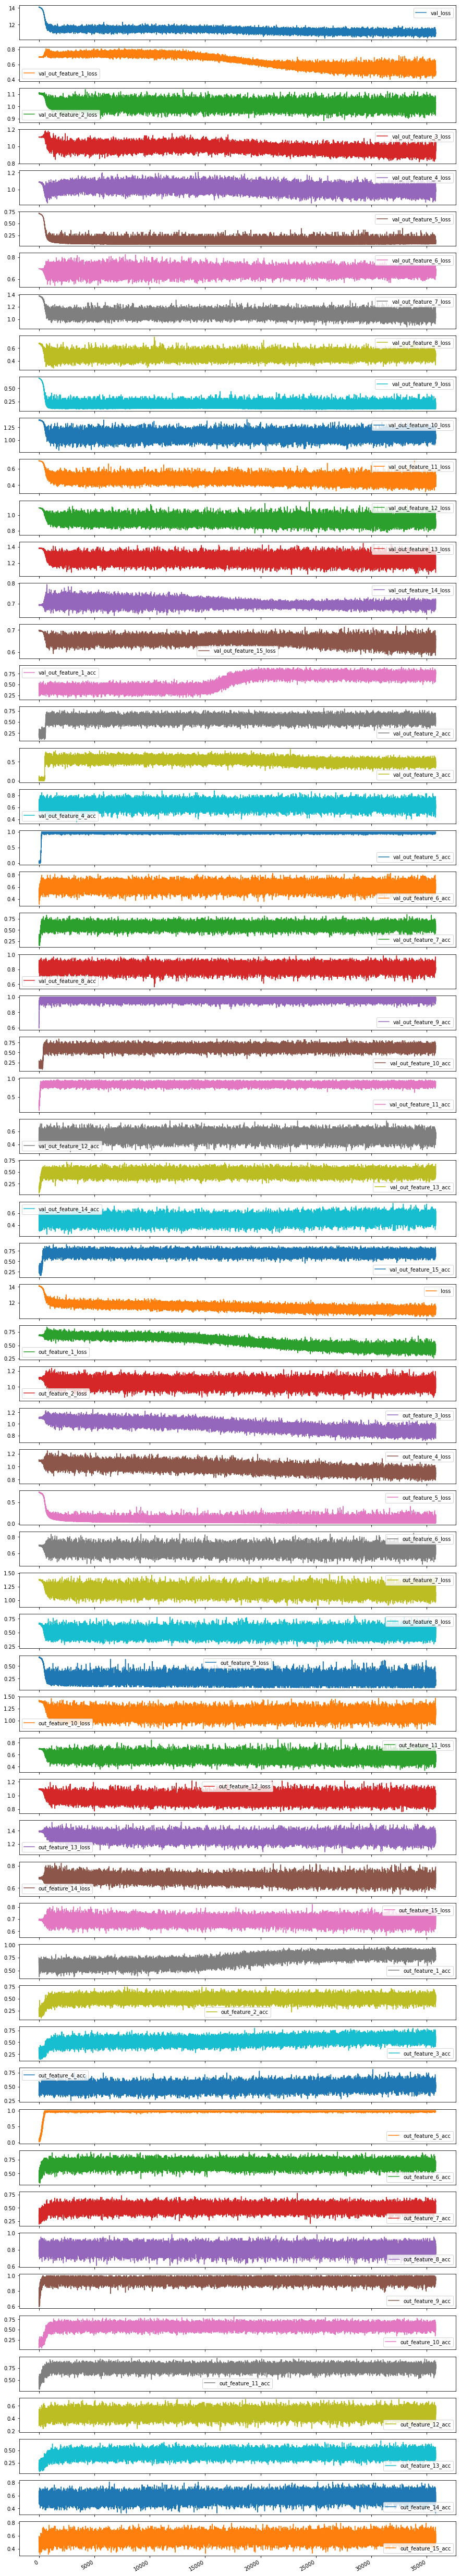

In [26]:
df_hist = pd.DataFrame(hist.history)
df_hist.plot(subplots=True, figsize=(15,100))
print(df_hist['val_loss'].min())
df_hist[df_hist['val_loss']<10.65]

In [27]:
# human_features.load_weights('human_features_weights_v2.h5')
human_features.load_weights('15_human_features_weights_shuffled_v1.h5')
print(np.array(o[0]).shape)
for i in range(64):
#     print(i, '\nPredicted:')
    f_probs = human_features.predict(np.expand_dims(inputs[i],0))
#     print(f_probs)
    for prob in f_probs:
#         print(prob)
        print(np.argmax(prob[0]),end=',')
#     print('\n----------')
#     print('True:')
#     for op in o:
#         print(np.argmax(op[i]),end=',')
        
    print('\n++++++++++++')

(64, 2)
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
0,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
0,1,2,1,1,1,0,0,0,1,1,1,1,1,1,
++++++++++++
1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,
++++++++++++
0,1,2,1,1,1,0,0,0,1,1,1,1,1,1,
++++++++++++
0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
0,1,2,1,1,1,0,0,0,1,1,1,1,1,1,
++++++++++++
1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,
++++++++++++
0,1,2,1,1,1,0,0,0,1,1,1,1,1,1,
++++++++++++
0,1,2,1,1,1,0,0,0,1,1,1,1,1,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
0,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
0,1,2,1,1,1,0,0,0,1,1,1,1,1,1,
++++++++++++
0,1,2,1,1,1,0,0,0,1,1,1,1,1,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,
++++++++++++
0,1,2,1,1,1,0,0,0,1,1,1,

In [28]:
# print(df_hist.columns)
for i in range(1,16):
    print('acc:',df_hist['val_out_feature_{0}_acc'.format(i)].max(),', loss:',df_hist['val_out_feature_{0}_loss'.format(i)].min())
print(np.mean([df_hist['val_out_feature_1_acc'].max(), df_hist['val_out_feature_2_acc'].max(),
       df_hist['val_out_feature_3_acc'].max(), df_hist['val_out_feature_4_acc'].max(),
       df_hist['val_out_feature_5_acc'].max(), df_hist['val_out_feature_6_acc'].max(),
       df_hist['val_out_feature_7_acc'].max(), df_hist['val_out_feature_8_acc'].max()]))
# df_hist[df_hist['val_acc']>10.2]

acc: 0.90625 , loss: 0.40183550119400024
acc: 0.8125 , loss: 0.8830709457397461
acc: 0.828125 , loss: 0.8183110952377319
acc: 0.875 , loss: 0.8389643430709839
acc: 1.0 , loss: 0.053740039467811584
acc: 0.828125 , loss: 0.5403180122375488
acc: 0.84375 , loss: 0.8729404807090759
acc: 0.984375 , loss: 0.2905485928058624
acc: 1.0 , loss: 0.09961339831352234
acc: 0.859375 , loss: 0.7961164712905884
acc: 0.984375 , loss: 0.3182825446128845
acc: 0.765625 , loss: 0.7708529829978943
acc: 0.71875 , loss: 1.0557231903076172
acc: 0.765625 , loss: 0.6416204571723938
acc: 0.90625 , loss: 0.5775914192199707
0.884765625


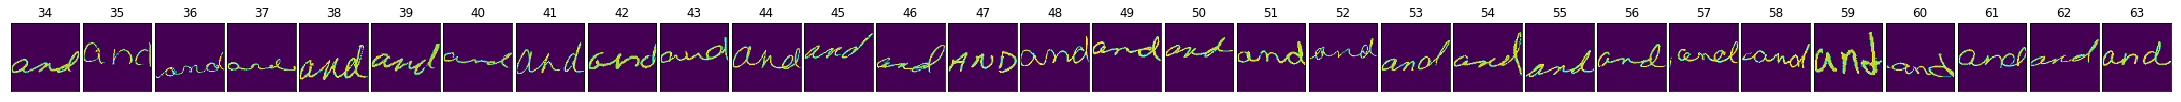

In [29]:
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(30):
    ax = fig.add_subplot(1, 30, i + 1, xticks=[], yticks=[])
    ax.imshow(inputs[64-30:64][i].reshape((64,64)))
    ax.set_title(i+34)

(64, 8, 8)
(64, 8, 8)
(64, 8, 8)
(64, 8, 8)
(64, 8, 8)
(64, 8, 8)
(64, 8, 8)
(64, 8, 8)


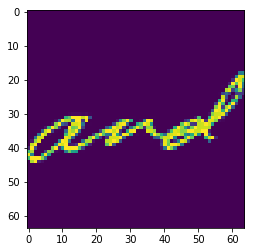

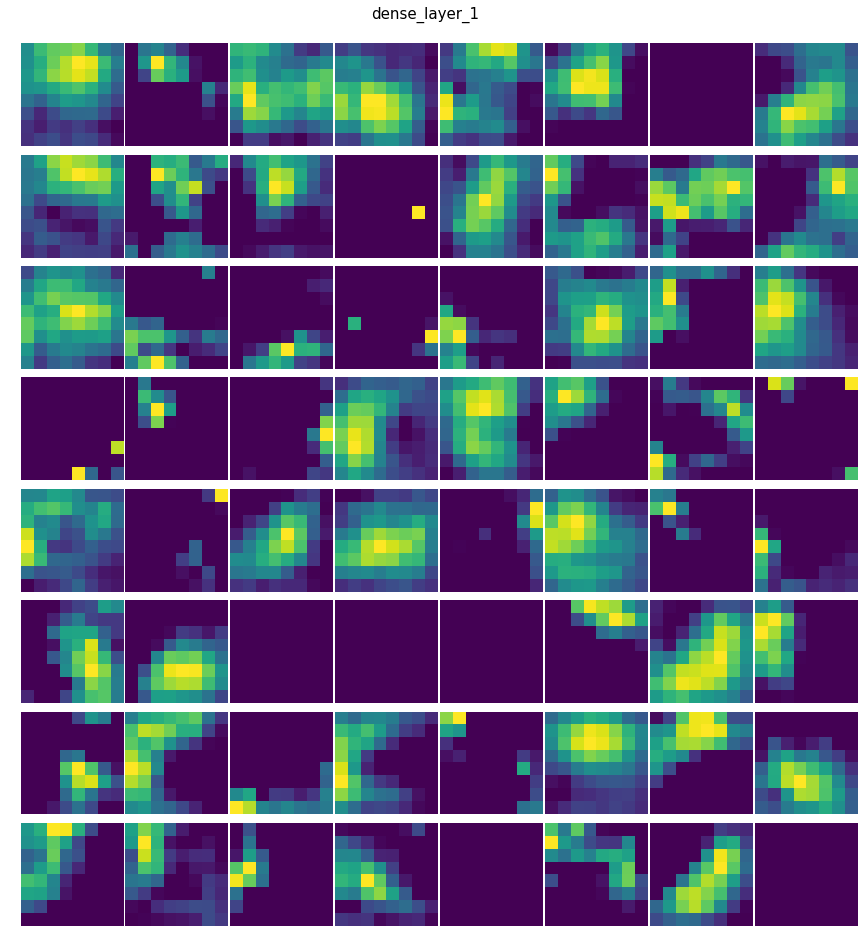

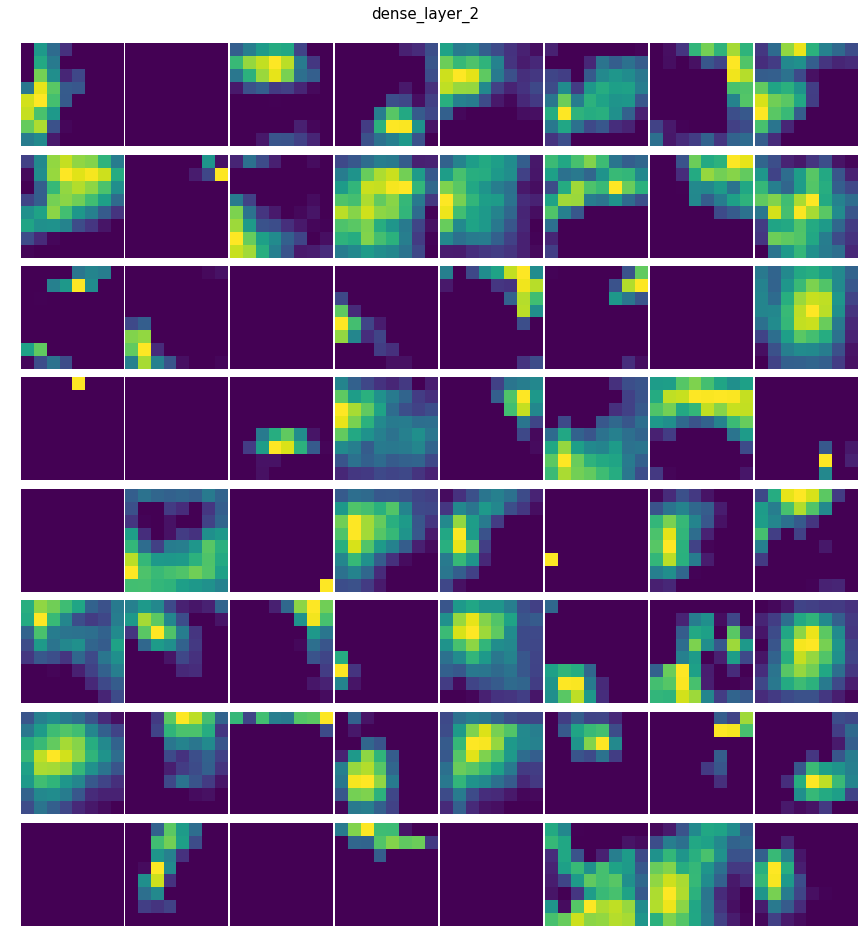

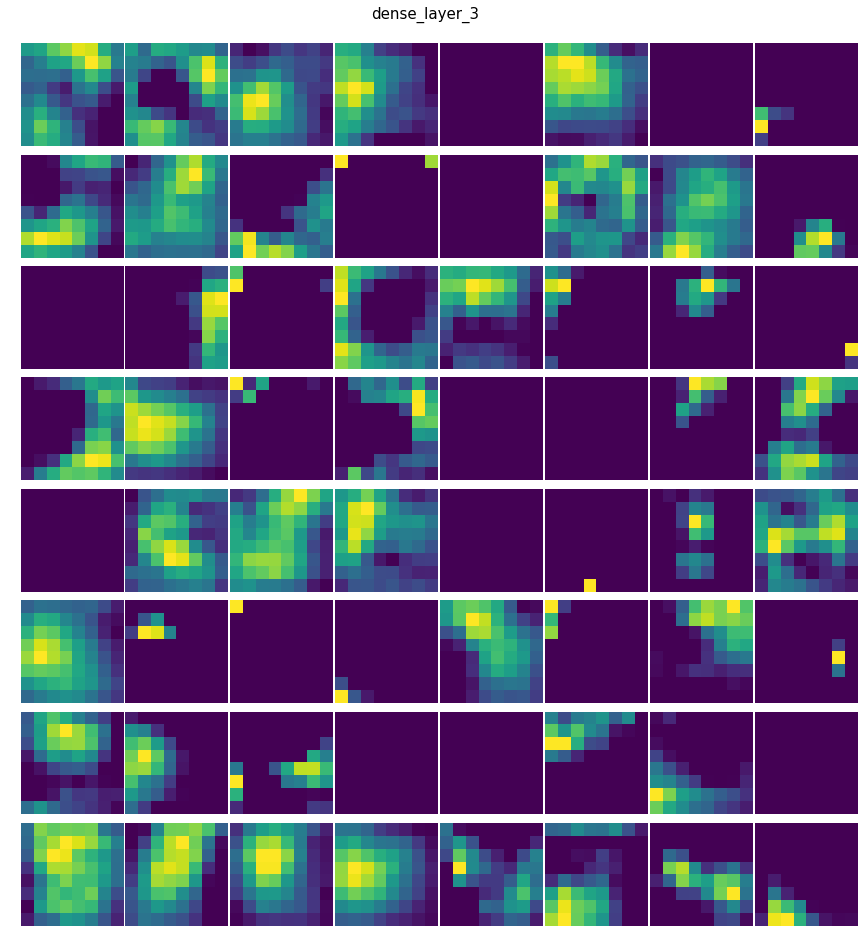

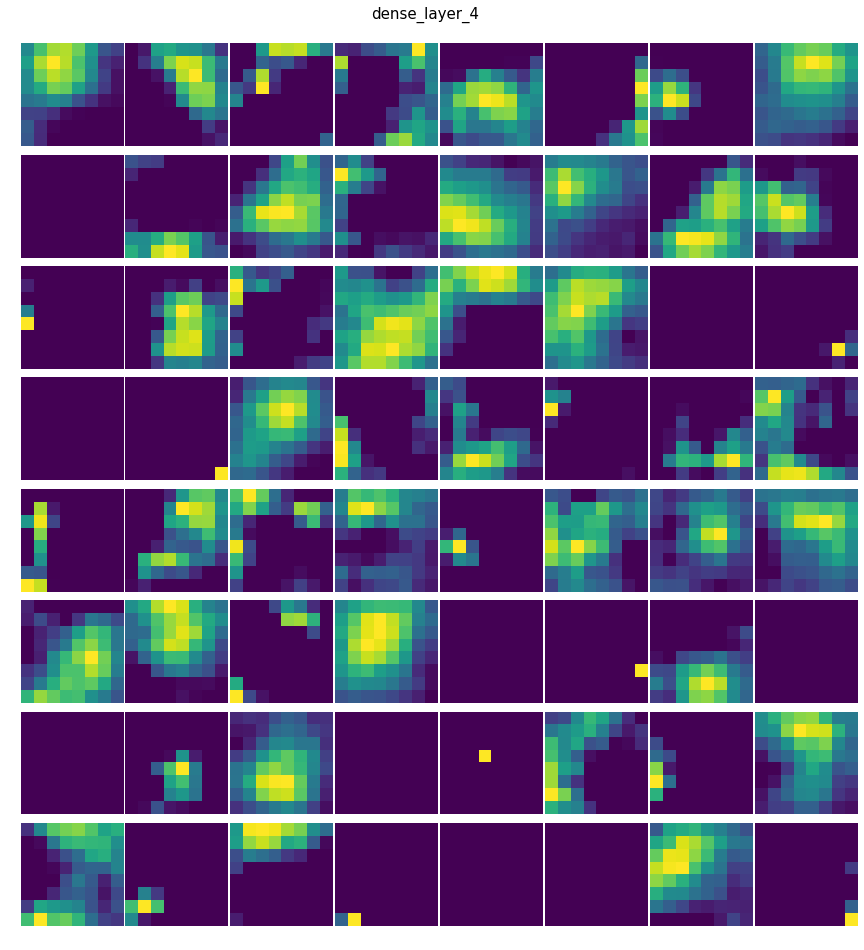

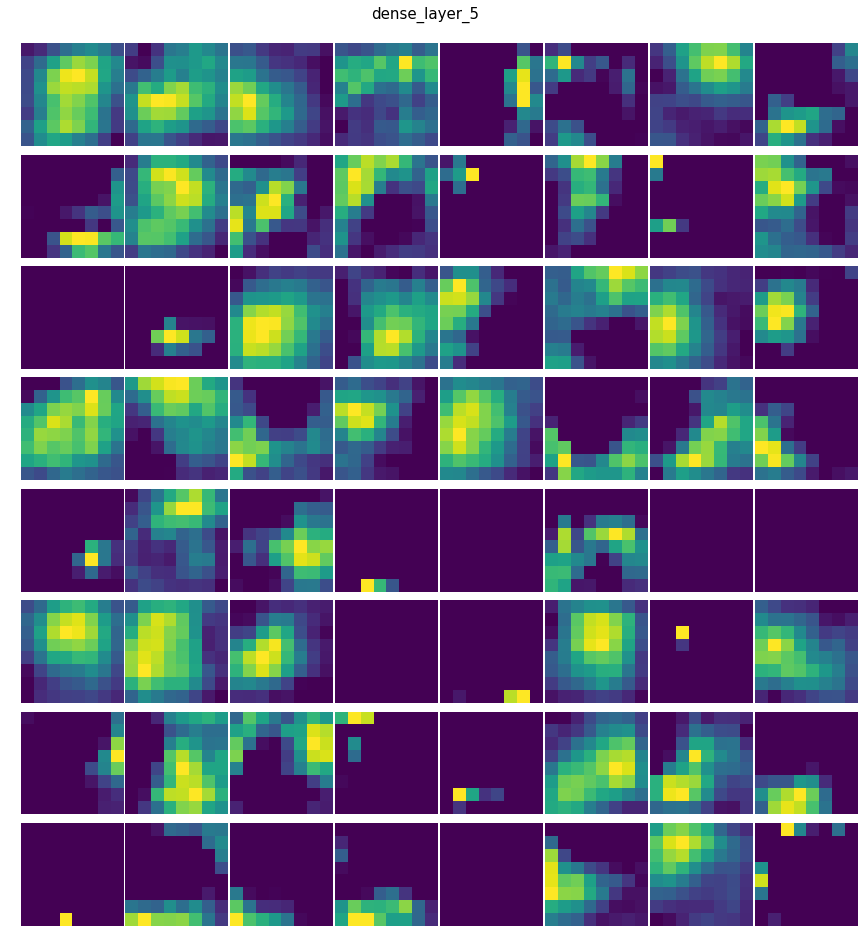

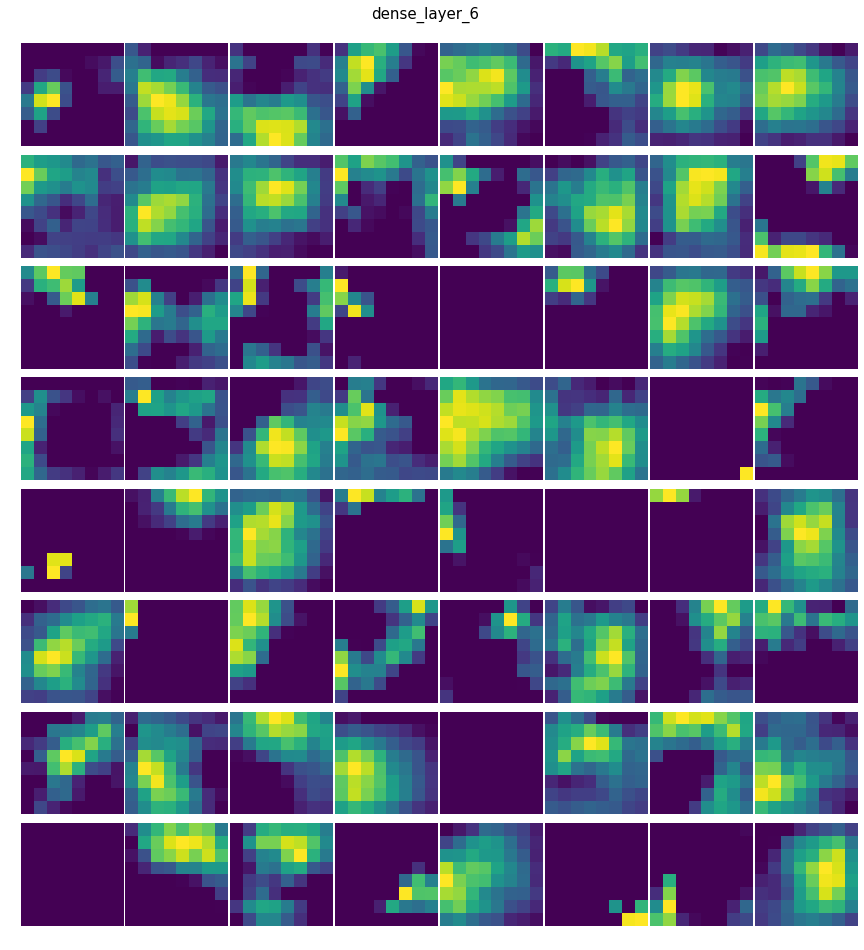

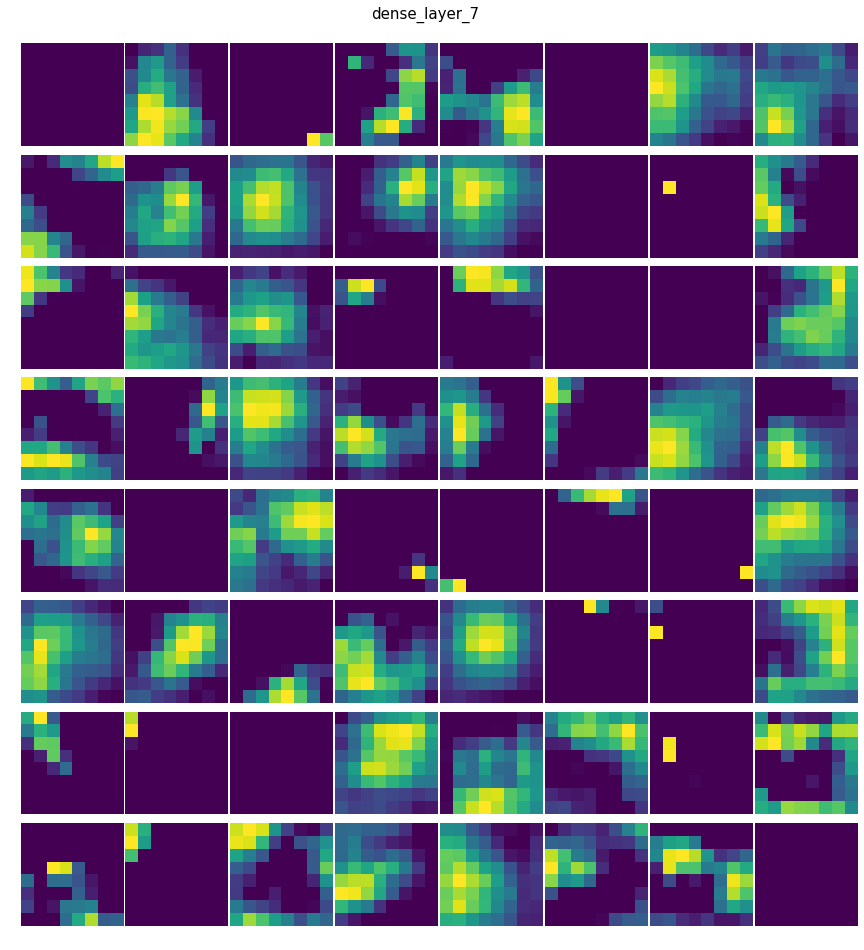

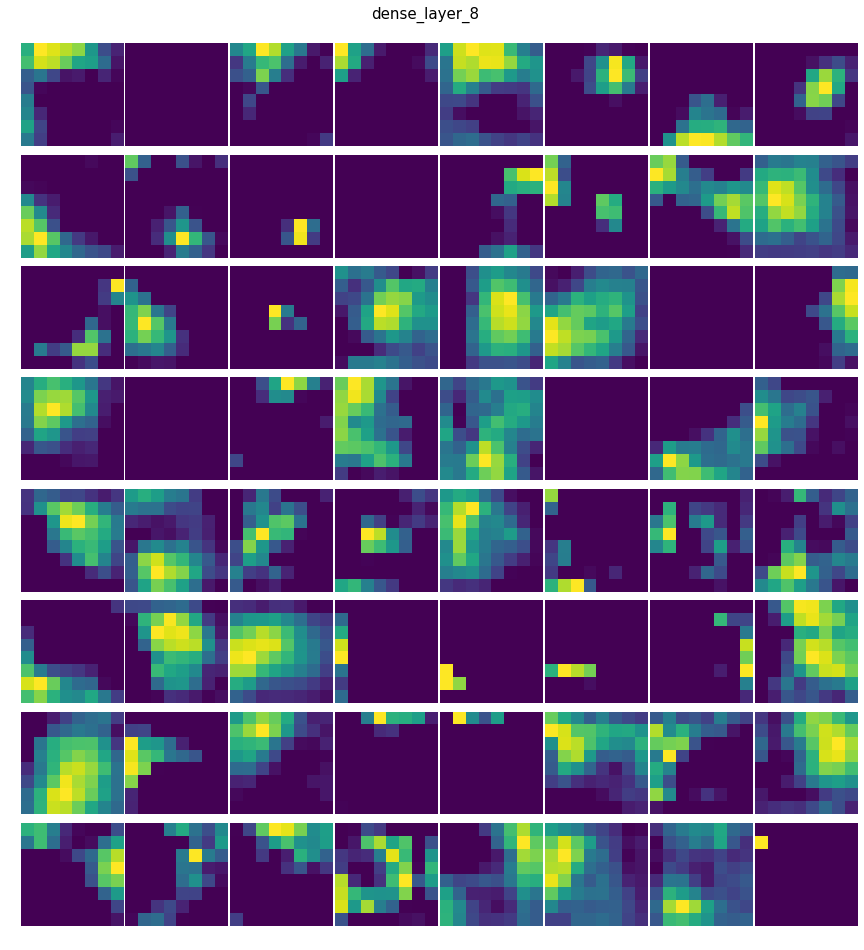

In [30]:
plt.imshow(inputs[10].reshape((64,64)))
plt.subplots_adjust(hspace = 0.1)
for i in range(1,9):
    visualize_model = Model(human_features.input, human_features.get_layer('dense_layer_'+str(i)).output)
    vis_out = visualize_model.predict(np.expand_dims(inputs[10],0))[0]
    vis_out = np.rollaxis(a=vis_out, start=0, axis=2)
    f,ax = plt.subplots(8,8)
    f.subplots_adjust(hspace = .00, wspace=.02, top=0.95)
    f.set_size_inches(15,15)
    f.suptitle('dense_layer_'+str(i), fontsize=15)
#     f.subplots_adjust(hspace = 0.1)
#     plt.title('dense_layer_'+str(i))
    print(vis_out.shape)
    for r in range(8):
        for c in range (8):
            ax[r,c].imshow(vis_out[c+r*8])
            ax[r,c].axis('off')
#     break

In [31]:
csv_data.var()

pen_pressure      0.241190
letter_spacing    0.481638
size              0.475689
dimension         0.464579
is_lowercase      0.014808
is_continuous     0.222378
slantness         0.866958
tilt              0.152430
entry_stroke_a    0.053592
staff_of_a        0.862689
formation_n       0.176950
staff_of_d        0.409782
exit_stroke_d     1.054210
word_formation    0.245240
constancy         0.239313
dtype: float64